In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set(color_codes=True)

## Load the data

In [2]:
df = pd.read_csv('../cleaned_data/FREN.csv', index_col='Date', parse_dates=True)
df.head()

,7 DAYS MA,14 DAYS MA,21 DAYS MA,7 DAYS STD DEV,RSI 7,RSI 14,RSI 21,MFI 7,MFI 14,MFI 21,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,Close
Date,,,,,,,,,,,,,,,,,,
2012-10-17,-0.077792,-0.039585,-0.041007,-0.484714,2.223844,2.575815,2.574613,1.633924,1.679844,1.552717,0.008923,1.34241,1.016593,-1.845348,1.033444,0.147246,1.030312,0.440118
2012-10-18,-0.003835,-0.007674,-0.010651,1.422315,0.937519,1.283190,1.404574,1.679668,1.748685,1.672304,0.716706,1.34241,1.016593,-1.845348,1.042927,0.261864,1.030312,0.201081
2012-10-19,0.038425,0.004293,0.002741,1.517442,1.158441,1.511092,1.626116,0.908951,0.920132,0.908441,1.424489,1.34241,1.016593,-1.845348,1.052410,0.376483,1.030312,0.293018
2012-10-22,0.093893,0.025567,0.019705,1.628038,1.070196,1.424646,1.546813,0.634583,0.627739,0.526947,-1.406643,1.34241,1.016593,-1.845348,1.080859,0.720337,1.096678,0.274631
2012-10-23,0.141436,0.046841,0.028634,1.606590,0.794613,1.164224,1.310060,0.566140,0.561087,0.541269,-0.698860,1.34241,1.016593,-1.845348,1.090342,0.834955,1.096678,0.219468


### Plot the Close price - our target

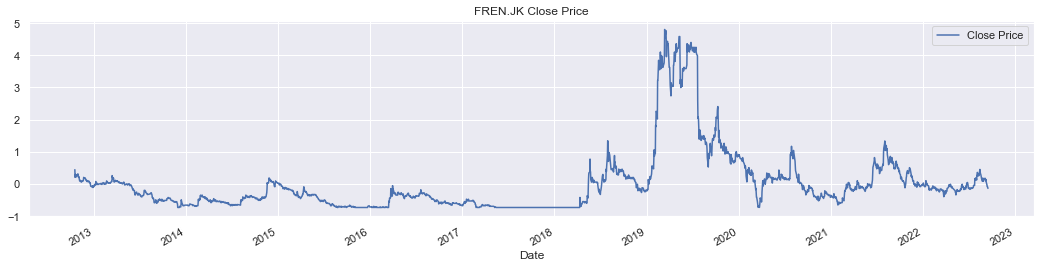

In [3]:
df['Close'].plot(figsize=(18, 4))
plt.legend(['Close Price'])
plt.title('FREN.JK Close Price')
plt.show()

### Split the data
- Split the data into independent variables and target variable
- Split the data into train and test set (80:20)

In [4]:
train_len = int(len(df)*.8)
train_dataset = df[:train_len]
test_dataset = df[train_len:len(df)]

In [5]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('Close')
test_labels = test_features.pop('Close')

## Modeling

### Grid Search to find the best combination of hyperparameters

In [6]:
# ================
# XGBoost regression: 
# Parameters: 
# n_estimators  "Number of gradient boosted trees. Equivalent to number 
#                of boosting rounds."
# learning_rate "Boosting learning rate (also known as “eta”)"
# max_depth     "Maximum depth of a tree. Increasing this value will make 
#                the model more complex and more likely to overfit." 
#=========================================================================
regressor = xgb.XGBRegressor(eval_metric='rmse')

#=========================================================================
# exhaustively search for the optimal hyperparameters
#=========================================================================
from sklearn.model_selection import GridSearchCV
# set up our search grid
param_grid = {"max_depth":    [3, 4, 5],
              "n_estimators": [500, 600, 700, 1000],
              "learning_rate": [0.01, 0.015],
              "base_score": [0.5],
              "booster": ["gbtree"],
              "early_stopping_rounds": [50]}

# try out every combination of the above values
search = GridSearchCV(regressor, param_grid, cv=5).fit(train_features, train_labels, eval_set=[(train_features, train_labels)])

[0]	validation_0-rmse:1.19936
[1]	validation_0-rmse:1.18776
[2]	validation_0-rmse:1.17627
[3]	validation_0-rmse:1.16491
[4]	validation_0-rmse:1.15365
[5]	validation_0-rmse:1.14252
[6]	validation_0-rmse:1.13150
[7]	validation_0-rmse:1.12053
[8]	validation_0-rmse:1.10978
[9]	validation_0-rmse:1.09913
[10]	validation_0-rmse:1.08855
[11]	validation_0-rmse:1.07808
[12]	validation_0-rmse:1.06775
[13]	validation_0-rmse:1.05749
[14]	validation_0-rmse:1.04731
[15]	validation_0-rmse:1.03719
[16]	validation_0-rmse:1.02727
[17]	validation_0-rmse:1.01744
[18]	validation_0-rmse:1.00765
[19]	validation_0-rmse:0.99803
[20]	validation_0-rmse:0.98844
[21]	validation_0-rmse:0.97892
[22]	validation_0-rmse:0.96958
[23]	validation_0-rmse:0.96035
[24]	validation_0-rmse:0.95114
[25]	validation_0-rmse:0.94210
[26]	validation_0-rmse:0.93302
[27]	validation_0-rmse:0.92416
[28]	validation_0-rmse:0.91527
[29]	validation_0-rmse:0.90660
[30]	validation_0-rmse:0.89800
[31]	validation_0-rmse:0.88938
[32]	validation_0-

[260]	validation_0-rmse:0.12425
[261]	validation_0-rmse:0.12343
[262]	validation_0-rmse:0.12259
[263]	validation_0-rmse:0.12176
[264]	validation_0-rmse:0.12093
[265]	validation_0-rmse:0.12015
[266]	validation_0-rmse:0.11934
[267]	validation_0-rmse:0.11855
[268]	validation_0-rmse:0.11775
[269]	validation_0-rmse:0.11699
[270]	validation_0-rmse:0.11626
[271]	validation_0-rmse:0.11550
[272]	validation_0-rmse:0.11473
[273]	validation_0-rmse:0.11401
[274]	validation_0-rmse:0.11326
[275]	validation_0-rmse:0.11254
[276]	validation_0-rmse:0.11185
[277]	validation_0-rmse:0.11112
[278]	validation_0-rmse:0.11041
[279]	validation_0-rmse:0.10974
[280]	validation_0-rmse:0.10904
[281]	validation_0-rmse:0.10838
[282]	validation_0-rmse:0.10769
[283]	validation_0-rmse:0.10702
[284]	validation_0-rmse:0.10637
[285]	validation_0-rmse:0.10571
[286]	validation_0-rmse:0.10508
[287]	validation_0-rmse:0.10443
[288]	validation_0-rmse:0.10382
[289]	validation_0-rmse:0.10318
[290]	validation_0-rmse:0.10254
[291]	va

[16]	validation_0-rmse:1.02767
[17]	validation_0-rmse:1.01781
[18]	validation_0-rmse:1.00806
[19]	validation_0-rmse:0.99843
[20]	validation_0-rmse:0.98885
[21]	validation_0-rmse:0.97937
[22]	validation_0-rmse:0.97002
[23]	validation_0-rmse:0.96075
[24]	validation_0-rmse:0.95157
[25]	validation_0-rmse:0.94247
[26]	validation_0-rmse:0.93347
[27]	validation_0-rmse:0.92455
[28]	validation_0-rmse:0.91572
[29]	validation_0-rmse:0.90698
[30]	validation_0-rmse:0.89834
[31]	validation_0-rmse:0.88978
[32]	validation_0-rmse:0.88128
[33]	validation_0-rmse:0.87289
[34]	validation_0-rmse:0.86457
[35]	validation_0-rmse:0.85634
[36]	validation_0-rmse:0.84819
[37]	validation_0-rmse:0.84014
[38]	validation_0-rmse:0.83214
[39]	validation_0-rmse:0.82424
[40]	validation_0-rmse:0.81642
[41]	validation_0-rmse:0.80865
[42]	validation_0-rmse:0.80099
[43]	validation_0-rmse:0.79338
[44]	validation_0-rmse:0.78586
[45]	validation_0-rmse:0.77841
[46]	validation_0-rmse:0.77104
[47]	validation_0-rmse:0.76372
[48]	val

[275]	validation_0-rmse:0.11541
[276]	validation_0-rmse:0.11471
[277]	validation_0-rmse:0.11402
[278]	validation_0-rmse:0.11332
[279]	validation_0-rmse:0.11266
[280]	validation_0-rmse:0.11198
[281]	validation_0-rmse:0.11130
[282]	validation_0-rmse:0.11064
[283]	validation_0-rmse:0.11000
[284]	validation_0-rmse:0.10935
[285]	validation_0-rmse:0.10868
[286]	validation_0-rmse:0.10805
[287]	validation_0-rmse:0.10739
[288]	validation_0-rmse:0.10673
[289]	validation_0-rmse:0.10613
[290]	validation_0-rmse:0.10548
[291]	validation_0-rmse:0.10489
[292]	validation_0-rmse:0.10425
[293]	validation_0-rmse:0.10363
[294]	validation_0-rmse:0.10301
[295]	validation_0-rmse:0.10243
[296]	validation_0-rmse:0.10182
[297]	validation_0-rmse:0.10124
[298]	validation_0-rmse:0.10070
[299]	validation_0-rmse:0.10011
[300]	validation_0-rmse:0.09956
[301]	validation_0-rmse:0.09900
[302]	validation_0-rmse:0.09844
[303]	validation_0-rmse:0.09791
[304]	validation_0-rmse:0.09736
[305]	validation_0-rmse:0.09681
[306]	va

[33]	validation_0-rmse:0.87286
[34]	validation_0-rmse:0.86458
[35]	validation_0-rmse:0.85634
[36]	validation_0-rmse:0.84823
[37]	validation_0-rmse:0.84019
[38]	validation_0-rmse:0.83224
[39]	validation_0-rmse:0.82433
[40]	validation_0-rmse:0.81652
[41]	validation_0-rmse:0.80881
[42]	validation_0-rmse:0.80113
[43]	validation_0-rmse:0.79354
[44]	validation_0-rmse:0.78606
[45]	validation_0-rmse:0.77861
[46]	validation_0-rmse:0.77127
[47]	validation_0-rmse:0.76398
[48]	validation_0-rmse:0.75679
[49]	validation_0-rmse:0.74963
[50]	validation_0-rmse:0.74255
[51]	validation_0-rmse:0.73551
[52]	validation_0-rmse:0.72860
[53]	validation_0-rmse:0.72170
[54]	validation_0-rmse:0.71487
[55]	validation_0-rmse:0.70817
[56]	validation_0-rmse:0.70148
[57]	validation_0-rmse:0.69486
[58]	validation_0-rmse:0.68835
[59]	validation_0-rmse:0.68185
[60]	validation_0-rmse:0.67547
[61]	validation_0-rmse:0.66912
[62]	validation_0-rmse:0.66287
[63]	validation_0-rmse:0.65664
[64]	validation_0-rmse:0.65051
[65]	val

[292]	validation_0-rmse:0.10530
[293]	validation_0-rmse:0.10468
[294]	validation_0-rmse:0.10410
[295]	validation_0-rmse:0.10351
[296]	validation_0-rmse:0.10291
[297]	validation_0-rmse:0.10235
[298]	validation_0-rmse:0.10174
[299]	validation_0-rmse:0.10118
[300]	validation_0-rmse:0.10060
[301]	validation_0-rmse:0.10001
[302]	validation_0-rmse:0.09947
[303]	validation_0-rmse:0.09891
[304]	validation_0-rmse:0.09834
[305]	validation_0-rmse:0.09780
[306]	validation_0-rmse:0.09726
[307]	validation_0-rmse:0.09670
[308]	validation_0-rmse:0.09617
[309]	validation_0-rmse:0.09564
[310]	validation_0-rmse:0.09514
[311]	validation_0-rmse:0.09462
[312]	validation_0-rmse:0.09410
[313]	validation_0-rmse:0.09360
[314]	validation_0-rmse:0.09315
[315]	validation_0-rmse:0.09264
[316]	validation_0-rmse:0.09216
[317]	validation_0-rmse:0.09167
[318]	validation_0-rmse:0.09121
[319]	validation_0-rmse:0.09074
[320]	validation_0-rmse:0.09027
[321]	validation_0-rmse:0.08983
[322]	validation_0-rmse:0.08938
[323]	va

[50]	validation_0-rmse:0.74145
[51]	validation_0-rmse:0.73441
[52]	validation_0-rmse:0.72745
[53]	validation_0-rmse:0.72056
[54]	validation_0-rmse:0.71384
[55]	validation_0-rmse:0.70715
[56]	validation_0-rmse:0.70046
[57]	validation_0-rmse:0.69384
[58]	validation_0-rmse:0.68729
[59]	validation_0-rmse:0.68092
[60]	validation_0-rmse:0.67451
[61]	validation_0-rmse:0.66819
[62]	validation_0-rmse:0.66197
[63]	validation_0-rmse:0.65574
[64]	validation_0-rmse:0.64968
[65]	validation_0-rmse:0.64358
[66]	validation_0-rmse:0.63758
[67]	validation_0-rmse:0.63164
[68]	validation_0-rmse:0.62582
[69]	validation_0-rmse:0.61997
[70]	validation_0-rmse:0.61423
[71]	validation_0-rmse:0.60850
[72]	validation_0-rmse:0.60286
[73]	validation_0-rmse:0.59733
[74]	validation_0-rmse:0.59177
[75]	validation_0-rmse:0.58631
[76]	validation_0-rmse:0.58095
[77]	validation_0-rmse:0.57556
[78]	validation_0-rmse:0.57029
[79]	validation_0-rmse:0.56500
[80]	validation_0-rmse:0.55986
[81]	validation_0-rmse:0.55470
[82]	val

[308]	validation_0-rmse:0.11238
[309]	validation_0-rmse:0.11189
[310]	validation_0-rmse:0.11148
[311]	validation_0-rmse:0.11103
[312]	validation_0-rmse:0.11056
[313]	validation_0-rmse:0.11014
[314]	validation_0-rmse:0.10968
[315]	validation_0-rmse:0.10928
[316]	validation_0-rmse:0.10885
[317]	validation_0-rmse:0.10841
[318]	validation_0-rmse:0.10801
[319]	validation_0-rmse:0.10757
[320]	validation_0-rmse:0.10719
[321]	validation_0-rmse:0.10680
[322]	validation_0-rmse:0.10641
[323]	validation_0-rmse:0.10600
[324]	validation_0-rmse:0.10565
[325]	validation_0-rmse:0.10523
[326]	validation_0-rmse:0.10490
[327]	validation_0-rmse:0.10453
[328]	validation_0-rmse:0.10414
[329]	validation_0-rmse:0.10380
[330]	validation_0-rmse:0.10344
[331]	validation_0-rmse:0.10306
[332]	validation_0-rmse:0.10275
[333]	validation_0-rmse:0.10237
[334]	validation_0-rmse:0.10206
[335]	validation_0-rmse:0.10171
[336]	validation_0-rmse:0.10141
[337]	validation_0-rmse:0.10112
[338]	validation_0-rmse:0.10077
[339]	va

[66]	validation_0-rmse:0.93305
[67]	validation_0-rmse:0.93078
[68]	validation_0-rmse:0.92835
[69]	validation_0-rmse:0.92598
[70]	validation_0-rmse:0.92348
[71]	validation_0-rmse:0.92118
[72]	validation_0-rmse:0.91863
[73]	validation_0-rmse:0.91640
[74]	validation_0-rmse:0.91397
[75]	validation_0-rmse:0.91181
[76]	validation_0-rmse:0.90968
[77]	validation_0-rmse:0.90766
[78]	validation_0-rmse:0.90560
[79]	validation_0-rmse:0.90395
[80]	validation_0-rmse:0.90196
[81]	validation_0-rmse:0.90003
[82]	validation_0-rmse:0.89810
[83]	validation_0-rmse:0.89626
[84]	validation_0-rmse:0.89439
[85]	validation_0-rmse:0.89257
[86]	validation_0-rmse:0.89075
[87]	validation_0-rmse:0.88931
[88]	validation_0-rmse:0.88756
[89]	validation_0-rmse:0.88584
[90]	validation_0-rmse:0.88414
[91]	validation_0-rmse:0.88281
[92]	validation_0-rmse:0.88116
[93]	validation_0-rmse:0.87958
[94]	validation_0-rmse:0.87783
[95]	validation_0-rmse:0.87642
[96]	validation_0-rmse:0.87503
[97]	validation_0-rmse:0.87367
[98]	val

[324]	validation_0-rmse:0.75394
[325]	validation_0-rmse:0.75382
[326]	validation_0-rmse:0.75369
[327]	validation_0-rmse:0.75360
[328]	validation_0-rmse:0.75335
[329]	validation_0-rmse:0.75327
[330]	validation_0-rmse:0.75315
[331]	validation_0-rmse:0.75295
[332]	validation_0-rmse:0.75294
[333]	validation_0-rmse:0.75274
[334]	validation_0-rmse:0.75258
[335]	validation_0-rmse:0.75239
[336]	validation_0-rmse:0.75238
[337]	validation_0-rmse:0.75230
[338]	validation_0-rmse:0.75211
[339]	validation_0-rmse:0.75191
[340]	validation_0-rmse:0.75190
[341]	validation_0-rmse:0.75170
[342]	validation_0-rmse:0.75158
[343]	validation_0-rmse:0.75156
[344]	validation_0-rmse:0.75137
[345]	validation_0-rmse:0.75118
[346]	validation_0-rmse:0.75117
[347]	validation_0-rmse:0.75104
[348]	validation_0-rmse:0.75086
[349]	validation_0-rmse:0.75083
[350]	validation_0-rmse:0.75071
[351]	validation_0-rmse:0.75070
[352]	validation_0-rmse:0.75051
[353]	validation_0-rmse:0.75032
[354]	validation_0-rmse:0.75023
[355]	va

[83]	validation_0-rmse:0.54308
[84]	validation_0-rmse:0.53801
[85]	validation_0-rmse:0.53301
[86]	validation_0-rmse:0.52811
[87]	validation_0-rmse:0.52324
[88]	validation_0-rmse:0.51837
[89]	validation_0-rmse:0.51362
[90]	validation_0-rmse:0.50887
[91]	validation_0-rmse:0.50416
[92]	validation_0-rmse:0.49954
[93]	validation_0-rmse:0.49498
[94]	validation_0-rmse:0.49042
[95]	validation_0-rmse:0.48595
[96]	validation_0-rmse:0.48152
[97]	validation_0-rmse:0.47708
[98]	validation_0-rmse:0.47272
[99]	validation_0-rmse:0.46841
[100]	validation_0-rmse:0.46412
[101]	validation_0-rmse:0.45985
[102]	validation_0-rmse:0.45569
[103]	validation_0-rmse:0.45155
[104]	validation_0-rmse:0.44744
[105]	validation_0-rmse:0.44338
[106]	validation_0-rmse:0.43939
[107]	validation_0-rmse:0.43538
[108]	validation_0-rmse:0.43144
[109]	validation_0-rmse:0.42754
[110]	validation_0-rmse:0.42368
[111]	validation_0-rmse:0.41981
[112]	validation_0-rmse:0.41603
[113]	validation_0-rmse:0.41228
[114]	validation_0-rmse:0

[340]	validation_0-rmse:0.07886
[341]	validation_0-rmse:0.07852
[342]	validation_0-rmse:0.07818
[343]	validation_0-rmse:0.07783
[344]	validation_0-rmse:0.07751
[345]	validation_0-rmse:0.07717
[346]	validation_0-rmse:0.07683
[347]	validation_0-rmse:0.07648
[348]	validation_0-rmse:0.07617
[349]	validation_0-rmse:0.07586
[350]	validation_0-rmse:0.07554
[351]	validation_0-rmse:0.07523
[352]	validation_0-rmse:0.07491
[353]	validation_0-rmse:0.07462
[354]	validation_0-rmse:0.07432
[355]	validation_0-rmse:0.07403
[356]	validation_0-rmse:0.07373
[357]	validation_0-rmse:0.07344
[358]	validation_0-rmse:0.07312
[359]	validation_0-rmse:0.07284
[360]	validation_0-rmse:0.07257
[361]	validation_0-rmse:0.07228
[362]	validation_0-rmse:0.07200
[363]	validation_0-rmse:0.07173
[364]	validation_0-rmse:0.07144
[365]	validation_0-rmse:0.07118
[366]	validation_0-rmse:0.07090
[367]	validation_0-rmse:0.07064
[368]	validation_0-rmse:0.07037
[369]	validation_0-rmse:0.07012
[370]	validation_0-rmse:0.06988
[371]	va

[597]	validation_0-rmse:0.04538
[598]	validation_0-rmse:0.04534
[599]	validation_0-rmse:0.04531
[0]	validation_0-rmse:1.19940
[1]	validation_0-rmse:1.18784
[2]	validation_0-rmse:1.17640
[3]	validation_0-rmse:1.16507
[4]	validation_0-rmse:1.15385
[5]	validation_0-rmse:1.14275
[6]	validation_0-rmse:1.13177
[7]	validation_0-rmse:1.12089
[8]	validation_0-rmse:1.11012
[9]	validation_0-rmse:1.09946
[10]	validation_0-rmse:1.08889
[11]	validation_0-rmse:1.07845
[12]	validation_0-rmse:1.06810
[13]	validation_0-rmse:1.05786
[14]	validation_0-rmse:1.04771
[15]	validation_0-rmse:1.03764
[16]	validation_0-rmse:1.02767
[17]	validation_0-rmse:1.01781
[18]	validation_0-rmse:1.00806
[19]	validation_0-rmse:0.99843
[20]	validation_0-rmse:0.98885
[21]	validation_0-rmse:0.97937
[22]	validation_0-rmse:0.97002
[23]	validation_0-rmse:0.96075
[24]	validation_0-rmse:0.95157
[25]	validation_0-rmse:0.94247
[26]	validation_0-rmse:0.93347
[27]	validation_0-rmse:0.92455
[28]	validation_0-rmse:0.91572
[29]	validation

[257]	validation_0-rmse:0.12951
[258]	validation_0-rmse:0.12866
[259]	validation_0-rmse:0.12781
[260]	validation_0-rmse:0.12696
[261]	validation_0-rmse:0.12615
[262]	validation_0-rmse:0.12535
[263]	validation_0-rmse:0.12452
[264]	validation_0-rmse:0.12373
[265]	validation_0-rmse:0.12293
[266]	validation_0-rmse:0.12215
[267]	validation_0-rmse:0.12135
[268]	validation_0-rmse:0.12060
[269]	validation_0-rmse:0.11984
[270]	validation_0-rmse:0.11908
[271]	validation_0-rmse:0.11834
[272]	validation_0-rmse:0.11760
[273]	validation_0-rmse:0.11684
[274]	validation_0-rmse:0.11613
[275]	validation_0-rmse:0.11541
[276]	validation_0-rmse:0.11471
[277]	validation_0-rmse:0.11402
[278]	validation_0-rmse:0.11332
[279]	validation_0-rmse:0.11266
[280]	validation_0-rmse:0.11198
[281]	validation_0-rmse:0.11130
[282]	validation_0-rmse:0.11064
[283]	validation_0-rmse:0.11000
[284]	validation_0-rmse:0.10935
[285]	validation_0-rmse:0.10868
[286]	validation_0-rmse:0.10805
[287]	validation_0-rmse:0.10739
[288]	va

[514]	validation_0-rmse:0.05234
[515]	validation_0-rmse:0.05227
[516]	validation_0-rmse:0.05220
[517]	validation_0-rmse:0.05213
[518]	validation_0-rmse:0.05206
[519]	validation_0-rmse:0.05199
[520]	validation_0-rmse:0.05194
[521]	validation_0-rmse:0.05188
[522]	validation_0-rmse:0.05180
[523]	validation_0-rmse:0.05175
[524]	validation_0-rmse:0.05169
[525]	validation_0-rmse:0.05163
[526]	validation_0-rmse:0.05157
[527]	validation_0-rmse:0.05152
[528]	validation_0-rmse:0.05145
[529]	validation_0-rmse:0.05138
[530]	validation_0-rmse:0.05132
[531]	validation_0-rmse:0.05126
[532]	validation_0-rmse:0.05120
[533]	validation_0-rmse:0.05114
[534]	validation_0-rmse:0.05109
[535]	validation_0-rmse:0.05104
[536]	validation_0-rmse:0.05096
[537]	validation_0-rmse:0.05091
[538]	validation_0-rmse:0.05086
[539]	validation_0-rmse:0.05081
[540]	validation_0-rmse:0.05075
[541]	validation_0-rmse:0.05070
[542]	validation_0-rmse:0.05065
[543]	validation_0-rmse:0.05058
[544]	validation_0-rmse:0.05054
[545]	va

[174]	validation_0-rmse:0.24379
[175]	validation_0-rmse:0.24175
[176]	validation_0-rmse:0.23981
[177]	validation_0-rmse:0.23782
[178]	validation_0-rmse:0.23585
[179]	validation_0-rmse:0.23391
[180]	validation_0-rmse:0.23204
[181]	validation_0-rmse:0.23013
[182]	validation_0-rmse:0.22826
[183]	validation_0-rmse:0.22645
[184]	validation_0-rmse:0.22459
[185]	validation_0-rmse:0.22275
[186]	validation_0-rmse:0.22101
[187]	validation_0-rmse:0.21921
[188]	validation_0-rmse:0.21744
[189]	validation_0-rmse:0.21572
[190]	validation_0-rmse:0.21398
[191]	validation_0-rmse:0.21232
[192]	validation_0-rmse:0.21062
[193]	validation_0-rmse:0.20898
[194]	validation_0-rmse:0.20731
[195]	validation_0-rmse:0.20572
[196]	validation_0-rmse:0.20410
[197]	validation_0-rmse:0.20248
[198]	validation_0-rmse:0.20094
[199]	validation_0-rmse:0.19936
[200]	validation_0-rmse:0.19783
[201]	validation_0-rmse:0.19628
[202]	validation_0-rmse:0.19480
[203]	validation_0-rmse:0.19334
[204]	validation_0-rmse:0.19183
[205]	va

[431]	validation_0-rmse:0.06012
[432]	validation_0-rmse:0.05996
[433]	validation_0-rmse:0.05981
[434]	validation_0-rmse:0.05967
[435]	validation_0-rmse:0.05954
[436]	validation_0-rmse:0.05940
[437]	validation_0-rmse:0.05925
[438]	validation_0-rmse:0.05910
[439]	validation_0-rmse:0.05896
[440]	validation_0-rmse:0.05882
[441]	validation_0-rmse:0.05868
[442]	validation_0-rmse:0.05854
[443]	validation_0-rmse:0.05841
[444]	validation_0-rmse:0.05828
[445]	validation_0-rmse:0.05816
[446]	validation_0-rmse:0.05802
[447]	validation_0-rmse:0.05790
[448]	validation_0-rmse:0.05776
[449]	validation_0-rmse:0.05764
[450]	validation_0-rmse:0.05752
[451]	validation_0-rmse:0.05739
[452]	validation_0-rmse:0.05727
[453]	validation_0-rmse:0.05716
[454]	validation_0-rmse:0.05703
[455]	validation_0-rmse:0.05692
[456]	validation_0-rmse:0.05680
[457]	validation_0-rmse:0.05667
[458]	validation_0-rmse:0.05655
[459]	validation_0-rmse:0.05643
[460]	validation_0-rmse:0.05630
[461]	validation_0-rmse:0.05618
[462]	va

[91]	validation_0-rmse:0.50600
[92]	validation_0-rmse:0.50135
[93]	validation_0-rmse:0.49686
[94]	validation_0-rmse:0.49231
[95]	validation_0-rmse:0.48789
[96]	validation_0-rmse:0.48344
[97]	validation_0-rmse:0.47911
[98]	validation_0-rmse:0.47476
[99]	validation_0-rmse:0.47045
[100]	validation_0-rmse:0.46617
[101]	validation_0-rmse:0.46202
[102]	validation_0-rmse:0.45791
[103]	validation_0-rmse:0.45376
[104]	validation_0-rmse:0.44967
[105]	validation_0-rmse:0.44567
[106]	validation_0-rmse:0.44165
[107]	validation_0-rmse:0.43769
[108]	validation_0-rmse:0.43376
[109]	validation_0-rmse:0.42992
[110]	validation_0-rmse:0.42606
[111]	validation_0-rmse:0.42224
[112]	validation_0-rmse:0.41849
[113]	validation_0-rmse:0.41475
[114]	validation_0-rmse:0.41107
[115]	validation_0-rmse:0.40748
[116]	validation_0-rmse:0.40394
[117]	validation_0-rmse:0.40041
[118]	validation_0-rmse:0.39686
[119]	validation_0-rmse:0.39334
[120]	validation_0-rmse:0.38991
[121]	validation_0-rmse:0.38647
[122]	validation_

[348]	validation_0-rmse:0.09775
[349]	validation_0-rmse:0.09749
[350]	validation_0-rmse:0.09723
[351]	validation_0-rmse:0.09698
[352]	validation_0-rmse:0.09668
[353]	validation_0-rmse:0.09640
[354]	validation_0-rmse:0.09613
[355]	validation_0-rmse:0.09587
[356]	validation_0-rmse:0.09559
[357]	validation_0-rmse:0.09535
[358]	validation_0-rmse:0.09508
[359]	validation_0-rmse:0.09481
[360]	validation_0-rmse:0.09457
[361]	validation_0-rmse:0.09431
[362]	validation_0-rmse:0.09408
[363]	validation_0-rmse:0.09383
[364]	validation_0-rmse:0.09359
[365]	validation_0-rmse:0.09336
[366]	validation_0-rmse:0.09313
[367]	validation_0-rmse:0.09289
[368]	validation_0-rmse:0.09265
[369]	validation_0-rmse:0.09244
[370]	validation_0-rmse:0.09220
[371]	validation_0-rmse:0.09197
[372]	validation_0-rmse:0.09176
[373]	validation_0-rmse:0.09154
[374]	validation_0-rmse:0.09134
[375]	validation_0-rmse:0.09114
[376]	validation_0-rmse:0.09092
[377]	validation_0-rmse:0.09072
[378]	validation_0-rmse:0.09053
[379]	va

[5]	validation_0-rmse:1.17337
[6]	validation_0-rmse:1.16737
[7]	validation_0-rmse:1.16161
[8]	validation_0-rmse:1.15578
[9]	validation_0-rmse:1.15019
[10]	validation_0-rmse:1.14451
[11]	validation_0-rmse:1.13892
[12]	validation_0-rmse:1.13364
[13]	validation_0-rmse:1.12821
[14]	validation_0-rmse:1.12295
[15]	validation_0-rmse:1.11777
[16]	validation_0-rmse:1.11257
[17]	validation_0-rmse:1.10744
[18]	validation_0-rmse:1.10240
[19]	validation_0-rmse:1.09742
[20]	validation_0-rmse:1.09253
[21]	validation_0-rmse:1.08770
[22]	validation_0-rmse:1.08304
[23]	validation_0-rmse:1.07835
[24]	validation_0-rmse:1.07374
[25]	validation_0-rmse:1.06918
[26]	validation_0-rmse:1.06490
[27]	validation_0-rmse:1.06049
[28]	validation_0-rmse:1.05614
[29]	validation_0-rmse:1.05206
[30]	validation_0-rmse:1.04796
[31]	validation_0-rmse:1.04387
[32]	validation_0-rmse:1.03978
[33]	validation_0-rmse:1.03573
[34]	validation_0-rmse:1.03197
[35]	validation_0-rmse:1.02808
[36]	validation_0-rmse:1.02423
[37]	validati

[265]	validation_0-rmse:0.76508
[266]	validation_0-rmse:0.76487
[267]	validation_0-rmse:0.76464
[268]	validation_0-rmse:0.76435
[269]	validation_0-rmse:0.76411
[270]	validation_0-rmse:0.76383
[271]	validation_0-rmse:0.76353
[272]	validation_0-rmse:0.76337
[273]	validation_0-rmse:0.76313
[274]	validation_0-rmse:0.76297
[275]	validation_0-rmse:0.76283
[276]	validation_0-rmse:0.76251
[277]	validation_0-rmse:0.76224
[278]	validation_0-rmse:0.76210
[279]	validation_0-rmse:0.76183
[280]	validation_0-rmse:0.76152
[281]	validation_0-rmse:0.76133
[282]	validation_0-rmse:0.76105
[283]	validation_0-rmse:0.76075
[284]	validation_0-rmse:0.76049
[285]	validation_0-rmse:0.76038
[286]	validation_0-rmse:0.76020
[287]	validation_0-rmse:0.76008
[288]	validation_0-rmse:0.75981
[289]	validation_0-rmse:0.75968
[290]	validation_0-rmse:0.75943
[291]	validation_0-rmse:0.75933
[292]	validation_0-rmse:0.75906
[293]	validation_0-rmse:0.75895
[294]	validation_0-rmse:0.75878
[295]	validation_0-rmse:0.75845
[296]	va

[522]	validation_0-rmse:0.73846
[523]	validation_0-rmse:0.73846
[524]	validation_0-rmse:0.73845
[525]	validation_0-rmse:0.73841
[526]	validation_0-rmse:0.73837
[527]	validation_0-rmse:0.73837
[528]	validation_0-rmse:0.73832
[529]	validation_0-rmse:0.73828
[530]	validation_0-rmse:0.73824
[531]	validation_0-rmse:0.73820
[532]	validation_0-rmse:0.73820
[533]	validation_0-rmse:0.73816
[534]	validation_0-rmse:0.73813
[535]	validation_0-rmse:0.73813
[536]	validation_0-rmse:0.73805
[537]	validation_0-rmse:0.73802
[538]	validation_0-rmse:0.73801
[539]	validation_0-rmse:0.73798
[540]	validation_0-rmse:0.73798
[541]	validation_0-rmse:0.73791
[542]	validation_0-rmse:0.73790
[543]	validation_0-rmse:0.73786
[544]	validation_0-rmse:0.73782
[545]	validation_0-rmse:0.73782
[546]	validation_0-rmse:0.73779
[547]	validation_0-rmse:0.73778
[548]	validation_0-rmse:0.73778
[549]	validation_0-rmse:0.73774
[550]	validation_0-rmse:0.73774
[551]	validation_0-rmse:0.73773
[552]	validation_0-rmse:0.73771
[553]	va

[182]	validation_0-rmse:0.22532
[183]	validation_0-rmse:0.22345
[184]	validation_0-rmse:0.22160
[185]	validation_0-rmse:0.21978
[186]	validation_0-rmse:0.21798
[187]	validation_0-rmse:0.21619
[188]	validation_0-rmse:0.21441
[189]	validation_0-rmse:0.21266
[190]	validation_0-rmse:0.21092
[191]	validation_0-rmse:0.20922
[192]	validation_0-rmse:0.20750
[193]	validation_0-rmse:0.20583
[194]	validation_0-rmse:0.20417
[195]	validation_0-rmse:0.20252
[196]	validation_0-rmse:0.20088
[197]	validation_0-rmse:0.19926
[198]	validation_0-rmse:0.19766
[199]	validation_0-rmse:0.19607
[200]	validation_0-rmse:0.19450
[201]	validation_0-rmse:0.19296
[202]	validation_0-rmse:0.19143
[203]	validation_0-rmse:0.18994
[204]	validation_0-rmse:0.18844
[205]	validation_0-rmse:0.18696
[206]	validation_0-rmse:0.18548
[207]	validation_0-rmse:0.18403
[208]	validation_0-rmse:0.18261
[209]	validation_0-rmse:0.18117
[210]	validation_0-rmse:0.17977
[211]	validation_0-rmse:0.17833
[212]	validation_0-rmse:0.17696
[213]	va

[439]	validation_0-rmse:0.05736
[440]	validation_0-rmse:0.05725
[441]	validation_0-rmse:0.05714
[442]	validation_0-rmse:0.05702
[443]	validation_0-rmse:0.05690
[444]	validation_0-rmse:0.05679
[445]	validation_0-rmse:0.05667
[446]	validation_0-rmse:0.05655
[447]	validation_0-rmse:0.05644
[448]	validation_0-rmse:0.05631
[449]	validation_0-rmse:0.05620
[450]	validation_0-rmse:0.05609
[451]	validation_0-rmse:0.05597
[452]	validation_0-rmse:0.05586
[453]	validation_0-rmse:0.05574
[454]	validation_0-rmse:0.05564
[455]	validation_0-rmse:0.05553
[456]	validation_0-rmse:0.05542
[457]	validation_0-rmse:0.05533
[458]	validation_0-rmse:0.05521
[459]	validation_0-rmse:0.05512
[460]	validation_0-rmse:0.05502
[461]	validation_0-rmse:0.05491
[462]	validation_0-rmse:0.05482
[463]	validation_0-rmse:0.05470
[464]	validation_0-rmse:0.05460
[465]	validation_0-rmse:0.05451
[466]	validation_0-rmse:0.05440
[467]	validation_0-rmse:0.05430
[468]	validation_0-rmse:0.05419
[469]	validation_0-rmse:0.05408
[470]	va

[696]	validation_0-rmse:0.04195
[697]	validation_0-rmse:0.04194
[698]	validation_0-rmse:0.04191
[699]	validation_0-rmse:0.04189
[0]	validation_0-rmse:1.19940
[1]	validation_0-rmse:1.18784
[2]	validation_0-rmse:1.17640
[3]	validation_0-rmse:1.16507
[4]	validation_0-rmse:1.15385
[5]	validation_0-rmse:1.14275
[6]	validation_0-rmse:1.13177
[7]	validation_0-rmse:1.12089
[8]	validation_0-rmse:1.11012
[9]	validation_0-rmse:1.09946
[10]	validation_0-rmse:1.08889
[11]	validation_0-rmse:1.07845
[12]	validation_0-rmse:1.06810
[13]	validation_0-rmse:1.05786
[14]	validation_0-rmse:1.04771
[15]	validation_0-rmse:1.03764
[16]	validation_0-rmse:1.02767
[17]	validation_0-rmse:1.01781
[18]	validation_0-rmse:1.00806
[19]	validation_0-rmse:0.99843
[20]	validation_0-rmse:0.98885
[21]	validation_0-rmse:0.97937
[22]	validation_0-rmse:0.97002
[23]	validation_0-rmse:0.96075
[24]	validation_0-rmse:0.95157
[25]	validation_0-rmse:0.94247
[26]	validation_0-rmse:0.93347
[27]	validation_0-rmse:0.92455
[28]	validatio

[256]	validation_0-rmse:0.13041
[257]	validation_0-rmse:0.12951
[258]	validation_0-rmse:0.12866
[259]	validation_0-rmse:0.12781
[260]	validation_0-rmse:0.12696
[261]	validation_0-rmse:0.12615
[262]	validation_0-rmse:0.12535
[263]	validation_0-rmse:0.12452
[264]	validation_0-rmse:0.12373
[265]	validation_0-rmse:0.12293
[266]	validation_0-rmse:0.12215
[267]	validation_0-rmse:0.12135
[268]	validation_0-rmse:0.12060
[269]	validation_0-rmse:0.11984
[270]	validation_0-rmse:0.11908
[271]	validation_0-rmse:0.11834
[272]	validation_0-rmse:0.11760
[273]	validation_0-rmse:0.11684
[274]	validation_0-rmse:0.11613
[275]	validation_0-rmse:0.11541
[276]	validation_0-rmse:0.11471
[277]	validation_0-rmse:0.11402
[278]	validation_0-rmse:0.11332
[279]	validation_0-rmse:0.11266
[280]	validation_0-rmse:0.11198
[281]	validation_0-rmse:0.11130
[282]	validation_0-rmse:0.11064
[283]	validation_0-rmse:0.11000
[284]	validation_0-rmse:0.10935
[285]	validation_0-rmse:0.10868
[286]	validation_0-rmse:0.10805
[287]	va

[513]	validation_0-rmse:0.05240
[514]	validation_0-rmse:0.05234
[515]	validation_0-rmse:0.05227
[516]	validation_0-rmse:0.05220
[517]	validation_0-rmse:0.05213
[518]	validation_0-rmse:0.05206
[519]	validation_0-rmse:0.05199
[520]	validation_0-rmse:0.05194
[521]	validation_0-rmse:0.05188
[522]	validation_0-rmse:0.05180
[523]	validation_0-rmse:0.05175
[524]	validation_0-rmse:0.05169
[525]	validation_0-rmse:0.05163
[526]	validation_0-rmse:0.05157
[527]	validation_0-rmse:0.05152
[528]	validation_0-rmse:0.05145
[529]	validation_0-rmse:0.05138
[530]	validation_0-rmse:0.05132
[531]	validation_0-rmse:0.05126
[532]	validation_0-rmse:0.05120
[533]	validation_0-rmse:0.05114
[534]	validation_0-rmse:0.05109
[535]	validation_0-rmse:0.05104
[536]	validation_0-rmse:0.05096
[537]	validation_0-rmse:0.05091
[538]	validation_0-rmse:0.05086
[539]	validation_0-rmse:0.05081
[540]	validation_0-rmse:0.05075
[541]	validation_0-rmse:0.05070
[542]	validation_0-rmse:0.05065
[543]	validation_0-rmse:0.05058
[544]	va

[72]	validation_0-rmse:0.60349
[73]	validation_0-rmse:0.59791
[74]	validation_0-rmse:0.59235
[75]	validation_0-rmse:0.58684
[76]	validation_0-rmse:0.58141
[77]	validation_0-rmse:0.57600
[78]	validation_0-rmse:0.57066
[79]	validation_0-rmse:0.56539
[80]	validation_0-rmse:0.56016
[81]	validation_0-rmse:0.55500
[82]	validation_0-rmse:0.54987
[83]	validation_0-rmse:0.54481
[84]	validation_0-rmse:0.53978
[85]	validation_0-rmse:0.53481
[86]	validation_0-rmse:0.52990
[87]	validation_0-rmse:0.52505
[88]	validation_0-rmse:0.52022
[89]	validation_0-rmse:0.51541
[90]	validation_0-rmse:0.51071
[91]	validation_0-rmse:0.50599
[92]	validation_0-rmse:0.50136
[93]	validation_0-rmse:0.49680
[94]	validation_0-rmse:0.49226
[95]	validation_0-rmse:0.48773
[96]	validation_0-rmse:0.48328
[97]	validation_0-rmse:0.47890
[98]	validation_0-rmse:0.47454
[99]	validation_0-rmse:0.47024
[100]	validation_0-rmse:0.46594
[101]	validation_0-rmse:0.46171
[102]	validation_0-rmse:0.45755
[103]	validation_0-rmse:0.45337
[104

[329]	validation_0-rmse:0.08632
[330]	validation_0-rmse:0.08591
[331]	validation_0-rmse:0.08550
[332]	validation_0-rmse:0.08510
[333]	validation_0-rmse:0.08473
[334]	validation_0-rmse:0.08431
[335]	validation_0-rmse:0.08391
[336]	validation_0-rmse:0.08352
[337]	validation_0-rmse:0.08315
[338]	validation_0-rmse:0.08277
[339]	validation_0-rmse:0.08238
[340]	validation_0-rmse:0.08203
[341]	validation_0-rmse:0.08164
[342]	validation_0-rmse:0.08129
[343]	validation_0-rmse:0.08093
[344]	validation_0-rmse:0.08056
[345]	validation_0-rmse:0.08021
[346]	validation_0-rmse:0.07984
[347]	validation_0-rmse:0.07949
[348]	validation_0-rmse:0.07913
[349]	validation_0-rmse:0.07878
[350]	validation_0-rmse:0.07843
[351]	validation_0-rmse:0.07810
[352]	validation_0-rmse:0.07778
[353]	validation_0-rmse:0.07745
[354]	validation_0-rmse:0.07712
[355]	validation_0-rmse:0.07679
[356]	validation_0-rmse:0.07646
[357]	validation_0-rmse:0.07615
[358]	validation_0-rmse:0.07585
[359]	validation_0-rmse:0.07554
[360]	va

[586]	validation_0-rmse:0.04594
[587]	validation_0-rmse:0.04590
[588]	validation_0-rmse:0.04584
[589]	validation_0-rmse:0.04579
[590]	validation_0-rmse:0.04574
[591]	validation_0-rmse:0.04568
[592]	validation_0-rmse:0.04564
[593]	validation_0-rmse:0.04559
[594]	validation_0-rmse:0.04555
[595]	validation_0-rmse:0.04549
[596]	validation_0-rmse:0.04545
[597]	validation_0-rmse:0.04540
[598]	validation_0-rmse:0.04536
[599]	validation_0-rmse:0.04532
[600]	validation_0-rmse:0.04527
[601]	validation_0-rmse:0.04523
[602]	validation_0-rmse:0.04517
[603]	validation_0-rmse:0.04513
[604]	validation_0-rmse:0.04509
[605]	validation_0-rmse:0.04505
[606]	validation_0-rmse:0.04500
[607]	validation_0-rmse:0.04497
[608]	validation_0-rmse:0.04493
[609]	validation_0-rmse:0.04487
[610]	validation_0-rmse:0.04483
[611]	validation_0-rmse:0.04479
[612]	validation_0-rmse:0.04475
[613]	validation_0-rmse:0.04471
[614]	validation_0-rmse:0.04466
[615]	validation_0-rmse:0.04461
[616]	validation_0-rmse:0.04457
[617]	va

[146]	validation_0-rmse:0.31241
[147]	validation_0-rmse:0.30985
[148]	validation_0-rmse:0.30733
[149]	validation_0-rmse:0.30485
[150]	validation_0-rmse:0.30232
[151]	validation_0-rmse:0.29991
[152]	validation_0-rmse:0.29751
[153]	validation_0-rmse:0.29510
[154]	validation_0-rmse:0.29268
[155]	validation_0-rmse:0.29033
[156]	validation_0-rmse:0.28800
[157]	validation_0-rmse:0.28570
[158]	validation_0-rmse:0.28339
[159]	validation_0-rmse:0.28114
[160]	validation_0-rmse:0.27892
[161]	validation_0-rmse:0.27674
[162]	validation_0-rmse:0.27458
[163]	validation_0-rmse:0.27240
[164]	validation_0-rmse:0.27027
[165]	validation_0-rmse:0.26816
[166]	validation_0-rmse:0.26610
[167]	validation_0-rmse:0.26402
[168]	validation_0-rmse:0.26198
[169]	validation_0-rmse:0.25993
[170]	validation_0-rmse:0.25789
[171]	validation_0-rmse:0.25593
[172]	validation_0-rmse:0.25395
[173]	validation_0-rmse:0.25202
[174]	validation_0-rmse:0.25007
[175]	validation_0-rmse:0.24815
[176]	validation_0-rmse:0.24623
[177]	va

[403]	validation_0-rmse:0.08587
[404]	validation_0-rmse:0.08572
[405]	validation_0-rmse:0.08557
[406]	validation_0-rmse:0.08543
[407]	validation_0-rmse:0.08529
[408]	validation_0-rmse:0.08512
[409]	validation_0-rmse:0.08498
[410]	validation_0-rmse:0.08480
[411]	validation_0-rmse:0.08465
[412]	validation_0-rmse:0.08452
[413]	validation_0-rmse:0.08438
[414]	validation_0-rmse:0.08424
[415]	validation_0-rmse:0.08411
[416]	validation_0-rmse:0.08398
[417]	validation_0-rmse:0.08383
[418]	validation_0-rmse:0.08367
[419]	validation_0-rmse:0.08354
[420]	validation_0-rmse:0.08339
[421]	validation_0-rmse:0.08326
[422]	validation_0-rmse:0.08313
[423]	validation_0-rmse:0.08298
[424]	validation_0-rmse:0.08283
[425]	validation_0-rmse:0.08270
[426]	validation_0-rmse:0.08255
[427]	validation_0-rmse:0.08242
[428]	validation_0-rmse:0.08230
[429]	validation_0-rmse:0.08218
[430]	validation_0-rmse:0.08204
[431]	validation_0-rmse:0.08191
[432]	validation_0-rmse:0.08180
[433]	validation_0-rmse:0.08170
[434]	va

[660]	validation_0-rmse:0.06815
[661]	validation_0-rmse:0.06814
[662]	validation_0-rmse:0.06811
[663]	validation_0-rmse:0.06808
[664]	validation_0-rmse:0.06806
[665]	validation_0-rmse:0.06804
[666]	validation_0-rmse:0.06804
[667]	validation_0-rmse:0.06801
[668]	validation_0-rmse:0.06801
[669]	validation_0-rmse:0.06799
[670]	validation_0-rmse:0.06799
[671]	validation_0-rmse:0.06795
[672]	validation_0-rmse:0.06792
[673]	validation_0-rmse:0.06790
[674]	validation_0-rmse:0.06790
[675]	validation_0-rmse:0.06788
[676]	validation_0-rmse:0.06786
[677]	validation_0-rmse:0.06783
[678]	validation_0-rmse:0.06781
[679]	validation_0-rmse:0.06779
[680]	validation_0-rmse:0.06777
[681]	validation_0-rmse:0.06773
[682]	validation_0-rmse:0.06772
[683]	validation_0-rmse:0.06769
[684]	validation_0-rmse:0.06769
[685]	validation_0-rmse:0.06766
[686]	validation_0-rmse:0.06764
[687]	validation_0-rmse:0.06761
[688]	validation_0-rmse:0.06759
[689]	validation_0-rmse:0.06756
[690]	validation_0-rmse:0.06754
[691]	va

[220]	validation_0-rmse:0.78133
[221]	validation_0-rmse:0.78101
[222]	validation_0-rmse:0.78083
[223]	validation_0-rmse:0.77988
[224]	validation_0-rmse:0.77893
[225]	validation_0-rmse:0.77866
[226]	validation_0-rmse:0.77838
[227]	validation_0-rmse:0.77746
[228]	validation_0-rmse:0.77729
[229]	validation_0-rmse:0.77639
[230]	validation_0-rmse:0.77613
[231]	validation_0-rmse:0.77524
[232]	validation_0-rmse:0.77500
[233]	validation_0-rmse:0.77413
[234]	validation_0-rmse:0.77376
[235]	validation_0-rmse:0.77351
[236]	validation_0-rmse:0.77339
[237]	validation_0-rmse:0.77318
[238]	validation_0-rmse:0.77296
[239]	validation_0-rmse:0.77275
[240]	validation_0-rmse:0.77253
[241]	validation_0-rmse:0.77233
[242]	validation_0-rmse:0.77198
[243]	validation_0-rmse:0.77118
[244]	validation_0-rmse:0.77097
[245]	validation_0-rmse:0.77062
[246]	validation_0-rmse:0.77029
[247]	validation_0-rmse:0.77013
[248]	validation_0-rmse:0.76981
[249]	validation_0-rmse:0.76961
[250]	validation_0-rmse:0.76929
[251]	va

[477]	validation_0-rmse:0.74008
[478]	validation_0-rmse:0.74007
[479]	validation_0-rmse:0.74008
[480]	validation_0-rmse:0.73998
[481]	validation_0-rmse:0.73997
[482]	validation_0-rmse:0.73993
[483]	validation_0-rmse:0.73993
[484]	validation_0-rmse:0.73988
[485]	validation_0-rmse:0.73978
[486]	validation_0-rmse:0.73977
[487]	validation_0-rmse:0.73978
[488]	validation_0-rmse:0.73968
[489]	validation_0-rmse:0.73969
[490]	validation_0-rmse:0.73964
[491]	validation_0-rmse:0.73964
[492]	validation_0-rmse:0.73959
[493]	validation_0-rmse:0.73950
[494]	validation_0-rmse:0.73950
[495]	validation_0-rmse:0.73950
[496]	validation_0-rmse:0.73941
[497]	validation_0-rmse:0.73940
[498]	validation_0-rmse:0.73931
[499]	validation_0-rmse:0.73927
[500]	validation_0-rmse:0.73927
[501]	validation_0-rmse:0.73922
[502]	validation_0-rmse:0.73913
[503]	validation_0-rmse:0.73913
[504]	validation_0-rmse:0.73914
[505]	validation_0-rmse:0.73905
[506]	validation_0-rmse:0.73902
[507]	validation_0-rmse:0.73902
[508]	va

[35]	validation_0-rmse:0.85598
[36]	validation_0-rmse:0.84776
[37]	validation_0-rmse:0.83975
[38]	validation_0-rmse:0.83170
[39]	validation_0-rmse:0.82385
[40]	validation_0-rmse:0.81596
[41]	validation_0-rmse:0.80821
[42]	validation_0-rmse:0.80052
[43]	validation_0-rmse:0.79284
[44]	validation_0-rmse:0.78530
[45]	validation_0-rmse:0.77778
[46]	validation_0-rmse:0.77039
[47]	validation_0-rmse:0.76301
[48]	validation_0-rmse:0.75577
[49]	validation_0-rmse:0.74856
[50]	validation_0-rmse:0.74146
[51]	validation_0-rmse:0.73443
[52]	validation_0-rmse:0.72743
[53]	validation_0-rmse:0.72054
[54]	validation_0-rmse:0.71369
[55]	validation_0-rmse:0.70694
[56]	validation_0-rmse:0.70035
[57]	validation_0-rmse:0.69374
[58]	validation_0-rmse:0.68714
[59]	validation_0-rmse:0.68061
[60]	validation_0-rmse:0.67419
[61]	validation_0-rmse:0.66781
[62]	validation_0-rmse:0.66153
[63]	validation_0-rmse:0.65531
[64]	validation_0-rmse:0.64910
[65]	validation_0-rmse:0.64301
[66]	validation_0-rmse:0.63693
[67]	val

[294]	validation_0-rmse:0.10015
[295]	validation_0-rmse:0.09958
[296]	validation_0-rmse:0.09901
[297]	validation_0-rmse:0.09842
[298]	validation_0-rmse:0.09786
[299]	validation_0-rmse:0.09729
[300]	validation_0-rmse:0.09674
[301]	validation_0-rmse:0.09619
[302]	validation_0-rmse:0.09566
[303]	validation_0-rmse:0.09511
[304]	validation_0-rmse:0.09458
[305]	validation_0-rmse:0.09406
[306]	validation_0-rmse:0.09354
[307]	validation_0-rmse:0.09303
[308]	validation_0-rmse:0.09252
[309]	validation_0-rmse:0.09201
[310]	validation_0-rmse:0.09151
[311]	validation_0-rmse:0.09102
[312]	validation_0-rmse:0.09052
[313]	validation_0-rmse:0.09005
[314]	validation_0-rmse:0.08957
[315]	validation_0-rmse:0.08912
[316]	validation_0-rmse:0.08864
[317]	validation_0-rmse:0.08818
[318]	validation_0-rmse:0.08773
[319]	validation_0-rmse:0.08727
[320]	validation_0-rmse:0.08682
[321]	validation_0-rmse:0.08638
[322]	validation_0-rmse:0.08596
[323]	validation_0-rmse:0.08553
[324]	validation_0-rmse:0.08510
[325]	va

[551]	validation_0-rmse:0.04757
[552]	validation_0-rmse:0.04752
[553]	validation_0-rmse:0.04745
[554]	validation_0-rmse:0.04739
[555]	validation_0-rmse:0.04731
[556]	validation_0-rmse:0.04726
[557]	validation_0-rmse:0.04719
[558]	validation_0-rmse:0.04714
[559]	validation_0-rmse:0.04710
[560]	validation_0-rmse:0.04705
[561]	validation_0-rmse:0.04700
[562]	validation_0-rmse:0.04697
[563]	validation_0-rmse:0.04689
[564]	validation_0-rmse:0.04684
[565]	validation_0-rmse:0.04680
[566]	validation_0-rmse:0.04675
[567]	validation_0-rmse:0.04670
[568]	validation_0-rmse:0.04666
[569]	validation_0-rmse:0.04661
[570]	validation_0-rmse:0.04655
[571]	validation_0-rmse:0.04650
[572]	validation_0-rmse:0.04646
[573]	validation_0-rmse:0.04642
[574]	validation_0-rmse:0.04638
[575]	validation_0-rmse:0.04633
[576]	validation_0-rmse:0.04626
[577]	validation_0-rmse:0.04622
[578]	validation_0-rmse:0.04618
[579]	validation_0-rmse:0.04614
[580]	validation_0-rmse:0.04610
[581]	validation_0-rmse:0.04603
[582]	va

[808]	validation_0-rmse:0.03926
[809]	validation_0-rmse:0.03925
[810]	validation_0-rmse:0.03923
[811]	validation_0-rmse:0.03922
[812]	validation_0-rmse:0.03919
[813]	validation_0-rmse:0.03918
[814]	validation_0-rmse:0.03916
[815]	validation_0-rmse:0.03915
[816]	validation_0-rmse:0.03913
[817]	validation_0-rmse:0.03911
[818]	validation_0-rmse:0.03908
[819]	validation_0-rmse:0.03906
[820]	validation_0-rmse:0.03905
[821]	validation_0-rmse:0.03904
[822]	validation_0-rmse:0.03902
[823]	validation_0-rmse:0.03901
[824]	validation_0-rmse:0.03899
[825]	validation_0-rmse:0.03897
[826]	validation_0-rmse:0.03894
[827]	validation_0-rmse:0.03892
[828]	validation_0-rmse:0.03890
[829]	validation_0-rmse:0.03889
[830]	validation_0-rmse:0.03888
[831]	validation_0-rmse:0.03886
[832]	validation_0-rmse:0.03884
[833]	validation_0-rmse:0.03882
[834]	validation_0-rmse:0.03880
[835]	validation_0-rmse:0.03878
[836]	validation_0-rmse:0.03876
[837]	validation_0-rmse:0.03874
[838]	validation_0-rmse:0.03873
[839]	va

[67]	validation_0-rmse:0.63194
[68]	validation_0-rmse:0.62603
[69]	validation_0-rmse:0.62020
[70]	validation_0-rmse:0.61441
[71]	validation_0-rmse:0.60871
[72]	validation_0-rmse:0.60304
[73]	validation_0-rmse:0.59742
[74]	validation_0-rmse:0.59186
[75]	validation_0-rmse:0.58634
[76]	validation_0-rmse:0.58090
[77]	validation_0-rmse:0.57549
[78]	validation_0-rmse:0.57015
[79]	validation_0-rmse:0.56484
[80]	validation_0-rmse:0.55961
[81]	validation_0-rmse:0.55444
[82]	validation_0-rmse:0.54930
[83]	validation_0-rmse:0.54424
[84]	validation_0-rmse:0.53920
[85]	validation_0-rmse:0.53422
[86]	validation_0-rmse:0.52931
[87]	validation_0-rmse:0.52445
[88]	validation_0-rmse:0.51961
[89]	validation_0-rmse:0.51481
[90]	validation_0-rmse:0.51010
[91]	validation_0-rmse:0.50542
[92]	validation_0-rmse:0.50080
[93]	validation_0-rmse:0.49621
[94]	validation_0-rmse:0.49167
[95]	validation_0-rmse:0.48717
[96]	validation_0-rmse:0.48270
[97]	validation_0-rmse:0.47831
[98]	validation_0-rmse:0.47395
[99]	val

[325]	validation_0-rmse:0.08732
[326]	validation_0-rmse:0.08689
[327]	validation_0-rmse:0.08646
[328]	validation_0-rmse:0.08604
[329]	validation_0-rmse:0.08562
[330]	validation_0-rmse:0.08522
[331]	validation_0-rmse:0.08482
[332]	validation_0-rmse:0.08442
[333]	validation_0-rmse:0.08403
[334]	validation_0-rmse:0.08364
[335]	validation_0-rmse:0.08323
[336]	validation_0-rmse:0.08285
[337]	validation_0-rmse:0.08248
[338]	validation_0-rmse:0.08210
[339]	validation_0-rmse:0.08176
[340]	validation_0-rmse:0.08139
[341]	validation_0-rmse:0.08103
[342]	validation_0-rmse:0.08067
[343]	validation_0-rmse:0.08031
[344]	validation_0-rmse:0.07997
[345]	validation_0-rmse:0.07961
[346]	validation_0-rmse:0.07927
[347]	validation_0-rmse:0.07894
[348]	validation_0-rmse:0.07858
[349]	validation_0-rmse:0.07825
[350]	validation_0-rmse:0.07793
[351]	validation_0-rmse:0.07761
[352]	validation_0-rmse:0.07730
[353]	validation_0-rmse:0.07696
[354]	validation_0-rmse:0.07665
[355]	validation_0-rmse:0.07633
[356]	va

[582]	validation_0-rmse:0.04870
[583]	validation_0-rmse:0.04866
[584]	validation_0-rmse:0.04861
[585]	validation_0-rmse:0.04857
[586]	validation_0-rmse:0.04853
[587]	validation_0-rmse:0.04848
[588]	validation_0-rmse:0.04843
[589]	validation_0-rmse:0.04839
[590]	validation_0-rmse:0.04835
[591]	validation_0-rmse:0.04831
[592]	validation_0-rmse:0.04827
[593]	validation_0-rmse:0.04821
[594]	validation_0-rmse:0.04817
[595]	validation_0-rmse:0.04813
[596]	validation_0-rmse:0.04809
[597]	validation_0-rmse:0.04804
[598]	validation_0-rmse:0.04800
[599]	validation_0-rmse:0.04796
[600]	validation_0-rmse:0.04793
[601]	validation_0-rmse:0.04787
[602]	validation_0-rmse:0.04784
[603]	validation_0-rmse:0.04779
[604]	validation_0-rmse:0.04774
[605]	validation_0-rmse:0.04771
[606]	validation_0-rmse:0.04767
[607]	validation_0-rmse:0.04764
[608]	validation_0-rmse:0.04759
[609]	validation_0-rmse:0.04756
[610]	validation_0-rmse:0.04753
[611]	validation_0-rmse:0.04750
[612]	validation_0-rmse:0.04746
[613]	va

[839]	validation_0-rmse:0.04288
[840]	validation_0-rmse:0.04285
[841]	validation_0-rmse:0.04284
[842]	validation_0-rmse:0.04283
[843]	validation_0-rmse:0.04282
[844]	validation_0-rmse:0.04280
[845]	validation_0-rmse:0.04278
[846]	validation_0-rmse:0.04277
[847]	validation_0-rmse:0.04277
[848]	validation_0-rmse:0.04276
[849]	validation_0-rmse:0.04273
[850]	validation_0-rmse:0.04271
[851]	validation_0-rmse:0.04269
[852]	validation_0-rmse:0.04267
[853]	validation_0-rmse:0.04267
[854]	validation_0-rmse:0.04266
[855]	validation_0-rmse:0.04265
[856]	validation_0-rmse:0.04263
[857]	validation_0-rmse:0.04261
[858]	validation_0-rmse:0.04260
[859]	validation_0-rmse:0.04259
[860]	validation_0-rmse:0.04258
[861]	validation_0-rmse:0.04257
[862]	validation_0-rmse:0.04255
[863]	validation_0-rmse:0.04253
[864]	validation_0-rmse:0.04251
[865]	validation_0-rmse:0.04249
[866]	validation_0-rmse:0.04247
[867]	validation_0-rmse:0.04247
[868]	validation_0-rmse:0.04246
[869]	validation_0-rmse:0.04244
[870]	va

[99]	validation_0-rmse:0.47024
[100]	validation_0-rmse:0.46594
[101]	validation_0-rmse:0.46171
[102]	validation_0-rmse:0.45755
[103]	validation_0-rmse:0.45337
[104]	validation_0-rmse:0.44924
[105]	validation_0-rmse:0.44513
[106]	validation_0-rmse:0.44109
[107]	validation_0-rmse:0.43709
[108]	validation_0-rmse:0.43317
[109]	validation_0-rmse:0.42923
[110]	validation_0-rmse:0.42534
[111]	validation_0-rmse:0.42151
[112]	validation_0-rmse:0.41772
[113]	validation_0-rmse:0.41397
[114]	validation_0-rmse:0.41025
[115]	validation_0-rmse:0.40654
[116]	validation_0-rmse:0.40292
[117]	validation_0-rmse:0.39931
[118]	validation_0-rmse:0.39572
[119]	validation_0-rmse:0.39218
[120]	validation_0-rmse:0.38871
[121]	validation_0-rmse:0.38521
[122]	validation_0-rmse:0.38177
[123]	validation_0-rmse:0.37835
[124]	validation_0-rmse:0.37497
[125]	validation_0-rmse:0.37163
[126]	validation_0-rmse:0.36833
[127]	validation_0-rmse:0.36508
[128]	validation_0-rmse:0.36186
[129]	validation_0-rmse:0.35866
[130]	val

[356]	validation_0-rmse:0.07646
[357]	validation_0-rmse:0.07615
[358]	validation_0-rmse:0.07585
[359]	validation_0-rmse:0.07554
[360]	validation_0-rmse:0.07525
[361]	validation_0-rmse:0.07495
[362]	validation_0-rmse:0.07464
[363]	validation_0-rmse:0.07434
[364]	validation_0-rmse:0.07406
[365]	validation_0-rmse:0.07377
[366]	validation_0-rmse:0.07350
[367]	validation_0-rmse:0.07322
[368]	validation_0-rmse:0.07294
[369]	validation_0-rmse:0.07268
[370]	validation_0-rmse:0.07241
[371]	validation_0-rmse:0.07216
[372]	validation_0-rmse:0.07189
[373]	validation_0-rmse:0.07163
[374]	validation_0-rmse:0.07137
[375]	validation_0-rmse:0.07110
[376]	validation_0-rmse:0.07084
[377]	validation_0-rmse:0.07059
[378]	validation_0-rmse:0.07035
[379]	validation_0-rmse:0.07011
[380]	validation_0-rmse:0.06986
[381]	validation_0-rmse:0.06961
[382]	validation_0-rmse:0.06937
[383]	validation_0-rmse:0.06912
[384]	validation_0-rmse:0.06889
[385]	validation_0-rmse:0.06866
[386]	validation_0-rmse:0.06843
[387]	va

[613]	validation_0-rmse:0.04471
[614]	validation_0-rmse:0.04466
[615]	validation_0-rmse:0.04461
[616]	validation_0-rmse:0.04457
[617]	validation_0-rmse:0.04452
[618]	validation_0-rmse:0.04448
[619]	validation_0-rmse:0.04444
[620]	validation_0-rmse:0.04439
[621]	validation_0-rmse:0.04435
[622]	validation_0-rmse:0.04431
[623]	validation_0-rmse:0.04427
[624]	validation_0-rmse:0.04423
[625]	validation_0-rmse:0.04418
[626]	validation_0-rmse:0.04414
[627]	validation_0-rmse:0.04410
[628]	validation_0-rmse:0.04406
[629]	validation_0-rmse:0.04401
[630]	validation_0-rmse:0.04397
[631]	validation_0-rmse:0.04393
[632]	validation_0-rmse:0.04388
[633]	validation_0-rmse:0.04384
[634]	validation_0-rmse:0.04380
[635]	validation_0-rmse:0.04376
[636]	validation_0-rmse:0.04370
[637]	validation_0-rmse:0.04366
[638]	validation_0-rmse:0.04361
[639]	validation_0-rmse:0.04358
[640]	validation_0-rmse:0.04354
[641]	validation_0-rmse:0.04350
[642]	validation_0-rmse:0.04344
[643]	validation_0-rmse:0.04340
[644]	va

[870]	validation_0-rmse:0.03765
[871]	validation_0-rmse:0.03762
[872]	validation_0-rmse:0.03760
[873]	validation_0-rmse:0.03758
[874]	validation_0-rmse:0.03756
[875]	validation_0-rmse:0.03756
[876]	validation_0-rmse:0.03754
[877]	validation_0-rmse:0.03753
[878]	validation_0-rmse:0.03751
[879]	validation_0-rmse:0.03751
[880]	validation_0-rmse:0.03749
[881]	validation_0-rmse:0.03747
[882]	validation_0-rmse:0.03745
[883]	validation_0-rmse:0.03745
[884]	validation_0-rmse:0.03742
[885]	validation_0-rmse:0.03739
[886]	validation_0-rmse:0.03737
[887]	validation_0-rmse:0.03735
[888]	validation_0-rmse:0.03734
[889]	validation_0-rmse:0.03731
[890]	validation_0-rmse:0.03728
[891]	validation_0-rmse:0.03726
[892]	validation_0-rmse:0.03725
[893]	validation_0-rmse:0.03724
[894]	validation_0-rmse:0.03721
[895]	validation_0-rmse:0.03718
[896]	validation_0-rmse:0.03717
[897]	validation_0-rmse:0.03716
[898]	validation_0-rmse:0.03715
[899]	validation_0-rmse:0.03712
[900]	validation_0-rmse:0.03710
[901]	va

[130]	validation_0-rmse:0.35743
[131]	validation_0-rmse:0.35438
[132]	validation_0-rmse:0.35133
[133]	validation_0-rmse:0.34836
[134]	validation_0-rmse:0.34538
[135]	validation_0-rmse:0.34245
[136]	validation_0-rmse:0.33958
[137]	validation_0-rmse:0.33674
[138]	validation_0-rmse:0.33388
[139]	validation_0-rmse:0.33111
[140]	validation_0-rmse:0.32836
[141]	validation_0-rmse:0.32563
[142]	validation_0-rmse:0.32291
[143]	validation_0-rmse:0.32025
[144]	validation_0-rmse:0.31762
[145]	validation_0-rmse:0.31501
[146]	validation_0-rmse:0.31241
[147]	validation_0-rmse:0.30985
[148]	validation_0-rmse:0.30733
[149]	validation_0-rmse:0.30485
[150]	validation_0-rmse:0.30232
[151]	validation_0-rmse:0.29991
[152]	validation_0-rmse:0.29751
[153]	validation_0-rmse:0.29510
[154]	validation_0-rmse:0.29268
[155]	validation_0-rmse:0.29033
[156]	validation_0-rmse:0.28800
[157]	validation_0-rmse:0.28570
[158]	validation_0-rmse:0.28339
[159]	validation_0-rmse:0.28114
[160]	validation_0-rmse:0.27892
[161]	va

[387]	validation_0-rmse:0.08868
[388]	validation_0-rmse:0.08844
[389]	validation_0-rmse:0.08827
[390]	validation_0-rmse:0.08806
[391]	validation_0-rmse:0.08789
[392]	validation_0-rmse:0.08769
[393]	validation_0-rmse:0.08753
[394]	validation_0-rmse:0.08736
[395]	validation_0-rmse:0.08720
[396]	validation_0-rmse:0.08704
[397]	validation_0-rmse:0.08685
[398]	validation_0-rmse:0.08668
[399]	validation_0-rmse:0.08649
[400]	validation_0-rmse:0.08633
[401]	validation_0-rmse:0.08618
[402]	validation_0-rmse:0.08603
[403]	validation_0-rmse:0.08587
[404]	validation_0-rmse:0.08572
[405]	validation_0-rmse:0.08557
[406]	validation_0-rmse:0.08543
[407]	validation_0-rmse:0.08529
[408]	validation_0-rmse:0.08512
[409]	validation_0-rmse:0.08498
[410]	validation_0-rmse:0.08480
[411]	validation_0-rmse:0.08465
[412]	validation_0-rmse:0.08452
[413]	validation_0-rmse:0.08438
[414]	validation_0-rmse:0.08424
[415]	validation_0-rmse:0.08411
[416]	validation_0-rmse:0.08398
[417]	validation_0-rmse:0.08383
[418]	va

[644]	validation_0-rmse:0.06855
[645]	validation_0-rmse:0.06853
[646]	validation_0-rmse:0.06850
[647]	validation_0-rmse:0.06846
[648]	validation_0-rmse:0.06843
[649]	validation_0-rmse:0.06840
[650]	validation_0-rmse:0.06838
[651]	validation_0-rmse:0.06836
[652]	validation_0-rmse:0.06833
[653]	validation_0-rmse:0.06831
[654]	validation_0-rmse:0.06828
[655]	validation_0-rmse:0.06825
[656]	validation_0-rmse:0.06823
[657]	validation_0-rmse:0.06820
[658]	validation_0-rmse:0.06818
[659]	validation_0-rmse:0.06817
[660]	validation_0-rmse:0.06815
[661]	validation_0-rmse:0.06814
[662]	validation_0-rmse:0.06811
[663]	validation_0-rmse:0.06808
[664]	validation_0-rmse:0.06806
[665]	validation_0-rmse:0.06804
[666]	validation_0-rmse:0.06804
[667]	validation_0-rmse:0.06801
[668]	validation_0-rmse:0.06801
[669]	validation_0-rmse:0.06799
[670]	validation_0-rmse:0.06799
[671]	validation_0-rmse:0.06795
[672]	validation_0-rmse:0.06792
[673]	validation_0-rmse:0.06790
[674]	validation_0-rmse:0.06790
[675]	va

[901]	validation_0-rmse:0.06513
[902]	validation_0-rmse:0.06511
[903]	validation_0-rmse:0.06509
[904]	validation_0-rmse:0.06507
[905]	validation_0-rmse:0.06506
[906]	validation_0-rmse:0.06505
[907]	validation_0-rmse:0.06505
[908]	validation_0-rmse:0.06503
[909]	validation_0-rmse:0.06503
[910]	validation_0-rmse:0.06502
[911]	validation_0-rmse:0.06501
[912]	validation_0-rmse:0.06502
[913]	validation_0-rmse:0.06500
[914]	validation_0-rmse:0.06499
[915]	validation_0-rmse:0.06497
[916]	validation_0-rmse:0.06495
[917]	validation_0-rmse:0.06495
[918]	validation_0-rmse:0.06495
[919]	validation_0-rmse:0.06494
[920]	validation_0-rmse:0.06492
[921]	validation_0-rmse:0.06491
[922]	validation_0-rmse:0.06491
[923]	validation_0-rmse:0.06491
[924]	validation_0-rmse:0.06490
[925]	validation_0-rmse:0.06489
[926]	validation_0-rmse:0.06489
[927]	validation_0-rmse:0.06486
[928]	validation_0-rmse:0.06487
[929]	validation_0-rmse:0.06486
[930]	validation_0-rmse:0.06485
[931]	validation_0-rmse:0.06485
[932]	va

[161]	validation_0-rmse:0.80672
[162]	validation_0-rmse:0.80580
[163]	validation_0-rmse:0.80525
[164]	validation_0-rmse:0.80471
[165]	validation_0-rmse:0.80422
[166]	validation_0-rmse:0.80370
[167]	validation_0-rmse:0.80326
[168]	validation_0-rmse:0.80280
[169]	validation_0-rmse:0.80187
[170]	validation_0-rmse:0.80141
[171]	validation_0-rmse:0.80092
[172]	validation_0-rmse:0.80014
[173]	validation_0-rmse:0.79971
[174]	validation_0-rmse:0.79942
[175]	validation_0-rmse:0.79896
[176]	validation_0-rmse:0.79862
[177]	validation_0-rmse:0.79835
[178]	validation_0-rmse:0.79805
[179]	validation_0-rmse:0.79766
[180]	validation_0-rmse:0.79740
[181]	validation_0-rmse:0.79719
[182]	validation_0-rmse:0.79694
[183]	validation_0-rmse:0.79628
[184]	validation_0-rmse:0.79602
[185]	validation_0-rmse:0.79537
[186]	validation_0-rmse:0.79501
[187]	validation_0-rmse:0.79473
[188]	validation_0-rmse:0.79449
[189]	validation_0-rmse:0.79426
[190]	validation_0-rmse:0.79365
[191]	validation_0-rmse:0.79350
[192]	va

[418]	validation_0-rmse:0.74523
[419]	validation_0-rmse:0.74523
[420]	validation_0-rmse:0.74508
[421]	validation_0-rmse:0.74494
[422]	validation_0-rmse:0.74486
[423]	validation_0-rmse:0.74480
[424]	validation_0-rmse:0.74460
[425]	validation_0-rmse:0.74460
[426]	validation_0-rmse:0.74452
[427]	validation_0-rmse:0.74429
[428]	validation_0-rmse:0.74422
[429]	validation_0-rmse:0.74408
[430]	validation_0-rmse:0.74407
[431]	validation_0-rmse:0.74393
[432]	validation_0-rmse:0.74392
[433]	validation_0-rmse:0.74370
[434]	validation_0-rmse:0.74357
[435]	validation_0-rmse:0.74334
[436]	validation_0-rmse:0.74334
[437]	validation_0-rmse:0.74320
[438]	validation_0-rmse:0.74311
[439]	validation_0-rmse:0.74310
[440]	validation_0-rmse:0.74288
[441]	validation_0-rmse:0.74283
[442]	validation_0-rmse:0.74282
[443]	validation_0-rmse:0.74270
[444]	validation_0-rmse:0.74265
[445]	validation_0-rmse:0.74252
[446]	validation_0-rmse:0.74252
[447]	validation_0-rmse:0.74242
[448]	validation_0-rmse:0.74241
[449]	va

[675]	validation_0-rmse:0.73629
[676]	validation_0-rmse:0.73625
[677]	validation_0-rmse:0.73625
[678]	validation_0-rmse:0.73624
[679]	validation_0-rmse:0.73621
[680]	validation_0-rmse:0.73618
[681]	validation_0-rmse:0.73618
[682]	validation_0-rmse:0.73614
[683]	validation_0-rmse:0.73614
[684]	validation_0-rmse:0.73612
[685]	validation_0-rmse:0.73613
[686]	validation_0-rmse:0.73615
[687]	validation_0-rmse:0.73611
[688]	validation_0-rmse:0.73612
[689]	validation_0-rmse:0.73611
[690]	validation_0-rmse:0.73610
[691]	validation_0-rmse:0.73609
[692]	validation_0-rmse:0.73609
[693]	validation_0-rmse:0.73606
[694]	validation_0-rmse:0.73606
[695]	validation_0-rmse:0.73606
[696]	validation_0-rmse:0.73606
[697]	validation_0-rmse:0.73606
[698]	validation_0-rmse:0.73606
[699]	validation_0-rmse:0.73605
[700]	validation_0-rmse:0.73602
[701]	validation_0-rmse:0.73602
[702]	validation_0-rmse:0.73600
[703]	validation_0-rmse:0.73598
[704]	validation_0-rmse:0.73595
[705]	validation_0-rmse:0.73595
[706]	va

[932]	validation_0-rmse:0.73476
[933]	validation_0-rmse:0.73476
[934]	validation_0-rmse:0.73476
[935]	validation_0-rmse:0.73472
[936]	validation_0-rmse:0.73471
[937]	validation_0-rmse:0.73471
[938]	validation_0-rmse:0.73471
[939]	validation_0-rmse:0.73470
[940]	validation_0-rmse:0.73470
[941]	validation_0-rmse:0.73470
[942]	validation_0-rmse:0.73470
[943]	validation_0-rmse:0.73469
[944]	validation_0-rmse:0.73469
[945]	validation_0-rmse:0.73469
[946]	validation_0-rmse:0.73469
[947]	validation_0-rmse:0.73470
[948]	validation_0-rmse:0.73468
[949]	validation_0-rmse:0.73468
[950]	validation_0-rmse:0.73468
[951]	validation_0-rmse:0.73468
[952]	validation_0-rmse:0.73468
[953]	validation_0-rmse:0.73469
[954]	validation_0-rmse:0.73469
[955]	validation_0-rmse:0.73469
[956]	validation_0-rmse:0.73469
[957]	validation_0-rmse:0.73469
[958]	validation_0-rmse:0.73469
[959]	validation_0-rmse:0.73469
[960]	validation_0-rmse:0.73470
[961]	validation_0-rmse:0.73470
[962]	validation_0-rmse:0.73470
[963]	va

[192]	validation_0-rmse:0.19585
[193]	validation_0-rmse:0.19413
[194]	validation_0-rmse:0.19243
[195]	validation_0-rmse:0.19074
[196]	validation_0-rmse:0.18905
[197]	validation_0-rmse:0.18741
[198]	validation_0-rmse:0.18578
[199]	validation_0-rmse:0.18415
[200]	validation_0-rmse:0.18256
[201]	validation_0-rmse:0.18097
[202]	validation_0-rmse:0.17941
[203]	validation_0-rmse:0.17784
[204]	validation_0-rmse:0.17630
[205]	validation_0-rmse:0.17479
[206]	validation_0-rmse:0.17326
[207]	validation_0-rmse:0.17176
[208]	validation_0-rmse:0.17028
[209]	validation_0-rmse:0.16880
[210]	validation_0-rmse:0.16736
[211]	validation_0-rmse:0.16593
[212]	validation_0-rmse:0.16450
[213]	validation_0-rmse:0.16310
[214]	validation_0-rmse:0.16170
[215]	validation_0-rmse:0.16032
[216]	validation_0-rmse:0.15896
[217]	validation_0-rmse:0.15762
[218]	validation_0-rmse:0.15628
[219]	validation_0-rmse:0.15496
[220]	validation_0-rmse:0.15364
[221]	validation_0-rmse:0.15235
[222]	validation_0-rmse:0.15106
[223]	va

[449]	validation_0-rmse:0.03997
[450]	validation_0-rmse:0.03987
[451]	validation_0-rmse:0.03977
[452]	validation_0-rmse:0.03966
[453]	validation_0-rmse:0.03956
[454]	validation_0-rmse:0.03946
[455]	validation_0-rmse:0.03935
[456]	validation_0-rmse:0.03925
[457]	validation_0-rmse:0.03915
[458]	validation_0-rmse:0.03905
[459]	validation_0-rmse:0.03895
[460]	validation_0-rmse:0.03886
[461]	validation_0-rmse:0.03876
[462]	validation_0-rmse:0.03866
[463]	validation_0-rmse:0.03857
[464]	validation_0-rmse:0.03847
[465]	validation_0-rmse:0.03838
[466]	validation_0-rmse:0.03829
[467]	validation_0-rmse:0.03820
[468]	validation_0-rmse:0.03810
[469]	validation_0-rmse:0.03801
[470]	validation_0-rmse:0.03792
[471]	validation_0-rmse:0.03784
[472]	validation_0-rmse:0.03776
[473]	validation_0-rmse:0.03767
[474]	validation_0-rmse:0.03758
[475]	validation_0-rmse:0.03750
[476]	validation_0-rmse:0.03742
[477]	validation_0-rmse:0.03734
[478]	validation_0-rmse:0.03725
[479]	validation_0-rmse:0.03717
[480]	va

[209]	validation_0-rmse:0.17090
[210]	validation_0-rmse:0.16945
[211]	validation_0-rmse:0.16802
[212]	validation_0-rmse:0.16661
[213]	validation_0-rmse:0.16519
[214]	validation_0-rmse:0.16380
[215]	validation_0-rmse:0.16244
[216]	validation_0-rmse:0.16109
[217]	validation_0-rmse:0.15975
[218]	validation_0-rmse:0.15841
[219]	validation_0-rmse:0.15708
[220]	validation_0-rmse:0.15578
[221]	validation_0-rmse:0.15450
[222]	validation_0-rmse:0.15324
[223]	validation_0-rmse:0.15197
[224]	validation_0-rmse:0.15074
[225]	validation_0-rmse:0.14950
[226]	validation_0-rmse:0.14826
[227]	validation_0-rmse:0.14705
[228]	validation_0-rmse:0.14585
[229]	validation_0-rmse:0.14467
[230]	validation_0-rmse:0.14348
[231]	validation_0-rmse:0.14230
[232]	validation_0-rmse:0.14116
[233]	validation_0-rmse:0.14002
[234]	validation_0-rmse:0.13891
[235]	validation_0-rmse:0.13779
[236]	validation_0-rmse:0.13668
[237]	validation_0-rmse:0.13557
[238]	validation_0-rmse:0.13450
[239]	validation_0-rmse:0.13344
[240]	va

[466]	validation_0-rmse:0.04334
[467]	validation_0-rmse:0.04326
[468]	validation_0-rmse:0.04317
[469]	validation_0-rmse:0.04309
[470]	validation_0-rmse:0.04301
[471]	validation_0-rmse:0.04294
[472]	validation_0-rmse:0.04287
[473]	validation_0-rmse:0.04280
[474]	validation_0-rmse:0.04273
[475]	validation_0-rmse:0.04265
[476]	validation_0-rmse:0.04259
[477]	validation_0-rmse:0.04252
[478]	validation_0-rmse:0.04245
[479]	validation_0-rmse:0.04238
[480]	validation_0-rmse:0.04230
[481]	validation_0-rmse:0.04223
[482]	validation_0-rmse:0.04218
[483]	validation_0-rmse:0.04211
[484]	validation_0-rmse:0.04205
[485]	validation_0-rmse:0.04199
[486]	validation_0-rmse:0.04193
[487]	validation_0-rmse:0.04186
[488]	validation_0-rmse:0.04181
[489]	validation_0-rmse:0.04175
[490]	validation_0-rmse:0.04170
[491]	validation_0-rmse:0.04164
[492]	validation_0-rmse:0.04159
[493]	validation_0-rmse:0.04152
[494]	validation_0-rmse:0.04147
[495]	validation_0-rmse:0.04142
[496]	validation_0-rmse:0.04136
[497]	va

[226]	validation_0-rmse:0.14851
[227]	validation_0-rmse:0.14730
[228]	validation_0-rmse:0.14610
[229]	validation_0-rmse:0.14491
[230]	validation_0-rmse:0.14374
[231]	validation_0-rmse:0.14256
[232]	validation_0-rmse:0.14139
[233]	validation_0-rmse:0.14025
[234]	validation_0-rmse:0.13912
[235]	validation_0-rmse:0.13799
[236]	validation_0-rmse:0.13687
[237]	validation_0-rmse:0.13577
[238]	validation_0-rmse:0.13469
[239]	validation_0-rmse:0.13362
[240]	validation_0-rmse:0.13257
[241]	validation_0-rmse:0.13151
[242]	validation_0-rmse:0.13047
[243]	validation_0-rmse:0.12945
[244]	validation_0-rmse:0.12842
[245]	validation_0-rmse:0.12740
[246]	validation_0-rmse:0.12641
[247]	validation_0-rmse:0.12543
[248]	validation_0-rmse:0.12444
[249]	validation_0-rmse:0.12347
[250]	validation_0-rmse:0.12252
[251]	validation_0-rmse:0.12155
[252]	validation_0-rmse:0.12061
[253]	validation_0-rmse:0.11966
[254]	validation_0-rmse:0.11874
[255]	validation_0-rmse:0.11780
[256]	validation_0-rmse:0.11689
[257]	va

[483]	validation_0-rmse:0.03749
[484]	validation_0-rmse:0.03740
[485]	validation_0-rmse:0.03732
[486]	validation_0-rmse:0.03724
[487]	validation_0-rmse:0.03715
[488]	validation_0-rmse:0.03708
[489]	validation_0-rmse:0.03700
[490]	validation_0-rmse:0.03691
[491]	validation_0-rmse:0.03683
[492]	validation_0-rmse:0.03675
[493]	validation_0-rmse:0.03668
[494]	validation_0-rmse:0.03661
[495]	validation_0-rmse:0.03652
[496]	validation_0-rmse:0.03644
[497]	validation_0-rmse:0.03638
[498]	validation_0-rmse:0.03631
[499]	validation_0-rmse:0.03623
[0]	validation_0-rmse:1.19928
[1]	validation_0-rmse:1.18759
[2]	validation_0-rmse:1.17603
[3]	validation_0-rmse:1.16458
[4]	validation_0-rmse:1.15325
[5]	validation_0-rmse:1.14202
[6]	validation_0-rmse:1.13091
[7]	validation_0-rmse:1.11992
[8]	validation_0-rmse:1.10903
[9]	validation_0-rmse:1.09824
[10]	validation_0-rmse:1.08756
[11]	validation_0-rmse:1.07699
[12]	validation_0-rmse:1.06652
[13]	validation_0-rmse:1.05617
[14]	validation_0-rmse:1.04592
[

[243]	validation_0-rmse:0.13902
[244]	validation_0-rmse:0.13807
[245]	validation_0-rmse:0.13714
[246]	validation_0-rmse:0.13623
[247]	validation_0-rmse:0.13533
[248]	validation_0-rmse:0.13443
[249]	validation_0-rmse:0.13355
[250]	validation_0-rmse:0.13268
[251]	validation_0-rmse:0.13180
[252]	validation_0-rmse:0.13095
[253]	validation_0-rmse:0.13009
[254]	validation_0-rmse:0.12926
[255]	validation_0-rmse:0.12843
[256]	validation_0-rmse:0.12759
[257]	validation_0-rmse:0.12676
[258]	validation_0-rmse:0.12596
[259]	validation_0-rmse:0.12517
[260]	validation_0-rmse:0.12437
[261]	validation_0-rmse:0.12359
[262]	validation_0-rmse:0.12282
[263]	validation_0-rmse:0.12206
[264]	validation_0-rmse:0.12131
[265]	validation_0-rmse:0.12055
[266]	validation_0-rmse:0.11981
[267]	validation_0-rmse:0.11910
[268]	validation_0-rmse:0.11838
[269]	validation_0-rmse:0.11767
[270]	validation_0-rmse:0.11695
[271]	validation_0-rmse:0.11628
[272]	validation_0-rmse:0.11559
[273]	validation_0-rmse:0.11490
[274]	va

[0]	validation_0-rmse:1.20435
[1]	validation_0-rmse:1.19772
[2]	validation_0-rmse:1.19117
[3]	validation_0-rmse:1.18472
[4]	validation_0-rmse:1.17835
[5]	validation_0-rmse:1.17208
[6]	validation_0-rmse:1.16589
[7]	validation_0-rmse:1.15995
[8]	validation_0-rmse:1.15410
[9]	validation_0-rmse:1.14817
[10]	validation_0-rmse:1.14232
[11]	validation_0-rmse:1.13670
[12]	validation_0-rmse:1.13118
[13]	validation_0-rmse:1.12557
[14]	validation_0-rmse:1.12020
[15]	validation_0-rmse:1.11474
[16]	validation_0-rmse:1.10937
[17]	validation_0-rmse:1.10440
[18]	validation_0-rmse:1.09934
[19]	validation_0-rmse:1.09419
[20]	validation_0-rmse:1.08928
[21]	validation_0-rmse:1.08427
[22]	validation_0-rmse:1.07949
[23]	validation_0-rmse:1.07478
[24]	validation_0-rmse:1.07014
[25]	validation_0-rmse:1.06541
[26]	validation_0-rmse:1.06098
[27]	validation_0-rmse:1.05639
[28]	validation_0-rmse:1.05202
[29]	validation_0-rmse:1.04763
[30]	validation_0-rmse:1.04323
[31]	validation_0-rmse:1.03913
[32]	validation_0-

[260]	validation_0-rmse:0.77182
[261]	validation_0-rmse:0.77168
[262]	validation_0-rmse:0.77142
[263]	validation_0-rmse:0.77133
[264]	validation_0-rmse:0.77121
[265]	validation_0-rmse:0.77109
[266]	validation_0-rmse:0.77101
[267]	validation_0-rmse:0.77090
[268]	validation_0-rmse:0.77078
[269]	validation_0-rmse:0.77067
[270]	validation_0-rmse:0.77042
[271]	validation_0-rmse:0.77032
[272]	validation_0-rmse:0.77019
[273]	validation_0-rmse:0.77010
[274]	validation_0-rmse:0.77000
[275]	validation_0-rmse:0.76987
[276]	validation_0-rmse:0.76977
[277]	validation_0-rmse:0.76964
[278]	validation_0-rmse:0.76955
[279]	validation_0-rmse:0.76946
[280]	validation_0-rmse:0.76934
[281]	validation_0-rmse:0.76924
[282]	validation_0-rmse:0.76917
[283]	validation_0-rmse:0.76911
[284]	validation_0-rmse:0.76901
[285]	validation_0-rmse:0.76892
[286]	validation_0-rmse:0.76881
[287]	validation_0-rmse:0.76870
[288]	validation_0-rmse:0.76862
[289]	validation_0-rmse:0.76854
[290]	validation_0-rmse:0.76845
[291]	va

[17]	validation_0-rmse:1.01582
[18]	validation_0-rmse:1.00595
[19]	validation_0-rmse:0.99622
[20]	validation_0-rmse:0.98662
[21]	validation_0-rmse:0.97709
[22]	validation_0-rmse:0.96761
[23]	validation_0-rmse:0.95830
[24]	validation_0-rmse:0.94901
[25]	validation_0-rmse:0.93984
[26]	validation_0-rmse:0.93072
[27]	validation_0-rmse:0.92177
[28]	validation_0-rmse:0.91286
[29]	validation_0-rmse:0.90402
[30]	validation_0-rmse:0.89526
[31]	validation_0-rmse:0.88665
[32]	validation_0-rmse:0.87811
[33]	validation_0-rmse:0.86965
[34]	validation_0-rmse:0.86128
[35]	validation_0-rmse:0.85299
[36]	validation_0-rmse:0.84475
[37]	validation_0-rmse:0.83661
[38]	validation_0-rmse:0.82858
[39]	validation_0-rmse:0.82059
[40]	validation_0-rmse:0.81268
[41]	validation_0-rmse:0.80486
[42]	validation_0-rmse:0.79713
[43]	validation_0-rmse:0.78945
[44]	validation_0-rmse:0.78187
[45]	validation_0-rmse:0.77436
[46]	validation_0-rmse:0.76693
[47]	validation_0-rmse:0.75957
[48]	validation_0-rmse:0.75228
[49]	val

[276]	validation_0-rmse:0.09774
[277]	validation_0-rmse:0.09701
[278]	validation_0-rmse:0.09628
[279]	validation_0-rmse:0.09557
[280]	validation_0-rmse:0.09487
[281]	validation_0-rmse:0.09416
[282]	validation_0-rmse:0.09348
[283]	validation_0-rmse:0.09279
[284]	validation_0-rmse:0.09211
[285]	validation_0-rmse:0.09143
[286]	validation_0-rmse:0.09078
[287]	validation_0-rmse:0.09012
[288]	validation_0-rmse:0.08947
[289]	validation_0-rmse:0.08883
[290]	validation_0-rmse:0.08821
[291]	validation_0-rmse:0.08760
[292]	validation_0-rmse:0.08697
[293]	validation_0-rmse:0.08636
[294]	validation_0-rmse:0.08575
[295]	validation_0-rmse:0.08515
[296]	validation_0-rmse:0.08455
[297]	validation_0-rmse:0.08397
[298]	validation_0-rmse:0.08337
[299]	validation_0-rmse:0.08281
[300]	validation_0-rmse:0.08223
[301]	validation_0-rmse:0.08168
[302]	validation_0-rmse:0.08111
[303]	validation_0-rmse:0.08057
[304]	validation_0-rmse:0.08003
[305]	validation_0-rmse:0.07948
[306]	validation_0-rmse:0.07890
[307]	va

[532]	validation_0-rmse:0.03405
[533]	validation_0-rmse:0.03401
[534]	validation_0-rmse:0.03396
[535]	validation_0-rmse:0.03392
[536]	validation_0-rmse:0.03388
[537]	validation_0-rmse:0.03384
[538]	validation_0-rmse:0.03377
[539]	validation_0-rmse:0.03374
[540]	validation_0-rmse:0.03369
[541]	validation_0-rmse:0.03364
[542]	validation_0-rmse:0.03360
[543]	validation_0-rmse:0.03356
[544]	validation_0-rmse:0.03351
[545]	validation_0-rmse:0.03346
[546]	validation_0-rmse:0.03342
[547]	validation_0-rmse:0.03337
[548]	validation_0-rmse:0.03334
[549]	validation_0-rmse:0.03330
[550]	validation_0-rmse:0.03325
[551]	validation_0-rmse:0.03322
[552]	validation_0-rmse:0.03318
[553]	validation_0-rmse:0.03314
[554]	validation_0-rmse:0.03309
[555]	validation_0-rmse:0.03306
[556]	validation_0-rmse:0.03302
[557]	validation_0-rmse:0.03299
[558]	validation_0-rmse:0.03294
[559]	validation_0-rmse:0.03290
[560]	validation_0-rmse:0.03286
[561]	validation_0-rmse:0.03282
[562]	validation_0-rmse:0.03278
[563]	va

[192]	validation_0-rmse:0.19765
[193]	validation_0-rmse:0.19595
[194]	validation_0-rmse:0.19425
[195]	validation_0-rmse:0.19259
[196]	validation_0-rmse:0.19093
[197]	validation_0-rmse:0.18929
[198]	validation_0-rmse:0.18766
[199]	validation_0-rmse:0.18607
[200]	validation_0-rmse:0.18450
[201]	validation_0-rmse:0.18293
[202]	validation_0-rmse:0.18138
[203]	validation_0-rmse:0.17984
[204]	validation_0-rmse:0.17832
[205]	validation_0-rmse:0.17681
[206]	validation_0-rmse:0.17530
[207]	validation_0-rmse:0.17380
[208]	validation_0-rmse:0.17235
[209]	validation_0-rmse:0.17090
[210]	validation_0-rmse:0.16945
[211]	validation_0-rmse:0.16802
[212]	validation_0-rmse:0.16661
[213]	validation_0-rmse:0.16519
[214]	validation_0-rmse:0.16380
[215]	validation_0-rmse:0.16244
[216]	validation_0-rmse:0.16109
[217]	validation_0-rmse:0.15975
[218]	validation_0-rmse:0.15841
[219]	validation_0-rmse:0.15708
[220]	validation_0-rmse:0.15578
[221]	validation_0-rmse:0.15450
[222]	validation_0-rmse:0.15324
[223]	va

[449]	validation_0-rmse:0.04485
[450]	validation_0-rmse:0.04475
[451]	validation_0-rmse:0.04466
[452]	validation_0-rmse:0.04455
[453]	validation_0-rmse:0.04447
[454]	validation_0-rmse:0.04439
[455]	validation_0-rmse:0.04430
[456]	validation_0-rmse:0.04420
[457]	validation_0-rmse:0.04412
[458]	validation_0-rmse:0.04402
[459]	validation_0-rmse:0.04393
[460]	validation_0-rmse:0.04385
[461]	validation_0-rmse:0.04375
[462]	validation_0-rmse:0.04367
[463]	validation_0-rmse:0.04360
[464]	validation_0-rmse:0.04353
[465]	validation_0-rmse:0.04343
[466]	validation_0-rmse:0.04334
[467]	validation_0-rmse:0.04326
[468]	validation_0-rmse:0.04317
[469]	validation_0-rmse:0.04309
[470]	validation_0-rmse:0.04301
[471]	validation_0-rmse:0.04294
[472]	validation_0-rmse:0.04287
[473]	validation_0-rmse:0.04280
[474]	validation_0-rmse:0.04273
[475]	validation_0-rmse:0.04265
[476]	validation_0-rmse:0.04259
[477]	validation_0-rmse:0.04252
[478]	validation_0-rmse:0.04245
[479]	validation_0-rmse:0.04238
[480]	va

[109]	validation_0-rmse:0.42093
[110]	validation_0-rmse:0.41699
[111]	validation_0-rmse:0.41311
[112]	validation_0-rmse:0.40922
[113]	validation_0-rmse:0.40540
[114]	validation_0-rmse:0.40164
[115]	validation_0-rmse:0.39788
[116]	validation_0-rmse:0.39419
[117]	validation_0-rmse:0.39050
[118]	validation_0-rmse:0.38686
[119]	validation_0-rmse:0.38328
[120]	validation_0-rmse:0.37971
[121]	validation_0-rmse:0.37618
[122]	validation_0-rmse:0.37270
[123]	validation_0-rmse:0.36924
[124]	validation_0-rmse:0.36582
[125]	validation_0-rmse:0.36243
[126]	validation_0-rmse:0.35907
[127]	validation_0-rmse:0.35575
[128]	validation_0-rmse:0.35246
[129]	validation_0-rmse:0.34921
[130]	validation_0-rmse:0.34599
[131]	validation_0-rmse:0.34279
[132]	validation_0-rmse:0.33964
[133]	validation_0-rmse:0.33652
[134]	validation_0-rmse:0.33342
[135]	validation_0-rmse:0.33035
[136]	validation_0-rmse:0.32734
[137]	validation_0-rmse:0.32433
[138]	validation_0-rmse:0.32137
[139]	validation_0-rmse:0.31844
[140]	va

[366]	validation_0-rmse:0.05688
[367]	validation_0-rmse:0.05659
[368]	validation_0-rmse:0.05631
[369]	validation_0-rmse:0.05602
[370]	validation_0-rmse:0.05573
[371]	validation_0-rmse:0.05545
[372]	validation_0-rmse:0.05518
[373]	validation_0-rmse:0.05492
[374]	validation_0-rmse:0.05465
[375]	validation_0-rmse:0.05438
[376]	validation_0-rmse:0.05411
[377]	validation_0-rmse:0.05385
[378]	validation_0-rmse:0.05361
[379]	validation_0-rmse:0.05335
[380]	validation_0-rmse:0.05310
[381]	validation_0-rmse:0.05285
[382]	validation_0-rmse:0.05261
[383]	validation_0-rmse:0.05236
[384]	validation_0-rmse:0.05213
[385]	validation_0-rmse:0.05189
[386]	validation_0-rmse:0.05165
[387]	validation_0-rmse:0.05141
[388]	validation_0-rmse:0.05118
[389]	validation_0-rmse:0.05095
[390]	validation_0-rmse:0.05072
[391]	validation_0-rmse:0.05049
[392]	validation_0-rmse:0.05026
[393]	validation_0-rmse:0.05004
[394]	validation_0-rmse:0.04982
[395]	validation_0-rmse:0.04959
[396]	validation_0-rmse:0.04938
[397]	va

[24]	validation_0-rmse:0.94891
[25]	validation_0-rmse:0.93973
[26]	validation_0-rmse:0.93063
[27]	validation_0-rmse:0.92165
[28]	validation_0-rmse:0.91275
[29]	validation_0-rmse:0.90391
[30]	validation_0-rmse:0.89519
[31]	validation_0-rmse:0.88653
[32]	validation_0-rmse:0.87800
[33]	validation_0-rmse:0.86951
[34]	validation_0-rmse:0.86114
[35]	validation_0-rmse:0.85285
[36]	validation_0-rmse:0.84462
[37]	validation_0-rmse:0.83650
[38]	validation_0-rmse:0.82845
[39]	validation_0-rmse:0.82047
[40]	validation_0-rmse:0.81258
[41]	validation_0-rmse:0.80479
[42]	validation_0-rmse:0.79706
[43]	validation_0-rmse:0.78942
[44]	validation_0-rmse:0.78184
[45]	validation_0-rmse:0.77436
[46]	validation_0-rmse:0.76693
[47]	validation_0-rmse:0.75960
[48]	validation_0-rmse:0.75231
[49]	validation_0-rmse:0.74510
[50]	validation_0-rmse:0.73799
[51]	validation_0-rmse:0.73090
[52]	validation_0-rmse:0.72392
[53]	validation_0-rmse:0.71697
[54]	validation_0-rmse:0.71010
[55]	validation_0-rmse:0.70334
[56]	val

[283]	validation_0-rmse:0.10856
[284]	validation_0-rmse:0.10797
[285]	validation_0-rmse:0.10742
[286]	validation_0-rmse:0.10684
[287]	validation_0-rmse:0.10628
[288]	validation_0-rmse:0.10570
[289]	validation_0-rmse:0.10515
[290]	validation_0-rmse:0.10461
[291]	validation_0-rmse:0.10404
[292]	validation_0-rmse:0.10350
[293]	validation_0-rmse:0.10298
[294]	validation_0-rmse:0.10245
[295]	validation_0-rmse:0.10194
[296]	validation_0-rmse:0.10143
[297]	validation_0-rmse:0.10094
[298]	validation_0-rmse:0.10043
[299]	validation_0-rmse:0.09994
[300]	validation_0-rmse:0.09945
[301]	validation_0-rmse:0.09895
[302]	validation_0-rmse:0.09844
[303]	validation_0-rmse:0.09796
[304]	validation_0-rmse:0.09747
[305]	validation_0-rmse:0.09701
[306]	validation_0-rmse:0.09654
[307]	validation_0-rmse:0.09608
[308]	validation_0-rmse:0.09565
[309]	validation_0-rmse:0.09519
[310]	validation_0-rmse:0.09474
[311]	validation_0-rmse:0.09431
[312]	validation_0-rmse:0.09389
[313]	validation_0-rmse:0.09346
[314]	va

[540]	validation_0-rmse:0.06070
[541]	validation_0-rmse:0.06068
[542]	validation_0-rmse:0.06066
[543]	validation_0-rmse:0.06064
[544]	validation_0-rmse:0.06060
[545]	validation_0-rmse:0.06058
[546]	validation_0-rmse:0.06056
[547]	validation_0-rmse:0.06053
[548]	validation_0-rmse:0.06051
[549]	validation_0-rmse:0.06049
[550]	validation_0-rmse:0.06046
[551]	validation_0-rmse:0.06044
[552]	validation_0-rmse:0.06042
[553]	validation_0-rmse:0.06039
[554]	validation_0-rmse:0.06037
[555]	validation_0-rmse:0.06035
[556]	validation_0-rmse:0.06032
[557]	validation_0-rmse:0.06030
[558]	validation_0-rmse:0.06028
[559]	validation_0-rmse:0.06027
[560]	validation_0-rmse:0.06025
[561]	validation_0-rmse:0.06023
[562]	validation_0-rmse:0.06020
[563]	validation_0-rmse:0.06018
[564]	validation_0-rmse:0.06016
[565]	validation_0-rmse:0.06014
[566]	validation_0-rmse:0.06012
[567]	validation_0-rmse:0.06011
[568]	validation_0-rmse:0.06009
[569]	validation_0-rmse:0.06007
[570]	validation_0-rmse:0.06005
[571]	va

[200]	validation_0-rmse:0.78469
[201]	validation_0-rmse:0.78421
[202]	validation_0-rmse:0.78393
[203]	validation_0-rmse:0.78366
[204]	validation_0-rmse:0.78329
[205]	validation_0-rmse:0.78280
[206]	validation_0-rmse:0.78250
[207]	validation_0-rmse:0.78225
[208]	validation_0-rmse:0.78199
[209]	validation_0-rmse:0.78178
[210]	validation_0-rmse:0.78132
[211]	validation_0-rmse:0.78105
[212]	validation_0-rmse:0.78063
[213]	validation_0-rmse:0.78040
[214]	validation_0-rmse:0.78016
[215]	validation_0-rmse:0.77995
[216]	validation_0-rmse:0.77979
[217]	validation_0-rmse:0.77954
[218]	validation_0-rmse:0.77934
[219]	validation_0-rmse:0.77916
[220]	validation_0-rmse:0.77892
[221]	validation_0-rmse:0.77869
[222]	validation_0-rmse:0.77852
[223]	validation_0-rmse:0.77835
[224]	validation_0-rmse:0.77818
[225]	validation_0-rmse:0.77799
[226]	validation_0-rmse:0.77782
[227]	validation_0-rmse:0.77767
[228]	validation_0-rmse:0.77728
[229]	validation_0-rmse:0.77711
[230]	validation_0-rmse:0.77696
[231]	va

[457]	validation_0-rmse:0.75769
[458]	validation_0-rmse:0.75767
[459]	validation_0-rmse:0.75767
[460]	validation_0-rmse:0.75765
[461]	validation_0-rmse:0.75762
[462]	validation_0-rmse:0.75761
[463]	validation_0-rmse:0.75756
[464]	validation_0-rmse:0.75755
[465]	validation_0-rmse:0.75748
[466]	validation_0-rmse:0.75744
[467]	validation_0-rmse:0.75740
[468]	validation_0-rmse:0.75736
[469]	validation_0-rmse:0.75732
[470]	validation_0-rmse:0.75730
[471]	validation_0-rmse:0.75729
[472]	validation_0-rmse:0.75726
[473]	validation_0-rmse:0.75724
[474]	validation_0-rmse:0.75721
[475]	validation_0-rmse:0.75720
[476]	validation_0-rmse:0.75717
[477]	validation_0-rmse:0.75715
[478]	validation_0-rmse:0.75713
[479]	validation_0-rmse:0.75712
[480]	validation_0-rmse:0.75709
[481]	validation_0-rmse:0.75707
[482]	validation_0-rmse:0.75706
[483]	validation_0-rmse:0.75706
[484]	validation_0-rmse:0.75706
[485]	validation_0-rmse:0.75705
[486]	validation_0-rmse:0.75705
[487]	validation_0-rmse:0.75704
[488]	va

[117]	validation_0-rmse:0.38929
[118]	validation_0-rmse:0.38568
[119]	validation_0-rmse:0.38206
[120]	validation_0-rmse:0.37849
[121]	validation_0-rmse:0.37493
[122]	validation_0-rmse:0.37142
[123]	validation_0-rmse:0.36798
[124]	validation_0-rmse:0.36452
[125]	validation_0-rmse:0.36113
[126]	validation_0-rmse:0.35774
[127]	validation_0-rmse:0.35441
[128]	validation_0-rmse:0.35109
[129]	validation_0-rmse:0.34784
[130]	validation_0-rmse:0.34459
[131]	validation_0-rmse:0.34136
[132]	validation_0-rmse:0.33820
[133]	validation_0-rmse:0.33507
[134]	validation_0-rmse:0.33198
[135]	validation_0-rmse:0.32889
[136]	validation_0-rmse:0.32584
[137]	validation_0-rmse:0.32283
[138]	validation_0-rmse:0.31982
[139]	validation_0-rmse:0.31688
[140]	validation_0-rmse:0.31393
[141]	validation_0-rmse:0.31104
[142]	validation_0-rmse:0.30816
[143]	validation_0-rmse:0.30535
[144]	validation_0-rmse:0.30254
[145]	validation_0-rmse:0.29975
[146]	validation_0-rmse:0.29699
[147]	validation_0-rmse:0.29425
[148]	va

[374]	validation_0-rmse:0.05274
[375]	validation_0-rmse:0.05248
[376]	validation_0-rmse:0.05223
[377]	validation_0-rmse:0.05198
[378]	validation_0-rmse:0.05173
[379]	validation_0-rmse:0.05149
[380]	validation_0-rmse:0.05124
[381]	validation_0-rmse:0.05100
[382]	validation_0-rmse:0.05076
[383]	validation_0-rmse:0.05053
[384]	validation_0-rmse:0.05029
[385]	validation_0-rmse:0.05007
[386]	validation_0-rmse:0.04984
[387]	validation_0-rmse:0.04962
[388]	validation_0-rmse:0.04940
[389]	validation_0-rmse:0.04919
[390]	validation_0-rmse:0.04897
[391]	validation_0-rmse:0.04876
[392]	validation_0-rmse:0.04855
[393]	validation_0-rmse:0.04835
[394]	validation_0-rmse:0.04815
[395]	validation_0-rmse:0.04794
[396]	validation_0-rmse:0.04774
[397]	validation_0-rmse:0.04755
[398]	validation_0-rmse:0.04735
[399]	validation_0-rmse:0.04716
[400]	validation_0-rmse:0.04698
[401]	validation_0-rmse:0.04680
[402]	validation_0-rmse:0.04661
[403]	validation_0-rmse:0.04642
[404]	validation_0-rmse:0.04624
[405]	va

[631]	validation_0-rmse:0.03075
[632]	validation_0-rmse:0.03071
[633]	validation_0-rmse:0.03069
[634]	validation_0-rmse:0.03066
[635]	validation_0-rmse:0.03062
[636]	validation_0-rmse:0.03060
[637]	validation_0-rmse:0.03057
[638]	validation_0-rmse:0.03054
[639]	validation_0-rmse:0.03051
[640]	validation_0-rmse:0.03048
[641]	validation_0-rmse:0.03046
[642]	validation_0-rmse:0.03043
[643]	validation_0-rmse:0.03040
[644]	validation_0-rmse:0.03037
[645]	validation_0-rmse:0.03034
[646]	validation_0-rmse:0.03032
[647]	validation_0-rmse:0.03029
[648]	validation_0-rmse:0.03026
[649]	validation_0-rmse:0.03024
[650]	validation_0-rmse:0.03021
[651]	validation_0-rmse:0.03019
[652]	validation_0-rmse:0.03016
[653]	validation_0-rmse:0.03013
[654]	validation_0-rmse:0.03011
[655]	validation_0-rmse:0.03009
[656]	validation_0-rmse:0.03006
[657]	validation_0-rmse:0.03003
[658]	validation_0-rmse:0.03001
[659]	validation_0-rmse:0.02999
[660]	validation_0-rmse:0.02997
[661]	validation_0-rmse:0.02995
[662]	va

[191]	validation_0-rmse:0.19937
[192]	validation_0-rmse:0.19765
[193]	validation_0-rmse:0.19595
[194]	validation_0-rmse:0.19425
[195]	validation_0-rmse:0.19259
[196]	validation_0-rmse:0.19093
[197]	validation_0-rmse:0.18929
[198]	validation_0-rmse:0.18766
[199]	validation_0-rmse:0.18607
[200]	validation_0-rmse:0.18450
[201]	validation_0-rmse:0.18293
[202]	validation_0-rmse:0.18138
[203]	validation_0-rmse:0.17984
[204]	validation_0-rmse:0.17832
[205]	validation_0-rmse:0.17681
[206]	validation_0-rmse:0.17530
[207]	validation_0-rmse:0.17380
[208]	validation_0-rmse:0.17235
[209]	validation_0-rmse:0.17090
[210]	validation_0-rmse:0.16945
[211]	validation_0-rmse:0.16802
[212]	validation_0-rmse:0.16661
[213]	validation_0-rmse:0.16519
[214]	validation_0-rmse:0.16380
[215]	validation_0-rmse:0.16244
[216]	validation_0-rmse:0.16109
[217]	validation_0-rmse:0.15975
[218]	validation_0-rmse:0.15841
[219]	validation_0-rmse:0.15708
[220]	validation_0-rmse:0.15578
[221]	validation_0-rmse:0.15450
[222]	va

[448]	validation_0-rmse:0.04496
[449]	validation_0-rmse:0.04485
[450]	validation_0-rmse:0.04475
[451]	validation_0-rmse:0.04466
[452]	validation_0-rmse:0.04455
[453]	validation_0-rmse:0.04447
[454]	validation_0-rmse:0.04439
[455]	validation_0-rmse:0.04430
[456]	validation_0-rmse:0.04420
[457]	validation_0-rmse:0.04412
[458]	validation_0-rmse:0.04402
[459]	validation_0-rmse:0.04393
[460]	validation_0-rmse:0.04385
[461]	validation_0-rmse:0.04375
[462]	validation_0-rmse:0.04367
[463]	validation_0-rmse:0.04360
[464]	validation_0-rmse:0.04353
[465]	validation_0-rmse:0.04343
[466]	validation_0-rmse:0.04334
[467]	validation_0-rmse:0.04326
[468]	validation_0-rmse:0.04317
[469]	validation_0-rmse:0.04309
[470]	validation_0-rmse:0.04301
[471]	validation_0-rmse:0.04294
[472]	validation_0-rmse:0.04287
[473]	validation_0-rmse:0.04280
[474]	validation_0-rmse:0.04273
[475]	validation_0-rmse:0.04265
[476]	validation_0-rmse:0.04259
[477]	validation_0-rmse:0.04252
[478]	validation_0-rmse:0.04245
[479]	va

[5]	validation_0-rmse:1.14205
[6]	validation_0-rmse:1.13096
[7]	validation_0-rmse:1.11996
[8]	validation_0-rmse:1.10908
[9]	validation_0-rmse:1.09832
[10]	validation_0-rmse:1.08766
[11]	validation_0-rmse:1.07711
[12]	validation_0-rmse:1.06667
[13]	validation_0-rmse:1.05633
[14]	validation_0-rmse:1.04608
[15]	validation_0-rmse:1.03594
[16]	validation_0-rmse:1.02591
[17]	validation_0-rmse:1.01598
[18]	validation_0-rmse:1.00614
[19]	validation_0-rmse:0.99639
[20]	validation_0-rmse:0.98677
[21]	validation_0-rmse:0.97723
[22]	validation_0-rmse:0.96777
[23]	validation_0-rmse:0.95842
[24]	validation_0-rmse:0.94915
[25]	validation_0-rmse:0.93998
[26]	validation_0-rmse:0.93089
[27]	validation_0-rmse:0.92190
[28]	validation_0-rmse:0.91301
[29]	validation_0-rmse:0.90420
[30]	validation_0-rmse:0.89549
[31]	validation_0-rmse:0.88687
[32]	validation_0-rmse:0.87831
[33]	validation_0-rmse:0.86984
[34]	validation_0-rmse:0.86147
[35]	validation_0-rmse:0.85318
[36]	validation_0-rmse:0.84497
[37]	validati

[265]	validation_0-rmse:0.10908
[266]	validation_0-rmse:0.10826
[267]	validation_0-rmse:0.10746
[268]	validation_0-rmse:0.10665
[269]	validation_0-rmse:0.10585
[270]	validation_0-rmse:0.10505
[271]	validation_0-rmse:0.10427
[272]	validation_0-rmse:0.10350
[273]	validation_0-rmse:0.10273
[274]	validation_0-rmse:0.10197
[275]	validation_0-rmse:0.10124
[276]	validation_0-rmse:0.10050
[277]	validation_0-rmse:0.09975
[278]	validation_0-rmse:0.09903
[279]	validation_0-rmse:0.09831
[280]	validation_0-rmse:0.09759
[281]	validation_0-rmse:0.09689
[282]	validation_0-rmse:0.09619
[283]	validation_0-rmse:0.09550
[284]	validation_0-rmse:0.09482
[285]	validation_0-rmse:0.09415
[286]	validation_0-rmse:0.09349
[287]	validation_0-rmse:0.09282
[288]	validation_0-rmse:0.09216
[289]	validation_0-rmse:0.09151
[290]	validation_0-rmse:0.09088
[291]	validation_0-rmse:0.09025
[292]	validation_0-rmse:0.08962
[293]	validation_0-rmse:0.08900
[294]	validation_0-rmse:0.08839
[295]	validation_0-rmse:0.08778
[296]	va

[522]	validation_0-rmse:0.03479
[523]	validation_0-rmse:0.03473
[524]	validation_0-rmse:0.03468
[525]	validation_0-rmse:0.03463
[526]	validation_0-rmse:0.03458
[527]	validation_0-rmse:0.03453
[528]	validation_0-rmse:0.03448
[529]	validation_0-rmse:0.03443
[530]	validation_0-rmse:0.03437
[531]	validation_0-rmse:0.03432
[532]	validation_0-rmse:0.03427
[533]	validation_0-rmse:0.03421
[534]	validation_0-rmse:0.03416
[535]	validation_0-rmse:0.03411
[536]	validation_0-rmse:0.03406
[537]	validation_0-rmse:0.03402
[538]	validation_0-rmse:0.03397
[539]	validation_0-rmse:0.03392
[540]	validation_0-rmse:0.03388
[541]	validation_0-rmse:0.03383
[542]	validation_0-rmse:0.03378
[543]	validation_0-rmse:0.03374
[544]	validation_0-rmse:0.03369
[545]	validation_0-rmse:0.03366
[546]	validation_0-rmse:0.03361
[547]	validation_0-rmse:0.03357
[548]	validation_0-rmse:0.03353
[549]	validation_0-rmse:0.03348
[550]	validation_0-rmse:0.03345
[551]	validation_0-rmse:0.03341
[552]	validation_0-rmse:0.03337
[553]	va

[81]	validation_0-rmse:0.54892
[82]	validation_0-rmse:0.54377
[83]	validation_0-rmse:0.53864
[84]	validation_0-rmse:0.53360
[85]	validation_0-rmse:0.52856
[86]	validation_0-rmse:0.52362
[87]	validation_0-rmse:0.51872
[88]	validation_0-rmse:0.51385
[89]	validation_0-rmse:0.50903
[90]	validation_0-rmse:0.50427
[91]	validation_0-rmse:0.49955
[92]	validation_0-rmse:0.49489
[93]	validation_0-rmse:0.49026
[94]	validation_0-rmse:0.48567
[95]	validation_0-rmse:0.48114
[96]	validation_0-rmse:0.47668
[97]	validation_0-rmse:0.47221
[98]	validation_0-rmse:0.46781
[99]	validation_0-rmse:0.46346
[100]	validation_0-rmse:0.45918
[101]	validation_0-rmse:0.45490
[102]	validation_0-rmse:0.45069
[103]	validation_0-rmse:0.44654
[104]	validation_0-rmse:0.44239
[105]	validation_0-rmse:0.43830
[106]	validation_0-rmse:0.43425
[107]	validation_0-rmse:0.43027
[108]	validation_0-rmse:0.42631
[109]	validation_0-rmse:0.42237
[110]	validation_0-rmse:0.41849
[111]	validation_0-rmse:0.41464
[112]	validation_0-rmse:0.4

[338]	validation_0-rmse:0.08456
[339]	validation_0-rmse:0.08425
[340]	validation_0-rmse:0.08396
[341]	validation_0-rmse:0.08365
[342]	validation_0-rmse:0.08335
[343]	validation_0-rmse:0.08309
[344]	validation_0-rmse:0.08279
[345]	validation_0-rmse:0.08251
[346]	validation_0-rmse:0.08225
[347]	validation_0-rmse:0.08197
[348]	validation_0-rmse:0.08170
[349]	validation_0-rmse:0.08142
[350]	validation_0-rmse:0.08116
[351]	validation_0-rmse:0.08088
[352]	validation_0-rmse:0.08063
[353]	validation_0-rmse:0.08037
[354]	validation_0-rmse:0.08012
[355]	validation_0-rmse:0.07989
[356]	validation_0-rmse:0.07966
[357]	validation_0-rmse:0.07942
[358]	validation_0-rmse:0.07918
[359]	validation_0-rmse:0.07898
[360]	validation_0-rmse:0.07875
[361]	validation_0-rmse:0.07851
[362]	validation_0-rmse:0.07828
[363]	validation_0-rmse:0.07809
[364]	validation_0-rmse:0.07787
[365]	validation_0-rmse:0.07765
[366]	validation_0-rmse:0.07746
[367]	validation_0-rmse:0.07724
[368]	validation_0-rmse:0.07702
[369]	va

[595]	validation_0-rmse:0.05963
[596]	validation_0-rmse:0.05962
[597]	validation_0-rmse:0.05961
[598]	validation_0-rmse:0.05960
[599]	validation_0-rmse:0.05958
[600]	validation_0-rmse:0.05956
[601]	validation_0-rmse:0.05954
[602]	validation_0-rmse:0.05953
[603]	validation_0-rmse:0.05950
[604]	validation_0-rmse:0.05948
[605]	validation_0-rmse:0.05945
[606]	validation_0-rmse:0.05944
[607]	validation_0-rmse:0.05943
[608]	validation_0-rmse:0.05940
[609]	validation_0-rmse:0.05938
[610]	validation_0-rmse:0.05937
[611]	validation_0-rmse:0.05934
[612]	validation_0-rmse:0.05932
[613]	validation_0-rmse:0.05931
[614]	validation_0-rmse:0.05929
[615]	validation_0-rmse:0.05928
[616]	validation_0-rmse:0.05927
[617]	validation_0-rmse:0.05926
[618]	validation_0-rmse:0.05923
[619]	validation_0-rmse:0.05921
[620]	validation_0-rmse:0.05920
[621]	validation_0-rmse:0.05917
[622]	validation_0-rmse:0.05916
[623]	validation_0-rmse:0.05915
[624]	validation_0-rmse:0.05914
[625]	validation_0-rmse:0.05912
[626]	va

[154]	validation_0-rmse:0.80451
[155]	validation_0-rmse:0.80397
[156]	validation_0-rmse:0.80341
[157]	validation_0-rmse:0.80287
[158]	validation_0-rmse:0.80212
[159]	validation_0-rmse:0.80159
[160]	validation_0-rmse:0.80103
[161]	validation_0-rmse:0.80053
[162]	validation_0-rmse:0.79979
[163]	validation_0-rmse:0.79937
[164]	validation_0-rmse:0.79884
[165]	validation_0-rmse:0.79826
[166]	validation_0-rmse:0.79779
[167]	validation_0-rmse:0.79728
[168]	validation_0-rmse:0.79672
[169]	validation_0-rmse:0.79634
[170]	validation_0-rmse:0.79586
[171]	validation_0-rmse:0.79532
[172]	validation_0-rmse:0.79496
[173]	validation_0-rmse:0.79450
[174]	validation_0-rmse:0.79398
[175]	validation_0-rmse:0.79359
[176]	validation_0-rmse:0.79315
[177]	validation_0-rmse:0.79282
[178]	validation_0-rmse:0.79233
[179]	validation_0-rmse:0.79191
[180]	validation_0-rmse:0.79159
[181]	validation_0-rmse:0.79118
[182]	validation_0-rmse:0.79076
[183]	validation_0-rmse:0.79039
[184]	validation_0-rmse:0.79014
[185]	va

[411]	validation_0-rmse:0.75945
[412]	validation_0-rmse:0.75940
[413]	validation_0-rmse:0.75935
[414]	validation_0-rmse:0.75930
[415]	validation_0-rmse:0.75925
[416]	validation_0-rmse:0.75920
[417]	validation_0-rmse:0.75915
[418]	validation_0-rmse:0.75911
[419]	validation_0-rmse:0.75907
[420]	validation_0-rmse:0.75902
[421]	validation_0-rmse:0.75898
[422]	validation_0-rmse:0.75894
[423]	validation_0-rmse:0.75890
[424]	validation_0-rmse:0.75885
[425]	validation_0-rmse:0.75883
[426]	validation_0-rmse:0.75875
[427]	validation_0-rmse:0.75872
[428]	validation_0-rmse:0.75868
[429]	validation_0-rmse:0.75865
[430]	validation_0-rmse:0.75864
[431]	validation_0-rmse:0.75856
[432]	validation_0-rmse:0.75852
[433]	validation_0-rmse:0.75851
[434]	validation_0-rmse:0.75849
[435]	validation_0-rmse:0.75841
[436]	validation_0-rmse:0.75838
[437]	validation_0-rmse:0.75835
[438]	validation_0-rmse:0.75833
[439]	validation_0-rmse:0.75829
[440]	validation_0-rmse:0.75822
[441]	validation_0-rmse:0.75820
[442]	va

[668]	validation_0-rmse:0.75465
[669]	validation_0-rmse:0.75462
[670]	validation_0-rmse:0.75461
[671]	validation_0-rmse:0.75460
[672]	validation_0-rmse:0.75460
[673]	validation_0-rmse:0.75460
[674]	validation_0-rmse:0.75461
[675]	validation_0-rmse:0.75458
[676]	validation_0-rmse:0.75459
[677]	validation_0-rmse:0.75456
[678]	validation_0-rmse:0.75455
[679]	validation_0-rmse:0.75453
[680]	validation_0-rmse:0.75452
[681]	validation_0-rmse:0.75453
[682]	validation_0-rmse:0.75452
[683]	validation_0-rmse:0.75452
[684]	validation_0-rmse:0.75452
[685]	validation_0-rmse:0.75451
[686]	validation_0-rmse:0.75451
[687]	validation_0-rmse:0.75450
[688]	validation_0-rmse:0.75449
[689]	validation_0-rmse:0.75449
[690]	validation_0-rmse:0.75448
[691]	validation_0-rmse:0.75447
[692]	validation_0-rmse:0.75445
[693]	validation_0-rmse:0.75444
[694]	validation_0-rmse:0.75444
[695]	validation_0-rmse:0.75442
[696]	validation_0-rmse:0.75442
[697]	validation_0-rmse:0.75441
[698]	validation_0-rmse:0.75442
[699]	va

[228]	validation_0-rmse:0.14363
[229]	validation_0-rmse:0.14243
[230]	validation_0-rmse:0.14125
[231]	validation_0-rmse:0.14007
[232]	validation_0-rmse:0.13891
[233]	validation_0-rmse:0.13776
[234]	validation_0-rmse:0.13663
[235]	validation_0-rmse:0.13551
[236]	validation_0-rmse:0.13440
[237]	validation_0-rmse:0.13329
[238]	validation_0-rmse:0.13219
[239]	validation_0-rmse:0.13110
[240]	validation_0-rmse:0.13004
[241]	validation_0-rmse:0.12897
[242]	validation_0-rmse:0.12792
[243]	validation_0-rmse:0.12687
[244]	validation_0-rmse:0.12585
[245]	validation_0-rmse:0.12482
[246]	validation_0-rmse:0.12380
[247]	validation_0-rmse:0.12280
[248]	validation_0-rmse:0.12180
[249]	validation_0-rmse:0.12081
[250]	validation_0-rmse:0.11984
[251]	validation_0-rmse:0.11888
[252]	validation_0-rmse:0.11793
[253]	validation_0-rmse:0.11698
[254]	validation_0-rmse:0.11604
[255]	validation_0-rmse:0.11511
[256]	validation_0-rmse:0.11419
[257]	validation_0-rmse:0.11328
[258]	validation_0-rmse:0.11239
[259]	va

[485]	validation_0-rmse:0.03673
[486]	validation_0-rmse:0.03666
[487]	validation_0-rmse:0.03659
[488]	validation_0-rmse:0.03652
[489]	validation_0-rmse:0.03645
[490]	validation_0-rmse:0.03637
[491]	validation_0-rmse:0.03631
[492]	validation_0-rmse:0.03624
[493]	validation_0-rmse:0.03617
[494]	validation_0-rmse:0.03611
[495]	validation_0-rmse:0.03604
[496]	validation_0-rmse:0.03597
[497]	validation_0-rmse:0.03591
[498]	validation_0-rmse:0.03585
[499]	validation_0-rmse:0.03578
[500]	validation_0-rmse:0.03572
[501]	validation_0-rmse:0.03566
[502]	validation_0-rmse:0.03560
[503]	validation_0-rmse:0.03554
[504]	validation_0-rmse:0.03547
[505]	validation_0-rmse:0.03541
[506]	validation_0-rmse:0.03535
[507]	validation_0-rmse:0.03530
[508]	validation_0-rmse:0.03525
[509]	validation_0-rmse:0.03519
[510]	validation_0-rmse:0.03514
[511]	validation_0-rmse:0.03508
[512]	validation_0-rmse:0.03502
[513]	validation_0-rmse:0.03496
[514]	validation_0-rmse:0.03491
[515]	validation_0-rmse:0.03486
[516]	va

[742]	validation_0-rmse:0.02838
[743]	validation_0-rmse:0.02837
[744]	validation_0-rmse:0.02835
[745]	validation_0-rmse:0.02834
[746]	validation_0-rmse:0.02833
[747]	validation_0-rmse:0.02832
[748]	validation_0-rmse:0.02830
[749]	validation_0-rmse:0.02829
[750]	validation_0-rmse:0.02828
[751]	validation_0-rmse:0.02827
[752]	validation_0-rmse:0.02825
[753]	validation_0-rmse:0.02823
[754]	validation_0-rmse:0.02822
[755]	validation_0-rmse:0.02820
[756]	validation_0-rmse:0.02819
[757]	validation_0-rmse:0.02818
[758]	validation_0-rmse:0.02816
[759]	validation_0-rmse:0.02815
[760]	validation_0-rmse:0.02813
[761]	validation_0-rmse:0.02812
[762]	validation_0-rmse:0.02811
[763]	validation_0-rmse:0.02810
[764]	validation_0-rmse:0.02809
[765]	validation_0-rmse:0.02807
[766]	validation_0-rmse:0.02807
[767]	validation_0-rmse:0.02805
[768]	validation_0-rmse:0.02804
[769]	validation_0-rmse:0.02803
[770]	validation_0-rmse:0.02801
[771]	validation_0-rmse:0.02800
[772]	validation_0-rmse:0.02799
[773]	va

[999]	validation_0-rmse:0.02587
[0]	validation_0-rmse:1.19930
[1]	validation_0-rmse:1.18761
[2]	validation_0-rmse:1.17606
[3]	validation_0-rmse:1.16461
[4]	validation_0-rmse:1.15330
[5]	validation_0-rmse:1.14209
[6]	validation_0-rmse:1.13098
[7]	validation_0-rmse:1.12002
[8]	validation_0-rmse:1.10913
[9]	validation_0-rmse:1.09839
[10]	validation_0-rmse:1.08772
[11]	validation_0-rmse:1.07719
[12]	validation_0-rmse:1.06674
[13]	validation_0-rmse:1.05640
[14]	validation_0-rmse:1.04614
[15]	validation_0-rmse:1.03602
[16]	validation_0-rmse:1.02596
[17]	validation_0-rmse:1.01605
[18]	validation_0-rmse:1.00619
[19]	validation_0-rmse:0.99645
[20]	validation_0-rmse:0.98681
[21]	validation_0-rmse:0.97726
[22]	validation_0-rmse:0.96781
[23]	validation_0-rmse:0.95846
[24]	validation_0-rmse:0.94918
[25]	validation_0-rmse:0.94002
[26]	validation_0-rmse:0.93093
[27]	validation_0-rmse:0.92194
[28]	validation_0-rmse:0.91304
[29]	validation_0-rmse:0.90422
[30]	validation_0-rmse:0.89548
[31]	validation_0

[259]	validation_0-rmse:0.11420
[260]	validation_0-rmse:0.11333
[261]	validation_0-rmse:0.11247
[262]	validation_0-rmse:0.11164
[263]	validation_0-rmse:0.11080
[264]	validation_0-rmse:0.10997
[265]	validation_0-rmse:0.10915
[266]	validation_0-rmse:0.10834
[267]	validation_0-rmse:0.10753
[268]	validation_0-rmse:0.10673
[269]	validation_0-rmse:0.10594
[270]	validation_0-rmse:0.10516
[271]	validation_0-rmse:0.10439
[272]	validation_0-rmse:0.10362
[273]	validation_0-rmse:0.10287
[274]	validation_0-rmse:0.10211
[275]	validation_0-rmse:0.10138
[276]	validation_0-rmse:0.10065
[277]	validation_0-rmse:0.09992
[278]	validation_0-rmse:0.09921
[279]	validation_0-rmse:0.09851
[280]	validation_0-rmse:0.09781
[281]	validation_0-rmse:0.09712
[282]	validation_0-rmse:0.09644
[283]	validation_0-rmse:0.09576
[284]	validation_0-rmse:0.09510
[285]	validation_0-rmse:0.09444
[286]	validation_0-rmse:0.09378
[287]	validation_0-rmse:0.09315
[288]	validation_0-rmse:0.09250
[289]	validation_0-rmse:0.09187
[290]	va

[516]	validation_0-rmse:0.04043
[517]	validation_0-rmse:0.04038
[518]	validation_0-rmse:0.04034
[519]	validation_0-rmse:0.04030
[520]	validation_0-rmse:0.04026
[521]	validation_0-rmse:0.04022
[522]	validation_0-rmse:0.04018
[523]	validation_0-rmse:0.04014
[524]	validation_0-rmse:0.04010
[525]	validation_0-rmse:0.04005
[526]	validation_0-rmse:0.04001
[527]	validation_0-rmse:0.03997
[528]	validation_0-rmse:0.03993
[529]	validation_0-rmse:0.03990
[530]	validation_0-rmse:0.03987
[531]	validation_0-rmse:0.03982
[532]	validation_0-rmse:0.03979
[533]	validation_0-rmse:0.03975
[534]	validation_0-rmse:0.03972
[535]	validation_0-rmse:0.03968
[536]	validation_0-rmse:0.03965
[537]	validation_0-rmse:0.03962
[538]	validation_0-rmse:0.03959
[539]	validation_0-rmse:0.03956
[540]	validation_0-rmse:0.03952
[541]	validation_0-rmse:0.03949
[542]	validation_0-rmse:0.03946
[543]	validation_0-rmse:0.03943
[544]	validation_0-rmse:0.03940
[545]	validation_0-rmse:0.03937
[546]	validation_0-rmse:0.03933
[547]	va

[773]	validation_0-rmse:0.03551
[774]	validation_0-rmse:0.03550
[775]	validation_0-rmse:0.03550
[776]	validation_0-rmse:0.03549
[777]	validation_0-rmse:0.03548
[778]	validation_0-rmse:0.03546
[779]	validation_0-rmse:0.03545
[780]	validation_0-rmse:0.03544
[781]	validation_0-rmse:0.03544
[782]	validation_0-rmse:0.03543
[783]	validation_0-rmse:0.03541
[784]	validation_0-rmse:0.03542
[785]	validation_0-rmse:0.03541
[786]	validation_0-rmse:0.03542
[787]	validation_0-rmse:0.03540
[788]	validation_0-rmse:0.03540
[789]	validation_0-rmse:0.03538
[790]	validation_0-rmse:0.03538
[791]	validation_0-rmse:0.03537
[792]	validation_0-rmse:0.03537
[793]	validation_0-rmse:0.03537
[794]	validation_0-rmse:0.03536
[795]	validation_0-rmse:0.03536
[796]	validation_0-rmse:0.03536
[797]	validation_0-rmse:0.03535
[798]	validation_0-rmse:0.03534
[799]	validation_0-rmse:0.03532
[800]	validation_0-rmse:0.03531
[801]	validation_0-rmse:0.03531
[802]	validation_0-rmse:0.03530
[803]	validation_0-rmse:0.03530
[804]	va

[31]	validation_0-rmse:0.88687
[32]	validation_0-rmse:0.87831
[33]	validation_0-rmse:0.86984
[34]	validation_0-rmse:0.86147
[35]	validation_0-rmse:0.85318
[36]	validation_0-rmse:0.84497
[37]	validation_0-rmse:0.83684
[38]	validation_0-rmse:0.82879
[39]	validation_0-rmse:0.82084
[40]	validation_0-rmse:0.81294
[41]	validation_0-rmse:0.80515
[42]	validation_0-rmse:0.79741
[43]	validation_0-rmse:0.78975
[44]	validation_0-rmse:0.78217
[45]	validation_0-rmse:0.77464
[46]	validation_0-rmse:0.76722
[47]	validation_0-rmse:0.75986
[48]	validation_0-rmse:0.75257
[49]	validation_0-rmse:0.74536
[50]	validation_0-rmse:0.73822
[51]	validation_0-rmse:0.73114
[52]	validation_0-rmse:0.72414
[53]	validation_0-rmse:0.71721
[54]	validation_0-rmse:0.71034
[55]	validation_0-rmse:0.70354
[56]	validation_0-rmse:0.69682
[57]	validation_0-rmse:0.69015
[58]	validation_0-rmse:0.68353
[59]	validation_0-rmse:0.67699
[60]	validation_0-rmse:0.67050
[61]	validation_0-rmse:0.66410
[62]	validation_0-rmse:0.65775
[63]	val

[290]	validation_0-rmse:0.09088
[291]	validation_0-rmse:0.09025
[292]	validation_0-rmse:0.08962
[293]	validation_0-rmse:0.08900
[294]	validation_0-rmse:0.08839
[295]	validation_0-rmse:0.08778
[296]	validation_0-rmse:0.08718
[297]	validation_0-rmse:0.08659
[298]	validation_0-rmse:0.08600
[299]	validation_0-rmse:0.08542
[300]	validation_0-rmse:0.08485
[301]	validation_0-rmse:0.08427
[302]	validation_0-rmse:0.08370
[303]	validation_0-rmse:0.08313
[304]	validation_0-rmse:0.08259
[305]	validation_0-rmse:0.08204
[306]	validation_0-rmse:0.08149
[307]	validation_0-rmse:0.08092
[308]	validation_0-rmse:0.08038
[309]	validation_0-rmse:0.07986
[310]	validation_0-rmse:0.07931
[311]	validation_0-rmse:0.07879
[312]	validation_0-rmse:0.07829
[313]	validation_0-rmse:0.07776
[314]	validation_0-rmse:0.07726
[315]	validation_0-rmse:0.07674
[316]	validation_0-rmse:0.07626
[317]	validation_0-rmse:0.07575
[318]	validation_0-rmse:0.07526
[319]	validation_0-rmse:0.07478
[320]	validation_0-rmse:0.07431
[321]	va

[547]	validation_0-rmse:0.03357
[548]	validation_0-rmse:0.03353
[549]	validation_0-rmse:0.03348
[550]	validation_0-rmse:0.03345
[551]	validation_0-rmse:0.03341
[552]	validation_0-rmse:0.03337
[553]	validation_0-rmse:0.03333
[554]	validation_0-rmse:0.03329
[555]	validation_0-rmse:0.03325
[556]	validation_0-rmse:0.03321
[557]	validation_0-rmse:0.03317
[558]	validation_0-rmse:0.03314
[559]	validation_0-rmse:0.03309
[560]	validation_0-rmse:0.03306
[561]	validation_0-rmse:0.03303
[562]	validation_0-rmse:0.03300
[563]	validation_0-rmse:0.03296
[564]	validation_0-rmse:0.03292
[565]	validation_0-rmse:0.03288
[566]	validation_0-rmse:0.03285
[567]	validation_0-rmse:0.03282
[568]	validation_0-rmse:0.03277
[569]	validation_0-rmse:0.03274
[570]	validation_0-rmse:0.03271
[571]	validation_0-rmse:0.03267
[572]	validation_0-rmse:0.03263
[573]	validation_0-rmse:0.03260
[574]	validation_0-rmse:0.03257
[575]	validation_0-rmse:0.03254
[576]	validation_0-rmse:0.03251
[577]	validation_0-rmse:0.03248
[578]	va

[804]	validation_0-rmse:0.02674
[805]	validation_0-rmse:0.02673
[806]	validation_0-rmse:0.02672
[807]	validation_0-rmse:0.02670
[808]	validation_0-rmse:0.02668
[809]	validation_0-rmse:0.02667
[810]	validation_0-rmse:0.02666
[811]	validation_0-rmse:0.02665
[812]	validation_0-rmse:0.02663
[813]	validation_0-rmse:0.02661
[814]	validation_0-rmse:0.02659
[815]	validation_0-rmse:0.02657
[816]	validation_0-rmse:0.02657
[817]	validation_0-rmse:0.02655
[818]	validation_0-rmse:0.02654
[819]	validation_0-rmse:0.02652
[820]	validation_0-rmse:0.02650
[821]	validation_0-rmse:0.02647
[822]	validation_0-rmse:0.02646
[823]	validation_0-rmse:0.02645
[824]	validation_0-rmse:0.02645
[825]	validation_0-rmse:0.02644
[826]	validation_0-rmse:0.02642
[827]	validation_0-rmse:0.02641
[828]	validation_0-rmse:0.02638
[829]	validation_0-rmse:0.02636
[830]	validation_0-rmse:0.02634
[831]	validation_0-rmse:0.02633
[832]	validation_0-rmse:0.02632
[833]	validation_0-rmse:0.02631
[834]	validation_0-rmse:0.02630
[835]	va

[63]	validation_0-rmse:0.65147
[64]	validation_0-rmse:0.64530
[65]	validation_0-rmse:0.63917
[66]	validation_0-rmse:0.63312
[67]	validation_0-rmse:0.62713
[68]	validation_0-rmse:0.62115
[69]	validation_0-rmse:0.61526
[70]	validation_0-rmse:0.60946
[71]	validation_0-rmse:0.60366
[72]	validation_0-rmse:0.59797
[73]	validation_0-rmse:0.59228
[74]	validation_0-rmse:0.58669
[75]	validation_0-rmse:0.58112
[76]	validation_0-rmse:0.57560
[77]	validation_0-rmse:0.57017
[78]	validation_0-rmse:0.56479
[79]	validation_0-rmse:0.55943
[80]	validation_0-rmse:0.55418
[81]	validation_0-rmse:0.54892
[82]	validation_0-rmse:0.54377
[83]	validation_0-rmse:0.53864
[84]	validation_0-rmse:0.53360
[85]	validation_0-rmse:0.52856
[86]	validation_0-rmse:0.52362
[87]	validation_0-rmse:0.51872
[88]	validation_0-rmse:0.51385
[89]	validation_0-rmse:0.50903
[90]	validation_0-rmse:0.50427
[91]	validation_0-rmse:0.49955
[92]	validation_0-rmse:0.49489
[93]	validation_0-rmse:0.49026
[94]	validation_0-rmse:0.48567
[95]	val

[321]	validation_0-rmse:0.09032
[322]	validation_0-rmse:0.08995
[323]	validation_0-rmse:0.08957
[324]	validation_0-rmse:0.08922
[325]	validation_0-rmse:0.08885
[326]	validation_0-rmse:0.08849
[327]	validation_0-rmse:0.08814
[328]	validation_0-rmse:0.08780
[329]	validation_0-rmse:0.08747
[330]	validation_0-rmse:0.08713
[331]	validation_0-rmse:0.08679
[332]	validation_0-rmse:0.08646
[333]	validation_0-rmse:0.08614
[334]	validation_0-rmse:0.08581
[335]	validation_0-rmse:0.08549
[336]	validation_0-rmse:0.08519
[337]	validation_0-rmse:0.08488
[338]	validation_0-rmse:0.08456
[339]	validation_0-rmse:0.08425
[340]	validation_0-rmse:0.08396
[341]	validation_0-rmse:0.08365
[342]	validation_0-rmse:0.08335
[343]	validation_0-rmse:0.08309
[344]	validation_0-rmse:0.08279
[345]	validation_0-rmse:0.08251
[346]	validation_0-rmse:0.08225
[347]	validation_0-rmse:0.08197
[348]	validation_0-rmse:0.08170
[349]	validation_0-rmse:0.08142
[350]	validation_0-rmse:0.08116
[351]	validation_0-rmse:0.08088
[352]	va

[578]	validation_0-rmse:0.05990
[579]	validation_0-rmse:0.05988
[580]	validation_0-rmse:0.05987
[581]	validation_0-rmse:0.05986
[582]	validation_0-rmse:0.05984
[583]	validation_0-rmse:0.05982
[584]	validation_0-rmse:0.05980
[585]	validation_0-rmse:0.05979
[586]	validation_0-rmse:0.05978
[587]	validation_0-rmse:0.05975
[588]	validation_0-rmse:0.05974
[589]	validation_0-rmse:0.05974
[590]	validation_0-rmse:0.05973
[591]	validation_0-rmse:0.05972
[592]	validation_0-rmse:0.05969
[593]	validation_0-rmse:0.05968
[594]	validation_0-rmse:0.05965
[595]	validation_0-rmse:0.05963
[596]	validation_0-rmse:0.05962
[597]	validation_0-rmse:0.05961
[598]	validation_0-rmse:0.05960
[599]	validation_0-rmse:0.05958
[600]	validation_0-rmse:0.05956
[601]	validation_0-rmse:0.05954
[602]	validation_0-rmse:0.05953
[603]	validation_0-rmse:0.05950
[604]	validation_0-rmse:0.05948
[605]	validation_0-rmse:0.05945
[606]	validation_0-rmse:0.05944
[607]	validation_0-rmse:0.05943
[608]	validation_0-rmse:0.05940
[609]	va

[835]	validation_0-rmse:0.05725
[836]	validation_0-rmse:0.05725
[837]	validation_0-rmse:0.05724
[838]	validation_0-rmse:0.05724
[839]	validation_0-rmse:0.05724
[840]	validation_0-rmse:0.05723
[841]	validation_0-rmse:0.05723
[842]	validation_0-rmse:0.05722
[843]	validation_0-rmse:0.05723
[844]	validation_0-rmse:0.05722
[845]	validation_0-rmse:0.05721
[846]	validation_0-rmse:0.05721
[847]	validation_0-rmse:0.05721
[848]	validation_0-rmse:0.05721
[849]	validation_0-rmse:0.05720
[850]	validation_0-rmse:0.05720
[851]	validation_0-rmse:0.05720
[852]	validation_0-rmse:0.05720
[853]	validation_0-rmse:0.05720
[854]	validation_0-rmse:0.05720
[855]	validation_0-rmse:0.05720
[856]	validation_0-rmse:0.05720
[857]	validation_0-rmse:0.05720
[858]	validation_0-rmse:0.05720
[859]	validation_0-rmse:0.05720
[860]	validation_0-rmse:0.05720
[861]	validation_0-rmse:0.05720
[862]	validation_0-rmse:0.05720
[863]	validation_0-rmse:0.05720
[864]	validation_0-rmse:0.05719
[865]	validation_0-rmse:0.05720
[866]	va

[95]	validation_0-rmse:0.86565
[96]	validation_0-rmse:0.86377
[97]	validation_0-rmse:0.86207
[98]	validation_0-rmse:0.86027
[99]	validation_0-rmse:0.85878
[100]	validation_0-rmse:0.85707
[101]	validation_0-rmse:0.85547
[102]	validation_0-rmse:0.85405
[103]	validation_0-rmse:0.85231
[104]	validation_0-rmse:0.85078
[105]	validation_0-rmse:0.84937
[106]	validation_0-rmse:0.84806
[107]	validation_0-rmse:0.84678
[108]	validation_0-rmse:0.84552
[109]	validation_0-rmse:0.84429
[110]	validation_0-rmse:0.84307
[111]	validation_0-rmse:0.84186
[112]	validation_0-rmse:0.84068
[113]	validation_0-rmse:0.83950
[114]	validation_0-rmse:0.83836
[115]	validation_0-rmse:0.83724
[116]	validation_0-rmse:0.83611
[117]	validation_0-rmse:0.83501
[118]	validation_0-rmse:0.83395
[119]	validation_0-rmse:0.83289
[120]	validation_0-rmse:0.83177
[121]	validation_0-rmse:0.83075
[122]	validation_0-rmse:0.82972
[123]	validation_0-rmse:0.82873
[124]	validation_0-rmse:0.82776
[125]	validation_0-rmse:0.82658
[126]	validat

[352]	validation_0-rmse:0.76344
[353]	validation_0-rmse:0.76337
[354]	validation_0-rmse:0.76328
[355]	validation_0-rmse:0.76314
[356]	validation_0-rmse:0.76308
[357]	validation_0-rmse:0.76301
[358]	validation_0-rmse:0.76287
[359]	validation_0-rmse:0.76281
[360]	validation_0-rmse:0.76274
[361]	validation_0-rmse:0.76271
[362]	validation_0-rmse:0.76264
[363]	validation_0-rmse:0.76251
[364]	validation_0-rmse:0.76245
[365]	validation_0-rmse:0.76239
[366]	validation_0-rmse:0.76226
[367]	validation_0-rmse:0.76220
[368]	validation_0-rmse:0.76213
[369]	validation_0-rmse:0.76205
[370]	validation_0-rmse:0.76201
[371]	validation_0-rmse:0.76195
[372]	validation_0-rmse:0.76188
[373]	validation_0-rmse:0.76184
[374]	validation_0-rmse:0.76178
[375]	validation_0-rmse:0.76171
[376]	validation_0-rmse:0.76165
[377]	validation_0-rmse:0.76158
[378]	validation_0-rmse:0.76152
[379]	validation_0-rmse:0.76146
[380]	validation_0-rmse:0.76140
[381]	validation_0-rmse:0.76133
[382]	validation_0-rmse:0.76131
[383]	va

[609]	validation_0-rmse:0.75508
[610]	validation_0-rmse:0.75508
[611]	validation_0-rmse:0.75505
[612]	validation_0-rmse:0.75506
[613]	validation_0-rmse:0.75506
[614]	validation_0-rmse:0.75506
[615]	validation_0-rmse:0.75507
[616]	validation_0-rmse:0.75506
[617]	validation_0-rmse:0.75505
[618]	validation_0-rmse:0.75505
[619]	validation_0-rmse:0.75503
[620]	validation_0-rmse:0.75503
[621]	validation_0-rmse:0.75502
[622]	validation_0-rmse:0.75503
[623]	validation_0-rmse:0.75501
[624]	validation_0-rmse:0.75501
[625]	validation_0-rmse:0.75500
[626]	validation_0-rmse:0.75500
[627]	validation_0-rmse:0.75500
[628]	validation_0-rmse:0.75498
[629]	validation_0-rmse:0.75498
[630]	validation_0-rmse:0.75499
[631]	validation_0-rmse:0.75497
[632]	validation_0-rmse:0.75497
[633]	validation_0-rmse:0.75496
[634]	validation_0-rmse:0.75496
[635]	validation_0-rmse:0.75495
[636]	validation_0-rmse:0.75495
[637]	validation_0-rmse:0.75493
[638]	validation_0-rmse:0.75493
[639]	validation_0-rmse:0.75492
[640]	va

[866]	validation_0-rmse:0.75361
[867]	validation_0-rmse:0.75361
[868]	validation_0-rmse:0.75361
[869]	validation_0-rmse:0.75361
[870]	validation_0-rmse:0.75361
[871]	validation_0-rmse:0.75358
[872]	validation_0-rmse:0.75359
[873]	validation_0-rmse:0.75359
[874]	validation_0-rmse:0.75359
[875]	validation_0-rmse:0.75359
[876]	validation_0-rmse:0.75359
[877]	validation_0-rmse:0.75359
[878]	validation_0-rmse:0.75359
[879]	validation_0-rmse:0.75359
[880]	validation_0-rmse:0.75358
[881]	validation_0-rmse:0.75356
[882]	validation_0-rmse:0.75356
[883]	validation_0-rmse:0.75356
[884]	validation_0-rmse:0.75356
[885]	validation_0-rmse:0.75353
[886]	validation_0-rmse:0.75351
[887]	validation_0-rmse:0.75352
[888]	validation_0-rmse:0.75351
[889]	validation_0-rmse:0.75352
[890]	validation_0-rmse:0.75353
[891]	validation_0-rmse:0.75353
[892]	validation_0-rmse:0.75353
[893]	validation_0-rmse:0.75351
[894]	validation_0-rmse:0.75351
[895]	validation_0-rmse:0.75351
[896]	validation_0-rmse:0.75351
[897]	va

[126]	validation_0-rmse:0.35379
[127]	validation_0-rmse:0.35045
[128]	validation_0-rmse:0.34716
[129]	validation_0-rmse:0.34388
[130]	validation_0-rmse:0.34065
[131]	validation_0-rmse:0.33743
[132]	validation_0-rmse:0.33426
[133]	validation_0-rmse:0.33109
[134]	validation_0-rmse:0.32799
[135]	validation_0-rmse:0.32490
[136]	validation_0-rmse:0.32185
[137]	validation_0-rmse:0.31882
[138]	validation_0-rmse:0.31583
[139]	validation_0-rmse:0.31286
[140]	validation_0-rmse:0.30990
[141]	validation_0-rmse:0.30698
[142]	validation_0-rmse:0.30409
[143]	validation_0-rmse:0.30121
[144]	validation_0-rmse:0.29839
[145]	validation_0-rmse:0.29559
[146]	validation_0-rmse:0.29280
[147]	validation_0-rmse:0.29004
[148]	validation_0-rmse:0.28732
[149]	validation_0-rmse:0.28462
[150]	validation_0-rmse:0.28194
[151]	validation_0-rmse:0.27930
[152]	validation_0-rmse:0.27668
[153]	validation_0-rmse:0.27409
[154]	validation_0-rmse:0.27153
[155]	validation_0-rmse:0.26898
[156]	validation_0-rmse:0.26648
[157]	va

[383]	validation_0-rmse:0.04385
[384]	validation_0-rmse:0.04361
[385]	validation_0-rmse:0.04339
[386]	validation_0-rmse:0.04317
[387]	validation_0-rmse:0.04294
[388]	validation_0-rmse:0.04272
[389]	validation_0-rmse:0.04251
[390]	validation_0-rmse:0.04230
[391]	validation_0-rmse:0.04208
[392]	validation_0-rmse:0.04188
[393]	validation_0-rmse:0.04168
[394]	validation_0-rmse:0.04148
[395]	validation_0-rmse:0.04127
[396]	validation_0-rmse:0.04108
[397]	validation_0-rmse:0.04089
[398]	validation_0-rmse:0.04069
[399]	validation_0-rmse:0.04049
[400]	validation_0-rmse:0.04030
[401]	validation_0-rmse:0.04011
[402]	validation_0-rmse:0.03992
[403]	validation_0-rmse:0.03973
[404]	validation_0-rmse:0.03956
[405]	validation_0-rmse:0.03938
[406]	validation_0-rmse:0.03920
[407]	validation_0-rmse:0.03902
[408]	validation_0-rmse:0.03885
[409]	validation_0-rmse:0.03868
[410]	validation_0-rmse:0.03851
[411]	validation_0-rmse:0.03834
[412]	validation_0-rmse:0.03818
[413]	validation_0-rmse:0.03802
[414]	va

[143]	validation_0-rmse:0.30260
[144]	validation_0-rmse:0.29980
[145]	validation_0-rmse:0.29701
[146]	validation_0-rmse:0.29426
[147]	validation_0-rmse:0.29153
[148]	validation_0-rmse:0.28883
[149]	validation_0-rmse:0.28616
[150]	validation_0-rmse:0.28351
[151]	validation_0-rmse:0.28088
[152]	validation_0-rmse:0.27828
[153]	validation_0-rmse:0.27571
[154]	validation_0-rmse:0.27317
[155]	validation_0-rmse:0.27065
[156]	validation_0-rmse:0.26815
[157]	validation_0-rmse:0.26566
[158]	validation_0-rmse:0.26323
[159]	validation_0-rmse:0.26080
[160]	validation_0-rmse:0.25841
[161]	validation_0-rmse:0.25603
[162]	validation_0-rmse:0.25368
[163]	validation_0-rmse:0.25135
[164]	validation_0-rmse:0.24903
[165]	validation_0-rmse:0.24675
[166]	validation_0-rmse:0.24447
[167]	validation_0-rmse:0.24222
[168]	validation_0-rmse:0.24001
[169]	validation_0-rmse:0.23780
[170]	validation_0-rmse:0.23564
[171]	validation_0-rmse:0.23347
[172]	validation_0-rmse:0.23134
[173]	validation_0-rmse:0.22923
[174]	va

[400]	validation_0-rmse:0.04759
[401]	validation_0-rmse:0.04744
[402]	validation_0-rmse:0.04728
[403]	validation_0-rmse:0.04712
[404]	validation_0-rmse:0.04696
[405]	validation_0-rmse:0.04682
[406]	validation_0-rmse:0.04666
[407]	validation_0-rmse:0.04652
[408]	validation_0-rmse:0.04637
[409]	validation_0-rmse:0.04623
[410]	validation_0-rmse:0.04608
[411]	validation_0-rmse:0.04595
[412]	validation_0-rmse:0.04581
[413]	validation_0-rmse:0.04568
[414]	validation_0-rmse:0.04555
[415]	validation_0-rmse:0.04542
[416]	validation_0-rmse:0.04528
[417]	validation_0-rmse:0.04515
[418]	validation_0-rmse:0.04503
[419]	validation_0-rmse:0.04491
[420]	validation_0-rmse:0.04479
[421]	validation_0-rmse:0.04467
[422]	validation_0-rmse:0.04455
[423]	validation_0-rmse:0.04443
[424]	validation_0-rmse:0.04431
[425]	validation_0-rmse:0.04420
[426]	validation_0-rmse:0.04409
[427]	validation_0-rmse:0.04398
[428]	validation_0-rmse:0.04387
[429]	validation_0-rmse:0.04376
[430]	validation_0-rmse:0.04365
[431]	va

[160]	validation_0-rmse:0.25817
[161]	validation_0-rmse:0.25578
[162]	validation_0-rmse:0.25343
[163]	validation_0-rmse:0.25108
[164]	validation_0-rmse:0.24878
[165]	validation_0-rmse:0.24647
[166]	validation_0-rmse:0.24420
[167]	validation_0-rmse:0.24195
[168]	validation_0-rmse:0.23972
[169]	validation_0-rmse:0.23751
[170]	validation_0-rmse:0.23534
[171]	validation_0-rmse:0.23318
[172]	validation_0-rmse:0.23104
[173]	validation_0-rmse:0.22892
[174]	validation_0-rmse:0.22681
[175]	validation_0-rmse:0.22473
[176]	validation_0-rmse:0.22269
[177]	validation_0-rmse:0.22064
[178]	validation_0-rmse:0.21861
[179]	validation_0-rmse:0.21662
[180]	validation_0-rmse:0.21465
[181]	validation_0-rmse:0.21271
[182]	validation_0-rmse:0.21075
[183]	validation_0-rmse:0.20883
[184]	validation_0-rmse:0.20692
[185]	validation_0-rmse:0.20505
[186]	validation_0-rmse:0.20319
[187]	validation_0-rmse:0.20136
[188]	validation_0-rmse:0.19951
[189]	validation_0-rmse:0.19771
[190]	validation_0-rmse:0.19593
[191]	va

[417]	validation_0-rmse:0.03652
[418]	validation_0-rmse:0.03635
[419]	validation_0-rmse:0.03619
[420]	validation_0-rmse:0.03603
[421]	validation_0-rmse:0.03587
[422]	validation_0-rmse:0.03570
[423]	validation_0-rmse:0.03554
[424]	validation_0-rmse:0.03538
[425]	validation_0-rmse:0.03524
[426]	validation_0-rmse:0.03507
[427]	validation_0-rmse:0.03492
[428]	validation_0-rmse:0.03478
[429]	validation_0-rmse:0.03462
[430]	validation_0-rmse:0.03448
[431]	validation_0-rmse:0.03434
[432]	validation_0-rmse:0.03419
[433]	validation_0-rmse:0.03405
[434]	validation_0-rmse:0.03391
[435]	validation_0-rmse:0.03377
[436]	validation_0-rmse:0.03364
[437]	validation_0-rmse:0.03350
[438]	validation_0-rmse:0.03336
[439]	validation_0-rmse:0.03322
[440]	validation_0-rmse:0.03309
[441]	validation_0-rmse:0.03296
[442]	validation_0-rmse:0.03282
[443]	validation_0-rmse:0.03269
[444]	validation_0-rmse:0.03256
[445]	validation_0-rmse:0.03244
[446]	validation_0-rmse:0.03231
[447]	validation_0-rmse:0.03218
[448]	va

[177]	validation_0-rmse:0.22618
[178]	validation_0-rmse:0.22423
[179]	validation_0-rmse:0.22229
[180]	validation_0-rmse:0.22039
[181]	validation_0-rmse:0.21848
[182]	validation_0-rmse:0.21659
[183]	validation_0-rmse:0.21473
[184]	validation_0-rmse:0.21288
[185]	validation_0-rmse:0.21106
[186]	validation_0-rmse:0.20926
[187]	validation_0-rmse:0.20749
[188]	validation_0-rmse:0.20572
[189]	validation_0-rmse:0.20398
[190]	validation_0-rmse:0.20225
[191]	validation_0-rmse:0.20053
[192]	validation_0-rmse:0.19886
[193]	validation_0-rmse:0.19720
[194]	validation_0-rmse:0.19554
[195]	validation_0-rmse:0.19389
[196]	validation_0-rmse:0.19227
[197]	validation_0-rmse:0.19065
[198]	validation_0-rmse:0.18906
[199]	validation_0-rmse:0.18751
[200]	validation_0-rmse:0.18594
[201]	validation_0-rmse:0.18442
[202]	validation_0-rmse:0.18291
[203]	validation_0-rmse:0.18142
[204]	validation_0-rmse:0.17994
[205]	validation_0-rmse:0.17846
[206]	validation_0-rmse:0.17699
[207]	validation_0-rmse:0.17555
[208]	va

[434]	validation_0-rmse:0.06329
[435]	validation_0-rmse:0.06322
[436]	validation_0-rmse:0.06313
[437]	validation_0-rmse:0.06305
[438]	validation_0-rmse:0.06299
[439]	validation_0-rmse:0.06291
[440]	validation_0-rmse:0.06283
[441]	validation_0-rmse:0.06276
[442]	validation_0-rmse:0.06268
[443]	validation_0-rmse:0.06260
[444]	validation_0-rmse:0.06253
[445]	validation_0-rmse:0.06246
[446]	validation_0-rmse:0.06239
[447]	validation_0-rmse:0.06232
[448]	validation_0-rmse:0.06225
[449]	validation_0-rmse:0.06218
[450]	validation_0-rmse:0.06211
[451]	validation_0-rmse:0.06205
[452]	validation_0-rmse:0.06199
[453]	validation_0-rmse:0.06191
[454]	validation_0-rmse:0.06185
[455]	validation_0-rmse:0.06179
[456]	validation_0-rmse:0.06172
[457]	validation_0-rmse:0.06166
[458]	validation_0-rmse:0.06159
[459]	validation_0-rmse:0.06153
[460]	validation_0-rmse:0.06147
[461]	validation_0-rmse:0.06141
[462]	validation_0-rmse:0.06134
[463]	validation_0-rmse:0.06128
[464]	validation_0-rmse:0.06122
[465]	va

[194]	validation_0-rmse:0.76796
[195]	validation_0-rmse:0.76747
[196]	validation_0-rmse:0.76700
[197]	validation_0-rmse:0.76669
[198]	validation_0-rmse:0.76638
[199]	validation_0-rmse:0.76609
[200]	validation_0-rmse:0.76579
[201]	validation_0-rmse:0.76552
[202]	validation_0-rmse:0.76522
[203]	validation_0-rmse:0.76495
[204]	validation_0-rmse:0.76469
[205]	validation_0-rmse:0.76441
[206]	validation_0-rmse:0.76415
[207]	validation_0-rmse:0.76388
[208]	validation_0-rmse:0.76363
[209]	validation_0-rmse:0.76336
[210]	validation_0-rmse:0.76312
[211]	validation_0-rmse:0.76289
[212]	validation_0-rmse:0.76266
[213]	validation_0-rmse:0.76243
[214]	validation_0-rmse:0.76218
[215]	validation_0-rmse:0.76194
[216]	validation_0-rmse:0.76172
[217]	validation_0-rmse:0.76150
[218]	validation_0-rmse:0.76106
[219]	validation_0-rmse:0.76071
[220]	validation_0-rmse:0.76049
[221]	validation_0-rmse:0.76028
[222]	validation_0-rmse:0.76008
[223]	validation_0-rmse:0.75987
[224]	validation_0-rmse:0.75967
[225]	va

[451]	validation_0-rmse:0.74566
[452]	validation_0-rmse:0.74565
[453]	validation_0-rmse:0.74564
[454]	validation_0-rmse:0.74564
[455]	validation_0-rmse:0.74563
[456]	validation_0-rmse:0.74562
[457]	validation_0-rmse:0.74561
[458]	validation_0-rmse:0.74560
[459]	validation_0-rmse:0.74559
[460]	validation_0-rmse:0.74557
[461]	validation_0-rmse:0.74555
[462]	validation_0-rmse:0.74553
[463]	validation_0-rmse:0.74552
[464]	validation_0-rmse:0.74551
[465]	validation_0-rmse:0.74551
[466]	validation_0-rmse:0.74548
[467]	validation_0-rmse:0.74546
[468]	validation_0-rmse:0.74544
[469]	validation_0-rmse:0.74543
[470]	validation_0-rmse:0.74543
[471]	validation_0-rmse:0.74542
[472]	validation_0-rmse:0.74542
[473]	validation_0-rmse:0.74539
[474]	validation_0-rmse:0.74538
[475]	validation_0-rmse:0.74537
[476]	validation_0-rmse:0.74536
[477]	validation_0-rmse:0.74535
[478]	validation_0-rmse:0.74534
[479]	validation_0-rmse:0.74534
[480]	validation_0-rmse:0.74532
[481]	validation_0-rmse:0.74532
[482]	va

[211]	validation_0-rmse:0.16055
[212]	validation_0-rmse:0.15911
[213]	validation_0-rmse:0.15768
[214]	validation_0-rmse:0.15627
[215]	validation_0-rmse:0.15488
[216]	validation_0-rmse:0.15350
[217]	validation_0-rmse:0.15213
[218]	validation_0-rmse:0.15078
[219]	validation_0-rmse:0.14945
[220]	validation_0-rmse:0.14812
[221]	validation_0-rmse:0.14681
[222]	validation_0-rmse:0.14551
[223]	validation_0-rmse:0.14422
[224]	validation_0-rmse:0.14295
[225]	validation_0-rmse:0.14168
[226]	validation_0-rmse:0.14043
[227]	validation_0-rmse:0.13919
[228]	validation_0-rmse:0.13797
[229]	validation_0-rmse:0.13676
[230]	validation_0-rmse:0.13556
[231]	validation_0-rmse:0.13437
[232]	validation_0-rmse:0.13319
[233]	validation_0-rmse:0.13203
[234]	validation_0-rmse:0.13088
[235]	validation_0-rmse:0.12973
[236]	validation_0-rmse:0.12860
[237]	validation_0-rmse:0.12749
[238]	validation_0-rmse:0.12639
[239]	validation_0-rmse:0.12529
[240]	validation_0-rmse:0.12420
[241]	validation_0-rmse:0.12313
[242]	va

[468]	validation_0-rmse:0.03152
[469]	validation_0-rmse:0.03143
[470]	validation_0-rmse:0.03136
[471]	validation_0-rmse:0.03127
[472]	validation_0-rmse:0.03119
[473]	validation_0-rmse:0.03111
[474]	validation_0-rmse:0.03102
[475]	validation_0-rmse:0.03094
[476]	validation_0-rmse:0.03087
[477]	validation_0-rmse:0.03079
[478]	validation_0-rmse:0.03071
[479]	validation_0-rmse:0.03064
[480]	validation_0-rmse:0.03057
[481]	validation_0-rmse:0.03049
[482]	validation_0-rmse:0.03042
[483]	validation_0-rmse:0.03035
[484]	validation_0-rmse:0.03028
[485]	validation_0-rmse:0.03021
[486]	validation_0-rmse:0.03014
[487]	validation_0-rmse:0.03008
[488]	validation_0-rmse:0.03001
[489]	validation_0-rmse:0.02994
[490]	validation_0-rmse:0.02988
[491]	validation_0-rmse:0.02982
[492]	validation_0-rmse:0.02975
[493]	validation_0-rmse:0.02968
[494]	validation_0-rmse:0.02962
[495]	validation_0-rmse:0.02956
[496]	validation_0-rmse:0.02950
[497]	validation_0-rmse:0.02944
[498]	validation_0-rmse:0.02938
[499]	va

[128]	validation_0-rmse:0.34832
[129]	validation_0-rmse:0.34505
[130]	validation_0-rmse:0.34182
[131]	validation_0-rmse:0.33864
[132]	validation_0-rmse:0.33546
[133]	validation_0-rmse:0.33231
[134]	validation_0-rmse:0.32921
[135]	validation_0-rmse:0.32614
[136]	validation_0-rmse:0.32308
[137]	validation_0-rmse:0.32007
[138]	validation_0-rmse:0.31710
[139]	validation_0-rmse:0.31414
[140]	validation_0-rmse:0.31125
[141]	validation_0-rmse:0.30834
[142]	validation_0-rmse:0.30545
[143]	validation_0-rmse:0.30260
[144]	validation_0-rmse:0.29980
[145]	validation_0-rmse:0.29701
[146]	validation_0-rmse:0.29426
[147]	validation_0-rmse:0.29153
[148]	validation_0-rmse:0.28883
[149]	validation_0-rmse:0.28616
[150]	validation_0-rmse:0.28351
[151]	validation_0-rmse:0.28088
[152]	validation_0-rmse:0.27828
[153]	validation_0-rmse:0.27571
[154]	validation_0-rmse:0.27317
[155]	validation_0-rmse:0.27065
[156]	validation_0-rmse:0.26815
[157]	validation_0-rmse:0.26566
[158]	validation_0-rmse:0.26323
[159]	va

[385]	validation_0-rmse:0.05028
[386]	validation_0-rmse:0.05009
[387]	validation_0-rmse:0.04989
[388]	validation_0-rmse:0.04969
[389]	validation_0-rmse:0.04951
[390]	validation_0-rmse:0.04933
[391]	validation_0-rmse:0.04914
[392]	validation_0-rmse:0.04896
[393]	validation_0-rmse:0.04878
[394]	validation_0-rmse:0.04860
[395]	validation_0-rmse:0.04842
[396]	validation_0-rmse:0.04825
[397]	validation_0-rmse:0.04808
[398]	validation_0-rmse:0.04791
[399]	validation_0-rmse:0.04775
[400]	validation_0-rmse:0.04759
[401]	validation_0-rmse:0.04744
[402]	validation_0-rmse:0.04728
[403]	validation_0-rmse:0.04712
[404]	validation_0-rmse:0.04696
[405]	validation_0-rmse:0.04682
[406]	validation_0-rmse:0.04666
[407]	validation_0-rmse:0.04652
[408]	validation_0-rmse:0.04637
[409]	validation_0-rmse:0.04623
[410]	validation_0-rmse:0.04608
[411]	validation_0-rmse:0.04595
[412]	validation_0-rmse:0.04581
[413]	validation_0-rmse:0.04568
[414]	validation_0-rmse:0.04555
[415]	validation_0-rmse:0.04542
[416]	va

[43]	validation_0-rmse:0.78765
[44]	validation_0-rmse:0.78005
[45]	validation_0-rmse:0.77251
[46]	validation_0-rmse:0.76504
[47]	validation_0-rmse:0.75763
[48]	validation_0-rmse:0.75033
[49]	validation_0-rmse:0.74308
[50]	validation_0-rmse:0.73589
[51]	validation_0-rmse:0.72880
[52]	validation_0-rmse:0.72178
[53]	validation_0-rmse:0.71483
[54]	validation_0-rmse:0.70794
[55]	validation_0-rmse:0.70112
[56]	validation_0-rmse:0.69438
[57]	validation_0-rmse:0.68769
[58]	validation_0-rmse:0.68108
[59]	validation_0-rmse:0.67451
[60]	validation_0-rmse:0.66801
[61]	validation_0-rmse:0.66157
[62]	validation_0-rmse:0.65520
[63]	validation_0-rmse:0.64891
[64]	validation_0-rmse:0.64266
[65]	validation_0-rmse:0.63649
[66]	validation_0-rmse:0.63035
[67]	validation_0-rmse:0.62428
[68]	validation_0-rmse:0.61827
[69]	validation_0-rmse:0.61232
[70]	validation_0-rmse:0.60643
[71]	validation_0-rmse:0.60061
[72]	validation_0-rmse:0.59483
[73]	validation_0-rmse:0.58911
[74]	validation_0-rmse:0.58345
[75]	val

[301]	validation_0-rmse:0.07625
[302]	validation_0-rmse:0.07567
[303]	validation_0-rmse:0.07509
[304]	validation_0-rmse:0.07451
[305]	validation_0-rmse:0.07395
[306]	validation_0-rmse:0.07338
[307]	validation_0-rmse:0.07282
[308]	validation_0-rmse:0.07227
[309]	validation_0-rmse:0.07172
[310]	validation_0-rmse:0.07119
[311]	validation_0-rmse:0.07065
[312]	validation_0-rmse:0.07012
[313]	validation_0-rmse:0.06960
[314]	validation_0-rmse:0.06909
[315]	validation_0-rmse:0.06857
[316]	validation_0-rmse:0.06806
[317]	validation_0-rmse:0.06757
[318]	validation_0-rmse:0.06707
[319]	validation_0-rmse:0.06658
[320]	validation_0-rmse:0.06609
[321]	validation_0-rmse:0.06561
[322]	validation_0-rmse:0.06513
[323]	validation_0-rmse:0.06466
[324]	validation_0-rmse:0.06419
[325]	validation_0-rmse:0.06373
[326]	validation_0-rmse:0.06328
[327]	validation_0-rmse:0.06281
[328]	validation_0-rmse:0.06236
[329]	validation_0-rmse:0.06192
[330]	validation_0-rmse:0.06148
[331]	validation_0-rmse:0.06104
[332]	va

[558]	validation_0-rmse:0.02437
[559]	validation_0-rmse:0.02432
[560]	validation_0-rmse:0.02429
[561]	validation_0-rmse:0.02426
[562]	validation_0-rmse:0.02423
[563]	validation_0-rmse:0.02419
[564]	validation_0-rmse:0.02415
[565]	validation_0-rmse:0.02412
[566]	validation_0-rmse:0.02409
[567]	validation_0-rmse:0.02405
[568]	validation_0-rmse:0.02402
[569]	validation_0-rmse:0.02399
[570]	validation_0-rmse:0.02395
[571]	validation_0-rmse:0.02392
[572]	validation_0-rmse:0.02389
[573]	validation_0-rmse:0.02385
[574]	validation_0-rmse:0.02382
[575]	validation_0-rmse:0.02380
[576]	validation_0-rmse:0.02376
[577]	validation_0-rmse:0.02373
[578]	validation_0-rmse:0.02369
[579]	validation_0-rmse:0.02366
[580]	validation_0-rmse:0.02362
[581]	validation_0-rmse:0.02359
[582]	validation_0-rmse:0.02355
[583]	validation_0-rmse:0.02352
[584]	validation_0-rmse:0.02349
[585]	validation_0-rmse:0.02346
[586]	validation_0-rmse:0.02342
[587]	validation_0-rmse:0.02339
[588]	validation_0-rmse:0.02335
[589]	va

[218]	validation_0-rmse:0.16076
[219]	validation_0-rmse:0.15949
[220]	validation_0-rmse:0.15824
[221]	validation_0-rmse:0.15701
[222]	validation_0-rmse:0.15578
[223]	validation_0-rmse:0.15458
[224]	validation_0-rmse:0.15339
[225]	validation_0-rmse:0.15220
[226]	validation_0-rmse:0.15104
[227]	validation_0-rmse:0.14988
[228]	validation_0-rmse:0.14873
[229]	validation_0-rmse:0.14760
[230]	validation_0-rmse:0.14649
[231]	validation_0-rmse:0.14538
[232]	validation_0-rmse:0.14429
[233]	validation_0-rmse:0.14320
[234]	validation_0-rmse:0.14212
[235]	validation_0-rmse:0.14107
[236]	validation_0-rmse:0.14003
[237]	validation_0-rmse:0.13900
[238]	validation_0-rmse:0.13799
[239]	validation_0-rmse:0.13699
[240]	validation_0-rmse:0.13600
[241]	validation_0-rmse:0.13502
[242]	validation_0-rmse:0.13404
[243]	validation_0-rmse:0.13308
[244]	validation_0-rmse:0.13214
[245]	validation_0-rmse:0.13121
[246]	validation_0-rmse:0.13028
[247]	validation_0-rmse:0.12937
[248]	validation_0-rmse:0.12847
[249]	va

[475]	validation_0-rmse:0.06064
[476]	validation_0-rmse:0.06060
[477]	validation_0-rmse:0.06054
[478]	validation_0-rmse:0.06049
[479]	validation_0-rmse:0.06044
[480]	validation_0-rmse:0.06039
[481]	validation_0-rmse:0.06035
[482]	validation_0-rmse:0.06031
[483]	validation_0-rmse:0.06028
[484]	validation_0-rmse:0.06024
[485]	validation_0-rmse:0.06020
[486]	validation_0-rmse:0.06017
[487]	validation_0-rmse:0.06014
[488]	validation_0-rmse:0.06010
[489]	validation_0-rmse:0.06007
[490]	validation_0-rmse:0.06004
[491]	validation_0-rmse:0.05999
[492]	validation_0-rmse:0.05995
[493]	validation_0-rmse:0.05992
[494]	validation_0-rmse:0.05989
[495]	validation_0-rmse:0.05986
[496]	validation_0-rmse:0.05983
[497]	validation_0-rmse:0.05978
[498]	validation_0-rmse:0.05973
[499]	validation_0-rmse:0.05970
[500]	validation_0-rmse:0.05967
[501]	validation_0-rmse:0.05964
[502]	validation_0-rmse:0.05961
[503]	validation_0-rmse:0.05958
[504]	validation_0-rmse:0.05955
[505]	validation_0-rmse:0.05952
[506]	va

[135]	validation_0-rmse:0.80257
[136]	validation_0-rmse:0.80153
[137]	validation_0-rmse:0.80063
[138]	validation_0-rmse:0.79982
[139]	validation_0-rmse:0.79895
[140]	validation_0-rmse:0.79816
[141]	validation_0-rmse:0.79719
[142]	validation_0-rmse:0.79656
[143]	validation_0-rmse:0.79574
[144]	validation_0-rmse:0.79493
[145]	validation_0-rmse:0.79421
[146]	validation_0-rmse:0.79322
[147]	validation_0-rmse:0.79260
[148]	validation_0-rmse:0.79172
[149]	validation_0-rmse:0.79098
[150]	validation_0-rmse:0.79032
[151]	validation_0-rmse:0.78960
[152]	validation_0-rmse:0.78904
[153]	validation_0-rmse:0.78824
[154]	validation_0-rmse:0.78735
[155]	validation_0-rmse:0.78667
[156]	validation_0-rmse:0.78616
[157]	validation_0-rmse:0.78549
[158]	validation_0-rmse:0.78500
[159]	validation_0-rmse:0.78451
[160]	validation_0-rmse:0.78379
[161]	validation_0-rmse:0.78332
[162]	validation_0-rmse:0.78259
[163]	validation_0-rmse:0.78187
[164]	validation_0-rmse:0.78127
[165]	validation_0-rmse:0.78083
[166]	va

[392]	validation_0-rmse:0.74671
[393]	validation_0-rmse:0.74670
[394]	validation_0-rmse:0.74668
[395]	validation_0-rmse:0.74669
[396]	validation_0-rmse:0.74667
[397]	validation_0-rmse:0.74665
[398]	validation_0-rmse:0.74663
[399]	validation_0-rmse:0.74661
[400]	validation_0-rmse:0.74658
[401]	validation_0-rmse:0.74656
[402]	validation_0-rmse:0.74655
[403]	validation_0-rmse:0.74654
[404]	validation_0-rmse:0.74652
[405]	validation_0-rmse:0.74647
[406]	validation_0-rmse:0.74646
[407]	validation_0-rmse:0.74645
[408]	validation_0-rmse:0.74643
[409]	validation_0-rmse:0.74641
[410]	validation_0-rmse:0.74638
[411]	validation_0-rmse:0.74636
[412]	validation_0-rmse:0.74633
[413]	validation_0-rmse:0.74630
[414]	validation_0-rmse:0.74629
[415]	validation_0-rmse:0.74627
[416]	validation_0-rmse:0.74626
[417]	validation_0-rmse:0.74624
[418]	validation_0-rmse:0.74623
[419]	validation_0-rmse:0.74620
[420]	validation_0-rmse:0.74617
[421]	validation_0-rmse:0.74616
[422]	validation_0-rmse:0.74614
[423]	va

[50]	validation_0-rmse:0.73530
[51]	validation_0-rmse:0.72821
[52]	validation_0-rmse:0.72120
[53]	validation_0-rmse:0.71420
[54]	validation_0-rmse:0.70729
[55]	validation_0-rmse:0.70048
[56]	validation_0-rmse:0.69373
[57]	validation_0-rmse:0.68700
[58]	validation_0-rmse:0.68035
[59]	validation_0-rmse:0.67381
[60]	validation_0-rmse:0.66730
[61]	validation_0-rmse:0.66084
[62]	validation_0-rmse:0.65447
[63]	validation_0-rmse:0.64819
[64]	validation_0-rmse:0.64192
[65]	validation_0-rmse:0.63571
[66]	validation_0-rmse:0.62959
[67]	validation_0-rmse:0.62355
[68]	validation_0-rmse:0.61756
[69]	validation_0-rmse:0.61160
[70]	validation_0-rmse:0.60572
[71]	validation_0-rmse:0.59991
[72]	validation_0-rmse:0.59414
[73]	validation_0-rmse:0.58842
[74]	validation_0-rmse:0.58275
[75]	validation_0-rmse:0.57715
[76]	validation_0-rmse:0.57161
[77]	validation_0-rmse:0.56610
[78]	validation_0-rmse:0.56065
[79]	validation_0-rmse:0.55527
[80]	validation_0-rmse:0.54993
[81]	validation_0-rmse:0.54464
[82]	val

[308]	validation_0-rmse:0.07123
[309]	validation_0-rmse:0.07069
[310]	validation_0-rmse:0.07017
[311]	validation_0-rmse:0.06964
[312]	validation_0-rmse:0.06912
[313]	validation_0-rmse:0.06861
[314]	validation_0-rmse:0.06810
[315]	validation_0-rmse:0.06760
[316]	validation_0-rmse:0.06711
[317]	validation_0-rmse:0.06662
[318]	validation_0-rmse:0.06613
[319]	validation_0-rmse:0.06565
[320]	validation_0-rmse:0.06518
[321]	validation_0-rmse:0.06471
[322]	validation_0-rmse:0.06424
[323]	validation_0-rmse:0.06378
[324]	validation_0-rmse:0.06332
[325]	validation_0-rmse:0.06288
[326]	validation_0-rmse:0.06244
[327]	validation_0-rmse:0.06199
[328]	validation_0-rmse:0.06157
[329]	validation_0-rmse:0.06114
[330]	validation_0-rmse:0.06071
[331]	validation_0-rmse:0.06029
[332]	validation_0-rmse:0.05988
[333]	validation_0-rmse:0.05946
[334]	validation_0-rmse:0.05906
[335]	validation_0-rmse:0.05865
[336]	validation_0-rmse:0.05826
[337]	validation_0-rmse:0.05787
[338]	validation_0-rmse:0.05748
[339]	va

[565]	validation_0-rmse:0.02674
[566]	validation_0-rmse:0.02671
[567]	validation_0-rmse:0.02669
[568]	validation_0-rmse:0.02666
[569]	validation_0-rmse:0.02664
[570]	validation_0-rmse:0.02661
[571]	validation_0-rmse:0.02659
[572]	validation_0-rmse:0.02656
[573]	validation_0-rmse:0.02654
[574]	validation_0-rmse:0.02652
[575]	validation_0-rmse:0.02649
[576]	validation_0-rmse:0.02646
[577]	validation_0-rmse:0.02644
[578]	validation_0-rmse:0.02641
[579]	validation_0-rmse:0.02639
[580]	validation_0-rmse:0.02636
[581]	validation_0-rmse:0.02633
[582]	validation_0-rmse:0.02631
[583]	validation_0-rmse:0.02628
[584]	validation_0-rmse:0.02626
[585]	validation_0-rmse:0.02623
[586]	validation_0-rmse:0.02621
[587]	validation_0-rmse:0.02619
[588]	validation_0-rmse:0.02616
[589]	validation_0-rmse:0.02614
[590]	validation_0-rmse:0.02612
[591]	validation_0-rmse:0.02610
[592]	validation_0-rmse:0.02607
[593]	validation_0-rmse:0.02606
[594]	validation_0-rmse:0.02603
[595]	validation_0-rmse:0.02601
[596]	va

[125]	validation_0-rmse:0.35832
[126]	validation_0-rmse:0.35496
[127]	validation_0-rmse:0.35162
[128]	validation_0-rmse:0.34832
[129]	validation_0-rmse:0.34505
[130]	validation_0-rmse:0.34182
[131]	validation_0-rmse:0.33864
[132]	validation_0-rmse:0.33546
[133]	validation_0-rmse:0.33231
[134]	validation_0-rmse:0.32921
[135]	validation_0-rmse:0.32614
[136]	validation_0-rmse:0.32308
[137]	validation_0-rmse:0.32007
[138]	validation_0-rmse:0.31710
[139]	validation_0-rmse:0.31414
[140]	validation_0-rmse:0.31125
[141]	validation_0-rmse:0.30834
[142]	validation_0-rmse:0.30545
[143]	validation_0-rmse:0.30260
[144]	validation_0-rmse:0.29980
[145]	validation_0-rmse:0.29701
[146]	validation_0-rmse:0.29426
[147]	validation_0-rmse:0.29153
[148]	validation_0-rmse:0.28883
[149]	validation_0-rmse:0.28616
[150]	validation_0-rmse:0.28351
[151]	validation_0-rmse:0.28088
[152]	validation_0-rmse:0.27828
[153]	validation_0-rmse:0.27571
[154]	validation_0-rmse:0.27317
[155]	validation_0-rmse:0.27065
[156]	va

[382]	validation_0-rmse:0.05090
[383]	validation_0-rmse:0.05069
[384]	validation_0-rmse:0.05049
[385]	validation_0-rmse:0.05028
[386]	validation_0-rmse:0.05009
[387]	validation_0-rmse:0.04989
[388]	validation_0-rmse:0.04969
[389]	validation_0-rmse:0.04951
[390]	validation_0-rmse:0.04933
[391]	validation_0-rmse:0.04914
[392]	validation_0-rmse:0.04896
[393]	validation_0-rmse:0.04878
[394]	validation_0-rmse:0.04860
[395]	validation_0-rmse:0.04842
[396]	validation_0-rmse:0.04825
[397]	validation_0-rmse:0.04808
[398]	validation_0-rmse:0.04791
[399]	validation_0-rmse:0.04775
[400]	validation_0-rmse:0.04759
[401]	validation_0-rmse:0.04744
[402]	validation_0-rmse:0.04728
[403]	validation_0-rmse:0.04712
[404]	validation_0-rmse:0.04696
[405]	validation_0-rmse:0.04682
[406]	validation_0-rmse:0.04666
[407]	validation_0-rmse:0.04652
[408]	validation_0-rmse:0.04637
[409]	validation_0-rmse:0.04623
[410]	validation_0-rmse:0.04608
[411]	validation_0-rmse:0.04595
[412]	validation_0-rmse:0.04581
[413]	va

[639]	validation_0-rmse:0.03654
[640]	validation_0-rmse:0.03654
[641]	validation_0-rmse:0.03653
[642]	validation_0-rmse:0.03655
[643]	validation_0-rmse:0.03654
[644]	validation_0-rmse:0.03653
[645]	validation_0-rmse:0.03655
[646]	validation_0-rmse:0.03654
[647]	validation_0-rmse:0.03654
[648]	validation_0-rmse:0.03655
[649]	validation_0-rmse:0.03654
[650]	validation_0-rmse:0.03654
[651]	validation_0-rmse:0.03653
[652]	validation_0-rmse:0.03652
[653]	validation_0-rmse:0.03651
[654]	validation_0-rmse:0.03652
[655]	validation_0-rmse:0.03652
[656]	validation_0-rmse:0.03651
[657]	validation_0-rmse:0.03650
[658]	validation_0-rmse:0.03650
[659]	validation_0-rmse:0.03649
[660]	validation_0-rmse:0.03648
[661]	validation_0-rmse:0.03649
[662]	validation_0-rmse:0.03648
[663]	validation_0-rmse:0.03647
[664]	validation_0-rmse:0.03647
[665]	validation_0-rmse:0.03646
[666]	validation_0-rmse:0.03644
[667]	validation_0-rmse:0.03643
[668]	validation_0-rmse:0.03641
[669]	validation_0-rmse:0.03641
[670]	va

[199]	validation_0-rmse:0.18058
[200]	validation_0-rmse:0.17895
[201]	validation_0-rmse:0.17734
[202]	validation_0-rmse:0.17576
[203]	validation_0-rmse:0.17419
[204]	validation_0-rmse:0.17265
[205]	validation_0-rmse:0.17110
[206]	validation_0-rmse:0.16958
[207]	validation_0-rmse:0.16807
[208]	validation_0-rmse:0.16657
[209]	validation_0-rmse:0.16510
[210]	validation_0-rmse:0.16363
[211]	validation_0-rmse:0.16219
[212]	validation_0-rmse:0.16074
[213]	validation_0-rmse:0.15930
[214]	validation_0-rmse:0.15791
[215]	validation_0-rmse:0.15652
[216]	validation_0-rmse:0.15513
[217]	validation_0-rmse:0.15377
[218]	validation_0-rmse:0.15242
[219]	validation_0-rmse:0.15108
[220]	validation_0-rmse:0.14975
[221]	validation_0-rmse:0.14842
[222]	validation_0-rmse:0.14712
[223]	validation_0-rmse:0.14584
[224]	validation_0-rmse:0.14457
[225]	validation_0-rmse:0.14331
[226]	validation_0-rmse:0.14204
[227]	validation_0-rmse:0.14081
[228]	validation_0-rmse:0.13957
[229]	validation_0-rmse:0.13836
[230]	va

[456]	validation_0-rmse:0.03114
[457]	validation_0-rmse:0.03103
[458]	validation_0-rmse:0.03092
[459]	validation_0-rmse:0.03082
[460]	validation_0-rmse:0.03071
[461]	validation_0-rmse:0.03060
[462]	validation_0-rmse:0.03050
[463]	validation_0-rmse:0.03038
[464]	validation_0-rmse:0.03028
[465]	validation_0-rmse:0.03017
[466]	validation_0-rmse:0.03008
[467]	validation_0-rmse:0.02998
[468]	validation_0-rmse:0.02988
[469]	validation_0-rmse:0.02978
[470]	validation_0-rmse:0.02969
[471]	validation_0-rmse:0.02959
[472]	validation_0-rmse:0.02950
[473]	validation_0-rmse:0.02941
[474]	validation_0-rmse:0.02931
[475]	validation_0-rmse:0.02923
[476]	validation_0-rmse:0.02913
[477]	validation_0-rmse:0.02904
[478]	validation_0-rmse:0.02896
[479]	validation_0-rmse:0.02887
[480]	validation_0-rmse:0.02878
[481]	validation_0-rmse:0.02869
[482]	validation_0-rmse:0.02862
[483]	validation_0-rmse:0.02854
[484]	validation_0-rmse:0.02846
[485]	validation_0-rmse:0.02838
[486]	validation_0-rmse:0.02831
[487]	va

[13]	validation_0-rmse:1.05574
[14]	validation_0-rmse:1.04547
[15]	validation_0-rmse:1.03529
[16]	validation_0-rmse:1.02521
[17]	validation_0-rmse:1.01524
[18]	validation_0-rmse:1.00537
[19]	validation_0-rmse:0.99559
[20]	validation_0-rmse:0.98590
[21]	validation_0-rmse:0.97633
[22]	validation_0-rmse:0.96685
[23]	validation_0-rmse:0.95746
[24]	validation_0-rmse:0.94814
[25]	validation_0-rmse:0.93895
[26]	validation_0-rmse:0.92982
[27]	validation_0-rmse:0.92081
[28]	validation_0-rmse:0.91189
[29]	validation_0-rmse:0.90303
[30]	validation_0-rmse:0.89428
[31]	validation_0-rmse:0.88563
[32]	validation_0-rmse:0.87705
[33]	validation_0-rmse:0.86858
[34]	validation_0-rmse:0.86016
[35]	validation_0-rmse:0.85185
[36]	validation_0-rmse:0.84362
[37]	validation_0-rmse:0.83545
[38]	validation_0-rmse:0.82738
[39]	validation_0-rmse:0.81935
[40]	validation_0-rmse:0.81145
[41]	validation_0-rmse:0.80359
[42]	validation_0-rmse:0.79581
[43]	validation_0-rmse:0.78810
[44]	validation_0-rmse:0.78050
[45]	val

[272]	validation_0-rmse:0.10956
[273]	validation_0-rmse:0.10889
[274]	validation_0-rmse:0.10823
[275]	validation_0-rmse:0.10758
[276]	validation_0-rmse:0.10692
[277]	validation_0-rmse:0.10627
[278]	validation_0-rmse:0.10563
[279]	validation_0-rmse:0.10499
[280]	validation_0-rmse:0.10436
[281]	validation_0-rmse:0.10374
[282]	validation_0-rmse:0.10312
[283]	validation_0-rmse:0.10253
[284]	validation_0-rmse:0.10194
[285]	validation_0-rmse:0.10135
[286]	validation_0-rmse:0.10076
[287]	validation_0-rmse:0.10020
[288]	validation_0-rmse:0.09963
[289]	validation_0-rmse:0.09908
[290]	validation_0-rmse:0.09852
[291]	validation_0-rmse:0.09796
[292]	validation_0-rmse:0.09744
[293]	validation_0-rmse:0.09692
[294]	validation_0-rmse:0.09640
[295]	validation_0-rmse:0.09589
[296]	validation_0-rmse:0.09539
[297]	validation_0-rmse:0.09489
[298]	validation_0-rmse:0.09440
[299]	validation_0-rmse:0.09392
[300]	validation_0-rmse:0.09343
[301]	validation_0-rmse:0.09296
[302]	validation_0-rmse:0.09249
[303]	va

[529]	validation_0-rmse:0.05886
[530]	validation_0-rmse:0.05882
[531]	validation_0-rmse:0.05880
[532]	validation_0-rmse:0.05878
[533]	validation_0-rmse:0.05875
[534]	validation_0-rmse:0.05873
[535]	validation_0-rmse:0.05872
[536]	validation_0-rmse:0.05870
[537]	validation_0-rmse:0.05868
[538]	validation_0-rmse:0.05866
[539]	validation_0-rmse:0.05864
[540]	validation_0-rmse:0.05862
[541]	validation_0-rmse:0.05861
[542]	validation_0-rmse:0.05859
[543]	validation_0-rmse:0.05857
[544]	validation_0-rmse:0.05855
[545]	validation_0-rmse:0.05853
[546]	validation_0-rmse:0.05851
[547]	validation_0-rmse:0.05850
[548]	validation_0-rmse:0.05848
[549]	validation_0-rmse:0.05846
[550]	validation_0-rmse:0.05845
[551]	validation_0-rmse:0.05842
[552]	validation_0-rmse:0.05841
[553]	validation_0-rmse:0.05839
[554]	validation_0-rmse:0.05837
[555]	validation_0-rmse:0.05836
[556]	validation_0-rmse:0.05835
[557]	validation_0-rmse:0.05833
[558]	validation_0-rmse:0.05831
[559]	validation_0-rmse:0.05830
[560]	va

[89]	validation_0-rmse:0.86863
[90]	validation_0-rmse:0.86692
[91]	validation_0-rmse:0.86482
[92]	validation_0-rmse:0.86276
[93]	validation_0-rmse:0.86091
[94]	validation_0-rmse:0.85890
[95]	validation_0-rmse:0.85702
[96]	validation_0-rmse:0.85511
[97]	validation_0-rmse:0.85319
[98]	validation_0-rmse:0.85164
[99]	validation_0-rmse:0.84984
[100]	validation_0-rmse:0.84796
[101]	validation_0-rmse:0.84651
[102]	validation_0-rmse:0.84480
[103]	validation_0-rmse:0.84308
[104]	validation_0-rmse:0.84160
[105]	validation_0-rmse:0.84006
[106]	validation_0-rmse:0.83854
[107]	validation_0-rmse:0.83687
[108]	validation_0-rmse:0.83523
[109]	validation_0-rmse:0.83378
[110]	validation_0-rmse:0.83222
[111]	validation_0-rmse:0.83071
[112]	validation_0-rmse:0.82912
[113]	validation_0-rmse:0.82783
[114]	validation_0-rmse:0.82630
[115]	validation_0-rmse:0.82489
[116]	validation_0-rmse:0.82366
[117]	validation_0-rmse:0.82220
[118]	validation_0-rmse:0.82100
[119]	validation_0-rmse:0.81991
[120]	validation_0-

[346]	validation_0-rmse:0.74756
[347]	validation_0-rmse:0.74752
[348]	validation_0-rmse:0.74752
[349]	validation_0-rmse:0.74749
[350]	validation_0-rmse:0.74748
[351]	validation_0-rmse:0.74744
[352]	validation_0-rmse:0.74742
[353]	validation_0-rmse:0.74740
[354]	validation_0-rmse:0.74738
[355]	validation_0-rmse:0.74734
[356]	validation_0-rmse:0.74732
[357]	validation_0-rmse:0.74731
[358]	validation_0-rmse:0.74730
[359]	validation_0-rmse:0.74729
[360]	validation_0-rmse:0.74728
[361]	validation_0-rmse:0.74725
[362]	validation_0-rmse:0.74723
[363]	validation_0-rmse:0.74720
[364]	validation_0-rmse:0.74718
[365]	validation_0-rmse:0.74718
[366]	validation_0-rmse:0.74715
[367]	validation_0-rmse:0.74714
[368]	validation_0-rmse:0.74711
[369]	validation_0-rmse:0.74710
[370]	validation_0-rmse:0.74710
[371]	validation_0-rmse:0.74708
[372]	validation_0-rmse:0.74705
[373]	validation_0-rmse:0.74705
[374]	validation_0-rmse:0.74702
[375]	validation_0-rmse:0.74702
[376]	validation_0-rmse:0.74699
[377]	va

[603]	validation_0-rmse:0.74447
[604]	validation_0-rmse:0.74446
[605]	validation_0-rmse:0.74445
[606]	validation_0-rmse:0.74445
[607]	validation_0-rmse:0.74444
[608]	validation_0-rmse:0.74443
[609]	validation_0-rmse:0.74442
[610]	validation_0-rmse:0.74441
[611]	validation_0-rmse:0.74441
[612]	validation_0-rmse:0.74441
[613]	validation_0-rmse:0.74441
[614]	validation_0-rmse:0.74440
[615]	validation_0-rmse:0.74439
[616]	validation_0-rmse:0.74439
[617]	validation_0-rmse:0.74439
[618]	validation_0-rmse:0.74438
[619]	validation_0-rmse:0.74439
[620]	validation_0-rmse:0.74439
[621]	validation_0-rmse:0.74438
[622]	validation_0-rmse:0.74437
[623]	validation_0-rmse:0.74437
[624]	validation_0-rmse:0.74436
[625]	validation_0-rmse:0.74436
[626]	validation_0-rmse:0.74436
[627]	validation_0-rmse:0.74435
[628]	validation_0-rmse:0.74435
[629]	validation_0-rmse:0.74435
[630]	validation_0-rmse:0.74434
[631]	validation_0-rmse:0.74434
[632]	validation_0-rmse:0.74433
[633]	validation_0-rmse:0.74433
[634]	va

[163]	validation_0-rmse:0.24954
[164]	validation_0-rmse:0.24722
[165]	validation_0-rmse:0.24492
[166]	validation_0-rmse:0.24264
[167]	validation_0-rmse:0.24039
[168]	validation_0-rmse:0.23814
[169]	validation_0-rmse:0.23595
[170]	validation_0-rmse:0.23376
[171]	validation_0-rmse:0.23159
[172]	validation_0-rmse:0.22944
[173]	validation_0-rmse:0.22732
[174]	validation_0-rmse:0.22521
[175]	validation_0-rmse:0.22313
[176]	validation_0-rmse:0.22109
[177]	validation_0-rmse:0.21904
[178]	validation_0-rmse:0.21703
[179]	validation_0-rmse:0.21502
[180]	validation_0-rmse:0.21304
[181]	validation_0-rmse:0.21109
[182]	validation_0-rmse:0.20915
[183]	validation_0-rmse:0.20722
[184]	validation_0-rmse:0.20532
[185]	validation_0-rmse:0.20344
[186]	validation_0-rmse:0.20157
[187]	validation_0-rmse:0.19973
[188]	validation_0-rmse:0.19791
[189]	validation_0-rmse:0.19610
[190]	validation_0-rmse:0.19430
[191]	validation_0-rmse:0.19253
[192]	validation_0-rmse:0.19078
[193]	validation_0-rmse:0.18904
[194]	va

[420]	validation_0-rmse:0.03695
[421]	validation_0-rmse:0.03680
[422]	validation_0-rmse:0.03664
[423]	validation_0-rmse:0.03650
[424]	validation_0-rmse:0.03636
[425]	validation_0-rmse:0.03623
[426]	validation_0-rmse:0.03608
[427]	validation_0-rmse:0.03595
[428]	validation_0-rmse:0.03581
[429]	validation_0-rmse:0.03567
[430]	validation_0-rmse:0.03553
[431]	validation_0-rmse:0.03541
[432]	validation_0-rmse:0.03528
[433]	validation_0-rmse:0.03515
[434]	validation_0-rmse:0.03502
[435]	validation_0-rmse:0.03490
[436]	validation_0-rmse:0.03478
[437]	validation_0-rmse:0.03466
[438]	validation_0-rmse:0.03453
[439]	validation_0-rmse:0.03441
[440]	validation_0-rmse:0.03429
[441]	validation_0-rmse:0.03418
[442]	validation_0-rmse:0.03406
[443]	validation_0-rmse:0.03395
[444]	validation_0-rmse:0.03383
[445]	validation_0-rmse:0.03372
[446]	validation_0-rmse:0.03361
[447]	validation_0-rmse:0.03350
[448]	validation_0-rmse:0.03340
[449]	validation_0-rmse:0.03329
[450]	validation_0-rmse:0.03318
[451]	va

[677]	validation_0-rmse:0.02469
[678]	validation_0-rmse:0.02468
[679]	validation_0-rmse:0.02466
[680]	validation_0-rmse:0.02465
[681]	validation_0-rmse:0.02463
[682]	validation_0-rmse:0.02461
[683]	validation_0-rmse:0.02460
[684]	validation_0-rmse:0.02459
[685]	validation_0-rmse:0.02457
[686]	validation_0-rmse:0.02456
[687]	validation_0-rmse:0.02455
[688]	validation_0-rmse:0.02453
[689]	validation_0-rmse:0.02452
[690]	validation_0-rmse:0.02450
[691]	validation_0-rmse:0.02449
[692]	validation_0-rmse:0.02448
[693]	validation_0-rmse:0.02446
[694]	validation_0-rmse:0.02445
[695]	validation_0-rmse:0.02444
[696]	validation_0-rmse:0.02443
[697]	validation_0-rmse:0.02441
[698]	validation_0-rmse:0.02439
[699]	validation_0-rmse:0.02438
[700]	validation_0-rmse:0.02436
[701]	validation_0-rmse:0.02435
[702]	validation_0-rmse:0.02433
[703]	validation_0-rmse:0.02432
[704]	validation_0-rmse:0.02430
[705]	validation_0-rmse:0.02429
[706]	validation_0-rmse:0.02428
[707]	validation_0-rmse:0.02426
[708]	va

[934]	validation_0-rmse:0.02250
[935]	validation_0-rmse:0.02249
[936]	validation_0-rmse:0.02249
[937]	validation_0-rmse:0.02249
[938]	validation_0-rmse:0.02248
[939]	validation_0-rmse:0.02247
[940]	validation_0-rmse:0.02247
[941]	validation_0-rmse:0.02246
[942]	validation_0-rmse:0.02246
[943]	validation_0-rmse:0.02245
[944]	validation_0-rmse:0.02245
[945]	validation_0-rmse:0.02244
[946]	validation_0-rmse:0.02244
[947]	validation_0-rmse:0.02244
[948]	validation_0-rmse:0.02243
[949]	validation_0-rmse:0.02242
[950]	validation_0-rmse:0.02242
[951]	validation_0-rmse:0.02242
[952]	validation_0-rmse:0.02241
[953]	validation_0-rmse:0.02241
[954]	validation_0-rmse:0.02240
[955]	validation_0-rmse:0.02240
[956]	validation_0-rmse:0.02239
[957]	validation_0-rmse:0.02238
[958]	validation_0-rmse:0.02238
[959]	validation_0-rmse:0.02237
[960]	validation_0-rmse:0.02237
[961]	validation_0-rmse:0.02237
[962]	validation_0-rmse:0.02236
[963]	validation_0-rmse:0.02235
[964]	validation_0-rmse:0.02235
[965]	va

[194]	validation_0-rmse:0.18944
[195]	validation_0-rmse:0.18776
[196]	validation_0-rmse:0.18608
[197]	validation_0-rmse:0.18443
[198]	validation_0-rmse:0.18278
[199]	validation_0-rmse:0.18116
[200]	validation_0-rmse:0.17956
[201]	validation_0-rmse:0.17797
[202]	validation_0-rmse:0.17640
[203]	validation_0-rmse:0.17483
[204]	validation_0-rmse:0.17328
[205]	validation_0-rmse:0.17175
[206]	validation_0-rmse:0.17024
[207]	validation_0-rmse:0.16874
[208]	validation_0-rmse:0.16726
[209]	validation_0-rmse:0.16579
[210]	validation_0-rmse:0.16434
[211]	validation_0-rmse:0.16291
[212]	validation_0-rmse:0.16150
[213]	validation_0-rmse:0.16009
[214]	validation_0-rmse:0.15868
[215]	validation_0-rmse:0.15730
[216]	validation_0-rmse:0.15594
[217]	validation_0-rmse:0.15459
[218]	validation_0-rmse:0.15327
[219]	validation_0-rmse:0.15194
[220]	validation_0-rmse:0.15064
[221]	validation_0-rmse:0.14934
[222]	validation_0-rmse:0.14805
[223]	validation_0-rmse:0.14679
[224]	validation_0-rmse:0.14554
[225]	va

[451]	validation_0-rmse:0.04174
[452]	validation_0-rmse:0.04166
[453]	validation_0-rmse:0.04158
[454]	validation_0-rmse:0.04152
[455]	validation_0-rmse:0.04144
[456]	validation_0-rmse:0.04136
[457]	validation_0-rmse:0.04129
[458]	validation_0-rmse:0.04121
[459]	validation_0-rmse:0.04113
[460]	validation_0-rmse:0.04106
[461]	validation_0-rmse:0.04099
[462]	validation_0-rmse:0.04094
[463]	validation_0-rmse:0.04087
[464]	validation_0-rmse:0.04080
[465]	validation_0-rmse:0.04073
[466]	validation_0-rmse:0.04066
[467]	validation_0-rmse:0.04060
[468]	validation_0-rmse:0.04054
[469]	validation_0-rmse:0.04047
[470]	validation_0-rmse:0.04040
[471]	validation_0-rmse:0.04034
[472]	validation_0-rmse:0.04027
[473]	validation_0-rmse:0.04023
[474]	validation_0-rmse:0.04018
[475]	validation_0-rmse:0.04012
[476]	validation_0-rmse:0.04006
[477]	validation_0-rmse:0.04000
[478]	validation_0-rmse:0.03995
[479]	validation_0-rmse:0.03990
[480]	validation_0-rmse:0.03984
[481]	validation_0-rmse:0.03980
[482]	va

[708]	validation_0-rmse:0.03613
[709]	validation_0-rmse:0.03612
[710]	validation_0-rmse:0.03611
[711]	validation_0-rmse:0.03611
[712]	validation_0-rmse:0.03611
[713]	validation_0-rmse:0.03610
[714]	validation_0-rmse:0.03610
[715]	validation_0-rmse:0.03609
[716]	validation_0-rmse:0.03609
[717]	validation_0-rmse:0.03610
[718]	validation_0-rmse:0.03610
[719]	validation_0-rmse:0.03609
[720]	validation_0-rmse:0.03609
[721]	validation_0-rmse:0.03608
[722]	validation_0-rmse:0.03608
[723]	validation_0-rmse:0.03607
[724]	validation_0-rmse:0.03607
[725]	validation_0-rmse:0.03608
[726]	validation_0-rmse:0.03608
[727]	validation_0-rmse:0.03608
[728]	validation_0-rmse:0.03607
[729]	validation_0-rmse:0.03607
[730]	validation_0-rmse:0.03607
[731]	validation_0-rmse:0.03608
[732]	validation_0-rmse:0.03608
[733]	validation_0-rmse:0.03607
[734]	validation_0-rmse:0.03607
[735]	validation_0-rmse:0.03606
[736]	validation_0-rmse:0.03606
[737]	validation_0-rmse:0.03605
[738]	validation_0-rmse:0.03605
[739]	va

[965]	validation_0-rmse:0.03512
[966]	validation_0-rmse:0.03512
[967]	validation_0-rmse:0.03512
[968]	validation_0-rmse:0.03512
[969]	validation_0-rmse:0.03512
[970]	validation_0-rmse:0.03512
[971]	validation_0-rmse:0.03511
[972]	validation_0-rmse:0.03511
[973]	validation_0-rmse:0.03511
[974]	validation_0-rmse:0.03511
[975]	validation_0-rmse:0.03511
[976]	validation_0-rmse:0.03511
[977]	validation_0-rmse:0.03511
[978]	validation_0-rmse:0.03510
[979]	validation_0-rmse:0.03510
[980]	validation_0-rmse:0.03510
[981]	validation_0-rmse:0.03510
[982]	validation_0-rmse:0.03510
[983]	validation_0-rmse:0.03509
[984]	validation_0-rmse:0.03509
[985]	validation_0-rmse:0.03509
[986]	validation_0-rmse:0.03509
[987]	validation_0-rmse:0.03509
[988]	validation_0-rmse:0.03509
[989]	validation_0-rmse:0.03508
[990]	validation_0-rmse:0.03508
[991]	validation_0-rmse:0.03508
[992]	validation_0-rmse:0.03507
[993]	validation_0-rmse:0.03507
[994]	validation_0-rmse:0.03507
[995]	validation_0-rmse:0.03507
[996]	va

[225]	validation_0-rmse:0.14331
[226]	validation_0-rmse:0.14204
[227]	validation_0-rmse:0.14081
[228]	validation_0-rmse:0.13957
[229]	validation_0-rmse:0.13836
[230]	validation_0-rmse:0.13714
[231]	validation_0-rmse:0.13596
[232]	validation_0-rmse:0.13478
[233]	validation_0-rmse:0.13362
[234]	validation_0-rmse:0.13246
[235]	validation_0-rmse:0.13130
[236]	validation_0-rmse:0.13018
[237]	validation_0-rmse:0.12904
[238]	validation_0-rmse:0.12794
[239]	validation_0-rmse:0.12684
[240]	validation_0-rmse:0.12576
[241]	validation_0-rmse:0.12468
[242]	validation_0-rmse:0.12362
[243]	validation_0-rmse:0.12257
[244]	validation_0-rmse:0.12151
[245]	validation_0-rmse:0.12048
[246]	validation_0-rmse:0.11946
[247]	validation_0-rmse:0.11845
[248]	validation_0-rmse:0.11745
[249]	validation_0-rmse:0.11646
[250]	validation_0-rmse:0.11548
[251]	validation_0-rmse:0.11450
[252]	validation_0-rmse:0.11354
[253]	validation_0-rmse:0.11259
[254]	validation_0-rmse:0.11165
[255]	validation_0-rmse:0.11072
[256]	va

[482]	validation_0-rmse:0.02862
[483]	validation_0-rmse:0.02854
[484]	validation_0-rmse:0.02846
[485]	validation_0-rmse:0.02838
[486]	validation_0-rmse:0.02831
[487]	validation_0-rmse:0.02823
[488]	validation_0-rmse:0.02815
[489]	validation_0-rmse:0.02808
[490]	validation_0-rmse:0.02800
[491]	validation_0-rmse:0.02793
[492]	validation_0-rmse:0.02786
[493]	validation_0-rmse:0.02779
[494]	validation_0-rmse:0.02772
[495]	validation_0-rmse:0.02765
[496]	validation_0-rmse:0.02758
[497]	validation_0-rmse:0.02751
[498]	validation_0-rmse:0.02745
[499]	validation_0-rmse:0.02738
[500]	validation_0-rmse:0.02731
[501]	validation_0-rmse:0.02725
[502]	validation_0-rmse:0.02718
[503]	validation_0-rmse:0.02712
[504]	validation_0-rmse:0.02706
[505]	validation_0-rmse:0.02700
[506]	validation_0-rmse:0.02693
[507]	validation_0-rmse:0.02687
[508]	validation_0-rmse:0.02680
[509]	validation_0-rmse:0.02674
[510]	validation_0-rmse:0.02668
[511]	validation_0-rmse:0.02662
[512]	validation_0-rmse:0.02656
[513]	va

[739]	validation_0-rmse:0.02021
[740]	validation_0-rmse:0.02019
[741]	validation_0-rmse:0.02018
[742]	validation_0-rmse:0.02016
[743]	validation_0-rmse:0.02015
[744]	validation_0-rmse:0.02014
[745]	validation_0-rmse:0.02013
[746]	validation_0-rmse:0.02012
[747]	validation_0-rmse:0.02011
[748]	validation_0-rmse:0.02010
[749]	validation_0-rmse:0.02008
[750]	validation_0-rmse:0.02006
[751]	validation_0-rmse:0.02005
[752]	validation_0-rmse:0.02004
[753]	validation_0-rmse:0.02002
[754]	validation_0-rmse:0.02001
[755]	validation_0-rmse:0.02000
[756]	validation_0-rmse:0.01998
[757]	validation_0-rmse:0.01996
[758]	validation_0-rmse:0.01994
[759]	validation_0-rmse:0.01993
[760]	validation_0-rmse:0.01992
[761]	validation_0-rmse:0.01991
[762]	validation_0-rmse:0.01989
[763]	validation_0-rmse:0.01988
[764]	validation_0-rmse:0.01987
[765]	validation_0-rmse:0.01985
[766]	validation_0-rmse:0.01984
[767]	validation_0-rmse:0.01982
[768]	validation_0-rmse:0.01981
[769]	validation_0-rmse:0.01980
[770]	va

[996]	validation_0-rmse:0.01786
[997]	validation_0-rmse:0.01786
[998]	validation_0-rmse:0.01785
[999]	validation_0-rmse:0.01785
[0]	validation_0-rmse:1.19925
[1]	validation_0-rmse:1.18753
[2]	validation_0-rmse:1.17593
[3]	validation_0-rmse:1.16446
[4]	validation_0-rmse:1.15309
[5]	validation_0-rmse:1.14183
[6]	validation_0-rmse:1.13069
[7]	validation_0-rmse:1.11966
[8]	validation_0-rmse:1.10874
[9]	validation_0-rmse:1.09793
[10]	validation_0-rmse:1.08722
[11]	validation_0-rmse:1.07663
[12]	validation_0-rmse:1.06613
[13]	validation_0-rmse:1.05574
[14]	validation_0-rmse:1.04547
[15]	validation_0-rmse:1.03529
[16]	validation_0-rmse:1.02521
[17]	validation_0-rmse:1.01524
[18]	validation_0-rmse:1.00537
[19]	validation_0-rmse:0.99559
[20]	validation_0-rmse:0.98590
[21]	validation_0-rmse:0.97633
[22]	validation_0-rmse:0.96685
[23]	validation_0-rmse:0.95746
[24]	validation_0-rmse:0.94814
[25]	validation_0-rmse:0.93895
[26]	validation_0-rmse:0.92982
[27]	validation_0-rmse:0.92081
[28]	validatio

[256]	validation_0-rmse:0.12157
[257]	validation_0-rmse:0.12074
[258]	validation_0-rmse:0.11994
[259]	validation_0-rmse:0.11914
[260]	validation_0-rmse:0.11835
[261]	validation_0-rmse:0.11757
[262]	validation_0-rmse:0.11680
[263]	validation_0-rmse:0.11603
[264]	validation_0-rmse:0.11528
[265]	validation_0-rmse:0.11454
[266]	validation_0-rmse:0.11379
[267]	validation_0-rmse:0.11307
[268]	validation_0-rmse:0.11235
[269]	validation_0-rmse:0.11164
[270]	validation_0-rmse:0.11094
[271]	validation_0-rmse:0.11025
[272]	validation_0-rmse:0.10956
[273]	validation_0-rmse:0.10889
[274]	validation_0-rmse:0.10823
[275]	validation_0-rmse:0.10758
[276]	validation_0-rmse:0.10692
[277]	validation_0-rmse:0.10627
[278]	validation_0-rmse:0.10563
[279]	validation_0-rmse:0.10499
[280]	validation_0-rmse:0.10436
[281]	validation_0-rmse:0.10374
[282]	validation_0-rmse:0.10312
[283]	validation_0-rmse:0.10253
[284]	validation_0-rmse:0.10194
[285]	validation_0-rmse:0.10135
[286]	validation_0-rmse:0.10076
[287]	va

[513]	validation_0-rmse:0.05927
[514]	validation_0-rmse:0.05923
[515]	validation_0-rmse:0.05920
[516]	validation_0-rmse:0.05917
[517]	validation_0-rmse:0.05915
[518]	validation_0-rmse:0.05912
[519]	validation_0-rmse:0.05910
[520]	validation_0-rmse:0.05907
[521]	validation_0-rmse:0.05905
[522]	validation_0-rmse:0.05902
[523]	validation_0-rmse:0.05900
[524]	validation_0-rmse:0.05898
[525]	validation_0-rmse:0.05896
[526]	validation_0-rmse:0.05893
[527]	validation_0-rmse:0.05890
[528]	validation_0-rmse:0.05888
[529]	validation_0-rmse:0.05886
[530]	validation_0-rmse:0.05882
[531]	validation_0-rmse:0.05880
[532]	validation_0-rmse:0.05878
[533]	validation_0-rmse:0.05875
[534]	validation_0-rmse:0.05873
[535]	validation_0-rmse:0.05872
[536]	validation_0-rmse:0.05870
[537]	validation_0-rmse:0.05868
[538]	validation_0-rmse:0.05866
[539]	validation_0-rmse:0.05864
[540]	validation_0-rmse:0.05862
[541]	validation_0-rmse:0.05861
[542]	validation_0-rmse:0.05859
[543]	validation_0-rmse:0.05857
[544]	va

[770]	validation_0-rmse:0.05639
[771]	validation_0-rmse:0.05639
[772]	validation_0-rmse:0.05639
[773]	validation_0-rmse:0.05638
[774]	validation_0-rmse:0.05637
[775]	validation_0-rmse:0.05637
[776]	validation_0-rmse:0.05636
[777]	validation_0-rmse:0.05635
[778]	validation_0-rmse:0.05635
[779]	validation_0-rmse:0.05635
[780]	validation_0-rmse:0.05634
[781]	validation_0-rmse:0.05633
[782]	validation_0-rmse:0.05633
[783]	validation_0-rmse:0.05632
[784]	validation_0-rmse:0.05632
[785]	validation_0-rmse:0.05631
[786]	validation_0-rmse:0.05631
[787]	validation_0-rmse:0.05630
[788]	validation_0-rmse:0.05630
[789]	validation_0-rmse:0.05629
[790]	validation_0-rmse:0.05629
[791]	validation_0-rmse:0.05628
[792]	validation_0-rmse:0.05628
[793]	validation_0-rmse:0.05627
[794]	validation_0-rmse:0.05627
[795]	validation_0-rmse:0.05626
[796]	validation_0-rmse:0.05626
[797]	validation_0-rmse:0.05625
[798]	validation_0-rmse:0.05625
[799]	validation_0-rmse:0.05624
[800]	validation_0-rmse:0.05624
[801]	va

[28]	validation_0-rmse:1.05078
[29]	validation_0-rmse:1.04638
[30]	validation_0-rmse:1.04203
[31]	validation_0-rmse:1.03775
[32]	validation_0-rmse:1.03352
[33]	validation_0-rmse:1.02937
[34]	validation_0-rmse:1.02545
[35]	validation_0-rmse:1.02134
[36]	validation_0-rmse:1.01728
[37]	validation_0-rmse:1.01329
[38]	validation_0-rmse:1.00936
[39]	validation_0-rmse:1.00549
[40]	validation_0-rmse:1.00169
[41]	validation_0-rmse:0.99793
[42]	validation_0-rmse:0.99424
[43]	validation_0-rmse:0.99059
[44]	validation_0-rmse:0.98718
[45]	validation_0-rmse:0.98382
[46]	validation_0-rmse:0.98037
[47]	validation_0-rmse:0.97711
[48]	validation_0-rmse:0.97389
[49]	validation_0-rmse:0.97064
[50]	validation_0-rmse:0.96754
[51]	validation_0-rmse:0.96447
[52]	validation_0-rmse:0.96144
[53]	validation_0-rmse:0.95847
[54]	validation_0-rmse:0.95547
[55]	validation_0-rmse:0.95260
[56]	validation_0-rmse:0.94964
[57]	validation_0-rmse:0.94685
[58]	validation_0-rmse:0.94403
[59]	validation_0-rmse:0.94120
[60]	val

[287]	validation_0-rmse:0.75068
[288]	validation_0-rmse:0.75060
[289]	validation_0-rmse:0.75052
[290]	validation_0-rmse:0.75044
[291]	validation_0-rmse:0.75035
[292]	validation_0-rmse:0.75027
[293]	validation_0-rmse:0.75021
[294]	validation_0-rmse:0.75013
[295]	validation_0-rmse:0.75005
[296]	validation_0-rmse:0.74998
[297]	validation_0-rmse:0.74991
[298]	validation_0-rmse:0.74983
[299]	validation_0-rmse:0.74976
[300]	validation_0-rmse:0.74970
[301]	validation_0-rmse:0.74963
[302]	validation_0-rmse:0.74956
[303]	validation_0-rmse:0.74949
[304]	validation_0-rmse:0.74943
[305]	validation_0-rmse:0.74936
[306]	validation_0-rmse:0.74930
[307]	validation_0-rmse:0.74923
[308]	validation_0-rmse:0.74917
[309]	validation_0-rmse:0.74912
[310]	validation_0-rmse:0.74906
[311]	validation_0-rmse:0.74898
[312]	validation_0-rmse:0.74890
[313]	validation_0-rmse:0.74882
[314]	validation_0-rmse:0.74874
[315]	validation_0-rmse:0.74869
[316]	validation_0-rmse:0.74865
[317]	validation_0-rmse:0.74860
[318]	va

[543]	validation_0-rmse:0.74484
[544]	validation_0-rmse:0.74482
[545]	validation_0-rmse:0.74481
[546]	validation_0-rmse:0.74481
[547]	validation_0-rmse:0.74480
[548]	validation_0-rmse:0.74480
[549]	validation_0-rmse:0.74479
[550]	validation_0-rmse:0.74477
[551]	validation_0-rmse:0.74476
[552]	validation_0-rmse:0.74475
[553]	validation_0-rmse:0.74475
[554]	validation_0-rmse:0.74475
[555]	validation_0-rmse:0.74474
[556]	validation_0-rmse:0.74473
[557]	validation_0-rmse:0.74473
[558]	validation_0-rmse:0.74472
[559]	validation_0-rmse:0.74472
[560]	validation_0-rmse:0.74471
[561]	validation_0-rmse:0.74471
[562]	validation_0-rmse:0.74470
[563]	validation_0-rmse:0.74469
[564]	validation_0-rmse:0.74469
[565]	validation_0-rmse:0.74469
[566]	validation_0-rmse:0.74468
[567]	validation_0-rmse:0.74467
[568]	validation_0-rmse:0.74466
[569]	validation_0-rmse:0.74466
[570]	validation_0-rmse:0.74466
[571]	validation_0-rmse:0.74465
[572]	validation_0-rmse:0.74465
[573]	validation_0-rmse:0.74464
[574]	va

[800]	validation_0-rmse:0.74410
[801]	validation_0-rmse:0.74410
[802]	validation_0-rmse:0.74410
[803]	validation_0-rmse:0.74410
[804]	validation_0-rmse:0.74410
[805]	validation_0-rmse:0.74410
[806]	validation_0-rmse:0.74410
[807]	validation_0-rmse:0.74410
[808]	validation_0-rmse:0.74409
[809]	validation_0-rmse:0.74409
[810]	validation_0-rmse:0.74409
[811]	validation_0-rmse:0.74408
[812]	validation_0-rmse:0.74407
[813]	validation_0-rmse:0.74407
[814]	validation_0-rmse:0.74407
[815]	validation_0-rmse:0.74407
[816]	validation_0-rmse:0.74407
[817]	validation_0-rmse:0.74407
[818]	validation_0-rmse:0.74407
[819]	validation_0-rmse:0.74407
[820]	validation_0-rmse:0.74407
[821]	validation_0-rmse:0.74406
[822]	validation_0-rmse:0.74405
[823]	validation_0-rmse:0.74405
[824]	validation_0-rmse:0.74405
[825]	validation_0-rmse:0.74405
[826]	validation_0-rmse:0.74404
[827]	validation_0-rmse:0.74404
[828]	validation_0-rmse:0.74404
[829]	validation_0-rmse:0.74403
[830]	validation_0-rmse:0.74402
[831]	va

[59]	validation_0-rmse:0.51248
[60]	validation_0-rmse:0.50536
[61]	validation_0-rmse:0.49842
[62]	validation_0-rmse:0.49158
[63]	validation_0-rmse:0.48484
[64]	validation_0-rmse:0.47818
[65]	validation_0-rmse:0.47163
[66]	validation_0-rmse:0.46519
[67]	validation_0-rmse:0.45878
[68]	validation_0-rmse:0.45252
[69]	validation_0-rmse:0.44633
[70]	validation_0-rmse:0.44021
[71]	validation_0-rmse:0.43422
[72]	validation_0-rmse:0.42837
[73]	validation_0-rmse:0.42257
[74]	validation_0-rmse:0.41685
[75]	validation_0-rmse:0.41122
[76]	validation_0-rmse:0.40569
[77]	validation_0-rmse:0.40027
[78]	validation_0-rmse:0.39483
[79]	validation_0-rmse:0.38944
[80]	validation_0-rmse:0.38418
[81]	validation_0-rmse:0.37901
[82]	validation_0-rmse:0.37386
[83]	validation_0-rmse:0.36881
[84]	validation_0-rmse:0.36386
[85]	validation_0-rmse:0.35901
[86]	validation_0-rmse:0.35428
[87]	validation_0-rmse:0.34952
[88]	validation_0-rmse:0.34480
[89]	validation_0-rmse:0.34028
[90]	validation_0-rmse:0.33576
[91]	val

[317]	validation_0-rmse:0.05341
[318]	validation_0-rmse:0.05328
[319]	validation_0-rmse:0.05314
[320]	validation_0-rmse:0.05299
[321]	validation_0-rmse:0.05283
[322]	validation_0-rmse:0.05271
[323]	validation_0-rmse:0.05256
[324]	validation_0-rmse:0.05244
[325]	validation_0-rmse:0.05230
[326]	validation_0-rmse:0.05218
[327]	validation_0-rmse:0.05203
[328]	validation_0-rmse:0.05190
[329]	validation_0-rmse:0.05177
[330]	validation_0-rmse:0.05160
[331]	validation_0-rmse:0.05148
[332]	validation_0-rmse:0.05132
[333]	validation_0-rmse:0.05121
[334]	validation_0-rmse:0.05109
[335]	validation_0-rmse:0.05098
[336]	validation_0-rmse:0.05083
[337]	validation_0-rmse:0.05071
[338]	validation_0-rmse:0.05055
[339]	validation_0-rmse:0.05044
[340]	validation_0-rmse:0.05034
[341]	validation_0-rmse:0.05023
[342]	validation_0-rmse:0.05012
[343]	validation_0-rmse:0.04998
[344]	validation_0-rmse:0.04988
[345]	validation_0-rmse:0.04976
[346]	validation_0-rmse:0.04967
[347]	validation_0-rmse:0.04957
[348]	va

[76]	validation_0-rmse:0.40675
[77]	validation_0-rmse:0.40128
[78]	validation_0-rmse:0.39587
[79]	validation_0-rmse:0.39054
[80]	validation_0-rmse:0.38529
[81]	validation_0-rmse:0.38011
[82]	validation_0-rmse:0.37508
[83]	validation_0-rmse:0.37006
[84]	validation_0-rmse:0.36513
[85]	validation_0-rmse:0.36028
[86]	validation_0-rmse:0.35550
[87]	validation_0-rmse:0.35081
[88]	validation_0-rmse:0.34619
[89]	validation_0-rmse:0.34166
[90]	validation_0-rmse:0.33716
[91]	validation_0-rmse:0.33273
[92]	validation_0-rmse:0.32838
[93]	validation_0-rmse:0.32410
[94]	validation_0-rmse:0.31986
[95]	validation_0-rmse:0.31569
[96]	validation_0-rmse:0.31160
[97]	validation_0-rmse:0.30756
[98]	validation_0-rmse:0.30356
[99]	validation_0-rmse:0.29958
[100]	validation_0-rmse:0.29569
[101]	validation_0-rmse:0.29188
[102]	validation_0-rmse:0.28815
[103]	validation_0-rmse:0.28446
[104]	validation_0-rmse:0.28085
[105]	validation_0-rmse:0.27730
[106]	validation_0-rmse:0.27375
[107]	validation_0-rmse:0.27031


[333]	validation_0-rmse:0.05309
[334]	validation_0-rmse:0.05298
[335]	validation_0-rmse:0.05287
[336]	validation_0-rmse:0.05276
[337]	validation_0-rmse:0.05266
[338]	validation_0-rmse:0.05256
[339]	validation_0-rmse:0.05246
[340]	validation_0-rmse:0.05237
[341]	validation_0-rmse:0.05225
[342]	validation_0-rmse:0.05214
[343]	validation_0-rmse:0.05205
[344]	validation_0-rmse:0.05195
[345]	validation_0-rmse:0.05186
[346]	validation_0-rmse:0.05177
[347]	validation_0-rmse:0.05167
[348]	validation_0-rmse:0.05159
[349]	validation_0-rmse:0.05150
[350]	validation_0-rmse:0.05141
[351]	validation_0-rmse:0.05132
[352]	validation_0-rmse:0.05121
[353]	validation_0-rmse:0.05111
[354]	validation_0-rmse:0.05103
[355]	validation_0-rmse:0.05095
[356]	validation_0-rmse:0.05087
[357]	validation_0-rmse:0.05080
[358]	validation_0-rmse:0.05070
[359]	validation_0-rmse:0.05062
[360]	validation_0-rmse:0.05054
[361]	validation_0-rmse:0.05046
[362]	validation_0-rmse:0.05037
[363]	validation_0-rmse:0.05028
[364]	va

[93]	validation_0-rmse:0.32463
[94]	validation_0-rmse:0.32047
[95]	validation_0-rmse:0.31631
[96]	validation_0-rmse:0.31222
[97]	validation_0-rmse:0.30819
[98]	validation_0-rmse:0.30421
[99]	validation_0-rmse:0.30029
[100]	validation_0-rmse:0.29640
[101]	validation_0-rmse:0.29260
[102]	validation_0-rmse:0.28883
[103]	validation_0-rmse:0.28512
[104]	validation_0-rmse:0.28151
[105]	validation_0-rmse:0.27795
[106]	validation_0-rmse:0.27447
[107]	validation_0-rmse:0.27102
[108]	validation_0-rmse:0.26761
[109]	validation_0-rmse:0.26428
[110]	validation_0-rmse:0.26096
[111]	validation_0-rmse:0.25762
[112]	validation_0-rmse:0.25435
[113]	validation_0-rmse:0.25122
[114]	validation_0-rmse:0.24804
[115]	validation_0-rmse:0.24492
[116]	validation_0-rmse:0.24196
[117]	validation_0-rmse:0.23895
[118]	validation_0-rmse:0.23598
[119]	validation_0-rmse:0.23314
[120]	validation_0-rmse:0.23025
[121]	validation_0-rmse:0.22742
[122]	validation_0-rmse:0.22462
[123]	validation_0-rmse:0.22196
[124]	validatio

[350]	validation_0-rmse:0.04978
[351]	validation_0-rmse:0.04967
[352]	validation_0-rmse:0.04954
[353]	validation_0-rmse:0.04944
[354]	validation_0-rmse:0.04931
[355]	validation_0-rmse:0.04921
[356]	validation_0-rmse:0.04909
[357]	validation_0-rmse:0.04899
[358]	validation_0-rmse:0.04887
[359]	validation_0-rmse:0.04878
[360]	validation_0-rmse:0.04866
[361]	validation_0-rmse:0.04853
[362]	validation_0-rmse:0.04844
[363]	validation_0-rmse:0.04832
[364]	validation_0-rmse:0.04823
[365]	validation_0-rmse:0.04813
[366]	validation_0-rmse:0.04804
[367]	validation_0-rmse:0.04792
[368]	validation_0-rmse:0.04783
[369]	validation_0-rmse:0.04772
[370]	validation_0-rmse:0.04764
[371]	validation_0-rmse:0.04753
[372]	validation_0-rmse:0.04745
[373]	validation_0-rmse:0.04733
[374]	validation_0-rmse:0.04724
[375]	validation_0-rmse:0.04716
[376]	validation_0-rmse:0.04706
[377]	validation_0-rmse:0.04696
[378]	validation_0-rmse:0.04688
[379]	validation_0-rmse:0.04677
[380]	validation_0-rmse:0.04671
[381]	va

[110]	validation_0-rmse:0.26615
[111]	validation_0-rmse:0.26308
[112]	validation_0-rmse:0.25996
[113]	validation_0-rmse:0.25697
[114]	validation_0-rmse:0.25398
[115]	validation_0-rmse:0.25108
[116]	validation_0-rmse:0.24818
[117]	validation_0-rmse:0.24533
[118]	validation_0-rmse:0.24251
[119]	validation_0-rmse:0.23974
[120]	validation_0-rmse:0.23699
[121]	validation_0-rmse:0.23431
[122]	validation_0-rmse:0.23164
[123]	validation_0-rmse:0.22902
[124]	validation_0-rmse:0.22648
[125]	validation_0-rmse:0.22392
[126]	validation_0-rmse:0.22147
[127]	validation_0-rmse:0.21902
[128]	validation_0-rmse:0.21663
[129]	validation_0-rmse:0.21426
[130]	validation_0-rmse:0.21189
[131]	validation_0-rmse:0.20961
[132]	validation_0-rmse:0.20737
[133]	validation_0-rmse:0.20514
[134]	validation_0-rmse:0.20299
[135]	validation_0-rmse:0.20085
[136]	validation_0-rmse:0.19878
[137]	validation_0-rmse:0.19672
[138]	validation_0-rmse:0.19470
[139]	validation_0-rmse:0.19269
[140]	validation_0-rmse:0.19077
[141]	va

[367]	validation_0-rmse:0.07199
[368]	validation_0-rmse:0.07195
[369]	validation_0-rmse:0.07189
[370]	validation_0-rmse:0.07178
[371]	validation_0-rmse:0.07170
[372]	validation_0-rmse:0.07160
[373]	validation_0-rmse:0.07150
[374]	validation_0-rmse:0.07141
[375]	validation_0-rmse:0.07134
[376]	validation_0-rmse:0.07128
[377]	validation_0-rmse:0.07123
[378]	validation_0-rmse:0.07113
[379]	validation_0-rmse:0.07109
[380]	validation_0-rmse:0.07105
[381]	validation_0-rmse:0.07099
[382]	validation_0-rmse:0.07096
[383]	validation_0-rmse:0.07087
[384]	validation_0-rmse:0.07079
[385]	validation_0-rmse:0.07073
[386]	validation_0-rmse:0.07064
[387]	validation_0-rmse:0.07060
[388]	validation_0-rmse:0.07052
[389]	validation_0-rmse:0.07043
[390]	validation_0-rmse:0.07040
[391]	validation_0-rmse:0.07037
[392]	validation_0-rmse:0.07030
[393]	validation_0-rmse:0.07023
[394]	validation_0-rmse:0.07014
[395]	validation_0-rmse:0.07009
[396]	validation_0-rmse:0.07007
[397]	validation_0-rmse:0.06999
[398]	va

[127]	validation_0-rmse:0.79039
[128]	validation_0-rmse:0.79008
[129]	validation_0-rmse:0.78827
[130]	validation_0-rmse:0.78648
[131]	validation_0-rmse:0.78618
[132]	validation_0-rmse:0.78533
[133]	validation_0-rmse:0.78503
[134]	validation_0-rmse:0.78484
[135]	validation_0-rmse:0.78452
[136]	validation_0-rmse:0.78378
[137]	validation_0-rmse:0.78336
[138]	validation_0-rmse:0.78305
[139]	validation_0-rmse:0.78279
[140]	validation_0-rmse:0.78235
[141]	validation_0-rmse:0.78207
[142]	validation_0-rmse:0.78183
[143]	validation_0-rmse:0.78132
[144]	validation_0-rmse:0.78103
[145]	validation_0-rmse:0.78078
[146]	validation_0-rmse:0.77931
[147]	validation_0-rmse:0.77904
[148]	validation_0-rmse:0.77761
[149]	validation_0-rmse:0.77620
[150]	validation_0-rmse:0.77581
[151]	validation_0-rmse:0.77444
[152]	validation_0-rmse:0.77405
[153]	validation_0-rmse:0.77366
[154]	validation_0-rmse:0.77235
[155]	validation_0-rmse:0.77216
[156]	validation_0-rmse:0.77192
[157]	validation_0-rmse:0.77174
[158]	va

[384]	validation_0-rmse:0.73513
[385]	validation_0-rmse:0.73505
[386]	validation_0-rmse:0.73506
[387]	validation_0-rmse:0.73506
[388]	validation_0-rmse:0.73507
[389]	validation_0-rmse:0.73506
[390]	validation_0-rmse:0.73498
[391]	validation_0-rmse:0.73498
[392]	validation_0-rmse:0.73498
[393]	validation_0-rmse:0.73497
[394]	validation_0-rmse:0.73498
[395]	validation_0-rmse:0.73498
[396]	validation_0-rmse:0.73490
[397]	validation_0-rmse:0.73490
[398]	validation_0-rmse:0.73489
[399]	validation_0-rmse:0.73489
[400]	validation_0-rmse:0.73487
[401]	validation_0-rmse:0.73488
[402]	validation_0-rmse:0.73482
[403]	validation_0-rmse:0.73482
[404]	validation_0-rmse:0.73483
[405]	validation_0-rmse:0.73483
[406]	validation_0-rmse:0.73476
[407]	validation_0-rmse:0.73476
[408]	validation_0-rmse:0.73477
[409]	validation_0-rmse:0.73477
[410]	validation_0-rmse:0.73476
[411]	validation_0-rmse:0.73469
[412]	validation_0-rmse:0.73467
[413]	validation_0-rmse:0.73460
[414]	validation_0-rmse:0.73461
[415]	va

[144]	validation_0-rmse:0.17002
[145]	validation_0-rmse:0.16800
[146]	validation_0-rmse:0.16609
[147]	validation_0-rmse:0.16419
[148]	validation_0-rmse:0.16234
[149]	validation_0-rmse:0.16045
[150]	validation_0-rmse:0.15865
[151]	validation_0-rmse:0.15686
[152]	validation_0-rmse:0.15514
[153]	validation_0-rmse:0.15337
[154]	validation_0-rmse:0.15169
[155]	validation_0-rmse:0.14998
[156]	validation_0-rmse:0.14827
[157]	validation_0-rmse:0.14670
[158]	validation_0-rmse:0.14509
[159]	validation_0-rmse:0.14345
[160]	validation_0-rmse:0.14196
[161]	validation_0-rmse:0.14042
[162]	validation_0-rmse:0.13886
[163]	validation_0-rmse:0.13741
[164]	validation_0-rmse:0.13590
[165]	validation_0-rmse:0.13451
[166]	validation_0-rmse:0.13313
[167]	validation_0-rmse:0.13169
[168]	validation_0-rmse:0.13028
[169]	validation_0-rmse:0.12898
[170]	validation_0-rmse:0.12766
[171]	validation_0-rmse:0.12632
[172]	validation_0-rmse:0.12506
[173]	validation_0-rmse:0.12377
[174]	validation_0-rmse:0.12254
[175]	va

[401]	validation_0-rmse:0.04530
[402]	validation_0-rmse:0.04523
[403]	validation_0-rmse:0.04518
[404]	validation_0-rmse:0.04513
[405]	validation_0-rmse:0.04508
[406]	validation_0-rmse:0.04503
[407]	validation_0-rmse:0.04495
[408]	validation_0-rmse:0.04490
[409]	validation_0-rmse:0.04485
[410]	validation_0-rmse:0.04478
[411]	validation_0-rmse:0.04468
[412]	validation_0-rmse:0.04462
[413]	validation_0-rmse:0.04458
[414]	validation_0-rmse:0.04453
[415]	validation_0-rmse:0.04447
[416]	validation_0-rmse:0.04443
[417]	validation_0-rmse:0.04436
[418]	validation_0-rmse:0.04430
[419]	validation_0-rmse:0.04426
[420]	validation_0-rmse:0.04421
[421]	validation_0-rmse:0.04416
[422]	validation_0-rmse:0.04407
[423]	validation_0-rmse:0.04402
[424]	validation_0-rmse:0.04397
[425]	validation_0-rmse:0.04389
[426]	validation_0-rmse:0.04386
[427]	validation_0-rmse:0.04381
[428]	validation_0-rmse:0.04372
[429]	validation_0-rmse:0.04368
[430]	validation_0-rmse:0.04361
[431]	validation_0-rmse:0.04356
[432]	va

[60]	validation_0-rmse:0.50669
[61]	validation_0-rmse:0.49968
[62]	validation_0-rmse:0.49284
[63]	validation_0-rmse:0.48607
[64]	validation_0-rmse:0.47939
[65]	validation_0-rmse:0.47277
[66]	validation_0-rmse:0.46633
[67]	validation_0-rmse:0.45999
[68]	validation_0-rmse:0.45368
[69]	validation_0-rmse:0.44753
[70]	validation_0-rmse:0.44146
[71]	validation_0-rmse:0.43545
[72]	validation_0-rmse:0.42957
[73]	validation_0-rmse:0.42373
[74]	validation_0-rmse:0.41796
[75]	validation_0-rmse:0.41232
[76]	validation_0-rmse:0.40675
[77]	validation_0-rmse:0.40128
[78]	validation_0-rmse:0.39587
[79]	validation_0-rmse:0.39054
[80]	validation_0-rmse:0.38529
[81]	validation_0-rmse:0.38011
[82]	validation_0-rmse:0.37508
[83]	validation_0-rmse:0.37006
[84]	validation_0-rmse:0.36513
[85]	validation_0-rmse:0.36028
[86]	validation_0-rmse:0.35550
[87]	validation_0-rmse:0.35081
[88]	validation_0-rmse:0.34619
[89]	validation_0-rmse:0.34166
[90]	validation_0-rmse:0.33716
[91]	validation_0-rmse:0.33273
[92]	val

[318]	validation_0-rmse:0.05502
[319]	validation_0-rmse:0.05490
[320]	validation_0-rmse:0.05477
[321]	validation_0-rmse:0.05463
[322]	validation_0-rmse:0.05448
[323]	validation_0-rmse:0.05435
[324]	validation_0-rmse:0.05421
[325]	validation_0-rmse:0.05408
[326]	validation_0-rmse:0.05396
[327]	validation_0-rmse:0.05383
[328]	validation_0-rmse:0.05370
[329]	validation_0-rmse:0.05359
[330]	validation_0-rmse:0.05345
[331]	validation_0-rmse:0.05334
[332]	validation_0-rmse:0.05321
[333]	validation_0-rmse:0.05309
[334]	validation_0-rmse:0.05298
[335]	validation_0-rmse:0.05287
[336]	validation_0-rmse:0.05276
[337]	validation_0-rmse:0.05266
[338]	validation_0-rmse:0.05256
[339]	validation_0-rmse:0.05246
[340]	validation_0-rmse:0.05237
[341]	validation_0-rmse:0.05225
[342]	validation_0-rmse:0.05214
[343]	validation_0-rmse:0.05205
[344]	validation_0-rmse:0.05195
[345]	validation_0-rmse:0.05186
[346]	validation_0-rmse:0.05177
[347]	validation_0-rmse:0.05167
[348]	validation_0-rmse:0.05159
[349]	va

[575]	validation_0-rmse:0.04203
[576]	validation_0-rmse:0.04202
[577]	validation_0-rmse:0.04200
[578]	validation_0-rmse:0.04198
[579]	validation_0-rmse:0.04197
[580]	validation_0-rmse:0.04195
[581]	validation_0-rmse:0.04193
[582]	validation_0-rmse:0.04192
[583]	validation_0-rmse:0.04190
[584]	validation_0-rmse:0.04189
[585]	validation_0-rmse:0.04188
[586]	validation_0-rmse:0.04185
[587]	validation_0-rmse:0.04182
[588]	validation_0-rmse:0.04178
[589]	validation_0-rmse:0.04175
[590]	validation_0-rmse:0.04174
[591]	validation_0-rmse:0.04173
[592]	validation_0-rmse:0.04171
[593]	validation_0-rmse:0.04170
[594]	validation_0-rmse:0.04169
[595]	validation_0-rmse:0.04166
[596]	validation_0-rmse:0.04163
[597]	validation_0-rmse:0.04162
[598]	validation_0-rmse:0.04160
[599]	validation_0-rmse:0.04157
[0]	validation_0-rmse:1.19355
[1]	validation_0-rmse:1.17630
[2]	validation_0-rmse:1.15930
[3]	validation_0-rmse:1.14257
[4]	validation_0-rmse:1.12608
[5]	validation_0-rmse:1.10986
[6]	validation_0-rms

[235]	validation_0-rmse:0.07711
[236]	validation_0-rmse:0.07662
[237]	validation_0-rmse:0.07613
[238]	validation_0-rmse:0.07569
[239]	validation_0-rmse:0.07522
[240]	validation_0-rmse:0.07479
[241]	validation_0-rmse:0.07437
[242]	validation_0-rmse:0.07393
[243]	validation_0-rmse:0.07352
[244]	validation_0-rmse:0.07310
[245]	validation_0-rmse:0.07268
[246]	validation_0-rmse:0.07225
[247]	validation_0-rmse:0.07185
[248]	validation_0-rmse:0.07147
[249]	validation_0-rmse:0.07108
[250]	validation_0-rmse:0.07073
[251]	validation_0-rmse:0.07034
[252]	validation_0-rmse:0.06997
[253]	validation_0-rmse:0.06961
[254]	validation_0-rmse:0.06926
[255]	validation_0-rmse:0.06890
[256]	validation_0-rmse:0.06857
[257]	validation_0-rmse:0.06823
[258]	validation_0-rmse:0.06790
[259]	validation_0-rmse:0.06755
[260]	validation_0-rmse:0.06721
[261]	validation_0-rmse:0.06689
[262]	validation_0-rmse:0.06658
[263]	validation_0-rmse:0.06627
[264]	validation_0-rmse:0.06597
[265]	validation_0-rmse:0.06566
[266]	va

[492]	validation_0-rmse:0.04027
[493]	validation_0-rmse:0.04025
[494]	validation_0-rmse:0.04021
[495]	validation_0-rmse:0.04020
[496]	validation_0-rmse:0.04015
[497]	validation_0-rmse:0.04012
[498]	validation_0-rmse:0.04010
[499]	validation_0-rmse:0.04006
[500]	validation_0-rmse:0.04001
[501]	validation_0-rmse:0.03996
[502]	validation_0-rmse:0.03993
[503]	validation_0-rmse:0.03989
[504]	validation_0-rmse:0.03988
[505]	validation_0-rmse:0.03984
[506]	validation_0-rmse:0.03980
[507]	validation_0-rmse:0.03979
[508]	validation_0-rmse:0.03974
[509]	validation_0-rmse:0.03970
[510]	validation_0-rmse:0.03967
[511]	validation_0-rmse:0.03966
[512]	validation_0-rmse:0.03961
[513]	validation_0-rmse:0.03957
[514]	validation_0-rmse:0.03954
[515]	validation_0-rmse:0.03949
[516]	validation_0-rmse:0.03946
[517]	validation_0-rmse:0.03942
[518]	validation_0-rmse:0.03938
[519]	validation_0-rmse:0.03934
[520]	validation_0-rmse:0.03933
[521]	validation_0-rmse:0.03928
[522]	validation_0-rmse:0.03925
[523]	va

[152]	validation_0-rmse:0.16929
[153]	validation_0-rmse:0.16763
[154]	validation_0-rmse:0.16610
[155]	validation_0-rmse:0.16449
[156]	validation_0-rmse:0.16294
[157]	validation_0-rmse:0.16150
[158]	validation_0-rmse:0.15992
[159]	validation_0-rmse:0.15842
[160]	validation_0-rmse:0.15702
[161]	validation_0-rmse:0.15560
[162]	validation_0-rmse:0.15417
[163]	validation_0-rmse:0.15289
[164]	validation_0-rmse:0.15151
[165]	validation_0-rmse:0.15013
[166]	validation_0-rmse:0.14890
[167]	validation_0-rmse:0.14759
[168]	validation_0-rmse:0.14634
[169]	validation_0-rmse:0.14519
[170]	validation_0-rmse:0.14390
[171]	validation_0-rmse:0.14273
[172]	validation_0-rmse:0.14163
[173]	validation_0-rmse:0.14045
[174]	validation_0-rmse:0.13929
[175]	validation_0-rmse:0.13824
[176]	validation_0-rmse:0.13706
[177]	validation_0-rmse:0.13598
[178]	validation_0-rmse:0.13500
[179]	validation_0-rmse:0.13402
[180]	validation_0-rmse:0.13292
[181]	validation_0-rmse:0.13190
[182]	validation_0-rmse:0.13088
[183]	va

[409]	validation_0-rmse:0.06935
[410]	validation_0-rmse:0.06934
[411]	validation_0-rmse:0.06929
[412]	validation_0-rmse:0.06923
[413]	validation_0-rmse:0.06917
[414]	validation_0-rmse:0.06912
[415]	validation_0-rmse:0.06907
[416]	validation_0-rmse:0.06903
[417]	validation_0-rmse:0.06897
[418]	validation_0-rmse:0.06893
[419]	validation_0-rmse:0.06889
[420]	validation_0-rmse:0.06885
[421]	validation_0-rmse:0.06883
[422]	validation_0-rmse:0.06878
[423]	validation_0-rmse:0.06873
[424]	validation_0-rmse:0.06867
[425]	validation_0-rmse:0.06862
[426]	validation_0-rmse:0.06857
[427]	validation_0-rmse:0.06855
[428]	validation_0-rmse:0.06852
[429]	validation_0-rmse:0.06850
[430]	validation_0-rmse:0.06847
[431]	validation_0-rmse:0.06841
[432]	validation_0-rmse:0.06838
[433]	validation_0-rmse:0.06834
[434]	validation_0-rmse:0.06828
[435]	validation_0-rmse:0.06824
[436]	validation_0-rmse:0.06821
[437]	validation_0-rmse:0.06817
[438]	validation_0-rmse:0.06812
[439]	validation_0-rmse:0.06809
[440]	va

[68]	validation_0-rmse:0.86752
[69]	validation_0-rmse:0.86492
[70]	validation_0-rmse:0.86293
[71]	validation_0-rmse:0.86142
[72]	validation_0-rmse:0.85930
[73]	validation_0-rmse:0.85761
[74]	validation_0-rmse:0.85578
[75]	validation_0-rmse:0.85421
[76]	validation_0-rmse:0.85195
[77]	validation_0-rmse:0.85026
[78]	validation_0-rmse:0.84880
[79]	validation_0-rmse:0.84717
[80]	validation_0-rmse:0.84556
[81]	validation_0-rmse:0.84346
[82]	validation_0-rmse:0.84193
[83]	validation_0-rmse:0.84005
[84]	validation_0-rmse:0.83795
[85]	validation_0-rmse:0.83611
[86]	validation_0-rmse:0.83467
[87]	validation_0-rmse:0.83299
[88]	validation_0-rmse:0.83144
[89]	validation_0-rmse:0.83028
[90]	validation_0-rmse:0.82924
[91]	validation_0-rmse:0.82738
[92]	validation_0-rmse:0.82557
[93]	validation_0-rmse:0.82389
[94]	validation_0-rmse:0.82286
[95]	validation_0-rmse:0.82193
[96]	validation_0-rmse:0.82024
[97]	validation_0-rmse:0.81868
[98]	validation_0-rmse:0.81753
[99]	validation_0-rmse:0.81592
[100]	va

[325]	validation_0-rmse:0.73750
[326]	validation_0-rmse:0.73736
[327]	validation_0-rmse:0.73733
[328]	validation_0-rmse:0.73719
[329]	validation_0-rmse:0.73719
[330]	validation_0-rmse:0.73712
[331]	validation_0-rmse:0.73704
[332]	validation_0-rmse:0.73704
[333]	validation_0-rmse:0.73698
[334]	validation_0-rmse:0.73684
[335]	validation_0-rmse:0.73683
[336]	validation_0-rmse:0.73683
[337]	validation_0-rmse:0.73670
[338]	validation_0-rmse:0.73663
[339]	validation_0-rmse:0.73657
[340]	validation_0-rmse:0.73655
[341]	validation_0-rmse:0.73649
[342]	validation_0-rmse:0.73636
[343]	validation_0-rmse:0.73634
[344]	validation_0-rmse:0.73634
[345]	validation_0-rmse:0.73628
[346]	validation_0-rmse:0.73622
[347]	validation_0-rmse:0.73621
[348]	validation_0-rmse:0.73621
[349]	validation_0-rmse:0.73619
[350]	validation_0-rmse:0.73613
[351]	validation_0-rmse:0.73613
[352]	validation_0-rmse:0.73606
[353]	validation_0-rmse:0.73600
[354]	validation_0-rmse:0.73596
[355]	validation_0-rmse:0.73585
[356]	va

[582]	validation_0-rmse:0.73280
[583]	validation_0-rmse:0.73280
[584]	validation_0-rmse:0.73280
[585]	validation_0-rmse:0.73276
[586]	validation_0-rmse:0.73273
[587]	validation_0-rmse:0.73273
[588]	validation_0-rmse:0.73273
[589]	validation_0-rmse:0.73273
[590]	validation_0-rmse:0.73273
[591]	validation_0-rmse:0.73272
[592]	validation_0-rmse:0.73272
[593]	validation_0-rmse:0.73272
[594]	validation_0-rmse:0.73272
[595]	validation_0-rmse:0.73273
[596]	validation_0-rmse:0.73271
[597]	validation_0-rmse:0.73271
[598]	validation_0-rmse:0.73271
[599]	validation_0-rmse:0.73271
[0]	validation_0-rmse:1.19350
[1]	validation_0-rmse:1.17619
[2]	validation_0-rmse:1.15914
[3]	validation_0-rmse:1.14236
[4]	validation_0-rmse:1.12582
[5]	validation_0-rmse:1.10946
[6]	validation_0-rmse:1.09349
[7]	validation_0-rmse:1.07777
[8]	validation_0-rmse:1.06227
[9]	validation_0-rmse:1.04691
[10]	validation_0-rmse:1.03188
[11]	validation_0-rmse:1.01698
[12]	validation_0-rmse:1.00240
[13]	validation_0-rmse:0.98796


[242]	validation_0-rmse:0.07147
[243]	validation_0-rmse:0.07106
[244]	validation_0-rmse:0.07067
[245]	validation_0-rmse:0.07025
[246]	validation_0-rmse:0.06988
[247]	validation_0-rmse:0.06950
[248]	validation_0-rmse:0.06912
[249]	validation_0-rmse:0.06876
[250]	validation_0-rmse:0.06839
[251]	validation_0-rmse:0.06803
[252]	validation_0-rmse:0.06769
[253]	validation_0-rmse:0.06734
[254]	validation_0-rmse:0.06698
[255]	validation_0-rmse:0.06666
[256]	validation_0-rmse:0.06632
[257]	validation_0-rmse:0.06599
[258]	validation_0-rmse:0.06566
[259]	validation_0-rmse:0.06535
[260]	validation_0-rmse:0.06505
[261]	validation_0-rmse:0.06475
[262]	validation_0-rmse:0.06444
[263]	validation_0-rmse:0.06416
[264]	validation_0-rmse:0.06386
[265]	validation_0-rmse:0.06356
[266]	validation_0-rmse:0.06329
[267]	validation_0-rmse:0.06300
[268]	validation_0-rmse:0.06273
[269]	validation_0-rmse:0.06247
[270]	validation_0-rmse:0.06223
[271]	validation_0-rmse:0.06198
[272]	validation_0-rmse:0.06172
[273]	va

[498]	validation_0-rmse:0.04083
[499]	validation_0-rmse:0.04079
[500]	validation_0-rmse:0.04077
[501]	validation_0-rmse:0.04074
[502]	validation_0-rmse:0.04070
[503]	validation_0-rmse:0.04067
[504]	validation_0-rmse:0.04063
[505]	validation_0-rmse:0.04058
[506]	validation_0-rmse:0.04054
[507]	validation_0-rmse:0.04052
[508]	validation_0-rmse:0.04048
[509]	validation_0-rmse:0.04045
[510]	validation_0-rmse:0.04041
[511]	validation_0-rmse:0.04038
[512]	validation_0-rmse:0.04035
[513]	validation_0-rmse:0.04030
[514]	validation_0-rmse:0.04026
[515]	validation_0-rmse:0.04024
[516]	validation_0-rmse:0.04022
[517]	validation_0-rmse:0.04018
[518]	validation_0-rmse:0.04015
[519]	validation_0-rmse:0.04012
[520]	validation_0-rmse:0.04008
[521]	validation_0-rmse:0.04006
[522]	validation_0-rmse:0.04004
[523]	validation_0-rmse:0.03998
[524]	validation_0-rmse:0.03995
[525]	validation_0-rmse:0.03994
[526]	validation_0-rmse:0.03991
[527]	validation_0-rmse:0.03989
[528]	validation_0-rmse:0.03988
[529]	va

[57]	validation_0-rmse:0.52823
[58]	validation_0-rmse:0.52096
[59]	validation_0-rmse:0.51376
[60]	validation_0-rmse:0.50669
[61]	validation_0-rmse:0.49968
[62]	validation_0-rmse:0.49284
[63]	validation_0-rmse:0.48607
[64]	validation_0-rmse:0.47939
[65]	validation_0-rmse:0.47277
[66]	validation_0-rmse:0.46633
[67]	validation_0-rmse:0.45999
[68]	validation_0-rmse:0.45368
[69]	validation_0-rmse:0.44753
[70]	validation_0-rmse:0.44146
[71]	validation_0-rmse:0.43545
[72]	validation_0-rmse:0.42957
[73]	validation_0-rmse:0.42373
[74]	validation_0-rmse:0.41796
[75]	validation_0-rmse:0.41232
[76]	validation_0-rmse:0.40675
[77]	validation_0-rmse:0.40128
[78]	validation_0-rmse:0.39587
[79]	validation_0-rmse:0.39054
[80]	validation_0-rmse:0.38529
[81]	validation_0-rmse:0.38011
[82]	validation_0-rmse:0.37508
[83]	validation_0-rmse:0.37006
[84]	validation_0-rmse:0.36513
[85]	validation_0-rmse:0.36028
[86]	validation_0-rmse:0.35550
[87]	validation_0-rmse:0.35081
[88]	validation_0-rmse:0.34619
[89]	val

[315]	validation_0-rmse:0.05549
[316]	validation_0-rmse:0.05532
[317]	validation_0-rmse:0.05517
[318]	validation_0-rmse:0.05502
[319]	validation_0-rmse:0.05490
[320]	validation_0-rmse:0.05477
[321]	validation_0-rmse:0.05463
[322]	validation_0-rmse:0.05448
[323]	validation_0-rmse:0.05435
[324]	validation_0-rmse:0.05421
[325]	validation_0-rmse:0.05408
[326]	validation_0-rmse:0.05396
[327]	validation_0-rmse:0.05383
[328]	validation_0-rmse:0.05370
[329]	validation_0-rmse:0.05359
[330]	validation_0-rmse:0.05345
[331]	validation_0-rmse:0.05334
[332]	validation_0-rmse:0.05321
[333]	validation_0-rmse:0.05309
[334]	validation_0-rmse:0.05298
[335]	validation_0-rmse:0.05287
[336]	validation_0-rmse:0.05276
[337]	validation_0-rmse:0.05266
[338]	validation_0-rmse:0.05256
[339]	validation_0-rmse:0.05246
[340]	validation_0-rmse:0.05237
[341]	validation_0-rmse:0.05225
[342]	validation_0-rmse:0.05214
[343]	validation_0-rmse:0.05205
[344]	validation_0-rmse:0.05195
[345]	validation_0-rmse:0.05186
[346]	va

[572]	validation_0-rmse:0.04210
[573]	validation_0-rmse:0.04208
[574]	validation_0-rmse:0.04205
[575]	validation_0-rmse:0.04203
[576]	validation_0-rmse:0.04202
[577]	validation_0-rmse:0.04200
[578]	validation_0-rmse:0.04198
[579]	validation_0-rmse:0.04197
[580]	validation_0-rmse:0.04195
[581]	validation_0-rmse:0.04193
[582]	validation_0-rmse:0.04192
[583]	validation_0-rmse:0.04190
[584]	validation_0-rmse:0.04189
[585]	validation_0-rmse:0.04188
[586]	validation_0-rmse:0.04185
[587]	validation_0-rmse:0.04182
[588]	validation_0-rmse:0.04178
[589]	validation_0-rmse:0.04175
[590]	validation_0-rmse:0.04174
[591]	validation_0-rmse:0.04173
[592]	validation_0-rmse:0.04171
[593]	validation_0-rmse:0.04170
[594]	validation_0-rmse:0.04169
[595]	validation_0-rmse:0.04166
[596]	validation_0-rmse:0.04163
[597]	validation_0-rmse:0.04162
[598]	validation_0-rmse:0.04160
[599]	validation_0-rmse:0.04157
[600]	validation_0-rmse:0.04154
[601]	validation_0-rmse:0.04153
[602]	validation_0-rmse:0.04152
[603]	va

[132]	validation_0-rmse:0.19930
[133]	validation_0-rmse:0.19695
[134]	validation_0-rmse:0.19467
[135]	validation_0-rmse:0.19248
[136]	validation_0-rmse:0.19024
[137]	validation_0-rmse:0.18803
[138]	validation_0-rmse:0.18595
[139]	validation_0-rmse:0.18375
[140]	validation_0-rmse:0.18171
[141]	validation_0-rmse:0.17958
[142]	validation_0-rmse:0.17754
[143]	validation_0-rmse:0.17548
[144]	validation_0-rmse:0.17354
[145]	validation_0-rmse:0.17166
[146]	validation_0-rmse:0.16974
[147]	validation_0-rmse:0.16789
[148]	validation_0-rmse:0.16605
[149]	validation_0-rmse:0.16421
[150]	validation_0-rmse:0.16237
[151]	validation_0-rmse:0.16063
[152]	validation_0-rmse:0.15892
[153]	validation_0-rmse:0.15726
[154]	validation_0-rmse:0.15554
[155]	validation_0-rmse:0.15387
[156]	validation_0-rmse:0.15219
[157]	validation_0-rmse:0.15062
[158]	validation_0-rmse:0.14900
[159]	validation_0-rmse:0.14744
[160]	validation_0-rmse:0.14591
[161]	validation_0-rmse:0.14442
[162]	validation_0-rmse:0.14289
[163]	va

[389]	validation_0-rmse:0.04600
[390]	validation_0-rmse:0.04593
[391]	validation_0-rmse:0.04584
[392]	validation_0-rmse:0.04579
[393]	validation_0-rmse:0.04573
[394]	validation_0-rmse:0.04565
[395]	validation_0-rmse:0.04557
[396]	validation_0-rmse:0.04551
[397]	validation_0-rmse:0.04542
[398]	validation_0-rmse:0.04536
[399]	validation_0-rmse:0.04527
[400]	validation_0-rmse:0.04522
[401]	validation_0-rmse:0.04515
[402]	validation_0-rmse:0.04506
[403]	validation_0-rmse:0.04499
[404]	validation_0-rmse:0.04492
[405]	validation_0-rmse:0.04486
[406]	validation_0-rmse:0.04479
[407]	validation_0-rmse:0.04474
[408]	validation_0-rmse:0.04466
[409]	validation_0-rmse:0.04459
[410]	validation_0-rmse:0.04453
[411]	validation_0-rmse:0.04446
[412]	validation_0-rmse:0.04438
[413]	validation_0-rmse:0.04431
[414]	validation_0-rmse:0.04425
[415]	validation_0-rmse:0.04419
[416]	validation_0-rmse:0.04413
[417]	validation_0-rmse:0.04405
[418]	validation_0-rmse:0.04399
[419]	validation_0-rmse:0.04390
[420]	va

[646]	validation_0-rmse:0.03562
[647]	validation_0-rmse:0.03559
[648]	validation_0-rmse:0.03557
[649]	validation_0-rmse:0.03555
[650]	validation_0-rmse:0.03553
[651]	validation_0-rmse:0.03549
[652]	validation_0-rmse:0.03547
[653]	validation_0-rmse:0.03546
[654]	validation_0-rmse:0.03544
[655]	validation_0-rmse:0.03541
[656]	validation_0-rmse:0.03539
[657]	validation_0-rmse:0.03536
[658]	validation_0-rmse:0.03533
[659]	validation_0-rmse:0.03532
[660]	validation_0-rmse:0.03530
[661]	validation_0-rmse:0.03527
[662]	validation_0-rmse:0.03526
[663]	validation_0-rmse:0.03525
[664]	validation_0-rmse:0.03521
[665]	validation_0-rmse:0.03519
[666]	validation_0-rmse:0.03517
[667]	validation_0-rmse:0.03514
[668]	validation_0-rmse:0.03512
[669]	validation_0-rmse:0.03510
[670]	validation_0-rmse:0.03507
[671]	validation_0-rmse:0.03504
[672]	validation_0-rmse:0.03501
[673]	validation_0-rmse:0.03500
[674]	validation_0-rmse:0.03498
[675]	validation_0-rmse:0.03496
[676]	validation_0-rmse:0.03494
[677]	va

[206]	validation_0-rmse:0.11140
[207]	validation_0-rmse:0.11073
[208]	validation_0-rmse:0.11004
[209]	validation_0-rmse:0.10943
[210]	validation_0-rmse:0.10881
[211]	validation_0-rmse:0.10815
[212]	validation_0-rmse:0.10753
[213]	validation_0-rmse:0.10696
[214]	validation_0-rmse:0.10631
[215]	validation_0-rmse:0.10577
[216]	validation_0-rmse:0.10520
[217]	validation_0-rmse:0.10459
[218]	validation_0-rmse:0.10407
[219]	validation_0-rmse:0.10354
[220]	validation_0-rmse:0.10299
[221]	validation_0-rmse:0.10252
[222]	validation_0-rmse:0.10196
[223]	validation_0-rmse:0.10151
[224]	validation_0-rmse:0.10107
[225]	validation_0-rmse:0.10058
[226]	validation_0-rmse:0.10005
[227]	validation_0-rmse:0.09962
[228]	validation_0-rmse:0.09914
[229]	validation_0-rmse:0.09873
[230]	validation_0-rmse:0.09825
[231]	validation_0-rmse:0.09784
[232]	validation_0-rmse:0.09739
[233]	validation_0-rmse:0.09696
[234]	validation_0-rmse:0.09652
[235]	validation_0-rmse:0.09615
[236]	validation_0-rmse:0.09573
[237]	va

[463]	validation_0-rmse:0.06713
[464]	validation_0-rmse:0.06708
[465]	validation_0-rmse:0.06705
[466]	validation_0-rmse:0.06701
[467]	validation_0-rmse:0.06698
[468]	validation_0-rmse:0.06696
[469]	validation_0-rmse:0.06691
[470]	validation_0-rmse:0.06687
[471]	validation_0-rmse:0.06687
[472]	validation_0-rmse:0.06684
[473]	validation_0-rmse:0.06678
[474]	validation_0-rmse:0.06676
[475]	validation_0-rmse:0.06676
[476]	validation_0-rmse:0.06673
[477]	validation_0-rmse:0.06669
[478]	validation_0-rmse:0.06668
[479]	validation_0-rmse:0.06666
[480]	validation_0-rmse:0.06664
[481]	validation_0-rmse:0.06661
[482]	validation_0-rmse:0.06658
[483]	validation_0-rmse:0.06658
[484]	validation_0-rmse:0.06656
[485]	validation_0-rmse:0.06655
[486]	validation_0-rmse:0.06653
[487]	validation_0-rmse:0.06653
[488]	validation_0-rmse:0.06650
[489]	validation_0-rmse:0.06647
[490]	validation_0-rmse:0.06644
[491]	validation_0-rmse:0.06644
[492]	validation_0-rmse:0.06641
[493]	validation_0-rmse:0.06639
[494]	va

[20]	validation_0-rmse:1.04543
[21]	validation_0-rmse:1.03935
[22]	validation_0-rmse:1.03350
[23]	validation_0-rmse:1.02790
[24]	validation_0-rmse:1.02224
[25]	validation_0-rmse:1.01664
[26]	validation_0-rmse:1.01134
[27]	validation_0-rmse:1.00597
[28]	validation_0-rmse:1.00069
[29]	validation_0-rmse:0.99531
[30]	validation_0-rmse:0.99031
[31]	validation_0-rmse:0.98562
[32]	validation_0-rmse:0.98083
[33]	validation_0-rmse:0.97634
[34]	validation_0-rmse:0.97170
[35]	validation_0-rmse:0.96753
[36]	validation_0-rmse:0.96335
[37]	validation_0-rmse:0.95919
[38]	validation_0-rmse:0.95521
[39]	validation_0-rmse:0.95100
[40]	validation_0-rmse:0.94703
[41]	validation_0-rmse:0.94346
[42]	validation_0-rmse:0.93906
[43]	validation_0-rmse:0.93565
[44]	validation_0-rmse:0.93202
[45]	validation_0-rmse:0.92859
[46]	validation_0-rmse:0.92447
[47]	validation_0-rmse:0.92104
[48]	validation_0-rmse:0.91765
[49]	validation_0-rmse:0.91435
[50]	validation_0-rmse:0.91123
[51]	validation_0-rmse:0.90808
[52]	val

[279]	validation_0-rmse:0.74188
[280]	validation_0-rmse:0.74187
[281]	validation_0-rmse:0.74166
[282]	validation_0-rmse:0.74157
[283]	validation_0-rmse:0.74155
[284]	validation_0-rmse:0.74134
[285]	validation_0-rmse:0.74125
[286]	validation_0-rmse:0.74123
[287]	validation_0-rmse:0.74103
[288]	validation_0-rmse:0.74095
[289]	validation_0-rmse:0.74075
[290]	validation_0-rmse:0.74074
[291]	validation_0-rmse:0.74068
[292]	validation_0-rmse:0.74054
[293]	validation_0-rmse:0.74035
[294]	validation_0-rmse:0.74033
[295]	validation_0-rmse:0.74014
[296]	validation_0-rmse:0.73990
[297]	validation_0-rmse:0.73983
[298]	validation_0-rmse:0.73981
[299]	validation_0-rmse:0.73963
[300]	validation_0-rmse:0.73961
[301]	validation_0-rmse:0.73953
[302]	validation_0-rmse:0.73953
[303]	validation_0-rmse:0.73935
[304]	validation_0-rmse:0.73909
[305]	validation_0-rmse:0.73884
[306]	validation_0-rmse:0.73883
[307]	validation_0-rmse:0.73866
[308]	validation_0-rmse:0.73865
[309]	validation_0-rmse:0.73858
[310]	va

[536]	validation_0-rmse:0.73295
[537]	validation_0-rmse:0.73296
[538]	validation_0-rmse:0.73293
[539]	validation_0-rmse:0.73293
[540]	validation_0-rmse:0.73293
[541]	validation_0-rmse:0.73294
[542]	validation_0-rmse:0.73291
[543]	validation_0-rmse:0.73289
[544]	validation_0-rmse:0.73290
[545]	validation_0-rmse:0.73290
[546]	validation_0-rmse:0.73288
[547]	validation_0-rmse:0.73288
[548]	validation_0-rmse:0.73289
[549]	validation_0-rmse:0.73288
[550]	validation_0-rmse:0.73288
[551]	validation_0-rmse:0.73290
[552]	validation_0-rmse:0.73291
[553]	validation_0-rmse:0.73288
[554]	validation_0-rmse:0.73286
[555]	validation_0-rmse:0.73287
[556]	validation_0-rmse:0.73287
[557]	validation_0-rmse:0.73286
[558]	validation_0-rmse:0.73287
[559]	validation_0-rmse:0.73288
[560]	validation_0-rmse:0.73285
[561]	validation_0-rmse:0.73284
[562]	validation_0-rmse:0.73284
[563]	validation_0-rmse:0.73285
[564]	validation_0-rmse:0.73285
[565]	validation_0-rmse:0.73285
[566]	validation_0-rmse:0.73285
[567]	va

[96]	validation_0-rmse:0.31007
[97]	validation_0-rmse:0.30606
[98]	validation_0-rmse:0.30208
[99]	validation_0-rmse:0.29808
[100]	validation_0-rmse:0.29418
[101]	validation_0-rmse:0.29034
[102]	validation_0-rmse:0.28660
[103]	validation_0-rmse:0.28281
[104]	validation_0-rmse:0.27910
[105]	validation_0-rmse:0.27553
[106]	validation_0-rmse:0.27200
[107]	validation_0-rmse:0.26854
[108]	validation_0-rmse:0.26505
[109]	validation_0-rmse:0.26161
[110]	validation_0-rmse:0.25821
[111]	validation_0-rmse:0.25490
[112]	validation_0-rmse:0.25163
[113]	validation_0-rmse:0.24840
[114]	validation_0-rmse:0.24525
[115]	validation_0-rmse:0.24214
[116]	validation_0-rmse:0.23911
[117]	validation_0-rmse:0.23609
[118]	validation_0-rmse:0.23315
[119]	validation_0-rmse:0.23022
[120]	validation_0-rmse:0.22735
[121]	validation_0-rmse:0.22451
[122]	validation_0-rmse:0.22171
[123]	validation_0-rmse:0.21899
[124]	validation_0-rmse:0.21630
[125]	validation_0-rmse:0.21364
[126]	validation_0-rmse:0.21102
[127]	valida

[353]	validation_0-rmse:0.04894
[354]	validation_0-rmse:0.04884
[355]	validation_0-rmse:0.04874
[356]	validation_0-rmse:0.04860
[357]	validation_0-rmse:0.04853
[358]	validation_0-rmse:0.04840
[359]	validation_0-rmse:0.04831
[360]	validation_0-rmse:0.04822
[361]	validation_0-rmse:0.04814
[362]	validation_0-rmse:0.04807
[363]	validation_0-rmse:0.04799
[364]	validation_0-rmse:0.04790
[365]	validation_0-rmse:0.04784
[366]	validation_0-rmse:0.04776
[367]	validation_0-rmse:0.04768
[368]	validation_0-rmse:0.04760
[369]	validation_0-rmse:0.04752
[370]	validation_0-rmse:0.04742
[371]	validation_0-rmse:0.04729
[372]	validation_0-rmse:0.04722
[373]	validation_0-rmse:0.04716
[374]	validation_0-rmse:0.04709
[375]	validation_0-rmse:0.04702
[376]	validation_0-rmse:0.04695
[377]	validation_0-rmse:0.04689
[378]	validation_0-rmse:0.04682
[379]	validation_0-rmse:0.04676
[380]	validation_0-rmse:0.04670
[381]	validation_0-rmse:0.04663
[382]	validation_0-rmse:0.04652
[383]	validation_0-rmse:0.04646
[384]	va

[610]	validation_0-rmse:0.03766
[611]	validation_0-rmse:0.03761
[612]	validation_0-rmse:0.03758
[613]	validation_0-rmse:0.03754
[614]	validation_0-rmse:0.03751
[615]	validation_0-rmse:0.03748
[616]	validation_0-rmse:0.03744
[617]	validation_0-rmse:0.03739
[618]	validation_0-rmse:0.03738
[619]	validation_0-rmse:0.03737
[620]	validation_0-rmse:0.03735
[621]	validation_0-rmse:0.03734
[622]	validation_0-rmse:0.03730
[623]	validation_0-rmse:0.03729
[624]	validation_0-rmse:0.03729
[625]	validation_0-rmse:0.03726
[626]	validation_0-rmse:0.03722
[627]	validation_0-rmse:0.03719
[628]	validation_0-rmse:0.03715
[629]	validation_0-rmse:0.03714
[630]	validation_0-rmse:0.03711
[631]	validation_0-rmse:0.03708
[632]	validation_0-rmse:0.03707
[633]	validation_0-rmse:0.03707
[634]	validation_0-rmse:0.03705
[635]	validation_0-rmse:0.03701
[636]	validation_0-rmse:0.03697
[637]	validation_0-rmse:0.03696
[638]	validation_0-rmse:0.03696
[639]	validation_0-rmse:0.03691
[640]	validation_0-rmse:0.03690
[641]	va

[867]	validation_0-rmse:0.03206
[868]	validation_0-rmse:0.03204
[869]	validation_0-rmse:0.03202
[870]	validation_0-rmse:0.03201
[871]	validation_0-rmse:0.03200
[872]	validation_0-rmse:0.03197
[873]	validation_0-rmse:0.03195
[874]	validation_0-rmse:0.03193
[875]	validation_0-rmse:0.03193
[876]	validation_0-rmse:0.03191
[877]	validation_0-rmse:0.03189
[878]	validation_0-rmse:0.03187
[879]	validation_0-rmse:0.03186
[880]	validation_0-rmse:0.03184
[881]	validation_0-rmse:0.03183
[882]	validation_0-rmse:0.03181
[883]	validation_0-rmse:0.03180
[884]	validation_0-rmse:0.03178
[885]	validation_0-rmse:0.03176
[886]	validation_0-rmse:0.03174
[887]	validation_0-rmse:0.03172
[888]	validation_0-rmse:0.03170
[889]	validation_0-rmse:0.03170
[890]	validation_0-rmse:0.03168
[891]	validation_0-rmse:0.03166
[892]	validation_0-rmse:0.03166
[893]	validation_0-rmse:0.03165
[894]	validation_0-rmse:0.03163
[895]	validation_0-rmse:0.03160
[896]	validation_0-rmse:0.03160
[897]	validation_0-rmse:0.03158
[898]	va

[127]	validation_0-rmse:0.21053
[128]	validation_0-rmse:0.20805
[129]	validation_0-rmse:0.20556
[130]	validation_0-rmse:0.20317
[131]	validation_0-rmse:0.20077
[132]	validation_0-rmse:0.19838
[133]	validation_0-rmse:0.19604
[134]	validation_0-rmse:0.19374
[135]	validation_0-rmse:0.19148
[136]	validation_0-rmse:0.18924
[137]	validation_0-rmse:0.18706
[138]	validation_0-rmse:0.18484
[139]	validation_0-rmse:0.18270
[140]	validation_0-rmse:0.18061
[141]	validation_0-rmse:0.17856
[142]	validation_0-rmse:0.17650
[143]	validation_0-rmse:0.17446
[144]	validation_0-rmse:0.17250
[145]	validation_0-rmse:0.17054
[146]	validation_0-rmse:0.16862
[147]	validation_0-rmse:0.16670
[148]	validation_0-rmse:0.16488
[149]	validation_0-rmse:0.16302
[150]	validation_0-rmse:0.16121
[151]	validation_0-rmse:0.15939
[152]	validation_0-rmse:0.15767
[153]	validation_0-rmse:0.15590
[154]	validation_0-rmse:0.15419
[155]	validation_0-rmse:0.15255
[156]	validation_0-rmse:0.15091
[157]	validation_0-rmse:0.14928
[158]	va

[384]	validation_0-rmse:0.04865
[385]	validation_0-rmse:0.04858
[386]	validation_0-rmse:0.04852
[387]	validation_0-rmse:0.04845
[388]	validation_0-rmse:0.04839
[389]	validation_0-rmse:0.04831
[390]	validation_0-rmse:0.04825
[391]	validation_0-rmse:0.04819
[392]	validation_0-rmse:0.04811
[393]	validation_0-rmse:0.04806
[394]	validation_0-rmse:0.04800
[395]	validation_0-rmse:0.04794
[396]	validation_0-rmse:0.04789
[397]	validation_0-rmse:0.04782
[398]	validation_0-rmse:0.04775
[399]	validation_0-rmse:0.04769
[400]	validation_0-rmse:0.04765
[401]	validation_0-rmse:0.04760
[402]	validation_0-rmse:0.04755
[403]	validation_0-rmse:0.04749
[404]	validation_0-rmse:0.04742
[405]	validation_0-rmse:0.04738
[406]	validation_0-rmse:0.04733
[407]	validation_0-rmse:0.04728
[408]	validation_0-rmse:0.04721
[409]	validation_0-rmse:0.04714
[410]	validation_0-rmse:0.04710
[411]	validation_0-rmse:0.04706
[412]	validation_0-rmse:0.04699
[413]	validation_0-rmse:0.04694
[414]	validation_0-rmse:0.04691
[415]	va

[641]	validation_0-rmse:0.04068
[642]	validation_0-rmse:0.04067
[643]	validation_0-rmse:0.04064
[644]	validation_0-rmse:0.04061
[645]	validation_0-rmse:0.04059
[646]	validation_0-rmse:0.04058
[647]	validation_0-rmse:0.04056
[648]	validation_0-rmse:0.04054
[649]	validation_0-rmse:0.04053
[650]	validation_0-rmse:0.04053
[651]	validation_0-rmse:0.04050
[652]	validation_0-rmse:0.04048
[653]	validation_0-rmse:0.04045
[654]	validation_0-rmse:0.04044
[655]	validation_0-rmse:0.04043
[656]	validation_0-rmse:0.04041
[657]	validation_0-rmse:0.04040
[658]	validation_0-rmse:0.04039
[659]	validation_0-rmse:0.04038
[660]	validation_0-rmse:0.04036
[661]	validation_0-rmse:0.04034
[662]	validation_0-rmse:0.04032
[663]	validation_0-rmse:0.04032
[664]	validation_0-rmse:0.04030
[665]	validation_0-rmse:0.04028
[666]	validation_0-rmse:0.04027
[667]	validation_0-rmse:0.04026
[668]	validation_0-rmse:0.04023
[669]	validation_0-rmse:0.04022
[670]	validation_0-rmse:0.04019
[671]	validation_0-rmse:0.04017
[672]	va

[898]	validation_0-rmse:0.03711
[899]	validation_0-rmse:0.03711
[900]	validation_0-rmse:0.03710
[901]	validation_0-rmse:0.03709
[902]	validation_0-rmse:0.03707
[903]	validation_0-rmse:0.03706
[904]	validation_0-rmse:0.03705
[905]	validation_0-rmse:0.03703
[906]	validation_0-rmse:0.03702
[907]	validation_0-rmse:0.03701
[908]	validation_0-rmse:0.03701
[909]	validation_0-rmse:0.03700
[910]	validation_0-rmse:0.03700
[911]	validation_0-rmse:0.03699
[912]	validation_0-rmse:0.03698
[913]	validation_0-rmse:0.03697
[914]	validation_0-rmse:0.03695
[915]	validation_0-rmse:0.03694
[916]	validation_0-rmse:0.03693
[917]	validation_0-rmse:0.03693
[918]	validation_0-rmse:0.03692
[919]	validation_0-rmse:0.03690
[920]	validation_0-rmse:0.03689
[921]	validation_0-rmse:0.03687
[922]	validation_0-rmse:0.03685
[923]	validation_0-rmse:0.03685
[924]	validation_0-rmse:0.03685
[925]	validation_0-rmse:0.03684
[926]	validation_0-rmse:0.03682
[927]	validation_0-rmse:0.03680
[928]	validation_0-rmse:0.03679
[929]	va

[158]	validation_0-rmse:0.14900
[159]	validation_0-rmse:0.14744
[160]	validation_0-rmse:0.14591
[161]	validation_0-rmse:0.14442
[162]	validation_0-rmse:0.14289
[163]	validation_0-rmse:0.14143
[164]	validation_0-rmse:0.13992
[165]	validation_0-rmse:0.13847
[166]	validation_0-rmse:0.13706
[167]	validation_0-rmse:0.13564
[168]	validation_0-rmse:0.13425
[169]	validation_0-rmse:0.13296
[170]	validation_0-rmse:0.13161
[171]	validation_0-rmse:0.13031
[172]	validation_0-rmse:0.12906
[173]	validation_0-rmse:0.12779
[174]	validation_0-rmse:0.12651
[175]	validation_0-rmse:0.12521
[176]	validation_0-rmse:0.12400
[177]	validation_0-rmse:0.12282
[178]	validation_0-rmse:0.12168
[179]	validation_0-rmse:0.12047
[180]	validation_0-rmse:0.11935
[181]	validation_0-rmse:0.11824
[182]	validation_0-rmse:0.11713
[183]	validation_0-rmse:0.11605
[184]	validation_0-rmse:0.11498
[185]	validation_0-rmse:0.11395
[186]	validation_0-rmse:0.11289
[187]	validation_0-rmse:0.11188
[188]	validation_0-rmse:0.11087
[189]	va

[415]	validation_0-rmse:0.04419
[416]	validation_0-rmse:0.04413
[417]	validation_0-rmse:0.04405
[418]	validation_0-rmse:0.04399
[419]	validation_0-rmse:0.04390
[420]	validation_0-rmse:0.04384
[421]	validation_0-rmse:0.04378
[422]	validation_0-rmse:0.04369
[423]	validation_0-rmse:0.04362
[424]	validation_0-rmse:0.04357
[425]	validation_0-rmse:0.04348
[426]	validation_0-rmse:0.04340
[427]	validation_0-rmse:0.04334
[428]	validation_0-rmse:0.04326
[429]	validation_0-rmse:0.04320
[430]	validation_0-rmse:0.04312
[431]	validation_0-rmse:0.04308
[432]	validation_0-rmse:0.04300
[433]	validation_0-rmse:0.04296
[434]	validation_0-rmse:0.04291
[435]	validation_0-rmse:0.04283
[436]	validation_0-rmse:0.04277
[437]	validation_0-rmse:0.04270
[438]	validation_0-rmse:0.04263
[439]	validation_0-rmse:0.04257
[440]	validation_0-rmse:0.04252
[441]	validation_0-rmse:0.04249
[442]	validation_0-rmse:0.04244
[443]	validation_0-rmse:0.04239
[444]	validation_0-rmse:0.04233
[445]	validation_0-rmse:0.04229
[446]	va

[672]	validation_0-rmse:0.03501
[673]	validation_0-rmse:0.03500
[674]	validation_0-rmse:0.03498
[675]	validation_0-rmse:0.03496
[676]	validation_0-rmse:0.03494
[677]	validation_0-rmse:0.03492
[678]	validation_0-rmse:0.03490
[679]	validation_0-rmse:0.03488
[680]	validation_0-rmse:0.03486
[681]	validation_0-rmse:0.03482
[682]	validation_0-rmse:0.03479
[683]	validation_0-rmse:0.03477
[684]	validation_0-rmse:0.03475
[685]	validation_0-rmse:0.03473
[686]	validation_0-rmse:0.03472
[687]	validation_0-rmse:0.03469
[688]	validation_0-rmse:0.03467
[689]	validation_0-rmse:0.03466
[690]	validation_0-rmse:0.03463
[691]	validation_0-rmse:0.03460
[692]	validation_0-rmse:0.03457
[693]	validation_0-rmse:0.03454
[694]	validation_0-rmse:0.03453
[695]	validation_0-rmse:0.03451
[696]	validation_0-rmse:0.03448
[697]	validation_0-rmse:0.03446
[698]	validation_0-rmse:0.03444
[699]	validation_0-rmse:0.03443
[700]	validation_0-rmse:0.03440
[701]	validation_0-rmse:0.03437
[702]	validation_0-rmse:0.03435
[703]	va

[929]	validation_0-rmse:0.03030
[930]	validation_0-rmse:0.03029
[931]	validation_0-rmse:0.03028
[932]	validation_0-rmse:0.03027
[933]	validation_0-rmse:0.03025
[934]	validation_0-rmse:0.03025
[935]	validation_0-rmse:0.03023
[936]	validation_0-rmse:0.03022
[937]	validation_0-rmse:0.03021
[938]	validation_0-rmse:0.03018
[939]	validation_0-rmse:0.03015
[940]	validation_0-rmse:0.03014
[941]	validation_0-rmse:0.03012
[942]	validation_0-rmse:0.03011
[943]	validation_0-rmse:0.03010
[944]	validation_0-rmse:0.03009
[945]	validation_0-rmse:0.03008
[946]	validation_0-rmse:0.03007
[947]	validation_0-rmse:0.03006
[948]	validation_0-rmse:0.03006
[949]	validation_0-rmse:0.03003
[950]	validation_0-rmse:0.03003
[951]	validation_0-rmse:0.03001
[952]	validation_0-rmse:0.03000
[953]	validation_0-rmse:0.02999
[954]	validation_0-rmse:0.02998
[955]	validation_0-rmse:0.02997
[956]	validation_0-rmse:0.02996
[957]	validation_0-rmse:0.02993
[958]	validation_0-rmse:0.02992
[959]	validation_0-rmse:0.02991
[960]	va

[189]	validation_0-rmse:0.12447
[190]	validation_0-rmse:0.12362
[191]	validation_0-rmse:0.12281
[192]	validation_0-rmse:0.12189
[193]	validation_0-rmse:0.12111
[194]	validation_0-rmse:0.12022
[195]	validation_0-rmse:0.11942
[196]	validation_0-rmse:0.11868
[197]	validation_0-rmse:0.11783
[198]	validation_0-rmse:0.11709
[199]	validation_0-rmse:0.11631
[200]	validation_0-rmse:0.11557
[201]	validation_0-rmse:0.11486
[202]	validation_0-rmse:0.11418
[203]	validation_0-rmse:0.11343
[204]	validation_0-rmse:0.11275
[205]	validation_0-rmse:0.11214
[206]	validation_0-rmse:0.11140
[207]	validation_0-rmse:0.11073
[208]	validation_0-rmse:0.11004
[209]	validation_0-rmse:0.10943
[210]	validation_0-rmse:0.10881
[211]	validation_0-rmse:0.10815
[212]	validation_0-rmse:0.10753
[213]	validation_0-rmse:0.10696
[214]	validation_0-rmse:0.10631
[215]	validation_0-rmse:0.10577
[216]	validation_0-rmse:0.10520
[217]	validation_0-rmse:0.10459
[218]	validation_0-rmse:0.10407
[219]	validation_0-rmse:0.10354
[220]	va

[446]	validation_0-rmse:0.06785
[447]	validation_0-rmse:0.06779
[448]	validation_0-rmse:0.06776
[449]	validation_0-rmse:0.06772
[450]	validation_0-rmse:0.06769
[451]	validation_0-rmse:0.06765
[452]	validation_0-rmse:0.06760
[453]	validation_0-rmse:0.06757
[454]	validation_0-rmse:0.06752
[455]	validation_0-rmse:0.06748
[456]	validation_0-rmse:0.06742
[457]	validation_0-rmse:0.06739
[458]	validation_0-rmse:0.06734
[459]	validation_0-rmse:0.06729
[460]	validation_0-rmse:0.06725
[461]	validation_0-rmse:0.06720
[462]	validation_0-rmse:0.06717
[463]	validation_0-rmse:0.06713
[464]	validation_0-rmse:0.06708
[465]	validation_0-rmse:0.06705
[466]	validation_0-rmse:0.06701
[467]	validation_0-rmse:0.06698
[468]	validation_0-rmse:0.06696
[469]	validation_0-rmse:0.06691
[470]	validation_0-rmse:0.06687
[471]	validation_0-rmse:0.06687
[472]	validation_0-rmse:0.06684
[473]	validation_0-rmse:0.06678
[474]	validation_0-rmse:0.06676
[475]	validation_0-rmse:0.06676
[476]	validation_0-rmse:0.06673
[477]	va

[703]	validation_0-rmse:0.06341
[704]	validation_0-rmse:0.06341
[705]	validation_0-rmse:0.06339
[706]	validation_0-rmse:0.06337
[707]	validation_0-rmse:0.06336
[708]	validation_0-rmse:0.06334
[709]	validation_0-rmse:0.06334
[710]	validation_0-rmse:0.06331
[711]	validation_0-rmse:0.06330
[712]	validation_0-rmse:0.06330
[713]	validation_0-rmse:0.06328
[714]	validation_0-rmse:0.06328
[715]	validation_0-rmse:0.06328
[716]	validation_0-rmse:0.06327
[717]	validation_0-rmse:0.06328
[718]	validation_0-rmse:0.06327
[719]	validation_0-rmse:0.06324
[720]	validation_0-rmse:0.06323
[721]	validation_0-rmse:0.06322
[722]	validation_0-rmse:0.06321
[723]	validation_0-rmse:0.06322
[724]	validation_0-rmse:0.06319
[725]	validation_0-rmse:0.06317
[726]	validation_0-rmse:0.06317
[727]	validation_0-rmse:0.06314
[728]	validation_0-rmse:0.06312
[729]	validation_0-rmse:0.06310
[730]	validation_0-rmse:0.06310
[731]	validation_0-rmse:0.06308
[732]	validation_0-rmse:0.06306
[733]	validation_0-rmse:0.06305
[734]	va

[960]	validation_0-rmse:0.06122
[961]	validation_0-rmse:0.06120
[962]	validation_0-rmse:0.06120
[963]	validation_0-rmse:0.06120
[964]	validation_0-rmse:0.06120
[965]	validation_0-rmse:0.06119
[966]	validation_0-rmse:0.06120
[967]	validation_0-rmse:0.06118
[968]	validation_0-rmse:0.06117
[969]	validation_0-rmse:0.06117
[970]	validation_0-rmse:0.06116
[971]	validation_0-rmse:0.06116
[972]	validation_0-rmse:0.06116
[973]	validation_0-rmse:0.06116
[974]	validation_0-rmse:0.06115
[975]	validation_0-rmse:0.06116
[976]	validation_0-rmse:0.06115
[977]	validation_0-rmse:0.06114
[978]	validation_0-rmse:0.06113
[979]	validation_0-rmse:0.06113
[980]	validation_0-rmse:0.06112
[981]	validation_0-rmse:0.06112
[982]	validation_0-rmse:0.06112
[983]	validation_0-rmse:0.06111
[984]	validation_0-rmse:0.06111
[985]	validation_0-rmse:0.06110
[986]	validation_0-rmse:0.06108
[987]	validation_0-rmse:0.06108
[988]	validation_0-rmse:0.06108
[989]	validation_0-rmse:0.06108
[990]	validation_0-rmse:0.06108
[991]	va

[220]	validation_0-rmse:0.74984
[221]	validation_0-rmse:0.74954
[222]	validation_0-rmse:0.74952
[223]	validation_0-rmse:0.74941
[224]	validation_0-rmse:0.74912
[225]	validation_0-rmse:0.74890
[226]	validation_0-rmse:0.74888
[227]	validation_0-rmse:0.74859
[228]	validation_0-rmse:0.74844
[229]	validation_0-rmse:0.74816
[230]	validation_0-rmse:0.74796
[231]	validation_0-rmse:0.74768
[232]	validation_0-rmse:0.74766
[233]	validation_0-rmse:0.74747
[234]	validation_0-rmse:0.74736
[235]	validation_0-rmse:0.74709
[236]	validation_0-rmse:0.74682
[237]	validation_0-rmse:0.74669
[238]	validation_0-rmse:0.74651
[239]	validation_0-rmse:0.74649
[240]	validation_0-rmse:0.74621
[241]	validation_0-rmse:0.74619
[242]	validation_0-rmse:0.74592
[243]	validation_0-rmse:0.74575
[244]	validation_0-rmse:0.74572
[245]	validation_0-rmse:0.74571
[246]	validation_0-rmse:0.74543
[247]	validation_0-rmse:0.74527
[248]	validation_0-rmse:0.74503
[249]	validation_0-rmse:0.74502
[250]	validation_0-rmse:0.74487
[251]	va

[477]	validation_0-rmse:0.73367
[478]	validation_0-rmse:0.73367
[479]	validation_0-rmse:0.73362
[480]	validation_0-rmse:0.73361
[481]	validation_0-rmse:0.73361
[482]	validation_0-rmse:0.73356
[483]	validation_0-rmse:0.73356
[484]	validation_0-rmse:0.73354
[485]	validation_0-rmse:0.73349
[486]	validation_0-rmse:0.73350
[487]	validation_0-rmse:0.73351
[488]	validation_0-rmse:0.73347
[489]	validation_0-rmse:0.73346
[490]	validation_0-rmse:0.73346
[491]	validation_0-rmse:0.73347
[492]	validation_0-rmse:0.73342
[493]	validation_0-rmse:0.73341
[494]	validation_0-rmse:0.73340
[495]	validation_0-rmse:0.73340
[496]	validation_0-rmse:0.73340
[497]	validation_0-rmse:0.73336
[498]	validation_0-rmse:0.73333
[499]	validation_0-rmse:0.73333
[500]	validation_0-rmse:0.73333
[501]	validation_0-rmse:0.73329
[502]	validation_0-rmse:0.73329
[503]	validation_0-rmse:0.73328
[504]	validation_0-rmse:0.73328
[505]	validation_0-rmse:0.73324
[506]	validation_0-rmse:0.73323
[507]	validation_0-rmse:0.73323
[508]	va

[734]	validation_0-rmse:0.73240
[735]	validation_0-rmse:0.73237
[736]	validation_0-rmse:0.73238
[737]	validation_0-rmse:0.73239
[738]	validation_0-rmse:0.73239
[739]	validation_0-rmse:0.73239
[740]	validation_0-rmse:0.73239
[741]	validation_0-rmse:0.73240
[742]	validation_0-rmse:0.73240
[743]	validation_0-rmse:0.73241
[744]	validation_0-rmse:0.73242
[745]	validation_0-rmse:0.73241
[746]	validation_0-rmse:0.73243
[747]	validation_0-rmse:0.73241
[748]	validation_0-rmse:0.73239
[749]	validation_0-rmse:0.73237
[750]	validation_0-rmse:0.73238
[751]	validation_0-rmse:0.73238
[752]	validation_0-rmse:0.73238
[753]	validation_0-rmse:0.73236
[754]	validation_0-rmse:0.73237
[755]	validation_0-rmse:0.73238
[756]	validation_0-rmse:0.73237
[757]	validation_0-rmse:0.73235
[758]	validation_0-rmse:0.73235
[759]	validation_0-rmse:0.73235
[760]	validation_0-rmse:0.73237
[761]	validation_0-rmse:0.73236
[762]	validation_0-rmse:0.73236
[763]	validation_0-rmse:0.73237
[764]	validation_0-rmse:0.73237
[765]	va

[185]	validation_0-rmse:0.09581
[186]	validation_0-rmse:0.09475
[187]	validation_0-rmse:0.09369
[188]	validation_0-rmse:0.09267
[189]	validation_0-rmse:0.09165
[190]	validation_0-rmse:0.09067
[191]	validation_0-rmse:0.08969
[192]	validation_0-rmse:0.08871
[193]	validation_0-rmse:0.08777
[194]	validation_0-rmse:0.08682
[195]	validation_0-rmse:0.08593
[196]	validation_0-rmse:0.08502
[197]	validation_0-rmse:0.08415
[198]	validation_0-rmse:0.08326
[199]	validation_0-rmse:0.08242
[200]	validation_0-rmse:0.08156
[201]	validation_0-rmse:0.08071
[202]	validation_0-rmse:0.07992
[203]	validation_0-rmse:0.07909
[204]	validation_0-rmse:0.07829
[205]	validation_0-rmse:0.07746
[206]	validation_0-rmse:0.07672
[207]	validation_0-rmse:0.07593
[208]	validation_0-rmse:0.07512
[209]	validation_0-rmse:0.07438
[210]	validation_0-rmse:0.07367
[211]	validation_0-rmse:0.07291
[212]	validation_0-rmse:0.07220
[213]	validation_0-rmse:0.07146
[214]	validation_0-rmse:0.07078
[215]	validation_0-rmse:0.07011
[216]	va

[442]	validation_0-rmse:0.02989
[443]	validation_0-rmse:0.02984
[444]	validation_0-rmse:0.02981
[445]	validation_0-rmse:0.02978
[446]	validation_0-rmse:0.02976
[447]	validation_0-rmse:0.02973
[448]	validation_0-rmse:0.02970
[449]	validation_0-rmse:0.02966
[450]	validation_0-rmse:0.02962
[451]	validation_0-rmse:0.02958
[452]	validation_0-rmse:0.02955
[453]	validation_0-rmse:0.02953
[454]	validation_0-rmse:0.02949
[455]	validation_0-rmse:0.02945
[456]	validation_0-rmse:0.02942
[457]	validation_0-rmse:0.02940
[458]	validation_0-rmse:0.02936
[459]	validation_0-rmse:0.02933
[460]	validation_0-rmse:0.02930
[461]	validation_0-rmse:0.02926
[462]	validation_0-rmse:0.02924
[463]	validation_0-rmse:0.02920
[464]	validation_0-rmse:0.02917
[465]	validation_0-rmse:0.02915
[466]	validation_0-rmse:0.02913
[467]	validation_0-rmse:0.02910
[468]	validation_0-rmse:0.02909
[469]	validation_0-rmse:0.02906
[470]	validation_0-rmse:0.02903
[471]	validation_0-rmse:0.02900
[472]	validation_0-rmse:0.02897
[473]	va

[202]	validation_0-rmse:0.08299
[203]	validation_0-rmse:0.08218
[204]	validation_0-rmse:0.08141
[205]	validation_0-rmse:0.08059
[206]	validation_0-rmse:0.07983
[207]	validation_0-rmse:0.07905
[208]	validation_0-rmse:0.07831
[209]	validation_0-rmse:0.07755
[210]	validation_0-rmse:0.07685
[211]	validation_0-rmse:0.07613
[212]	validation_0-rmse:0.07545
[213]	validation_0-rmse:0.07475
[214]	validation_0-rmse:0.07408
[215]	validation_0-rmse:0.07341
[216]	validation_0-rmse:0.07278
[217]	validation_0-rmse:0.07214
[218]	validation_0-rmse:0.07150
[219]	validation_0-rmse:0.07089
[220]	validation_0-rmse:0.07028
[221]	validation_0-rmse:0.06966
[222]	validation_0-rmse:0.06907
[223]	validation_0-rmse:0.06848
[224]	validation_0-rmse:0.06793
[225]	validation_0-rmse:0.06737
[226]	validation_0-rmse:0.06680
[227]	validation_0-rmse:0.06627
[228]	validation_0-rmse:0.06573
[229]	validation_0-rmse:0.06522
[230]	validation_0-rmse:0.06472
[231]	validation_0-rmse:0.06423
[232]	validation_0-rmse:0.06375
[233]	va

[459]	validation_0-rmse:0.03623
[460]	validation_0-rmse:0.03621
[461]	validation_0-rmse:0.03618
[462]	validation_0-rmse:0.03617
[463]	validation_0-rmse:0.03617
[464]	validation_0-rmse:0.03615
[465]	validation_0-rmse:0.03613
[466]	validation_0-rmse:0.03612
[467]	validation_0-rmse:0.03610
[468]	validation_0-rmse:0.03608
[469]	validation_0-rmse:0.03606
[470]	validation_0-rmse:0.03605
[471]	validation_0-rmse:0.03602
[472]	validation_0-rmse:0.03601
[473]	validation_0-rmse:0.03598
[474]	validation_0-rmse:0.03599
[475]	validation_0-rmse:0.03597
[476]	validation_0-rmse:0.03595
[477]	validation_0-rmse:0.03593
[478]	validation_0-rmse:0.03591
[479]	validation_0-rmse:0.03591
[480]	validation_0-rmse:0.03591
[481]	validation_0-rmse:0.03590
[482]	validation_0-rmse:0.03589
[483]	validation_0-rmse:0.03587
[484]	validation_0-rmse:0.03586
[485]	validation_0-rmse:0.03585
[486]	validation_0-rmse:0.03583
[487]	validation_0-rmse:0.03583
[488]	validation_0-rmse:0.03582
[489]	validation_0-rmse:0.03581
[490]	va

[219]	validation_0-rmse:0.06988
[220]	validation_0-rmse:0.06923
[221]	validation_0-rmse:0.06860
[222]	validation_0-rmse:0.06797
[223]	validation_0-rmse:0.06734
[224]	validation_0-rmse:0.06674
[225]	validation_0-rmse:0.06615
[226]	validation_0-rmse:0.06556
[227]	validation_0-rmse:0.06499
[228]	validation_0-rmse:0.06442
[229]	validation_0-rmse:0.06386
[230]	validation_0-rmse:0.06332
[231]	validation_0-rmse:0.06278
[232]	validation_0-rmse:0.06225
[233]	validation_0-rmse:0.06174
[234]	validation_0-rmse:0.06121
[235]	validation_0-rmse:0.06072
[236]	validation_0-rmse:0.06021
[237]	validation_0-rmse:0.05972
[238]	validation_0-rmse:0.05925
[239]	validation_0-rmse:0.05878
[240]	validation_0-rmse:0.05832
[241]	validation_0-rmse:0.05787
[242]	validation_0-rmse:0.05742
[243]	validation_0-rmse:0.05698
[244]	validation_0-rmse:0.05654
[245]	validation_0-rmse:0.05611
[246]	validation_0-rmse:0.05570
[247]	validation_0-rmse:0.05529
[248]	validation_0-rmse:0.05488
[249]	validation_0-rmse:0.05449
[250]	va

[476]	validation_0-rmse:0.02813
[477]	validation_0-rmse:0.02808
[478]	validation_0-rmse:0.02804
[479]	validation_0-rmse:0.02801
[480]	validation_0-rmse:0.02798
[481]	validation_0-rmse:0.02796
[482]	validation_0-rmse:0.02793
[483]	validation_0-rmse:0.02790
[484]	validation_0-rmse:0.02785
[485]	validation_0-rmse:0.02781
[486]	validation_0-rmse:0.02779
[487]	validation_0-rmse:0.02776
[488]	validation_0-rmse:0.02773
[489]	validation_0-rmse:0.02769
[490]	validation_0-rmse:0.02766
[491]	validation_0-rmse:0.02764
[492]	validation_0-rmse:0.02761
[493]	validation_0-rmse:0.02757
[494]	validation_0-rmse:0.02754
[495]	validation_0-rmse:0.02751
[496]	validation_0-rmse:0.02749
[497]	validation_0-rmse:0.02747
[498]	validation_0-rmse:0.02743
[499]	validation_0-rmse:0.02741
[0]	validation_0-rmse:1.19338
[1]	validation_0-rmse:1.17595
[2]	validation_0-rmse:1.15878
[3]	validation_0-rmse:1.14185
[4]	validation_0-rmse:1.12520
[5]	validation_0-rmse:1.10879
[6]	validation_0-rmse:1.09260
[7]	validation_0-rmse:

[236]	validation_0-rmse:0.07996
[237]	validation_0-rmse:0.07961
[238]	validation_0-rmse:0.07925
[239]	validation_0-rmse:0.07890
[240]	validation_0-rmse:0.07855
[241]	validation_0-rmse:0.07827
[242]	validation_0-rmse:0.07794
[243]	validation_0-rmse:0.07762
[244]	validation_0-rmse:0.07736
[245]	validation_0-rmse:0.07705
[246]	validation_0-rmse:0.07675
[247]	validation_0-rmse:0.07650
[248]	validation_0-rmse:0.07621
[249]	validation_0-rmse:0.07593
[250]	validation_0-rmse:0.07566
[251]	validation_0-rmse:0.07533
[252]	validation_0-rmse:0.07503
[253]	validation_0-rmse:0.07476
[254]	validation_0-rmse:0.07450
[255]	validation_0-rmse:0.07427
[256]	validation_0-rmse:0.07403
[257]	validation_0-rmse:0.07379
[258]	validation_0-rmse:0.07350
[259]	validation_0-rmse:0.07323
[260]	validation_0-rmse:0.07299
[261]	validation_0-rmse:0.07274
[262]	validation_0-rmse:0.07252
[263]	validation_0-rmse:0.07229
[264]	validation_0-rmse:0.07206
[265]	validation_0-rmse:0.07184
[266]	validation_0-rmse:0.07161
[267]	va

[493]	validation_0-rmse:0.05791
[494]	validation_0-rmse:0.05789
[495]	validation_0-rmse:0.05789
[496]	validation_0-rmse:0.05790
[497]	validation_0-rmse:0.05788
[498]	validation_0-rmse:0.05787
[499]	validation_0-rmse:0.05786
[0]	validation_0-rmse:1.20100
[1]	validation_0-rmse:1.19112
[2]	validation_0-rmse:1.18146
[3]	validation_0-rmse:1.17199
[4]	validation_0-rmse:1.16296
[5]	validation_0-rmse:1.15389
[6]	validation_0-rmse:1.14500
[7]	validation_0-rmse:1.13653
[8]	validation_0-rmse:1.12826
[9]	validation_0-rmse:1.11992
[10]	validation_0-rmse:1.11200
[11]	validation_0-rmse:1.10402
[12]	validation_0-rmse:1.09644
[13]	validation_0-rmse:1.08927
[14]	validation_0-rmse:1.08178
[15]	validation_0-rmse:1.07467
[16]	validation_0-rmse:1.06773
[17]	validation_0-rmse:1.06069
[18]	validation_0-rmse:1.05416
[19]	validation_0-rmse:1.04744
[20]	validation_0-rmse:1.04110
[21]	validation_0-rmse:1.03477
[22]	validation_0-rmse:1.02872
[23]	validation_0-rmse:1.02267
[24]	validation_0-rmse:1.01673
[25]	valida

[253]	validation_0-rmse:0.76437
[254]	validation_0-rmse:0.76420
[255]	validation_0-rmse:0.76411
[256]	validation_0-rmse:0.76403
[257]	validation_0-rmse:0.76386
[258]	validation_0-rmse:0.76379
[259]	validation_0-rmse:0.76371
[260]	validation_0-rmse:0.76359
[261]	validation_0-rmse:0.76353
[262]	validation_0-rmse:0.76344
[263]	validation_0-rmse:0.76336
[264]	validation_0-rmse:0.76326
[265]	validation_0-rmse:0.76318
[266]	validation_0-rmse:0.76309
[267]	validation_0-rmse:0.76294
[268]	validation_0-rmse:0.76287
[269]	validation_0-rmse:0.76280
[270]	validation_0-rmse:0.76265
[271]	validation_0-rmse:0.76259
[272]	validation_0-rmse:0.76254
[273]	validation_0-rmse:0.76248
[274]	validation_0-rmse:0.76234
[275]	validation_0-rmse:0.76228
[276]	validation_0-rmse:0.76222
[277]	validation_0-rmse:0.76214
[278]	validation_0-rmse:0.76207
[279]	validation_0-rmse:0.76202
[280]	validation_0-rmse:0.76195
[281]	validation_0-rmse:0.76187
[282]	validation_0-rmse:0.76181
[283]	validation_0-rmse:0.76173
[284]	va

[10]	validation_0-rmse:1.03039
[11]	validation_0-rmse:1.01537
[12]	validation_0-rmse:1.00064
[13]	validation_0-rmse:0.98607
[14]	validation_0-rmse:0.97172
[15]	validation_0-rmse:0.95767
[16]	validation_0-rmse:0.94373
[17]	validation_0-rmse:0.93010
[18]	validation_0-rmse:0.91668
[19]	validation_0-rmse:0.90336
[20]	validation_0-rmse:0.89023
[21]	validation_0-rmse:0.87737
[22]	validation_0-rmse:0.86469
[23]	validation_0-rmse:0.85221
[24]	validation_0-rmse:0.83994
[25]	validation_0-rmse:0.82783
[26]	validation_0-rmse:0.81587
[27]	validation_0-rmse:0.80406
[28]	validation_0-rmse:0.79244
[29]	validation_0-rmse:0.78102
[30]	validation_0-rmse:0.76976
[31]	validation_0-rmse:0.75870
[32]	validation_0-rmse:0.74777
[33]	validation_0-rmse:0.73698
[34]	validation_0-rmse:0.72638
[35]	validation_0-rmse:0.71594
[36]	validation_0-rmse:0.70567
[37]	validation_0-rmse:0.69550
[38]	validation_0-rmse:0.68549
[39]	validation_0-rmse:0.67567
[40]	validation_0-rmse:0.66602
[41]	validation_0-rmse:0.65645
[42]	val

[269]	validation_0-rmse:0.04614
[270]	validation_0-rmse:0.04587
[271]	validation_0-rmse:0.04560
[272]	validation_0-rmse:0.04535
[273]	validation_0-rmse:0.04511
[274]	validation_0-rmse:0.04487
[275]	validation_0-rmse:0.04463
[276]	validation_0-rmse:0.04438
[277]	validation_0-rmse:0.04415
[278]	validation_0-rmse:0.04392
[279]	validation_0-rmse:0.04370
[280]	validation_0-rmse:0.04348
[281]	validation_0-rmse:0.04325
[282]	validation_0-rmse:0.04302
[283]	validation_0-rmse:0.04281
[284]	validation_0-rmse:0.04262
[285]	validation_0-rmse:0.04241
[286]	validation_0-rmse:0.04222
[287]	validation_0-rmse:0.04203
[288]	validation_0-rmse:0.04184
[289]	validation_0-rmse:0.04165
[290]	validation_0-rmse:0.04146
[291]	validation_0-rmse:0.04127
[292]	validation_0-rmse:0.04109
[293]	validation_0-rmse:0.04092
[294]	validation_0-rmse:0.04075
[295]	validation_0-rmse:0.04059
[296]	validation_0-rmse:0.04041
[297]	validation_0-rmse:0.04025
[298]	validation_0-rmse:0.04008
[299]	validation_0-rmse:0.03993
[300]	va

[526]	validation_0-rmse:0.02784
[527]	validation_0-rmse:0.02782
[528]	validation_0-rmse:0.02781
[529]	validation_0-rmse:0.02779
[530]	validation_0-rmse:0.02778
[531]	validation_0-rmse:0.02777
[532]	validation_0-rmse:0.02775
[533]	validation_0-rmse:0.02774
[534]	validation_0-rmse:0.02773
[535]	validation_0-rmse:0.02771
[536]	validation_0-rmse:0.02769
[537]	validation_0-rmse:0.02767
[538]	validation_0-rmse:0.02765
[539]	validation_0-rmse:0.02764
[540]	validation_0-rmse:0.02762
[541]	validation_0-rmse:0.02760
[542]	validation_0-rmse:0.02759
[543]	validation_0-rmse:0.02758
[544]	validation_0-rmse:0.02756
[545]	validation_0-rmse:0.02755
[546]	validation_0-rmse:0.02754
[547]	validation_0-rmse:0.02752
[548]	validation_0-rmse:0.02750
[549]	validation_0-rmse:0.02749
[550]	validation_0-rmse:0.02747
[551]	validation_0-rmse:0.02745
[552]	validation_0-rmse:0.02743
[553]	validation_0-rmse:0.02742
[554]	validation_0-rmse:0.02741
[555]	validation_0-rmse:0.02740
[556]	validation_0-rmse:0.02738
[557]	va

[186]	validation_0-rmse:0.09774
[187]	validation_0-rmse:0.09672
[188]	validation_0-rmse:0.09570
[189]	validation_0-rmse:0.09470
[190]	validation_0-rmse:0.09371
[191]	validation_0-rmse:0.09274
[192]	validation_0-rmse:0.09180
[193]	validation_0-rmse:0.09087
[194]	validation_0-rmse:0.08995
[195]	validation_0-rmse:0.08903
[196]	validation_0-rmse:0.08816
[197]	validation_0-rmse:0.08727
[198]	validation_0-rmse:0.08636
[199]	validation_0-rmse:0.08553
[200]	validation_0-rmse:0.08465
[201]	validation_0-rmse:0.08384
[202]	validation_0-rmse:0.08299
[203]	validation_0-rmse:0.08218
[204]	validation_0-rmse:0.08141
[205]	validation_0-rmse:0.08059
[206]	validation_0-rmse:0.07983
[207]	validation_0-rmse:0.07905
[208]	validation_0-rmse:0.07831
[209]	validation_0-rmse:0.07755
[210]	validation_0-rmse:0.07685
[211]	validation_0-rmse:0.07613
[212]	validation_0-rmse:0.07545
[213]	validation_0-rmse:0.07475
[214]	validation_0-rmse:0.07408
[215]	validation_0-rmse:0.07341
[216]	validation_0-rmse:0.07278
[217]	va

[443]	validation_0-rmse:0.03653
[444]	validation_0-rmse:0.03652
[445]	validation_0-rmse:0.03649
[446]	validation_0-rmse:0.03647
[447]	validation_0-rmse:0.03644
[448]	validation_0-rmse:0.03644
[449]	validation_0-rmse:0.03641
[450]	validation_0-rmse:0.03639
[451]	validation_0-rmse:0.03637
[452]	validation_0-rmse:0.03635
[453]	validation_0-rmse:0.03633
[454]	validation_0-rmse:0.03632
[455]	validation_0-rmse:0.03630
[456]	validation_0-rmse:0.03629
[457]	validation_0-rmse:0.03626
[458]	validation_0-rmse:0.03624
[459]	validation_0-rmse:0.03623
[460]	validation_0-rmse:0.03621
[461]	validation_0-rmse:0.03618
[462]	validation_0-rmse:0.03617
[463]	validation_0-rmse:0.03617
[464]	validation_0-rmse:0.03615
[465]	validation_0-rmse:0.03613
[466]	validation_0-rmse:0.03612
[467]	validation_0-rmse:0.03610
[468]	validation_0-rmse:0.03608
[469]	validation_0-rmse:0.03606
[470]	validation_0-rmse:0.03605
[471]	validation_0-rmse:0.03602
[472]	validation_0-rmse:0.03601
[473]	validation_0-rmse:0.03598
[474]	va

[103]	validation_0-rmse:0.27430
[104]	validation_0-rmse:0.27059
[105]	validation_0-rmse:0.26695
[106]	validation_0-rmse:0.26337
[107]	validation_0-rmse:0.25981
[108]	validation_0-rmse:0.25631
[109]	validation_0-rmse:0.25289
[110]	validation_0-rmse:0.24949
[111]	validation_0-rmse:0.24617
[112]	validation_0-rmse:0.24287
[113]	validation_0-rmse:0.23965
[114]	validation_0-rmse:0.23644
[115]	validation_0-rmse:0.23332
[116]	validation_0-rmse:0.23022
[117]	validation_0-rmse:0.22719
[118]	validation_0-rmse:0.22418
[119]	validation_0-rmse:0.22124
[120]	validation_0-rmse:0.21833
[121]	validation_0-rmse:0.21546
[122]	validation_0-rmse:0.21264
[123]	validation_0-rmse:0.20985
[124]	validation_0-rmse:0.20712
[125]	validation_0-rmse:0.20441
[126]	validation_0-rmse:0.20178
[127]	validation_0-rmse:0.19915
[128]	validation_0-rmse:0.19656
[129]	validation_0-rmse:0.19403
[130]	validation_0-rmse:0.19150
[131]	validation_0-rmse:0.18901
[132]	validation_0-rmse:0.18660
[133]	validation_0-rmse:0.18419
[134]	va

[360]	validation_0-rmse:0.03373
[361]	validation_0-rmse:0.03366
[362]	validation_0-rmse:0.03359
[363]	validation_0-rmse:0.03354
[364]	validation_0-rmse:0.03347
[365]	validation_0-rmse:0.03340
[366]	validation_0-rmse:0.03334
[367]	validation_0-rmse:0.03328
[368]	validation_0-rmse:0.03322
[369]	validation_0-rmse:0.03317
[370]	validation_0-rmse:0.03311
[371]	validation_0-rmse:0.03305
[372]	validation_0-rmse:0.03300
[373]	validation_0-rmse:0.03295
[374]	validation_0-rmse:0.03288
[375]	validation_0-rmse:0.03283
[376]	validation_0-rmse:0.03278
[377]	validation_0-rmse:0.03272
[378]	validation_0-rmse:0.03268
[379]	validation_0-rmse:0.03262
[380]	validation_0-rmse:0.03256
[381]	validation_0-rmse:0.03252
[382]	validation_0-rmse:0.03245
[383]	validation_0-rmse:0.03241
[384]	validation_0-rmse:0.03235
[385]	validation_0-rmse:0.03231
[386]	validation_0-rmse:0.03227
[387]	validation_0-rmse:0.03223
[388]	validation_0-rmse:0.03217
[389]	validation_0-rmse:0.03213
[390]	validation_0-rmse:0.03208
[391]	va

[17]	validation_0-rmse:0.93003
[18]	validation_0-rmse:0.91655
[19]	validation_0-rmse:0.90324
[20]	validation_0-rmse:0.89018
[21]	validation_0-rmse:0.87726
[22]	validation_0-rmse:0.86456
[23]	validation_0-rmse:0.85208
[24]	validation_0-rmse:0.83975
[25]	validation_0-rmse:0.82764
[26]	validation_0-rmse:0.81569
[27]	validation_0-rmse:0.80392
[28]	validation_0-rmse:0.79238
[29]	validation_0-rmse:0.78095
[30]	validation_0-rmse:0.76975
[31]	validation_0-rmse:0.75866
[32]	validation_0-rmse:0.74775
[33]	validation_0-rmse:0.73705
[34]	validation_0-rmse:0.72649
[35]	validation_0-rmse:0.71603
[36]	validation_0-rmse:0.70572
[37]	validation_0-rmse:0.69567
[38]	validation_0-rmse:0.68576
[39]	validation_0-rmse:0.67592
[40]	validation_0-rmse:0.66629
[41]	validation_0-rmse:0.65675
[42]	validation_0-rmse:0.64740
[43]	validation_0-rmse:0.63818
[44]	validation_0-rmse:0.62912
[45]	validation_0-rmse:0.62011
[46]	validation_0-rmse:0.61134
[47]	validation_0-rmse:0.60260
[48]	validation_0-rmse:0.59408
[49]	val

[276]	validation_0-rmse:0.06956
[277]	validation_0-rmse:0.06938
[278]	validation_0-rmse:0.06921
[279]	validation_0-rmse:0.06901
[280]	validation_0-rmse:0.06882
[281]	validation_0-rmse:0.06865
[282]	validation_0-rmse:0.06848
[283]	validation_0-rmse:0.06833
[284]	validation_0-rmse:0.06815
[285]	validation_0-rmse:0.06799
[286]	validation_0-rmse:0.06784
[287]	validation_0-rmse:0.06770
[288]	validation_0-rmse:0.06755
[289]	validation_0-rmse:0.06741
[290]	validation_0-rmse:0.06727
[291]	validation_0-rmse:0.06714
[292]	validation_0-rmse:0.06704
[293]	validation_0-rmse:0.06691
[294]	validation_0-rmse:0.06676
[295]	validation_0-rmse:0.06661
[296]	validation_0-rmse:0.06647
[297]	validation_0-rmse:0.06633
[298]	validation_0-rmse:0.06620
[299]	validation_0-rmse:0.06608
[300]	validation_0-rmse:0.06596
[301]	validation_0-rmse:0.06586
[302]	validation_0-rmse:0.06575
[303]	validation_0-rmse:0.06565
[304]	validation_0-rmse:0.06547
[305]	validation_0-rmse:0.06537
[306]	validation_0-rmse:0.06519
[307]	va

[533]	validation_0-rmse:0.05766
[534]	validation_0-rmse:0.05765
[535]	validation_0-rmse:0.05765
[536]	validation_0-rmse:0.05765
[537]	validation_0-rmse:0.05765
[538]	validation_0-rmse:0.05763
[539]	validation_0-rmse:0.05762
[540]	validation_0-rmse:0.05761
[541]	validation_0-rmse:0.05760
[542]	validation_0-rmse:0.05761
[543]	validation_0-rmse:0.05759
[544]	validation_0-rmse:0.05758
[545]	validation_0-rmse:0.05759
[546]	validation_0-rmse:0.05758
[547]	validation_0-rmse:0.05758
[548]	validation_0-rmse:0.05758
[549]	validation_0-rmse:0.05759
[550]	validation_0-rmse:0.05758
[551]	validation_0-rmse:0.05759
[552]	validation_0-rmse:0.05759
[553]	validation_0-rmse:0.05758
[554]	validation_0-rmse:0.05757
[555]	validation_0-rmse:0.05758
[556]	validation_0-rmse:0.05757
[557]	validation_0-rmse:0.05756
[558]	validation_0-rmse:0.05757
[559]	validation_0-rmse:0.05756
[560]	validation_0-rmse:0.05757
[561]	validation_0-rmse:0.05756
[562]	validation_0-rmse:0.05755
[563]	validation_0-rmse:0.05755
[564]	va

[193]	validation_0-rmse:0.77060
[194]	validation_0-rmse:0.77047
[195]	validation_0-rmse:0.77034
[196]	validation_0-rmse:0.77019
[197]	validation_0-rmse:0.77009
[198]	validation_0-rmse:0.76999
[199]	validation_0-rmse:0.76987
[200]	validation_0-rmse:0.76975
[201]	validation_0-rmse:0.76961
[202]	validation_0-rmse:0.76947
[203]	validation_0-rmse:0.76938
[204]	validation_0-rmse:0.76926
[205]	validation_0-rmse:0.76920
[206]	validation_0-rmse:0.76907
[207]	validation_0-rmse:0.76898
[208]	validation_0-rmse:0.76887
[209]	validation_0-rmse:0.76882
[210]	validation_0-rmse:0.76865
[211]	validation_0-rmse:0.76854
[212]	validation_0-rmse:0.76848
[213]	validation_0-rmse:0.76832
[214]	validation_0-rmse:0.76824
[215]	validation_0-rmse:0.76808
[216]	validation_0-rmse:0.76800
[217]	validation_0-rmse:0.76782
[218]	validation_0-rmse:0.76778
[219]	validation_0-rmse:0.76763
[220]	validation_0-rmse:0.76755
[221]	validation_0-rmse:0.76731
[222]	validation_0-rmse:0.76727
[223]	validation_0-rmse:0.76721
[224]	va

[450]	validation_0-rmse:0.75835
[451]	validation_0-rmse:0.75832
[452]	validation_0-rmse:0.75828
[453]	validation_0-rmse:0.75828
[454]	validation_0-rmse:0.75824
[455]	validation_0-rmse:0.75824
[456]	validation_0-rmse:0.75824
[457]	validation_0-rmse:0.75820
[458]	validation_0-rmse:0.75820
[459]	validation_0-rmse:0.75819
[460]	validation_0-rmse:0.75819
[461]	validation_0-rmse:0.75819
[462]	validation_0-rmse:0.75819
[463]	validation_0-rmse:0.75817
[464]	validation_0-rmse:0.75816
[465]	validation_0-rmse:0.75815
[466]	validation_0-rmse:0.75813
[467]	validation_0-rmse:0.75813
[468]	validation_0-rmse:0.75814
[469]	validation_0-rmse:0.75814
[470]	validation_0-rmse:0.75813
[471]	validation_0-rmse:0.75813
[472]	validation_0-rmse:0.75812
[473]	validation_0-rmse:0.75812
[474]	validation_0-rmse:0.75811
[475]	validation_0-rmse:0.75812
[476]	validation_0-rmse:0.75811
[477]	validation_0-rmse:0.75810
[478]	validation_0-rmse:0.75807
[479]	validation_0-rmse:0.75807
[480]	validation_0-rmse:0.75807
[481]	va

[110]	validation_0-rmse:0.24740
[111]	validation_0-rmse:0.24404
[112]	validation_0-rmse:0.24073
[113]	validation_0-rmse:0.23747
[114]	validation_0-rmse:0.23426
[115]	validation_0-rmse:0.23110
[116]	validation_0-rmse:0.22800
[117]	validation_0-rmse:0.22493
[118]	validation_0-rmse:0.22191
[119]	validation_0-rmse:0.21894
[120]	validation_0-rmse:0.21600
[121]	validation_0-rmse:0.21311
[122]	validation_0-rmse:0.21028
[123]	validation_0-rmse:0.20748
[124]	validation_0-rmse:0.20473
[125]	validation_0-rmse:0.20202
[126]	validation_0-rmse:0.19934
[127]	validation_0-rmse:0.19671
[128]	validation_0-rmse:0.19415
[129]	validation_0-rmse:0.19160
[130]	validation_0-rmse:0.18909
[131]	validation_0-rmse:0.18663
[132]	validation_0-rmse:0.18417
[133]	validation_0-rmse:0.18177
[134]	validation_0-rmse:0.17940
[135]	validation_0-rmse:0.17706
[136]	validation_0-rmse:0.17475
[137]	validation_0-rmse:0.17250
[138]	validation_0-rmse:0.17025
[139]	validation_0-rmse:0.16805
[140]	validation_0-rmse:0.16587
[141]	va

[367]	validation_0-rmse:0.03321
[368]	validation_0-rmse:0.03314
[369]	validation_0-rmse:0.03307
[370]	validation_0-rmse:0.03302
[371]	validation_0-rmse:0.03295
[372]	validation_0-rmse:0.03289
[373]	validation_0-rmse:0.03283
[374]	validation_0-rmse:0.03279
[375]	validation_0-rmse:0.03274
[376]	validation_0-rmse:0.03270
[377]	validation_0-rmse:0.03265
[378]	validation_0-rmse:0.03260
[379]	validation_0-rmse:0.03255
[380]	validation_0-rmse:0.03249
[381]	validation_0-rmse:0.03243
[382]	validation_0-rmse:0.03238
[383]	validation_0-rmse:0.03233
[384]	validation_0-rmse:0.03229
[385]	validation_0-rmse:0.03224
[386]	validation_0-rmse:0.03219
[387]	validation_0-rmse:0.03215
[388]	validation_0-rmse:0.03210
[389]	validation_0-rmse:0.03204
[390]	validation_0-rmse:0.03200
[391]	validation_0-rmse:0.03195
[392]	validation_0-rmse:0.03192
[393]	validation_0-rmse:0.03188
[394]	validation_0-rmse:0.03183
[395]	validation_0-rmse:0.03179
[396]	validation_0-rmse:0.03175
[397]	validation_0-rmse:0.03171
[398]	va

[624]	validation_0-rmse:0.02651
[625]	validation_0-rmse:0.02649
[626]	validation_0-rmse:0.02648
[627]	validation_0-rmse:0.02648
[628]	validation_0-rmse:0.02645
[629]	validation_0-rmse:0.02645
[630]	validation_0-rmse:0.02645
[631]	validation_0-rmse:0.02644
[632]	validation_0-rmse:0.02642
[633]	validation_0-rmse:0.02639
[634]	validation_0-rmse:0.02638
[635]	validation_0-rmse:0.02637
[636]	validation_0-rmse:0.02635
[637]	validation_0-rmse:0.02633
[638]	validation_0-rmse:0.02631
[639]	validation_0-rmse:0.02631
[640]	validation_0-rmse:0.02630
[641]	validation_0-rmse:0.02629
[642]	validation_0-rmse:0.02629
[643]	validation_0-rmse:0.02627
[644]	validation_0-rmse:0.02626
[645]	validation_0-rmse:0.02626
[646]	validation_0-rmse:0.02624
[647]	validation_0-rmse:0.02623
[648]	validation_0-rmse:0.02621
[649]	validation_0-rmse:0.02621
[650]	validation_0-rmse:0.02621
[651]	validation_0-rmse:0.02618
[652]	validation_0-rmse:0.02616
[653]	validation_0-rmse:0.02614
[654]	validation_0-rmse:0.02614
[655]	va

[184]	validation_0-rmse:0.09987
[185]	validation_0-rmse:0.09879
[186]	validation_0-rmse:0.09774
[187]	validation_0-rmse:0.09672
[188]	validation_0-rmse:0.09570
[189]	validation_0-rmse:0.09470
[190]	validation_0-rmse:0.09371
[191]	validation_0-rmse:0.09274
[192]	validation_0-rmse:0.09180
[193]	validation_0-rmse:0.09087
[194]	validation_0-rmse:0.08995
[195]	validation_0-rmse:0.08903
[196]	validation_0-rmse:0.08816
[197]	validation_0-rmse:0.08727
[198]	validation_0-rmse:0.08636
[199]	validation_0-rmse:0.08553
[200]	validation_0-rmse:0.08465
[201]	validation_0-rmse:0.08384
[202]	validation_0-rmse:0.08299
[203]	validation_0-rmse:0.08218
[204]	validation_0-rmse:0.08141
[205]	validation_0-rmse:0.08059
[206]	validation_0-rmse:0.07983
[207]	validation_0-rmse:0.07905
[208]	validation_0-rmse:0.07831
[209]	validation_0-rmse:0.07755
[210]	validation_0-rmse:0.07685
[211]	validation_0-rmse:0.07613
[212]	validation_0-rmse:0.07545
[213]	validation_0-rmse:0.07475
[214]	validation_0-rmse:0.07408
[215]	va

[441]	validation_0-rmse:0.03655
[442]	validation_0-rmse:0.03653
[443]	validation_0-rmse:0.03653
[444]	validation_0-rmse:0.03652
[445]	validation_0-rmse:0.03649
[446]	validation_0-rmse:0.03647
[447]	validation_0-rmse:0.03644
[448]	validation_0-rmse:0.03644
[449]	validation_0-rmse:0.03641
[450]	validation_0-rmse:0.03639
[451]	validation_0-rmse:0.03637
[452]	validation_0-rmse:0.03635
[453]	validation_0-rmse:0.03633
[454]	validation_0-rmse:0.03632
[455]	validation_0-rmse:0.03630
[456]	validation_0-rmse:0.03629
[457]	validation_0-rmse:0.03626
[458]	validation_0-rmse:0.03624
[459]	validation_0-rmse:0.03623
[460]	validation_0-rmse:0.03621
[461]	validation_0-rmse:0.03618
[462]	validation_0-rmse:0.03617
[463]	validation_0-rmse:0.03617
[464]	validation_0-rmse:0.03615
[465]	validation_0-rmse:0.03613
[466]	validation_0-rmse:0.03612
[467]	validation_0-rmse:0.03610
[468]	validation_0-rmse:0.03608
[469]	validation_0-rmse:0.03606
[470]	validation_0-rmse:0.03605
[471]	validation_0-rmse:0.03602
[472]	va

[698]	validation_0-rmse:0.03407
[699]	validation_0-rmse:0.03407
[0]	validation_0-rmse:1.19338
[1]	validation_0-rmse:1.17596
[2]	validation_0-rmse:1.15878
[3]	validation_0-rmse:1.14188
[4]	validation_0-rmse:1.12524
[5]	validation_0-rmse:1.10883
[6]	validation_0-rmse:1.09269
[7]	validation_0-rmse:1.07680
[8]	validation_0-rmse:1.06113
[9]	validation_0-rmse:1.04571
[10]	validation_0-rmse:1.03049
[11]	validation_0-rmse:1.01553
[12]	validation_0-rmse:1.00078
[13]	validation_0-rmse:0.98625
[14]	validation_0-rmse:0.97195
[15]	validation_0-rmse:0.95784
[16]	validation_0-rmse:0.94394
[17]	validation_0-rmse:0.93027
[18]	validation_0-rmse:0.91682
[19]	validation_0-rmse:0.90354
[20]	validation_0-rmse:0.89046
[21]	validation_0-rmse:0.87760
[22]	validation_0-rmse:0.86491
[23]	validation_0-rmse:0.85240
[24]	validation_0-rmse:0.84011
[25]	validation_0-rmse:0.82799
[26]	validation_0-rmse:0.81604
[27]	validation_0-rmse:0.80428
[28]	validation_0-rmse:0.79270
[29]	validation_0-rmse:0.78128
[30]	validation_

[258]	validation_0-rmse:0.05114
[259]	validation_0-rmse:0.05081
[260]	validation_0-rmse:0.05047
[261]	validation_0-rmse:0.05013
[262]	validation_0-rmse:0.04980
[263]	validation_0-rmse:0.04949
[264]	validation_0-rmse:0.04917
[265]	validation_0-rmse:0.04886
[266]	validation_0-rmse:0.04853
[267]	validation_0-rmse:0.04824
[268]	validation_0-rmse:0.04794
[269]	validation_0-rmse:0.04765
[270]	validation_0-rmse:0.04736
[271]	validation_0-rmse:0.04708
[272]	validation_0-rmse:0.04680
[273]	validation_0-rmse:0.04653
[274]	validation_0-rmse:0.04625
[275]	validation_0-rmse:0.04601
[276]	validation_0-rmse:0.04574
[277]	validation_0-rmse:0.04548
[278]	validation_0-rmse:0.04524
[279]	validation_0-rmse:0.04500
[280]	validation_0-rmse:0.04475
[281]	validation_0-rmse:0.04451
[282]	validation_0-rmse:0.04428
[283]	validation_0-rmse:0.04405
[284]	validation_0-rmse:0.04381
[285]	validation_0-rmse:0.04358
[286]	validation_0-rmse:0.04338
[287]	validation_0-rmse:0.04318
[288]	validation_0-rmse:0.04296
[289]	va

[515]	validation_0-rmse:0.02705
[516]	validation_0-rmse:0.02703
[517]	validation_0-rmse:0.02701
[518]	validation_0-rmse:0.02697
[519]	validation_0-rmse:0.02695
[520]	validation_0-rmse:0.02694
[521]	validation_0-rmse:0.02692
[522]	validation_0-rmse:0.02690
[523]	validation_0-rmse:0.02687
[524]	validation_0-rmse:0.02685
[525]	validation_0-rmse:0.02684
[526]	validation_0-rmse:0.02683
[527]	validation_0-rmse:0.02680
[528]	validation_0-rmse:0.02678
[529]	validation_0-rmse:0.02676
[530]	validation_0-rmse:0.02673
[531]	validation_0-rmse:0.02673
[532]	validation_0-rmse:0.02670
[533]	validation_0-rmse:0.02668
[534]	validation_0-rmse:0.02665
[535]	validation_0-rmse:0.02662
[536]	validation_0-rmse:0.02660
[537]	validation_0-rmse:0.02656
[538]	validation_0-rmse:0.02655
[539]	validation_0-rmse:0.02653
[540]	validation_0-rmse:0.02650
[541]	validation_0-rmse:0.02648
[542]	validation_0-rmse:0.02646
[543]	validation_0-rmse:0.02642
[544]	validation_0-rmse:0.02641
[545]	validation_0-rmse:0.02638
[546]	va

[74]	validation_0-rmse:0.41163
[75]	validation_0-rmse:0.40598
[76]	validation_0-rmse:0.40041
[77]	validation_0-rmse:0.39488
[78]	validation_0-rmse:0.38948
[79]	validation_0-rmse:0.38415
[80]	validation_0-rmse:0.37885
[81]	validation_0-rmse:0.37368
[82]	validation_0-rmse:0.36863
[83]	validation_0-rmse:0.36360
[84]	validation_0-rmse:0.35866
[85]	validation_0-rmse:0.35383
[86]	validation_0-rmse:0.34904
[87]	validation_0-rmse:0.34433
[88]	validation_0-rmse:0.33967
[89]	validation_0-rmse:0.33513
[90]	validation_0-rmse:0.33061
[91]	validation_0-rmse:0.32618
[92]	validation_0-rmse:0.32181
[93]	validation_0-rmse:0.31752
[94]	validation_0-rmse:0.31331
[95]	validation_0-rmse:0.30915
[96]	validation_0-rmse:0.30501
[97]	validation_0-rmse:0.30095
[98]	validation_0-rmse:0.29697
[99]	validation_0-rmse:0.29306
[100]	validation_0-rmse:0.28923
[101]	validation_0-rmse:0.28540
[102]	validation_0-rmse:0.28163
[103]	validation_0-rmse:0.27793
[104]	validation_0-rmse:0.27432
[105]	validation_0-rmse:0.27073
[1

[331]	validation_0-rmse:0.06240
[332]	validation_0-rmse:0.06234
[333]	validation_0-rmse:0.06226
[334]	validation_0-rmse:0.06213
[335]	validation_0-rmse:0.06209
[336]	validation_0-rmse:0.06201
[337]	validation_0-rmse:0.06189
[338]	validation_0-rmse:0.06184
[339]	validation_0-rmse:0.06177
[340]	validation_0-rmse:0.06169
[341]	validation_0-rmse:0.06162
[342]	validation_0-rmse:0.06157
[343]	validation_0-rmse:0.06152
[344]	validation_0-rmse:0.06145
[345]	validation_0-rmse:0.06140
[346]	validation_0-rmse:0.06135
[347]	validation_0-rmse:0.06129
[348]	validation_0-rmse:0.06125
[349]	validation_0-rmse:0.06118
[350]	validation_0-rmse:0.06114
[351]	validation_0-rmse:0.06109
[352]	validation_0-rmse:0.06105
[353]	validation_0-rmse:0.06101
[354]	validation_0-rmse:0.06097
[355]	validation_0-rmse:0.06092
[356]	validation_0-rmse:0.06088
[357]	validation_0-rmse:0.06082
[358]	validation_0-rmse:0.06078
[359]	validation_0-rmse:0.06073
[360]	validation_0-rmse:0.06068
[361]	validation_0-rmse:0.06065
[362]	va

[588]	validation_0-rmse:0.05747
[589]	validation_0-rmse:0.05748
[590]	validation_0-rmse:0.05747
[591]	validation_0-rmse:0.05748
[592]	validation_0-rmse:0.05748
[593]	validation_0-rmse:0.05747
[594]	validation_0-rmse:0.05748
[595]	validation_0-rmse:0.05747
[596]	validation_0-rmse:0.05747
[597]	validation_0-rmse:0.05747
[598]	validation_0-rmse:0.05746
[599]	validation_0-rmse:0.05746
[600]	validation_0-rmse:0.05747
[601]	validation_0-rmse:0.05746
[602]	validation_0-rmse:0.05746
[603]	validation_0-rmse:0.05746
[604]	validation_0-rmse:0.05746
[605]	validation_0-rmse:0.05746
[606]	validation_0-rmse:0.05745
[607]	validation_0-rmse:0.05745
[608]	validation_0-rmse:0.05745
[609]	validation_0-rmse:0.05745
[610]	validation_0-rmse:0.05744
[611]	validation_0-rmse:0.05744
[612]	validation_0-rmse:0.05744
[613]	validation_0-rmse:0.05744
[614]	validation_0-rmse:0.05744
[615]	validation_0-rmse:0.05743
[616]	validation_0-rmse:0.05744
[617]	validation_0-rmse:0.05743
[618]	validation_0-rmse:0.05744
[619]	va

[148]	validation_0-rmse:0.78079
[149]	validation_0-rmse:0.78051
[150]	validation_0-rmse:0.78026
[151]	validation_0-rmse:0.77969
[152]	validation_0-rmse:0.77945
[153]	validation_0-rmse:0.77915
[154]	validation_0-rmse:0.77860
[155]	validation_0-rmse:0.77838
[156]	validation_0-rmse:0.77817
[157]	validation_0-rmse:0.77788
[158]	validation_0-rmse:0.77766
[159]	validation_0-rmse:0.77738
[160]	validation_0-rmse:0.77717
[161]	validation_0-rmse:0.77670
[162]	validation_0-rmse:0.77651
[163]	validation_0-rmse:0.77629
[164]	validation_0-rmse:0.77610
[165]	validation_0-rmse:0.77563
[166]	validation_0-rmse:0.77543
[167]	validation_0-rmse:0.77522
[168]	validation_0-rmse:0.77507
[169]	validation_0-rmse:0.77490
[170]	validation_0-rmse:0.77470
[171]	validation_0-rmse:0.77456
[172]	validation_0-rmse:0.77414
[173]	validation_0-rmse:0.77399
[174]	validation_0-rmse:0.77382
[175]	validation_0-rmse:0.77366
[176]	validation_0-rmse:0.77351
[177]	validation_0-rmse:0.77313
[178]	validation_0-rmse:0.77300
[179]	va

[405]	validation_0-rmse:0.75874
[406]	validation_0-rmse:0.75875
[407]	validation_0-rmse:0.75874
[408]	validation_0-rmse:0.75873
[409]	validation_0-rmse:0.75873
[410]	validation_0-rmse:0.75873
[411]	validation_0-rmse:0.75868
[412]	validation_0-rmse:0.75862
[413]	validation_0-rmse:0.75862
[414]	validation_0-rmse:0.75861
[415]	validation_0-rmse:0.75861
[416]	validation_0-rmse:0.75861
[417]	validation_0-rmse:0.75860
[418]	validation_0-rmse:0.75861
[419]	validation_0-rmse:0.75860
[420]	validation_0-rmse:0.75859
[421]	validation_0-rmse:0.75858
[422]	validation_0-rmse:0.75857
[423]	validation_0-rmse:0.75859
[424]	validation_0-rmse:0.75857
[425]	validation_0-rmse:0.75855
[426]	validation_0-rmse:0.75856
[427]	validation_0-rmse:0.75857
[428]	validation_0-rmse:0.75857
[429]	validation_0-rmse:0.75856
[430]	validation_0-rmse:0.75855
[431]	validation_0-rmse:0.75855
[432]	validation_0-rmse:0.75854
[433]	validation_0-rmse:0.75852
[434]	validation_0-rmse:0.75852
[435]	validation_0-rmse:0.75851
[436]	va

[44]	validation_0-rmse:0.62861
[45]	validation_0-rmse:0.61957
[46]	validation_0-rmse:0.61073
[47]	validation_0-rmse:0.60197
[48]	validation_0-rmse:0.59333
[49]	validation_0-rmse:0.58488
[50]	validation_0-rmse:0.57649
[51]	validation_0-rmse:0.56830
[52]	validation_0-rmse:0.56016
[53]	validation_0-rmse:0.55212
[54]	validation_0-rmse:0.54425
[55]	validation_0-rmse:0.53646
[56]	validation_0-rmse:0.52881
[57]	validation_0-rmse:0.52124
[58]	validation_0-rmse:0.51383
[59]	validation_0-rmse:0.50649
[60]	validation_0-rmse:0.49927
[61]	validation_0-rmse:0.49218
[62]	validation_0-rmse:0.48519
[63]	validation_0-rmse:0.47824
[64]	validation_0-rmse:0.47147
[65]	validation_0-rmse:0.46479
[66]	validation_0-rmse:0.45821
[67]	validation_0-rmse:0.45174
[68]	validation_0-rmse:0.44536
[69]	validation_0-rmse:0.43908
[70]	validation_0-rmse:0.43283
[71]	validation_0-rmse:0.42673
[72]	validation_0-rmse:0.42067
[73]	validation_0-rmse:0.41477
[74]	validation_0-rmse:0.40887
[75]	validation_0-rmse:0.40311
[76]	val

[302]	validation_0-rmse:0.03946
[303]	validation_0-rmse:0.03930
[304]	validation_0-rmse:0.03915
[305]	validation_0-rmse:0.03900
[306]	validation_0-rmse:0.03886
[307]	validation_0-rmse:0.03871
[308]	validation_0-rmse:0.03857
[309]	validation_0-rmse:0.03844
[310]	validation_0-rmse:0.03830
[311]	validation_0-rmse:0.03815
[312]	validation_0-rmse:0.03802
[313]	validation_0-rmse:0.03790
[314]	validation_0-rmse:0.03777
[315]	validation_0-rmse:0.03763
[316]	validation_0-rmse:0.03750
[317]	validation_0-rmse:0.03738
[318]	validation_0-rmse:0.03727
[319]	validation_0-rmse:0.03716
[320]	validation_0-rmse:0.03704
[321]	validation_0-rmse:0.03691
[322]	validation_0-rmse:0.03680
[323]	validation_0-rmse:0.03669
[324]	validation_0-rmse:0.03659
[325]	validation_0-rmse:0.03649
[326]	validation_0-rmse:0.03638
[327]	validation_0-rmse:0.03628
[328]	validation_0-rmse:0.03618
[329]	validation_0-rmse:0.03608
[330]	validation_0-rmse:0.03598
[331]	validation_0-rmse:0.03588
[332]	validation_0-rmse:0.03579
[333]	va

[559]	validation_0-rmse:0.02734
[560]	validation_0-rmse:0.02732
[561]	validation_0-rmse:0.02730
[562]	validation_0-rmse:0.02728
[563]	validation_0-rmse:0.02727
[564]	validation_0-rmse:0.02726
[565]	validation_0-rmse:0.02725
[566]	validation_0-rmse:0.02724
[567]	validation_0-rmse:0.02723
[568]	validation_0-rmse:0.02722
[569]	validation_0-rmse:0.02721
[570]	validation_0-rmse:0.02720
[571]	validation_0-rmse:0.02719
[572]	validation_0-rmse:0.02718
[573]	validation_0-rmse:0.02717
[574]	validation_0-rmse:0.02715
[575]	validation_0-rmse:0.02713
[576]	validation_0-rmse:0.02713
[577]	validation_0-rmse:0.02712
[578]	validation_0-rmse:0.02710
[579]	validation_0-rmse:0.02709
[580]	validation_0-rmse:0.02708
[581]	validation_0-rmse:0.02706
[582]	validation_0-rmse:0.02705
[583]	validation_0-rmse:0.02704
[584]	validation_0-rmse:0.02703
[585]	validation_0-rmse:0.02702
[586]	validation_0-rmse:0.02701
[587]	validation_0-rmse:0.02701
[588]	validation_0-rmse:0.02699
[589]	validation_0-rmse:0.02697
[590]	va

[816]	validation_0-rmse:0.02432
[817]	validation_0-rmse:0.02431
[818]	validation_0-rmse:0.02430
[819]	validation_0-rmse:0.02429
[820]	validation_0-rmse:0.02427
[821]	validation_0-rmse:0.02425
[822]	validation_0-rmse:0.02425
[823]	validation_0-rmse:0.02425
[824]	validation_0-rmse:0.02423
[825]	validation_0-rmse:0.02423
[826]	validation_0-rmse:0.02422
[827]	validation_0-rmse:0.02421
[828]	validation_0-rmse:0.02420
[829]	validation_0-rmse:0.02418
[830]	validation_0-rmse:0.02416
[831]	validation_0-rmse:0.02415
[832]	validation_0-rmse:0.02414
[833]	validation_0-rmse:0.02413
[834]	validation_0-rmse:0.02413
[835]	validation_0-rmse:0.02413
[836]	validation_0-rmse:0.02411
[837]	validation_0-rmse:0.02410
[838]	validation_0-rmse:0.02409
[839]	validation_0-rmse:0.02409
[840]	validation_0-rmse:0.02408
[841]	validation_0-rmse:0.02407
[842]	validation_0-rmse:0.02406
[843]	validation_0-rmse:0.02405
[844]	validation_0-rmse:0.02403
[845]	validation_0-rmse:0.02403
[846]	validation_0-rmse:0.02402
[847]	va

[75]	validation_0-rmse:0.40393
[76]	validation_0-rmse:0.39828
[77]	validation_0-rmse:0.39270
[78]	validation_0-rmse:0.38724
[79]	validation_0-rmse:0.38183
[80]	validation_0-rmse:0.37649
[81]	validation_0-rmse:0.37124
[82]	validation_0-rmse:0.36610
[83]	validation_0-rmse:0.36097
[84]	validation_0-rmse:0.35597
[85]	validation_0-rmse:0.35104
[86]	validation_0-rmse:0.34617
[87]	validation_0-rmse:0.34139
[88]	validation_0-rmse:0.33667
[89]	validation_0-rmse:0.33204
[90]	validation_0-rmse:0.32746
[91]	validation_0-rmse:0.32294
[92]	validation_0-rmse:0.31849
[93]	validation_0-rmse:0.31413
[94]	validation_0-rmse:0.30984
[95]	validation_0-rmse:0.30560
[96]	validation_0-rmse:0.30144
[97]	validation_0-rmse:0.29734
[98]	validation_0-rmse:0.29328
[99]	validation_0-rmse:0.28926
[100]	validation_0-rmse:0.28533
[101]	validation_0-rmse:0.28146
[102]	validation_0-rmse:0.27762
[103]	validation_0-rmse:0.27386
[104]	validation_0-rmse:0.27016
[105]	validation_0-rmse:0.26650
[106]	validation_0-rmse:0.26289
[

[332]	validation_0-rmse:0.04104
[333]	validation_0-rmse:0.04096
[334]	validation_0-rmse:0.04089
[335]	validation_0-rmse:0.04082
[336]	validation_0-rmse:0.04076
[337]	validation_0-rmse:0.04069
[338]	validation_0-rmse:0.04060
[339]	validation_0-rmse:0.04052
[340]	validation_0-rmse:0.04046
[341]	validation_0-rmse:0.04039
[342]	validation_0-rmse:0.04033
[343]	validation_0-rmse:0.04027
[344]	validation_0-rmse:0.04019
[345]	validation_0-rmse:0.04014
[346]	validation_0-rmse:0.04008
[347]	validation_0-rmse:0.04001
[348]	validation_0-rmse:0.03994
[349]	validation_0-rmse:0.03988
[350]	validation_0-rmse:0.03983
[351]	validation_0-rmse:0.03978
[352]	validation_0-rmse:0.03972
[353]	validation_0-rmse:0.03966
[354]	validation_0-rmse:0.03960
[355]	validation_0-rmse:0.03956
[356]	validation_0-rmse:0.03950
[357]	validation_0-rmse:0.03945
[358]	validation_0-rmse:0.03939
[359]	validation_0-rmse:0.03934
[360]	validation_0-rmse:0.03929
[361]	validation_0-rmse:0.03923
[362]	validation_0-rmse:0.03918
[363]	va

[589]	validation_0-rmse:0.03485
[590]	validation_0-rmse:0.03486
[591]	validation_0-rmse:0.03486
[592]	validation_0-rmse:0.03485
[593]	validation_0-rmse:0.03484
[594]	validation_0-rmse:0.03483
[595]	validation_0-rmse:0.03485
[596]	validation_0-rmse:0.03484
[597]	validation_0-rmse:0.03482
[598]	validation_0-rmse:0.03480
[599]	validation_0-rmse:0.03480
[600]	validation_0-rmse:0.03478
[601]	validation_0-rmse:0.03476
[602]	validation_0-rmse:0.03475
[603]	validation_0-rmse:0.03475
[604]	validation_0-rmse:0.03474
[605]	validation_0-rmse:0.03474
[606]	validation_0-rmse:0.03473
[607]	validation_0-rmse:0.03472
[608]	validation_0-rmse:0.03472
[609]	validation_0-rmse:0.03471
[610]	validation_0-rmse:0.03470
[611]	validation_0-rmse:0.03469
[612]	validation_0-rmse:0.03466
[613]	validation_0-rmse:0.03466
[614]	validation_0-rmse:0.03465
[615]	validation_0-rmse:0.03465
[616]	validation_0-rmse:0.03465
[617]	validation_0-rmse:0.03463
[618]	validation_0-rmse:0.03462
[619]	validation_0-rmse:0.03461
[620]	va

[846]	validation_0-rmse:0.03345
[847]	validation_0-rmse:0.03344
[848]	validation_0-rmse:0.03344
[849]	validation_0-rmse:0.03343
[850]	validation_0-rmse:0.03344
[851]	validation_0-rmse:0.03342
[852]	validation_0-rmse:0.03342
[853]	validation_0-rmse:0.03342
[854]	validation_0-rmse:0.03342
[855]	validation_0-rmse:0.03341
[856]	validation_0-rmse:0.03340
[857]	validation_0-rmse:0.03340
[858]	validation_0-rmse:0.03340
[859]	validation_0-rmse:0.03339
[860]	validation_0-rmse:0.03341
[861]	validation_0-rmse:0.03340
[862]	validation_0-rmse:0.03339
[863]	validation_0-rmse:0.03339
[864]	validation_0-rmse:0.03339
[865]	validation_0-rmse:0.03338
[866]	validation_0-rmse:0.03338
[867]	validation_0-rmse:0.03337
[868]	validation_0-rmse:0.03337
[869]	validation_0-rmse:0.03336
[870]	validation_0-rmse:0.03337
[871]	validation_0-rmse:0.03336
[872]	validation_0-rmse:0.03335
[873]	validation_0-rmse:0.03335
[874]	validation_0-rmse:0.03335
[875]	validation_0-rmse:0.03334
[876]	validation_0-rmse:0.03336
[877]	va

[106]	validation_0-rmse:0.26337
[107]	validation_0-rmse:0.25981
[108]	validation_0-rmse:0.25631
[109]	validation_0-rmse:0.25289
[110]	validation_0-rmse:0.24949
[111]	validation_0-rmse:0.24617
[112]	validation_0-rmse:0.24287
[113]	validation_0-rmse:0.23965
[114]	validation_0-rmse:0.23644
[115]	validation_0-rmse:0.23332
[116]	validation_0-rmse:0.23022
[117]	validation_0-rmse:0.22719
[118]	validation_0-rmse:0.22418
[119]	validation_0-rmse:0.22124
[120]	validation_0-rmse:0.21833
[121]	validation_0-rmse:0.21546
[122]	validation_0-rmse:0.21264
[123]	validation_0-rmse:0.20985
[124]	validation_0-rmse:0.20712
[125]	validation_0-rmse:0.20441
[126]	validation_0-rmse:0.20178
[127]	validation_0-rmse:0.19915
[128]	validation_0-rmse:0.19656
[129]	validation_0-rmse:0.19403
[130]	validation_0-rmse:0.19150
[131]	validation_0-rmse:0.18901
[132]	validation_0-rmse:0.18660
[133]	validation_0-rmse:0.18419
[134]	validation_0-rmse:0.18186
[135]	validation_0-rmse:0.17953
[136]	validation_0-rmse:0.17723
[137]	va

[363]	validation_0-rmse:0.03354
[364]	validation_0-rmse:0.03347
[365]	validation_0-rmse:0.03340
[366]	validation_0-rmse:0.03334
[367]	validation_0-rmse:0.03328
[368]	validation_0-rmse:0.03322
[369]	validation_0-rmse:0.03317
[370]	validation_0-rmse:0.03311
[371]	validation_0-rmse:0.03305
[372]	validation_0-rmse:0.03300
[373]	validation_0-rmse:0.03295
[374]	validation_0-rmse:0.03288
[375]	validation_0-rmse:0.03283
[376]	validation_0-rmse:0.03278
[377]	validation_0-rmse:0.03272
[378]	validation_0-rmse:0.03268
[379]	validation_0-rmse:0.03262
[380]	validation_0-rmse:0.03256
[381]	validation_0-rmse:0.03252
[382]	validation_0-rmse:0.03245
[383]	validation_0-rmse:0.03241
[384]	validation_0-rmse:0.03235
[385]	validation_0-rmse:0.03231
[386]	validation_0-rmse:0.03227
[387]	validation_0-rmse:0.03223
[388]	validation_0-rmse:0.03217
[389]	validation_0-rmse:0.03213
[390]	validation_0-rmse:0.03208
[391]	validation_0-rmse:0.03204
[392]	validation_0-rmse:0.03199
[393]	validation_0-rmse:0.03193
[394]	va

[620]	validation_0-rmse:0.02502
[621]	validation_0-rmse:0.02499
[622]	validation_0-rmse:0.02497
[623]	validation_0-rmse:0.02496
[624]	validation_0-rmse:0.02494
[625]	validation_0-rmse:0.02493
[626]	validation_0-rmse:0.02489
[627]	validation_0-rmse:0.02488
[628]	validation_0-rmse:0.02485
[629]	validation_0-rmse:0.02484
[630]	validation_0-rmse:0.02483
[631]	validation_0-rmse:0.02483
[632]	validation_0-rmse:0.02479
[633]	validation_0-rmse:0.02478
[634]	validation_0-rmse:0.02477
[635]	validation_0-rmse:0.02474
[636]	validation_0-rmse:0.02472
[637]	validation_0-rmse:0.02469
[638]	validation_0-rmse:0.02467
[639]	validation_0-rmse:0.02466
[640]	validation_0-rmse:0.02465
[641]	validation_0-rmse:0.02463
[642]	validation_0-rmse:0.02460
[643]	validation_0-rmse:0.02459
[644]	validation_0-rmse:0.02457
[645]	validation_0-rmse:0.02456
[646]	validation_0-rmse:0.02453
[647]	validation_0-rmse:0.02451
[648]	validation_0-rmse:0.02449
[649]	validation_0-rmse:0.02448
[650]	validation_0-rmse:0.02447
[651]	va

[877]	validation_0-rmse:0.02178
[878]	validation_0-rmse:0.02177
[879]	validation_0-rmse:0.02177
[880]	validation_0-rmse:0.02176
[881]	validation_0-rmse:0.02175
[882]	validation_0-rmse:0.02174
[883]	validation_0-rmse:0.02173
[884]	validation_0-rmse:0.02173
[885]	validation_0-rmse:0.02172
[886]	validation_0-rmse:0.02171
[887]	validation_0-rmse:0.02170
[888]	validation_0-rmse:0.02170
[889]	validation_0-rmse:0.02169
[890]	validation_0-rmse:0.02169
[891]	validation_0-rmse:0.02167
[892]	validation_0-rmse:0.02166
[893]	validation_0-rmse:0.02166
[894]	validation_0-rmse:0.02166
[895]	validation_0-rmse:0.02165
[896]	validation_0-rmse:0.02164
[897]	validation_0-rmse:0.02163
[898]	validation_0-rmse:0.02162
[899]	validation_0-rmse:0.02160
[900]	validation_0-rmse:0.02160
[901]	validation_0-rmse:0.02158
[902]	validation_0-rmse:0.02158
[903]	validation_0-rmse:0.02157
[904]	validation_0-rmse:0.02156
[905]	validation_0-rmse:0.02155
[906]	validation_0-rmse:0.02154
[907]	validation_0-rmse:0.02153
[908]	va

[137]	validation_0-rmse:0.18144
[138]	validation_0-rmse:0.17931
[139]	validation_0-rmse:0.17722
[140]	validation_0-rmse:0.17517
[141]	validation_0-rmse:0.17320
[142]	validation_0-rmse:0.17119
[143]	validation_0-rmse:0.16924
[144]	validation_0-rmse:0.16732
[145]	validation_0-rmse:0.16545
[146]	validation_0-rmse:0.16358
[147]	validation_0-rmse:0.16178
[148]	validation_0-rmse:0.16000
[149]	validation_0-rmse:0.15828
[150]	validation_0-rmse:0.15655
[151]	validation_0-rmse:0.15484
[152]	validation_0-rmse:0.15316
[153]	validation_0-rmse:0.15151
[154]	validation_0-rmse:0.14993
[155]	validation_0-rmse:0.14832
[156]	validation_0-rmse:0.14680
[157]	validation_0-rmse:0.14525
[158]	validation_0-rmse:0.14375
[159]	validation_0-rmse:0.14225
[160]	validation_0-rmse:0.14080
[161]	validation_0-rmse:0.13940
[162]	validation_0-rmse:0.13798
[163]	validation_0-rmse:0.13662
[164]	validation_0-rmse:0.13525
[165]	validation_0-rmse:0.13393
[166]	validation_0-rmse:0.13266
[167]	validation_0-rmse:0.13135
[168]	va

[394]	validation_0-rmse:0.05963
[395]	validation_0-rmse:0.05962
[396]	validation_0-rmse:0.05959
[397]	validation_0-rmse:0.05958
[398]	validation_0-rmse:0.05956
[399]	validation_0-rmse:0.05954
[400]	validation_0-rmse:0.05953
[401]	validation_0-rmse:0.05950
[402]	validation_0-rmse:0.05948
[403]	validation_0-rmse:0.05946
[404]	validation_0-rmse:0.05944
[405]	validation_0-rmse:0.05942
[406]	validation_0-rmse:0.05941
[407]	validation_0-rmse:0.05938
[408]	validation_0-rmse:0.05937
[409]	validation_0-rmse:0.05934
[410]	validation_0-rmse:0.05934
[411]	validation_0-rmse:0.05932
[412]	validation_0-rmse:0.05932
[413]	validation_0-rmse:0.05931
[414]	validation_0-rmse:0.05930
[415]	validation_0-rmse:0.05927
[416]	validation_0-rmse:0.05927
[417]	validation_0-rmse:0.05923
[418]	validation_0-rmse:0.05920
[419]	validation_0-rmse:0.05919
[420]	validation_0-rmse:0.05915
[421]	validation_0-rmse:0.05912
[422]	validation_0-rmse:0.05908
[423]	validation_0-rmse:0.05908
[424]	validation_0-rmse:0.05905
[425]	va

[651]	validation_0-rmse:0.05735
[652]	validation_0-rmse:0.05734
[653]	validation_0-rmse:0.05734
[654]	validation_0-rmse:0.05734
[655]	validation_0-rmse:0.05734
[656]	validation_0-rmse:0.05733
[657]	validation_0-rmse:0.05733
[658]	validation_0-rmse:0.05733
[659]	validation_0-rmse:0.05733
[660]	validation_0-rmse:0.05733
[661]	validation_0-rmse:0.05732
[662]	validation_0-rmse:0.05732
[663]	validation_0-rmse:0.05732
[664]	validation_0-rmse:0.05731
[665]	validation_0-rmse:0.05731
[666]	validation_0-rmse:0.05730
[667]	validation_0-rmse:0.05730
[668]	validation_0-rmse:0.05729
[669]	validation_0-rmse:0.05728
[670]	validation_0-rmse:0.05728
[671]	validation_0-rmse:0.05728
[672]	validation_0-rmse:0.05727
[673]	validation_0-rmse:0.05727
[674]	validation_0-rmse:0.05727
[675]	validation_0-rmse:0.05726
[676]	validation_0-rmse:0.05726
[677]	validation_0-rmse:0.05726
[678]	validation_0-rmse:0.05725
[679]	validation_0-rmse:0.05726
[680]	validation_0-rmse:0.05725
[681]	validation_0-rmse:0.05724
[682]	va

[908]	validation_0-rmse:0.05638
[909]	validation_0-rmse:0.05638
[910]	validation_0-rmse:0.05638
[911]	validation_0-rmse:0.05637
[912]	validation_0-rmse:0.05638
[913]	validation_0-rmse:0.05637
[914]	validation_0-rmse:0.05637
[915]	validation_0-rmse:0.05637
[916]	validation_0-rmse:0.05637
[917]	validation_0-rmse:0.05637
[918]	validation_0-rmse:0.05637
[919]	validation_0-rmse:0.05637
[920]	validation_0-rmse:0.05637
[921]	validation_0-rmse:0.05636
[922]	validation_0-rmse:0.05636
[923]	validation_0-rmse:0.05636
[924]	validation_0-rmse:0.05636
[925]	validation_0-rmse:0.05636
[926]	validation_0-rmse:0.05636
[927]	validation_0-rmse:0.05635
[928]	validation_0-rmse:0.05635
[929]	validation_0-rmse:0.05635
[930]	validation_0-rmse:0.05635
[931]	validation_0-rmse:0.05635
[932]	validation_0-rmse:0.05635
[933]	validation_0-rmse:0.05634
[934]	validation_0-rmse:0.05634
[935]	validation_0-rmse:0.05634
[936]	validation_0-rmse:0.05634
[937]	validation_0-rmse:0.05634
[938]	validation_0-rmse:0.05633
[939]	va

[168]	validation_0-rmse:0.77507
[169]	validation_0-rmse:0.77490
[170]	validation_0-rmse:0.77470
[171]	validation_0-rmse:0.77456
[172]	validation_0-rmse:0.77414
[173]	validation_0-rmse:0.77399
[174]	validation_0-rmse:0.77382
[175]	validation_0-rmse:0.77366
[176]	validation_0-rmse:0.77351
[177]	validation_0-rmse:0.77313
[178]	validation_0-rmse:0.77300
[179]	validation_0-rmse:0.77285
[180]	validation_0-rmse:0.77247
[181]	validation_0-rmse:0.77232
[182]	validation_0-rmse:0.77217
[183]	validation_0-rmse:0.77203
[184]	validation_0-rmse:0.77189
[185]	validation_0-rmse:0.77169
[186]	validation_0-rmse:0.77155
[187]	validation_0-rmse:0.77140
[188]	validation_0-rmse:0.77129
[189]	validation_0-rmse:0.77115
[190]	validation_0-rmse:0.77101
[191]	validation_0-rmse:0.77086
[192]	validation_0-rmse:0.77072
[193]	validation_0-rmse:0.77060
[194]	validation_0-rmse:0.77047
[195]	validation_0-rmse:0.77034
[196]	validation_0-rmse:0.77019
[197]	validation_0-rmse:0.77009
[198]	validation_0-rmse:0.76999
[199]	va

[425]	validation_0-rmse:0.75855
[426]	validation_0-rmse:0.75856
[427]	validation_0-rmse:0.75857
[428]	validation_0-rmse:0.75857
[429]	validation_0-rmse:0.75856
[430]	validation_0-rmse:0.75855
[431]	validation_0-rmse:0.75855
[432]	validation_0-rmse:0.75854
[433]	validation_0-rmse:0.75852
[434]	validation_0-rmse:0.75852
[435]	validation_0-rmse:0.75851
[436]	validation_0-rmse:0.75849
[437]	validation_0-rmse:0.75849
[438]	validation_0-rmse:0.75848
[439]	validation_0-rmse:0.75846
[440]	validation_0-rmse:0.75845
[441]	validation_0-rmse:0.75843
[442]	validation_0-rmse:0.75843
[443]	validation_0-rmse:0.75842
[444]	validation_0-rmse:0.75842
[445]	validation_0-rmse:0.75839
[446]	validation_0-rmse:0.75838
[447]	validation_0-rmse:0.75838
[448]	validation_0-rmse:0.75836
[449]	validation_0-rmse:0.75835
[450]	validation_0-rmse:0.75835
[451]	validation_0-rmse:0.75832
[452]	validation_0-rmse:0.75828
[453]	validation_0-rmse:0.75828
[454]	validation_0-rmse:0.75824
[455]	validation_0-rmse:0.75824
[456]	va

[64]	validation_0-rmse:0.46796
[65]	validation_0-rmse:0.46123
[66]	validation_0-rmse:0.45462
[67]	validation_0-rmse:0.44814
[68]	validation_0-rmse:0.44171
[69]	validation_0-rmse:0.43539
[70]	validation_0-rmse:0.42915
[71]	validation_0-rmse:0.42303
[72]	validation_0-rmse:0.41697
[73]	validation_0-rmse:0.41102
[74]	validation_0-rmse:0.40514
[75]	validation_0-rmse:0.39936
[76]	validation_0-rmse:0.39369
[77]	validation_0-rmse:0.38807
[78]	validation_0-rmse:0.38254
[79]	validation_0-rmse:0.37708
[80]	validation_0-rmse:0.37173
[81]	validation_0-rmse:0.36645
[82]	validation_0-rmse:0.36125
[83]	validation_0-rmse:0.35612
[84]	validation_0-rmse:0.35108
[85]	validation_0-rmse:0.34612
[86]	validation_0-rmse:0.34123
[87]	validation_0-rmse:0.33643
[88]	validation_0-rmse:0.33165
[89]	validation_0-rmse:0.32696
[90]	validation_0-rmse:0.32236
[91]	validation_0-rmse:0.31780
[92]	validation_0-rmse:0.31332
[93]	validation_0-rmse:0.30891
[94]	validation_0-rmse:0.30456
[95]	validation_0-rmse:0.30024
[96]	val

[322]	validation_0-rmse:0.03032
[323]	validation_0-rmse:0.03022
[324]	validation_0-rmse:0.03012
[325]	validation_0-rmse:0.03003
[326]	validation_0-rmse:0.02994
[327]	validation_0-rmse:0.02984
[328]	validation_0-rmse:0.02974
[329]	validation_0-rmse:0.02965
[330]	validation_0-rmse:0.02956
[331]	validation_0-rmse:0.02947
[332]	validation_0-rmse:0.02938
[333]	validation_0-rmse:0.02930
[334]	validation_0-rmse:0.02922
[335]	validation_0-rmse:0.02913
[336]	validation_0-rmse:0.02905
[337]	validation_0-rmse:0.02897
[338]	validation_0-rmse:0.02889
[339]	validation_0-rmse:0.02881
[340]	validation_0-rmse:0.02874
[341]	validation_0-rmse:0.02867
[342]	validation_0-rmse:0.02858
[343]	validation_0-rmse:0.02851
[344]	validation_0-rmse:0.02844
[345]	validation_0-rmse:0.02837
[346]	validation_0-rmse:0.02830
[347]	validation_0-rmse:0.02823
[348]	validation_0-rmse:0.02816
[349]	validation_0-rmse:0.02809
[350]	validation_0-rmse:0.02803
[351]	validation_0-rmse:0.02797
[352]	validation_0-rmse:0.02791
[353]	va

[81]	validation_0-rmse:0.36751
[82]	validation_0-rmse:0.36232
[83]	validation_0-rmse:0.35720
[84]	validation_0-rmse:0.35219
[85]	validation_0-rmse:0.34722
[86]	validation_0-rmse:0.34235
[87]	validation_0-rmse:0.33755
[88]	validation_0-rmse:0.33278
[89]	validation_0-rmse:0.32811
[90]	validation_0-rmse:0.32348
[91]	validation_0-rmse:0.31897
[92]	validation_0-rmse:0.31453
[93]	validation_0-rmse:0.31014
[94]	validation_0-rmse:0.30580
[95]	validation_0-rmse:0.30153
[96]	validation_0-rmse:0.29733
[97]	validation_0-rmse:0.29319
[98]	validation_0-rmse:0.28910
[99]	validation_0-rmse:0.28508
[100]	validation_0-rmse:0.28111
[101]	validation_0-rmse:0.27717
[102]	validation_0-rmse:0.27332
[103]	validation_0-rmse:0.26955
[104]	validation_0-rmse:0.26582
[105]	validation_0-rmse:0.26216
[106]	validation_0-rmse:0.25854
[107]	validation_0-rmse:0.25497
[108]	validation_0-rmse:0.25145
[109]	validation_0-rmse:0.24801
[110]	validation_0-rmse:0.24457
[111]	validation_0-rmse:0.24119
[112]	validation_0-rmse:0.2

[338]	validation_0-rmse:0.03815
[339]	validation_0-rmse:0.03809
[340]	validation_0-rmse:0.03803
[341]	validation_0-rmse:0.03799
[342]	validation_0-rmse:0.03793
[343]	validation_0-rmse:0.03788
[344]	validation_0-rmse:0.03784
[345]	validation_0-rmse:0.03780
[346]	validation_0-rmse:0.03775
[347]	validation_0-rmse:0.03771
[348]	validation_0-rmse:0.03765
[349]	validation_0-rmse:0.03761
[350]	validation_0-rmse:0.03757
[351]	validation_0-rmse:0.03753
[352]	validation_0-rmse:0.03749
[353]	validation_0-rmse:0.03745
[354]	validation_0-rmse:0.03742
[355]	validation_0-rmse:0.03737
[356]	validation_0-rmse:0.03734
[357]	validation_0-rmse:0.03732
[358]	validation_0-rmse:0.03729
[359]	validation_0-rmse:0.03725
[360]	validation_0-rmse:0.03721
[361]	validation_0-rmse:0.03717
[362]	validation_0-rmse:0.03714
[363]	validation_0-rmse:0.03710
[364]	validation_0-rmse:0.03707
[365]	validation_0-rmse:0.03703
[366]	validation_0-rmse:0.03701
[367]	validation_0-rmse:0.03699
[368]	validation_0-rmse:0.03696
[369]	va

[98]	validation_0-rmse:0.28905
[99]	validation_0-rmse:0.28504
[100]	validation_0-rmse:0.28105
[101]	validation_0-rmse:0.27715
[102]	validation_0-rmse:0.27331
[103]	validation_0-rmse:0.26952
[104]	validation_0-rmse:0.26579
[105]	validation_0-rmse:0.26212
[106]	validation_0-rmse:0.25850
[107]	validation_0-rmse:0.25491
[108]	validation_0-rmse:0.25136
[109]	validation_0-rmse:0.24788
[110]	validation_0-rmse:0.24444
[111]	validation_0-rmse:0.24107
[112]	validation_0-rmse:0.23774
[113]	validation_0-rmse:0.23447
[114]	validation_0-rmse:0.23123
[115]	validation_0-rmse:0.22808
[116]	validation_0-rmse:0.22493
[117]	validation_0-rmse:0.22184
[118]	validation_0-rmse:0.21882
[119]	validation_0-rmse:0.21582
[120]	validation_0-rmse:0.21285
[121]	validation_0-rmse:0.20993
[122]	validation_0-rmse:0.20705
[123]	validation_0-rmse:0.20424
[124]	validation_0-rmse:0.20144
[125]	validation_0-rmse:0.19871
[126]	validation_0-rmse:0.19601
[127]	validation_0-rmse:0.19334
[128]	validation_0-rmse:0.19074
[129]	vali

[355]	validation_0-rmse:0.02539
[356]	validation_0-rmse:0.02532
[357]	validation_0-rmse:0.02526
[358]	validation_0-rmse:0.02519
[359]	validation_0-rmse:0.02513
[360]	validation_0-rmse:0.02507
[361]	validation_0-rmse:0.02501
[362]	validation_0-rmse:0.02495
[363]	validation_0-rmse:0.02489
[364]	validation_0-rmse:0.02483
[365]	validation_0-rmse:0.02478
[366]	validation_0-rmse:0.02472
[367]	validation_0-rmse:0.02466
[368]	validation_0-rmse:0.02461
[369]	validation_0-rmse:0.02455
[370]	validation_0-rmse:0.02450
[371]	validation_0-rmse:0.02444
[372]	validation_0-rmse:0.02438
[373]	validation_0-rmse:0.02433
[374]	validation_0-rmse:0.02428
[375]	validation_0-rmse:0.02423
[376]	validation_0-rmse:0.02419
[377]	validation_0-rmse:0.02414
[378]	validation_0-rmse:0.02409
[379]	validation_0-rmse:0.02403
[380]	validation_0-rmse:0.02397
[381]	validation_0-rmse:0.02392
[382]	validation_0-rmse:0.02387
[383]	validation_0-rmse:0.02381
[384]	validation_0-rmse:0.02375
[385]	validation_0-rmse:0.02368
[386]	va

[115]	validation_0-rmse:0.23327
[116]	validation_0-rmse:0.23022
[117]	validation_0-rmse:0.22725
[118]	validation_0-rmse:0.22430
[119]	validation_0-rmse:0.22141
[120]	validation_0-rmse:0.21853
[121]	validation_0-rmse:0.21573
[122]	validation_0-rmse:0.21298
[123]	validation_0-rmse:0.21027
[124]	validation_0-rmse:0.20759
[125]	validation_0-rmse:0.20496
[126]	validation_0-rmse:0.20236
[127]	validation_0-rmse:0.19983
[128]	validation_0-rmse:0.19732
[129]	validation_0-rmse:0.19485
[130]	validation_0-rmse:0.19239
[131]	validation_0-rmse:0.18998
[132]	validation_0-rmse:0.18762
[133]	validation_0-rmse:0.18531
[134]	validation_0-rmse:0.18301
[135]	validation_0-rmse:0.18075
[136]	validation_0-rmse:0.17852
[137]	validation_0-rmse:0.17634
[138]	validation_0-rmse:0.17419
[139]	validation_0-rmse:0.17206
[140]	validation_0-rmse:0.17000
[141]	validation_0-rmse:0.16798
[142]	validation_0-rmse:0.16597
[143]	validation_0-rmse:0.16399
[144]	validation_0-rmse:0.16205
[145]	validation_0-rmse:0.16015
[146]	va

[371]	validation_0-rmse:0.05842
[372]	validation_0-rmse:0.05840
[373]	validation_0-rmse:0.05838
[374]	validation_0-rmse:0.05835
[375]	validation_0-rmse:0.05834
[376]	validation_0-rmse:0.05831
[377]	validation_0-rmse:0.05829
[378]	validation_0-rmse:0.05827
[379]	validation_0-rmse:0.05824
[380]	validation_0-rmse:0.05823
[381]	validation_0-rmse:0.05820
[382]	validation_0-rmse:0.05817
[383]	validation_0-rmse:0.05814
[384]	validation_0-rmse:0.05812
[385]	validation_0-rmse:0.05809
[386]	validation_0-rmse:0.05808
[387]	validation_0-rmse:0.05806
[388]	validation_0-rmse:0.05805
[389]	validation_0-rmse:0.05804
[390]	validation_0-rmse:0.05801
[391]	validation_0-rmse:0.05799
[392]	validation_0-rmse:0.05797
[393]	validation_0-rmse:0.05796
[394]	validation_0-rmse:0.05793
[395]	validation_0-rmse:0.05791
[396]	validation_0-rmse:0.05790
[397]	validation_0-rmse:0.05789
[398]	validation_0-rmse:0.05788
[399]	validation_0-rmse:0.05787
[400]	validation_0-rmse:0.05785
[401]	validation_0-rmse:0.05783
[402]	va

[131]	validation_0-rmse:0.76662
[132]	validation_0-rmse:0.76615
[133]	validation_0-rmse:0.76571
[134]	validation_0-rmse:0.76530
[135]	validation_0-rmse:0.76490
[136]	validation_0-rmse:0.76447
[137]	validation_0-rmse:0.76409
[138]	validation_0-rmse:0.76368
[139]	validation_0-rmse:0.76331
[140]	validation_0-rmse:0.76292
[141]	validation_0-rmse:0.76234
[142]	validation_0-rmse:0.76196
[143]	validation_0-rmse:0.76160
[144]	validation_0-rmse:0.76128
[145]	validation_0-rmse:0.76095
[146]	validation_0-rmse:0.76065
[147]	validation_0-rmse:0.76033
[148]	validation_0-rmse:0.75982
[149]	validation_0-rmse:0.75953
[150]	validation_0-rmse:0.75924
[151]	validation_0-rmse:0.75896
[152]	validation_0-rmse:0.75869
[153]	validation_0-rmse:0.75822
[154]	validation_0-rmse:0.75793
[155]	validation_0-rmse:0.75766
[156]	validation_0-rmse:0.75740
[157]	validation_0-rmse:0.75711
[158]	validation_0-rmse:0.75691
[159]	validation_0-rmse:0.75648
[160]	validation_0-rmse:0.75606
[161]	validation_0-rmse:0.75589
[162]	va

[388]	validation_0-rmse:0.74389
[389]	validation_0-rmse:0.74387
[390]	validation_0-rmse:0.74387
[391]	validation_0-rmse:0.74385
[392]	validation_0-rmse:0.74385
[393]	validation_0-rmse:0.74384
[394]	validation_0-rmse:0.74383
[395]	validation_0-rmse:0.74383
[396]	validation_0-rmse:0.74383
[397]	validation_0-rmse:0.74382
[398]	validation_0-rmse:0.74381
[399]	validation_0-rmse:0.74380
[400]	validation_0-rmse:0.74380
[401]	validation_0-rmse:0.74380
[402]	validation_0-rmse:0.74380
[403]	validation_0-rmse:0.74380
[404]	validation_0-rmse:0.74379
[405]	validation_0-rmse:0.74378
[406]	validation_0-rmse:0.74379
[407]	validation_0-rmse:0.74379
[408]	validation_0-rmse:0.74378
[409]	validation_0-rmse:0.74378
[410]	validation_0-rmse:0.74378
[411]	validation_0-rmse:0.74378
[412]	validation_0-rmse:0.74378
[413]	validation_0-rmse:0.74377
[414]	validation_0-rmse:0.74377
[415]	validation_0-rmse:0.74377
[416]	validation_0-rmse:0.74377
[417]	validation_0-rmse:0.74377
[418]	validation_0-rmse:0.74377
[419]	va

[148]	validation_0-rmse:0.14419
[149]	validation_0-rmse:0.14228
[150]	validation_0-rmse:0.14039
[151]	validation_0-rmse:0.13854
[152]	validation_0-rmse:0.13671
[153]	validation_0-rmse:0.13491
[154]	validation_0-rmse:0.13315
[155]	validation_0-rmse:0.13140
[156]	validation_0-rmse:0.12968
[157]	validation_0-rmse:0.12799
[158]	validation_0-rmse:0.12633
[159]	validation_0-rmse:0.12469
[160]	validation_0-rmse:0.12307
[161]	validation_0-rmse:0.12148
[162]	validation_0-rmse:0.11991
[163]	validation_0-rmse:0.11836
[164]	validation_0-rmse:0.11685
[165]	validation_0-rmse:0.11534
[166]	validation_0-rmse:0.11386
[167]	validation_0-rmse:0.11243
[168]	validation_0-rmse:0.11100
[169]	validation_0-rmse:0.10959
[170]	validation_0-rmse:0.10820
[171]	validation_0-rmse:0.10685
[172]	validation_0-rmse:0.10549
[173]	validation_0-rmse:0.10416
[174]	validation_0-rmse:0.10285
[175]	validation_0-rmse:0.10156
[176]	validation_0-rmse:0.10031
[177]	validation_0-rmse:0.09906
[178]	validation_0-rmse:0.09783
[179]	va

[405]	validation_0-rmse:0.02576
[406]	validation_0-rmse:0.02572
[407]	validation_0-rmse:0.02569
[408]	validation_0-rmse:0.02566
[409]	validation_0-rmse:0.02563
[410]	validation_0-rmse:0.02560
[411]	validation_0-rmse:0.02557
[412]	validation_0-rmse:0.02555
[413]	validation_0-rmse:0.02552
[414]	validation_0-rmse:0.02549
[415]	validation_0-rmse:0.02547
[416]	validation_0-rmse:0.02544
[417]	validation_0-rmse:0.02541
[418]	validation_0-rmse:0.02539
[419]	validation_0-rmse:0.02536
[420]	validation_0-rmse:0.02534
[421]	validation_0-rmse:0.02532
[422]	validation_0-rmse:0.02529
[423]	validation_0-rmse:0.02527
[424]	validation_0-rmse:0.02524
[425]	validation_0-rmse:0.02523
[426]	validation_0-rmse:0.02520
[427]	validation_0-rmse:0.02518
[428]	validation_0-rmse:0.02516
[429]	validation_0-rmse:0.02513
[430]	validation_0-rmse:0.02511
[431]	validation_0-rmse:0.02508
[432]	validation_0-rmse:0.02505
[433]	validation_0-rmse:0.02503
[434]	validation_0-rmse:0.02501
[435]	validation_0-rmse:0.02499
[436]	va

[64]	validation_0-rmse:0.46886
[65]	validation_0-rmse:0.46216
[66]	validation_0-rmse:0.45555
[67]	validation_0-rmse:0.44906
[68]	validation_0-rmse:0.44267
[69]	validation_0-rmse:0.43634
[70]	validation_0-rmse:0.43011
[71]	validation_0-rmse:0.42401
[72]	validation_0-rmse:0.41799
[73]	validation_0-rmse:0.41203
[74]	validation_0-rmse:0.40618
[75]	validation_0-rmse:0.40041
[76]	validation_0-rmse:0.39473
[77]	validation_0-rmse:0.38911
[78]	validation_0-rmse:0.38359
[79]	validation_0-rmse:0.37814
[80]	validation_0-rmse:0.37278
[81]	validation_0-rmse:0.36751
[82]	validation_0-rmse:0.36232
[83]	validation_0-rmse:0.35720
[84]	validation_0-rmse:0.35219
[85]	validation_0-rmse:0.34722
[86]	validation_0-rmse:0.34235
[87]	validation_0-rmse:0.33755
[88]	validation_0-rmse:0.33278
[89]	validation_0-rmse:0.32811
[90]	validation_0-rmse:0.32348
[91]	validation_0-rmse:0.31897
[92]	validation_0-rmse:0.31453
[93]	validation_0-rmse:0.31014
[94]	validation_0-rmse:0.30580
[95]	validation_0-rmse:0.30153
[96]	val

[322]	validation_0-rmse:0.03913
[323]	validation_0-rmse:0.03904
[324]	validation_0-rmse:0.03897
[325]	validation_0-rmse:0.03890
[326]	validation_0-rmse:0.03884
[327]	validation_0-rmse:0.03877
[328]	validation_0-rmse:0.03871
[329]	validation_0-rmse:0.03865
[330]	validation_0-rmse:0.03859
[331]	validation_0-rmse:0.03853
[332]	validation_0-rmse:0.03848
[333]	validation_0-rmse:0.03843
[334]	validation_0-rmse:0.03837
[335]	validation_0-rmse:0.03832
[336]	validation_0-rmse:0.03826
[337]	validation_0-rmse:0.03819
[338]	validation_0-rmse:0.03815
[339]	validation_0-rmse:0.03809
[340]	validation_0-rmse:0.03803
[341]	validation_0-rmse:0.03799
[342]	validation_0-rmse:0.03793
[343]	validation_0-rmse:0.03788
[344]	validation_0-rmse:0.03784
[345]	validation_0-rmse:0.03780
[346]	validation_0-rmse:0.03775
[347]	validation_0-rmse:0.03771
[348]	validation_0-rmse:0.03765
[349]	validation_0-rmse:0.03761
[350]	validation_0-rmse:0.03757
[351]	validation_0-rmse:0.03753
[352]	validation_0-rmse:0.03749
[353]	va

[579]	validation_0-rmse:0.03500
[580]	validation_0-rmse:0.03499
[581]	validation_0-rmse:0.03499
[582]	validation_0-rmse:0.03498
[583]	validation_0-rmse:0.03498
[584]	validation_0-rmse:0.03498
[585]	validation_0-rmse:0.03497
[586]	validation_0-rmse:0.03497
[587]	validation_0-rmse:0.03497
[588]	validation_0-rmse:0.03497
[589]	validation_0-rmse:0.03497
[590]	validation_0-rmse:0.03496
[591]	validation_0-rmse:0.03496
[592]	validation_0-rmse:0.03496
[593]	validation_0-rmse:0.03496
[594]	validation_0-rmse:0.03496
[595]	validation_0-rmse:0.03496
[596]	validation_0-rmse:0.03495
[597]	validation_0-rmse:0.03495
[598]	validation_0-rmse:0.03494
[599]	validation_0-rmse:0.03494
[0]	validation_0-rmse:1.19331
[1]	validation_0-rmse:1.17581
[2]	validation_0-rmse:1.15857
[3]	validation_0-rmse:1.14160
[4]	validation_0-rmse:1.12487
[5]	validation_0-rmse:1.10840
[6]	validation_0-rmse:1.09218
[7]	validation_0-rmse:1.07621
[8]	validation_0-rmse:1.06047
[9]	validation_0-rmse:1.04498
[10]	validation_0-rmse:1.029

[239]	validation_0-rmse:0.05026
[240]	validation_0-rmse:0.04977
[241]	validation_0-rmse:0.04930
[242]	validation_0-rmse:0.04884
[243]	validation_0-rmse:0.04839
[244]	validation_0-rmse:0.04793
[245]	validation_0-rmse:0.04749
[246]	validation_0-rmse:0.04705
[247]	validation_0-rmse:0.04662
[248]	validation_0-rmse:0.04620
[249]	validation_0-rmse:0.04578
[250]	validation_0-rmse:0.04537
[251]	validation_0-rmse:0.04498
[252]	validation_0-rmse:0.04459
[253]	validation_0-rmse:0.04419
[254]	validation_0-rmse:0.04382
[255]	validation_0-rmse:0.04343
[256]	validation_0-rmse:0.04305
[257]	validation_0-rmse:0.04268
[258]	validation_0-rmse:0.04231
[259]	validation_0-rmse:0.04197
[260]	validation_0-rmse:0.04163
[261]	validation_0-rmse:0.04128
[262]	validation_0-rmse:0.04095
[263]	validation_0-rmse:0.04061
[264]	validation_0-rmse:0.04030
[265]	validation_0-rmse:0.03998
[266]	validation_0-rmse:0.03968
[267]	validation_0-rmse:0.03936
[268]	validation_0-rmse:0.03906
[269]	validation_0-rmse:0.03876
[270]	va

[496]	validation_0-rmse:0.02008
[497]	validation_0-rmse:0.02006
[498]	validation_0-rmse:0.02003
[499]	validation_0-rmse:0.02000
[500]	validation_0-rmse:0.01998
[501]	validation_0-rmse:0.01997
[502]	validation_0-rmse:0.01994
[503]	validation_0-rmse:0.01991
[504]	validation_0-rmse:0.01989
[505]	validation_0-rmse:0.01986
[506]	validation_0-rmse:0.01983
[507]	validation_0-rmse:0.01981
[508]	validation_0-rmse:0.01978
[509]	validation_0-rmse:0.01976
[510]	validation_0-rmse:0.01973
[511]	validation_0-rmse:0.01971
[512]	validation_0-rmse:0.01969
[513]	validation_0-rmse:0.01967
[514]	validation_0-rmse:0.01966
[515]	validation_0-rmse:0.01963
[516]	validation_0-rmse:0.01961
[517]	validation_0-rmse:0.01958
[518]	validation_0-rmse:0.01956
[519]	validation_0-rmse:0.01954
[520]	validation_0-rmse:0.01952
[521]	validation_0-rmse:0.01950
[522]	validation_0-rmse:0.01948
[523]	validation_0-rmse:0.01946
[524]	validation_0-rmse:0.01944
[525]	validation_0-rmse:0.01943
[526]	validation_0-rmse:0.01941
[527]	va

[156]	validation_0-rmse:0.14109
[157]	validation_0-rmse:0.13953
[158]	validation_0-rmse:0.13800
[159]	validation_0-rmse:0.13649
[160]	validation_0-rmse:0.13499
[161]	validation_0-rmse:0.13354
[162]	validation_0-rmse:0.13210
[163]	validation_0-rmse:0.13070
[164]	validation_0-rmse:0.12932
[165]	validation_0-rmse:0.12796
[166]	validation_0-rmse:0.12662
[167]	validation_0-rmse:0.12530
[168]	validation_0-rmse:0.12400
[169]	validation_0-rmse:0.12273
[170]	validation_0-rmse:0.12149
[171]	validation_0-rmse:0.12025
[172]	validation_0-rmse:0.11905
[173]	validation_0-rmse:0.11787
[174]	validation_0-rmse:0.11672
[175]	validation_0-rmse:0.11558
[176]	validation_0-rmse:0.11445
[177]	validation_0-rmse:0.11336
[178]	validation_0-rmse:0.11227
[179]	validation_0-rmse:0.11123
[180]	validation_0-rmse:0.11018
[181]	validation_0-rmse:0.10917
[182]	validation_0-rmse:0.10817
[183]	validation_0-rmse:0.10717
[184]	validation_0-rmse:0.10619
[185]	validation_0-rmse:0.10523
[186]	validation_0-rmse:0.10430
[187]	va

[413]	validation_0-rmse:0.05759
[414]	validation_0-rmse:0.05757
[415]	validation_0-rmse:0.05755
[416]	validation_0-rmse:0.05754
[417]	validation_0-rmse:0.05752
[418]	validation_0-rmse:0.05750
[419]	validation_0-rmse:0.05748
[420]	validation_0-rmse:0.05747
[421]	validation_0-rmse:0.05744
[422]	validation_0-rmse:0.05742
[423]	validation_0-rmse:0.05741
[424]	validation_0-rmse:0.05739
[425]	validation_0-rmse:0.05738
[426]	validation_0-rmse:0.05736
[427]	validation_0-rmse:0.05735
[428]	validation_0-rmse:0.05733
[429]	validation_0-rmse:0.05731
[430]	validation_0-rmse:0.05729
[431]	validation_0-rmse:0.05728
[432]	validation_0-rmse:0.05726
[433]	validation_0-rmse:0.05724
[434]	validation_0-rmse:0.05723
[435]	validation_0-rmse:0.05721
[436]	validation_0-rmse:0.05720
[437]	validation_0-rmse:0.05718
[438]	validation_0-rmse:0.05717
[439]	validation_0-rmse:0.05715
[440]	validation_0-rmse:0.05714
[441]	validation_0-rmse:0.05713
[442]	validation_0-rmse:0.05712
[443]	validation_0-rmse:0.05711
[444]	va

[71]	validation_0-rmse:0.83578
[72]	validation_0-rmse:0.83328
[73]	validation_0-rmse:0.83113
[74]	validation_0-rmse:0.82884
[75]	validation_0-rmse:0.82691
[76]	validation_0-rmse:0.82462
[77]	validation_0-rmse:0.82278
[78]	validation_0-rmse:0.82059
[79]	validation_0-rmse:0.81883
[80]	validation_0-rmse:0.81722
[81]	validation_0-rmse:0.81530
[82]	validation_0-rmse:0.81342
[83]	validation_0-rmse:0.81210
[84]	validation_0-rmse:0.81030
[85]	validation_0-rmse:0.80877
[86]	validation_0-rmse:0.80691
[87]	validation_0-rmse:0.80509
[88]	validation_0-rmse:0.80367
[89]	validation_0-rmse:0.80228
[90]	validation_0-rmse:0.80102
[91]	validation_0-rmse:0.79969
[92]	validation_0-rmse:0.79851
[93]	validation_0-rmse:0.79703
[94]	validation_0-rmse:0.79562
[95]	validation_0-rmse:0.79439
[96]	validation_0-rmse:0.79342
[97]	validation_0-rmse:0.79224
[98]	validation_0-rmse:0.79120
[99]	validation_0-rmse:0.79034
[100]	validation_0-rmse:0.78925
[101]	validation_0-rmse:0.78827
[102]	validation_0-rmse:0.78704
[103]

[328]	validation_0-rmse:0.74463
[329]	validation_0-rmse:0.74461
[330]	validation_0-rmse:0.74461
[331]	validation_0-rmse:0.74460
[332]	validation_0-rmse:0.74459
[333]	validation_0-rmse:0.74457
[334]	validation_0-rmse:0.74457
[335]	validation_0-rmse:0.74455
[336]	validation_0-rmse:0.74454
[337]	validation_0-rmse:0.74453
[338]	validation_0-rmse:0.74451
[339]	validation_0-rmse:0.74450
[340]	validation_0-rmse:0.74448
[341]	validation_0-rmse:0.74446
[342]	validation_0-rmse:0.74446
[343]	validation_0-rmse:0.74443
[344]	validation_0-rmse:0.74441
[345]	validation_0-rmse:0.74441
[346]	validation_0-rmse:0.74441
[347]	validation_0-rmse:0.74437
[348]	validation_0-rmse:0.74435
[349]	validation_0-rmse:0.74435
[350]	validation_0-rmse:0.74434
[351]	validation_0-rmse:0.74432
[352]	validation_0-rmse:0.74432
[353]	validation_0-rmse:0.74431
[354]	validation_0-rmse:0.74430
[355]	validation_0-rmse:0.74429
[356]	validation_0-rmse:0.74427
[357]	validation_0-rmse:0.74426
[358]	validation_0-rmse:0.74425
[359]	va

[585]	validation_0-rmse:0.74334
[586]	validation_0-rmse:0.74334
[587]	validation_0-rmse:0.74334
[588]	validation_0-rmse:0.74334
[589]	validation_0-rmse:0.74332
[590]	validation_0-rmse:0.74332
[591]	validation_0-rmse:0.74332
[592]	validation_0-rmse:0.74332
[593]	validation_0-rmse:0.74332
[594]	validation_0-rmse:0.74332
[595]	validation_0-rmse:0.74332
[596]	validation_0-rmse:0.74332
[597]	validation_0-rmse:0.74332
[598]	validation_0-rmse:0.74331
[599]	validation_0-rmse:0.74331
[0]	validation_0-rmse:1.19330
[1]	validation_0-rmse:1.17581
[2]	validation_0-rmse:1.15856
[3]	validation_0-rmse:1.14157
[4]	validation_0-rmse:1.12485
[5]	validation_0-rmse:1.10837
[6]	validation_0-rmse:1.09215
[7]	validation_0-rmse:1.07617
[8]	validation_0-rmse:1.06037
[9]	validation_0-rmse:1.04481
[10]	validation_0-rmse:1.02949
[11]	validation_0-rmse:1.01447
[12]	validation_0-rmse:0.99960
[13]	validation_0-rmse:0.98497
[14]	validation_0-rmse:0.97061
[15]	validation_0-rmse:0.95640
[16]	validation_0-rmse:0.94240
[17

[245]	validation_0-rmse:0.04753
[246]	validation_0-rmse:0.04714
[247]	validation_0-rmse:0.04673
[248]	validation_0-rmse:0.04634
[249]	validation_0-rmse:0.04596
[250]	validation_0-rmse:0.04559
[251]	validation_0-rmse:0.04521
[252]	validation_0-rmse:0.04485
[253]	validation_0-rmse:0.04450
[254]	validation_0-rmse:0.04415
[255]	validation_0-rmse:0.04382
[256]	validation_0-rmse:0.04347
[257]	validation_0-rmse:0.04314
[258]	validation_0-rmse:0.04282
[259]	validation_0-rmse:0.04249
[260]	validation_0-rmse:0.04218
[261]	validation_0-rmse:0.04187
[262]	validation_0-rmse:0.04156
[263]	validation_0-rmse:0.04126
[264]	validation_0-rmse:0.04096
[265]	validation_0-rmse:0.04066
[266]	validation_0-rmse:0.04037
[267]	validation_0-rmse:0.04009
[268]	validation_0-rmse:0.03982
[269]	validation_0-rmse:0.03955
[270]	validation_0-rmse:0.03928
[271]	validation_0-rmse:0.03903
[272]	validation_0-rmse:0.03878
[273]	validation_0-rmse:0.03853
[274]	validation_0-rmse:0.03828
[275]	validation_0-rmse:0.03805
[276]	va

[502]	validation_0-rmse:0.02365
[503]	validation_0-rmse:0.02363
[504]	validation_0-rmse:0.02361
[505]	validation_0-rmse:0.02359
[506]	validation_0-rmse:0.02358
[507]	validation_0-rmse:0.02356
[508]	validation_0-rmse:0.02355
[509]	validation_0-rmse:0.02353
[510]	validation_0-rmse:0.02352
[511]	validation_0-rmse:0.02350
[512]	validation_0-rmse:0.02348
[513]	validation_0-rmse:0.02347
[514]	validation_0-rmse:0.02345
[515]	validation_0-rmse:0.02343
[516]	validation_0-rmse:0.02342
[517]	validation_0-rmse:0.02341
[518]	validation_0-rmse:0.02339
[519]	validation_0-rmse:0.02338
[520]	validation_0-rmse:0.02336
[521]	validation_0-rmse:0.02335
[522]	validation_0-rmse:0.02332
[523]	validation_0-rmse:0.02331
[524]	validation_0-rmse:0.02329
[525]	validation_0-rmse:0.02328
[526]	validation_0-rmse:0.02326
[527]	validation_0-rmse:0.02325
[528]	validation_0-rmse:0.02324
[529]	validation_0-rmse:0.02323
[530]	validation_0-rmse:0.02322
[531]	validation_0-rmse:0.02321
[532]	validation_0-rmse:0.02320
[533]	va

[61]	validation_0-rmse:0.48954
[62]	validation_0-rmse:0.48253
[63]	validation_0-rmse:0.47564
[64]	validation_0-rmse:0.46886
[65]	validation_0-rmse:0.46216
[66]	validation_0-rmse:0.45555
[67]	validation_0-rmse:0.44906
[68]	validation_0-rmse:0.44267
[69]	validation_0-rmse:0.43634
[70]	validation_0-rmse:0.43011
[71]	validation_0-rmse:0.42401
[72]	validation_0-rmse:0.41799
[73]	validation_0-rmse:0.41203
[74]	validation_0-rmse:0.40618
[75]	validation_0-rmse:0.40041
[76]	validation_0-rmse:0.39473
[77]	validation_0-rmse:0.38911
[78]	validation_0-rmse:0.38359
[79]	validation_0-rmse:0.37814
[80]	validation_0-rmse:0.37278
[81]	validation_0-rmse:0.36751
[82]	validation_0-rmse:0.36232
[83]	validation_0-rmse:0.35720
[84]	validation_0-rmse:0.35219
[85]	validation_0-rmse:0.34722
[86]	validation_0-rmse:0.34235
[87]	validation_0-rmse:0.33755
[88]	validation_0-rmse:0.33278
[89]	validation_0-rmse:0.32811
[90]	validation_0-rmse:0.32348
[91]	validation_0-rmse:0.31897
[92]	validation_0-rmse:0.31453
[93]	val

[319]	validation_0-rmse:0.03933
[320]	validation_0-rmse:0.03926
[321]	validation_0-rmse:0.03919
[322]	validation_0-rmse:0.03913
[323]	validation_0-rmse:0.03904
[324]	validation_0-rmse:0.03897
[325]	validation_0-rmse:0.03890
[326]	validation_0-rmse:0.03884
[327]	validation_0-rmse:0.03877
[328]	validation_0-rmse:0.03871
[329]	validation_0-rmse:0.03865
[330]	validation_0-rmse:0.03859
[331]	validation_0-rmse:0.03853
[332]	validation_0-rmse:0.03848
[333]	validation_0-rmse:0.03843
[334]	validation_0-rmse:0.03837
[335]	validation_0-rmse:0.03832
[336]	validation_0-rmse:0.03826
[337]	validation_0-rmse:0.03819
[338]	validation_0-rmse:0.03815
[339]	validation_0-rmse:0.03809
[340]	validation_0-rmse:0.03803
[341]	validation_0-rmse:0.03799
[342]	validation_0-rmse:0.03793
[343]	validation_0-rmse:0.03788
[344]	validation_0-rmse:0.03784
[345]	validation_0-rmse:0.03780
[346]	validation_0-rmse:0.03775
[347]	validation_0-rmse:0.03771
[348]	validation_0-rmse:0.03765
[349]	validation_0-rmse:0.03761
[350]	va

[576]	validation_0-rmse:0.03501
[577]	validation_0-rmse:0.03501
[578]	validation_0-rmse:0.03500
[579]	validation_0-rmse:0.03500
[580]	validation_0-rmse:0.03499
[581]	validation_0-rmse:0.03499
[582]	validation_0-rmse:0.03498
[583]	validation_0-rmse:0.03498
[584]	validation_0-rmse:0.03498
[585]	validation_0-rmse:0.03497
[586]	validation_0-rmse:0.03497
[587]	validation_0-rmse:0.03497
[588]	validation_0-rmse:0.03497
[589]	validation_0-rmse:0.03497
[590]	validation_0-rmse:0.03496
[591]	validation_0-rmse:0.03496
[592]	validation_0-rmse:0.03496
[593]	validation_0-rmse:0.03496
[594]	validation_0-rmse:0.03496
[595]	validation_0-rmse:0.03496
[596]	validation_0-rmse:0.03495
[597]	validation_0-rmse:0.03495
[598]	validation_0-rmse:0.03494
[599]	validation_0-rmse:0.03494
[600]	validation_0-rmse:0.03494
[601]	validation_0-rmse:0.03494
[602]	validation_0-rmse:0.03494
[603]	validation_0-rmse:0.03493
[604]	validation_0-rmse:0.03492
[605]	validation_0-rmse:0.03492
[606]	validation_0-rmse:0.03492
[607]	va

[136]	validation_0-rmse:0.17113
[137]	validation_0-rmse:0.16885
[138]	validation_0-rmse:0.16660
[139]	validation_0-rmse:0.16436
[140]	validation_0-rmse:0.16219
[141]	validation_0-rmse:0.16004
[142]	validation_0-rmse:0.15793
[143]	validation_0-rmse:0.15581
[144]	validation_0-rmse:0.15376
[145]	validation_0-rmse:0.15172
[146]	validation_0-rmse:0.14973
[147]	validation_0-rmse:0.14775
[148]	validation_0-rmse:0.14580
[149]	validation_0-rmse:0.14390
[150]	validation_0-rmse:0.14202
[151]	validation_0-rmse:0.14016
[152]	validation_0-rmse:0.13833
[153]	validation_0-rmse:0.13653
[154]	validation_0-rmse:0.13476
[155]	validation_0-rmse:0.13302
[156]	validation_0-rmse:0.13130
[157]	validation_0-rmse:0.12960
[158]	validation_0-rmse:0.12793
[159]	validation_0-rmse:0.12629
[160]	validation_0-rmse:0.12467
[161]	validation_0-rmse:0.12308
[162]	validation_0-rmse:0.12152
[163]	validation_0-rmse:0.11997
[164]	validation_0-rmse:0.11844
[165]	validation_0-rmse:0.11695
[166]	validation_0-rmse:0.11545
[167]	va

[393]	validation_0-rmse:0.02326
[394]	validation_0-rmse:0.02320
[395]	validation_0-rmse:0.02315
[396]	validation_0-rmse:0.02311
[397]	validation_0-rmse:0.02307
[398]	validation_0-rmse:0.02304
[399]	validation_0-rmse:0.02299
[400]	validation_0-rmse:0.02295
[401]	validation_0-rmse:0.02291
[402]	validation_0-rmse:0.02287
[403]	validation_0-rmse:0.02281
[404]	validation_0-rmse:0.02277
[405]	validation_0-rmse:0.02272
[406]	validation_0-rmse:0.02268
[407]	validation_0-rmse:0.02264
[408]	validation_0-rmse:0.02260
[409]	validation_0-rmse:0.02255
[410]	validation_0-rmse:0.02251
[411]	validation_0-rmse:0.02247
[412]	validation_0-rmse:0.02243
[413]	validation_0-rmse:0.02239
[414]	validation_0-rmse:0.02235
[415]	validation_0-rmse:0.02231
[416]	validation_0-rmse:0.02227
[417]	validation_0-rmse:0.02223
[418]	validation_0-rmse:0.02219
[419]	validation_0-rmse:0.02216
[420]	validation_0-rmse:0.02213
[421]	validation_0-rmse:0.02210
[422]	validation_0-rmse:0.02206
[423]	validation_0-rmse:0.02202
[424]	va

[650]	validation_0-rmse:0.01790
[651]	validation_0-rmse:0.01788
[652]	validation_0-rmse:0.01788
[653]	validation_0-rmse:0.01787
[654]	validation_0-rmse:0.01787
[655]	validation_0-rmse:0.01786
[656]	validation_0-rmse:0.01785
[657]	validation_0-rmse:0.01784
[658]	validation_0-rmse:0.01783
[659]	validation_0-rmse:0.01783
[660]	validation_0-rmse:0.01783
[661]	validation_0-rmse:0.01782
[662]	validation_0-rmse:0.01780
[663]	validation_0-rmse:0.01780
[664]	validation_0-rmse:0.01779
[665]	validation_0-rmse:0.01778
[666]	validation_0-rmse:0.01777
[667]	validation_0-rmse:0.01777
[668]	validation_0-rmse:0.01776
[669]	validation_0-rmse:0.01775
[670]	validation_0-rmse:0.01774
[671]	validation_0-rmse:0.01774
[672]	validation_0-rmse:0.01773
[673]	validation_0-rmse:0.01772
[674]	validation_0-rmse:0.01772
[675]	validation_0-rmse:0.01771
[676]	validation_0-rmse:0.01770
[677]	validation_0-rmse:0.01769
[678]	validation_0-rmse:0.01768
[679]	validation_0-rmse:0.01767
[680]	validation_0-rmse:0.01766
[681]	va

[210]	validation_0-rmse:0.08665
[211]	validation_0-rmse:0.08607
[212]	validation_0-rmse:0.08551
[213]	validation_0-rmse:0.08495
[214]	validation_0-rmse:0.08442
[215]	validation_0-rmse:0.08391
[216]	validation_0-rmse:0.08338
[217]	validation_0-rmse:0.08289
[218]	validation_0-rmse:0.08239
[219]	validation_0-rmse:0.08189
[220]	validation_0-rmse:0.08142
[221]	validation_0-rmse:0.08095
[222]	validation_0-rmse:0.08048
[223]	validation_0-rmse:0.08003
[224]	validation_0-rmse:0.07961
[225]	validation_0-rmse:0.07916
[226]	validation_0-rmse:0.07873
[227]	validation_0-rmse:0.07831
[228]	validation_0-rmse:0.07791
[229]	validation_0-rmse:0.07750
[230]	validation_0-rmse:0.07710
[231]	validation_0-rmse:0.07671
[232]	validation_0-rmse:0.07630
[233]	validation_0-rmse:0.07593
[234]	validation_0-rmse:0.07554
[235]	validation_0-rmse:0.07516
[236]	validation_0-rmse:0.07480
[237]	validation_0-rmse:0.07443
[238]	validation_0-rmse:0.07408
[239]	validation_0-rmse:0.07374
[240]	validation_0-rmse:0.07339
[241]	va

[467]	validation_0-rmse:0.05684
[468]	validation_0-rmse:0.05683
[469]	validation_0-rmse:0.05682
[470]	validation_0-rmse:0.05681
[471]	validation_0-rmse:0.05680
[472]	validation_0-rmse:0.05679
[473]	validation_0-rmse:0.05678
[474]	validation_0-rmse:0.05678
[475]	validation_0-rmse:0.05677
[476]	validation_0-rmse:0.05676
[477]	validation_0-rmse:0.05675
[478]	validation_0-rmse:0.05674
[479]	validation_0-rmse:0.05674
[480]	validation_0-rmse:0.05673
[481]	validation_0-rmse:0.05672
[482]	validation_0-rmse:0.05670
[483]	validation_0-rmse:0.05669
[484]	validation_0-rmse:0.05668
[485]	validation_0-rmse:0.05666
[486]	validation_0-rmse:0.05665
[487]	validation_0-rmse:0.05664
[488]	validation_0-rmse:0.05663
[489]	validation_0-rmse:0.05661
[490]	validation_0-rmse:0.05660
[491]	validation_0-rmse:0.05658
[492]	validation_0-rmse:0.05657
[493]	validation_0-rmse:0.05656
[494]	validation_0-rmse:0.05655
[495]	validation_0-rmse:0.05653
[496]	validation_0-rmse:0.05652
[497]	validation_0-rmse:0.05651
[498]	va

[25]	validation_0-rmse:1.00879
[26]	validation_0-rmse:1.00299
[27]	validation_0-rmse:0.99736
[28]	validation_0-rmse:0.99183
[29]	validation_0-rmse:0.98641
[30]	validation_0-rmse:0.98139
[31]	validation_0-rmse:0.97649
[32]	validation_0-rmse:0.97167
[33]	validation_0-rmse:0.96686
[34]	validation_0-rmse:0.96229
[35]	validation_0-rmse:0.95781
[36]	validation_0-rmse:0.95344
[37]	validation_0-rmse:0.94904
[38]	validation_0-rmse:0.94487
[39]	validation_0-rmse:0.94064
[40]	validation_0-rmse:0.93648
[41]	validation_0-rmse:0.93242
[42]	validation_0-rmse:0.92859
[43]	validation_0-rmse:0.92472
[44]	validation_0-rmse:0.92089
[45]	validation_0-rmse:0.91717
[46]	validation_0-rmse:0.91364
[47]	validation_0-rmse:0.91028
[48]	validation_0-rmse:0.90631
[49]	validation_0-rmse:0.90234
[50]	validation_0-rmse:0.89840
[51]	validation_0-rmse:0.89522
[52]	validation_0-rmse:0.89150
[53]	validation_0-rmse:0.88781
[54]	validation_0-rmse:0.88469
[55]	validation_0-rmse:0.88147
[56]	validation_0-rmse:0.87800
[57]	val

[284]	validation_0-rmse:0.74555
[285]	validation_0-rmse:0.74549
[286]	validation_0-rmse:0.74548
[287]	validation_0-rmse:0.74546
[288]	validation_0-rmse:0.74544
[289]	validation_0-rmse:0.74542
[290]	validation_0-rmse:0.74541
[291]	validation_0-rmse:0.74539
[292]	validation_0-rmse:0.74534
[293]	validation_0-rmse:0.74533
[294]	validation_0-rmse:0.74531
[295]	validation_0-rmse:0.74530
[296]	validation_0-rmse:0.74529
[297]	validation_0-rmse:0.74527
[298]	validation_0-rmse:0.74524
[299]	validation_0-rmse:0.74521
[300]	validation_0-rmse:0.74516
[301]	validation_0-rmse:0.74516
[302]	validation_0-rmse:0.74516
[303]	validation_0-rmse:0.74515
[304]	validation_0-rmse:0.74511
[305]	validation_0-rmse:0.74508
[306]	validation_0-rmse:0.74504
[307]	validation_0-rmse:0.74503
[308]	validation_0-rmse:0.74500
[309]	validation_0-rmse:0.74500
[310]	validation_0-rmse:0.74497
[311]	validation_0-rmse:0.74493
[312]	validation_0-rmse:0.74491
[313]	validation_0-rmse:0.74488
[314]	validation_0-rmse:0.74486
[315]	va

[541]	validation_0-rmse:0.74351
[542]	validation_0-rmse:0.74352
[543]	validation_0-rmse:0.74351
[544]	validation_0-rmse:0.74350
[545]	validation_0-rmse:0.74350
[546]	validation_0-rmse:0.74349
[547]	validation_0-rmse:0.74348
[548]	validation_0-rmse:0.74348
[549]	validation_0-rmse:0.74348
[550]	validation_0-rmse:0.74347
[551]	validation_0-rmse:0.74346
[552]	validation_0-rmse:0.74346
[553]	validation_0-rmse:0.74345
[554]	validation_0-rmse:0.74345
[555]	validation_0-rmse:0.74344
[556]	validation_0-rmse:0.74343
[557]	validation_0-rmse:0.74344
[558]	validation_0-rmse:0.74343
[559]	validation_0-rmse:0.74343
[560]	validation_0-rmse:0.74343
[561]	validation_0-rmse:0.74342
[562]	validation_0-rmse:0.74340
[563]	validation_0-rmse:0.74340
[564]	validation_0-rmse:0.74340
[565]	validation_0-rmse:0.74338
[566]	validation_0-rmse:0.74339
[567]	validation_0-rmse:0.74339
[568]	validation_0-rmse:0.74338
[569]	validation_0-rmse:0.74338
[570]	validation_0-rmse:0.74337
[571]	validation_0-rmse:0.74338
[572]	va

[101]	validation_0-rmse:0.27575
[102]	validation_0-rmse:0.27186
[103]	validation_0-rmse:0.26805
[104]	validation_0-rmse:0.26427
[105]	validation_0-rmse:0.26056
[106]	validation_0-rmse:0.25692
[107]	validation_0-rmse:0.25333
[108]	validation_0-rmse:0.24980
[109]	validation_0-rmse:0.24631
[110]	validation_0-rmse:0.24287
[111]	validation_0-rmse:0.23948
[112]	validation_0-rmse:0.23615
[113]	validation_0-rmse:0.23286
[114]	validation_0-rmse:0.22962
[115]	validation_0-rmse:0.22646
[116]	validation_0-rmse:0.22331
[117]	validation_0-rmse:0.22022
[118]	validation_0-rmse:0.21718
[119]	validation_0-rmse:0.21418
[120]	validation_0-rmse:0.21121
[121]	validation_0-rmse:0.20829
[122]	validation_0-rmse:0.20542
[123]	validation_0-rmse:0.20260
[124]	validation_0-rmse:0.19984
[125]	validation_0-rmse:0.19709
[126]	validation_0-rmse:0.19439
[127]	validation_0-rmse:0.19173
[128]	validation_0-rmse:0.18911
[129]	validation_0-rmse:0.18652
[130]	validation_0-rmse:0.18397
[131]	validation_0-rmse:0.18146
[132]	va

[358]	validation_0-rmse:0.02758
[359]	validation_0-rmse:0.02752
[360]	validation_0-rmse:0.02747
[361]	validation_0-rmse:0.02742
[362]	validation_0-rmse:0.02737
[363]	validation_0-rmse:0.02732
[364]	validation_0-rmse:0.02727
[365]	validation_0-rmse:0.02722
[366]	validation_0-rmse:0.02717
[367]	validation_0-rmse:0.02712
[368]	validation_0-rmse:0.02707
[369]	validation_0-rmse:0.02702
[370]	validation_0-rmse:0.02698
[371]	validation_0-rmse:0.02694
[372]	validation_0-rmse:0.02689
[373]	validation_0-rmse:0.02685
[374]	validation_0-rmse:0.02681
[375]	validation_0-rmse:0.02677
[376]	validation_0-rmse:0.02672
[377]	validation_0-rmse:0.02668
[378]	validation_0-rmse:0.02664
[379]	validation_0-rmse:0.02660
[380]	validation_0-rmse:0.02656
[381]	validation_0-rmse:0.02652
[382]	validation_0-rmse:0.02648
[383]	validation_0-rmse:0.02644
[384]	validation_0-rmse:0.02640
[385]	validation_0-rmse:0.02636
[386]	validation_0-rmse:0.02632
[387]	validation_0-rmse:0.02629
[388]	validation_0-rmse:0.02626
[389]	va

[615]	validation_0-rmse:0.02242
[616]	validation_0-rmse:0.02242
[617]	validation_0-rmse:0.02241
[618]	validation_0-rmse:0.02240
[619]	validation_0-rmse:0.02239
[620]	validation_0-rmse:0.02239
[621]	validation_0-rmse:0.02238
[622]	validation_0-rmse:0.02237
[623]	validation_0-rmse:0.02236
[624]	validation_0-rmse:0.02235
[625]	validation_0-rmse:0.02235
[626]	validation_0-rmse:0.02234
[627]	validation_0-rmse:0.02233
[628]	validation_0-rmse:0.02232
[629]	validation_0-rmse:0.02231
[630]	validation_0-rmse:0.02230
[631]	validation_0-rmse:0.02229
[632]	validation_0-rmse:0.02228
[633]	validation_0-rmse:0.02228
[634]	validation_0-rmse:0.02227
[635]	validation_0-rmse:0.02226
[636]	validation_0-rmse:0.02225
[637]	validation_0-rmse:0.02224
[638]	validation_0-rmse:0.02223
[639]	validation_0-rmse:0.02223
[640]	validation_0-rmse:0.02222
[641]	validation_0-rmse:0.02221
[642]	validation_0-rmse:0.02220
[643]	validation_0-rmse:0.02219
[644]	validation_0-rmse:0.02219
[645]	validation_0-rmse:0.02218
[646]	va

[872]	validation_0-rmse:0.02093
[873]	validation_0-rmse:0.02093
[874]	validation_0-rmse:0.02092
[875]	validation_0-rmse:0.02092
[876]	validation_0-rmse:0.02092
[877]	validation_0-rmse:0.02091
[878]	validation_0-rmse:0.02091
[879]	validation_0-rmse:0.02090
[880]	validation_0-rmse:0.02090
[881]	validation_0-rmse:0.02090
[882]	validation_0-rmse:0.02089
[883]	validation_0-rmse:0.02089
[884]	validation_0-rmse:0.02089
[885]	validation_0-rmse:0.02089
[886]	validation_0-rmse:0.02088
[887]	validation_0-rmse:0.02088
[888]	validation_0-rmse:0.02087
[889]	validation_0-rmse:0.02086
[890]	validation_0-rmse:0.02086
[891]	validation_0-rmse:0.02085
[892]	validation_0-rmse:0.02085
[893]	validation_0-rmse:0.02084
[894]	validation_0-rmse:0.02084
[895]	validation_0-rmse:0.02083
[896]	validation_0-rmse:0.02083
[897]	validation_0-rmse:0.02082
[898]	validation_0-rmse:0.02082
[899]	validation_0-rmse:0.02082
[900]	validation_0-rmse:0.02081
[901]	validation_0-rmse:0.02081
[902]	validation_0-rmse:0.02080
[903]	va

[132]	validation_0-rmse:0.18103
[133]	validation_0-rmse:0.17860
[134]	validation_0-rmse:0.17623
[135]	validation_0-rmse:0.17390
[136]	validation_0-rmse:0.17158
[137]	validation_0-rmse:0.16933
[138]	validation_0-rmse:0.16710
[139]	validation_0-rmse:0.16488
[140]	validation_0-rmse:0.16272
[141]	validation_0-rmse:0.16059
[142]	validation_0-rmse:0.15849
[143]	validation_0-rmse:0.15642
[144]	validation_0-rmse:0.15439
[145]	validation_0-rmse:0.15237
[146]	validation_0-rmse:0.15041
[147]	validation_0-rmse:0.14847
[148]	validation_0-rmse:0.14655
[149]	validation_0-rmse:0.14466
[150]	validation_0-rmse:0.14282
[151]	validation_0-rmse:0.14100
[152]	validation_0-rmse:0.13920
[153]	validation_0-rmse:0.13744
[154]	validation_0-rmse:0.13571
[155]	validation_0-rmse:0.13400
[156]	validation_0-rmse:0.13229
[157]	validation_0-rmse:0.13064
[158]	validation_0-rmse:0.12901
[159]	validation_0-rmse:0.12739
[160]	validation_0-rmse:0.12581
[161]	validation_0-rmse:0.12427
[162]	validation_0-rmse:0.12273
[163]	va

[389]	validation_0-rmse:0.03644
[390]	validation_0-rmse:0.03643
[391]	validation_0-rmse:0.03639
[392]	validation_0-rmse:0.03637
[393]	validation_0-rmse:0.03635
[394]	validation_0-rmse:0.03634
[395]	validation_0-rmse:0.03631
[396]	validation_0-rmse:0.03629
[397]	validation_0-rmse:0.03628
[398]	validation_0-rmse:0.03627
[399]	validation_0-rmse:0.03624
[400]	validation_0-rmse:0.03623
[401]	validation_0-rmse:0.03622
[402]	validation_0-rmse:0.03620
[403]	validation_0-rmse:0.03618
[404]	validation_0-rmse:0.03617
[405]	validation_0-rmse:0.03619
[406]	validation_0-rmse:0.03618
[407]	validation_0-rmse:0.03615
[408]	validation_0-rmse:0.03614
[409]	validation_0-rmse:0.03616
[410]	validation_0-rmse:0.03618
[411]	validation_0-rmse:0.03615
[412]	validation_0-rmse:0.03617
[413]	validation_0-rmse:0.03615
[414]	validation_0-rmse:0.03617
[415]	validation_0-rmse:0.03615
[416]	validation_0-rmse:0.03612
[417]	validation_0-rmse:0.03614
[418]	validation_0-rmse:0.03613
[419]	validation_0-rmse:0.03615
[420]	va

[646]	validation_0-rmse:0.03483
[647]	validation_0-rmse:0.03483
[648]	validation_0-rmse:0.03483
[649]	validation_0-rmse:0.03483
[650]	validation_0-rmse:0.03482
[651]	validation_0-rmse:0.03482
[652]	validation_0-rmse:0.03481
[653]	validation_0-rmse:0.03482
[654]	validation_0-rmse:0.03481
[655]	validation_0-rmse:0.03481
[656]	validation_0-rmse:0.03480
[657]	validation_0-rmse:0.03480
[658]	validation_0-rmse:0.03480
[659]	validation_0-rmse:0.03480
[660]	validation_0-rmse:0.03479
[661]	validation_0-rmse:0.03480
[662]	validation_0-rmse:0.03480
[663]	validation_0-rmse:0.03479
[664]	validation_0-rmse:0.03479
[665]	validation_0-rmse:0.03480
[666]	validation_0-rmse:0.03480
[667]	validation_0-rmse:0.03479
[668]	validation_0-rmse:0.03479
[669]	validation_0-rmse:0.03479
[670]	validation_0-rmse:0.03479
[671]	validation_0-rmse:0.03479
[672]	validation_0-rmse:0.03478
[673]	validation_0-rmse:0.03478
[674]	validation_0-rmse:0.03479
[675]	validation_0-rmse:0.03478
[676]	validation_0-rmse:0.03478
[677]	va

[903]	validation_0-rmse:0.03431
[904]	validation_0-rmse:0.03432
[905]	validation_0-rmse:0.03431
[906]	validation_0-rmse:0.03431
[907]	validation_0-rmse:0.03431
[908]	validation_0-rmse:0.03431
[909]	validation_0-rmse:0.03431
[910]	validation_0-rmse:0.03431
[911]	validation_0-rmse:0.03431
[912]	validation_0-rmse:0.03431
[913]	validation_0-rmse:0.03430
[914]	validation_0-rmse:0.03430
[915]	validation_0-rmse:0.03430
[916]	validation_0-rmse:0.03430
[917]	validation_0-rmse:0.03430
[918]	validation_0-rmse:0.03429
[919]	validation_0-rmse:0.03430
[920]	validation_0-rmse:0.03429
[921]	validation_0-rmse:0.03430
[922]	validation_0-rmse:0.03429
[923]	validation_0-rmse:0.03429
[924]	validation_0-rmse:0.03428
[925]	validation_0-rmse:0.03429
[926]	validation_0-rmse:0.03428
[927]	validation_0-rmse:0.03428
[928]	validation_0-rmse:0.03428
[929]	validation_0-rmse:0.03428
[930]	validation_0-rmse:0.03427
[931]	validation_0-rmse:0.03427
[932]	validation_0-rmse:0.03427
[933]	validation_0-rmse:0.03426
[934]	va

[163]	validation_0-rmse:0.11997
[164]	validation_0-rmse:0.11844
[165]	validation_0-rmse:0.11695
[166]	validation_0-rmse:0.11545
[167]	validation_0-rmse:0.11400
[168]	validation_0-rmse:0.11256
[169]	validation_0-rmse:0.11115
[170]	validation_0-rmse:0.10976
[171]	validation_0-rmse:0.10837
[172]	validation_0-rmse:0.10702
[173]	validation_0-rmse:0.10567
[174]	validation_0-rmse:0.10436
[175]	validation_0-rmse:0.10304
[176]	validation_0-rmse:0.10178
[177]	validation_0-rmse:0.10051
[178]	validation_0-rmse:0.09926
[179]	validation_0-rmse:0.09805
[180]	validation_0-rmse:0.09685
[181]	validation_0-rmse:0.09567
[182]	validation_0-rmse:0.09451
[183]	validation_0-rmse:0.09336
[184]	validation_0-rmse:0.09221
[185]	validation_0-rmse:0.09109
[186]	validation_0-rmse:0.08998
[187]	validation_0-rmse:0.08891
[188]	validation_0-rmse:0.08784
[189]	validation_0-rmse:0.08678
[190]	validation_0-rmse:0.08574
[191]	validation_0-rmse:0.08472
[192]	validation_0-rmse:0.08372
[193]	validation_0-rmse:0.08273
[194]	va

[420]	validation_0-rmse:0.02213
[421]	validation_0-rmse:0.02210
[422]	validation_0-rmse:0.02206
[423]	validation_0-rmse:0.02202
[424]	validation_0-rmse:0.02200
[425]	validation_0-rmse:0.02196
[426]	validation_0-rmse:0.02193
[427]	validation_0-rmse:0.02191
[428]	validation_0-rmse:0.02188
[429]	validation_0-rmse:0.02185
[430]	validation_0-rmse:0.02182
[431]	validation_0-rmse:0.02178
[432]	validation_0-rmse:0.02175
[433]	validation_0-rmse:0.02174
[434]	validation_0-rmse:0.02171
[435]	validation_0-rmse:0.02168
[436]	validation_0-rmse:0.02165
[437]	validation_0-rmse:0.02163
[438]	validation_0-rmse:0.02159
[439]	validation_0-rmse:0.02157
[440]	validation_0-rmse:0.02154
[441]	validation_0-rmse:0.02151
[442]	validation_0-rmse:0.02148
[443]	validation_0-rmse:0.02146
[444]	validation_0-rmse:0.02143
[445]	validation_0-rmse:0.02139
[446]	validation_0-rmse:0.02137
[447]	validation_0-rmse:0.02134
[448]	validation_0-rmse:0.02132
[449]	validation_0-rmse:0.02129
[450]	validation_0-rmse:0.02127
[451]	va

[677]	validation_0-rmse:0.01769
[678]	validation_0-rmse:0.01768
[679]	validation_0-rmse:0.01767
[680]	validation_0-rmse:0.01766
[681]	validation_0-rmse:0.01765
[682]	validation_0-rmse:0.01764
[683]	validation_0-rmse:0.01763
[684]	validation_0-rmse:0.01762
[685]	validation_0-rmse:0.01761
[686]	validation_0-rmse:0.01760
[687]	validation_0-rmse:0.01758
[688]	validation_0-rmse:0.01757
[689]	validation_0-rmse:0.01757
[690]	validation_0-rmse:0.01756
[691]	validation_0-rmse:0.01755
[692]	validation_0-rmse:0.01754
[693]	validation_0-rmse:0.01753
[694]	validation_0-rmse:0.01753
[695]	validation_0-rmse:0.01752
[696]	validation_0-rmse:0.01752
[697]	validation_0-rmse:0.01751
[698]	validation_0-rmse:0.01750
[699]	validation_0-rmse:0.01749
[700]	validation_0-rmse:0.01747
[701]	validation_0-rmse:0.01746
[702]	validation_0-rmse:0.01745
[703]	validation_0-rmse:0.01745
[704]	validation_0-rmse:0.01744
[705]	validation_0-rmse:0.01743
[706]	validation_0-rmse:0.01743
[707]	validation_0-rmse:0.01742
[708]	va

[934]	validation_0-rmse:0.01591
[935]	validation_0-rmse:0.01591
[936]	validation_0-rmse:0.01590
[937]	validation_0-rmse:0.01589
[938]	validation_0-rmse:0.01588
[939]	validation_0-rmse:0.01588
[940]	validation_0-rmse:0.01587
[941]	validation_0-rmse:0.01587
[942]	validation_0-rmse:0.01586
[943]	validation_0-rmse:0.01586
[944]	validation_0-rmse:0.01585
[945]	validation_0-rmse:0.01585
[946]	validation_0-rmse:0.01585
[947]	validation_0-rmse:0.01584
[948]	validation_0-rmse:0.01584
[949]	validation_0-rmse:0.01584
[950]	validation_0-rmse:0.01583
[951]	validation_0-rmse:0.01582
[952]	validation_0-rmse:0.01582
[953]	validation_0-rmse:0.01581
[954]	validation_0-rmse:0.01581
[955]	validation_0-rmse:0.01580
[956]	validation_0-rmse:0.01580
[957]	validation_0-rmse:0.01579
[958]	validation_0-rmse:0.01578
[959]	validation_0-rmse:0.01577
[960]	validation_0-rmse:0.01577
[961]	validation_0-rmse:0.01577
[962]	validation_0-rmse:0.01576
[963]	validation_0-rmse:0.01576
[964]	validation_0-rmse:0.01576
[965]	va

[193]	validation_0-rmse:0.09824
[194]	validation_0-rmse:0.09746
[195]	validation_0-rmse:0.09666
[196]	validation_0-rmse:0.09590
[197]	validation_0-rmse:0.09516
[198]	validation_0-rmse:0.09442
[199]	validation_0-rmse:0.09369
[200]	validation_0-rmse:0.09299
[201]	validation_0-rmse:0.09230
[202]	validation_0-rmse:0.09163
[203]	validation_0-rmse:0.09097
[204]	validation_0-rmse:0.09033
[205]	validation_0-rmse:0.08970
[206]	validation_0-rmse:0.08904
[207]	validation_0-rmse:0.08842
[208]	validation_0-rmse:0.08782
[209]	validation_0-rmse:0.08723
[210]	validation_0-rmse:0.08665
[211]	validation_0-rmse:0.08607
[212]	validation_0-rmse:0.08551
[213]	validation_0-rmse:0.08495
[214]	validation_0-rmse:0.08442
[215]	validation_0-rmse:0.08391
[216]	validation_0-rmse:0.08338
[217]	validation_0-rmse:0.08289
[218]	validation_0-rmse:0.08239
[219]	validation_0-rmse:0.08189
[220]	validation_0-rmse:0.08142
[221]	validation_0-rmse:0.08095
[222]	validation_0-rmse:0.08048
[223]	validation_0-rmse:0.08003
[224]	va

[450]	validation_0-rmse:0.05702
[451]	validation_0-rmse:0.05701
[452]	validation_0-rmse:0.05700
[453]	validation_0-rmse:0.05698
[454]	validation_0-rmse:0.05697
[455]	validation_0-rmse:0.05697
[456]	validation_0-rmse:0.05695
[457]	validation_0-rmse:0.05694
[458]	validation_0-rmse:0.05694
[459]	validation_0-rmse:0.05693
[460]	validation_0-rmse:0.05692
[461]	validation_0-rmse:0.05691
[462]	validation_0-rmse:0.05690
[463]	validation_0-rmse:0.05689
[464]	validation_0-rmse:0.05687
[465]	validation_0-rmse:0.05686
[466]	validation_0-rmse:0.05685
[467]	validation_0-rmse:0.05684
[468]	validation_0-rmse:0.05683
[469]	validation_0-rmse:0.05682
[470]	validation_0-rmse:0.05681
[471]	validation_0-rmse:0.05680
[472]	validation_0-rmse:0.05679
[473]	validation_0-rmse:0.05678
[474]	validation_0-rmse:0.05678
[475]	validation_0-rmse:0.05677
[476]	validation_0-rmse:0.05676
[477]	validation_0-rmse:0.05675
[478]	validation_0-rmse:0.05674
[479]	validation_0-rmse:0.05674
[480]	validation_0-rmse:0.05673
[481]	va

[707]	validation_0-rmse:0.05549
[708]	validation_0-rmse:0.05549
[709]	validation_0-rmse:0.05549
[710]	validation_0-rmse:0.05548
[711]	validation_0-rmse:0.05548
[712]	validation_0-rmse:0.05548
[713]	validation_0-rmse:0.05547
[714]	validation_0-rmse:0.05547
[715]	validation_0-rmse:0.05547
[716]	validation_0-rmse:0.05546
[717]	validation_0-rmse:0.05546
[718]	validation_0-rmse:0.05546
[719]	validation_0-rmse:0.05546
[720]	validation_0-rmse:0.05546
[721]	validation_0-rmse:0.05545
[722]	validation_0-rmse:0.05545
[723]	validation_0-rmse:0.05545
[724]	validation_0-rmse:0.05545
[725]	validation_0-rmse:0.05545
[726]	validation_0-rmse:0.05545
[727]	validation_0-rmse:0.05544
[728]	validation_0-rmse:0.05544
[729]	validation_0-rmse:0.05544
[730]	validation_0-rmse:0.05544
[731]	validation_0-rmse:0.05543
[732]	validation_0-rmse:0.05543
[733]	validation_0-rmse:0.05542
[734]	validation_0-rmse:0.05542
[735]	validation_0-rmse:0.05542
[736]	validation_0-rmse:0.05542
[737]	validation_0-rmse:0.05542
[738]	va

[964]	validation_0-rmse:0.05507
[965]	validation_0-rmse:0.05508
[966]	validation_0-rmse:0.05508
[967]	validation_0-rmse:0.05507
[968]	validation_0-rmse:0.05507
[969]	validation_0-rmse:0.05508
[970]	validation_0-rmse:0.05507
[971]	validation_0-rmse:0.05507
[972]	validation_0-rmse:0.05507
[973]	validation_0-rmse:0.05507
[974]	validation_0-rmse:0.05507
[975]	validation_0-rmse:0.05507
[976]	validation_0-rmse:0.05506
[977]	validation_0-rmse:0.05507
[978]	validation_0-rmse:0.05507
[979]	validation_0-rmse:0.05506
[980]	validation_0-rmse:0.05506
[981]	validation_0-rmse:0.05506
[982]	validation_0-rmse:0.05506
[983]	validation_0-rmse:0.05506
[984]	validation_0-rmse:0.05506
[985]	validation_0-rmse:0.05506
[986]	validation_0-rmse:0.05506
[987]	validation_0-rmse:0.05506
[988]	validation_0-rmse:0.05506
[989]	validation_0-rmse:0.05505
[990]	validation_0-rmse:0.05505
[991]	validation_0-rmse:0.05505
[992]	validation_0-rmse:0.05505
[993]	validation_0-rmse:0.05505
[994]	validation_0-rmse:0.05505
[995]	va

[224]	validation_0-rmse:0.74724
[225]	validation_0-rmse:0.74718
[226]	validation_0-rmse:0.74712
[227]	validation_0-rmse:0.74709
[228]	validation_0-rmse:0.74708
[229]	validation_0-rmse:0.74703
[230]	validation_0-rmse:0.74698
[231]	validation_0-rmse:0.74696
[232]	validation_0-rmse:0.74691
[233]	validation_0-rmse:0.74686
[234]	validation_0-rmse:0.74685
[235]	validation_0-rmse:0.74681
[236]	validation_0-rmse:0.74680
[237]	validation_0-rmse:0.74676
[238]	validation_0-rmse:0.74673
[239]	validation_0-rmse:0.74672
[240]	validation_0-rmse:0.74667
[241]	validation_0-rmse:0.74664
[242]	validation_0-rmse:0.74661
[243]	validation_0-rmse:0.74657
[244]	validation_0-rmse:0.74655
[245]	validation_0-rmse:0.74654
[246]	validation_0-rmse:0.74652
[247]	validation_0-rmse:0.74645
[248]	validation_0-rmse:0.74643
[249]	validation_0-rmse:0.74637
[250]	validation_0-rmse:0.74636
[251]	validation_0-rmse:0.74631
[252]	validation_0-rmse:0.74628
[253]	validation_0-rmse:0.74627
[254]	validation_0-rmse:0.74624
[255]	va

[481]	validation_0-rmse:0.74365
[482]	validation_0-rmse:0.74365
[483]	validation_0-rmse:0.74365
[484]	validation_0-rmse:0.74366
[485]	validation_0-rmse:0.74365
[486]	validation_0-rmse:0.74365
[487]	validation_0-rmse:0.74365
[488]	validation_0-rmse:0.74364
[489]	validation_0-rmse:0.74364
[490]	validation_0-rmse:0.74364
[491]	validation_0-rmse:0.74363
[492]	validation_0-rmse:0.74363
[493]	validation_0-rmse:0.74362
[494]	validation_0-rmse:0.74361
[495]	validation_0-rmse:0.74360
[496]	validation_0-rmse:0.74361
[497]	validation_0-rmse:0.74361
[498]	validation_0-rmse:0.74360
[499]	validation_0-rmse:0.74360
[500]	validation_0-rmse:0.74360
[501]	validation_0-rmse:0.74360
[502]	validation_0-rmse:0.74359
[503]	validation_0-rmse:0.74360
[504]	validation_0-rmse:0.74360
[505]	validation_0-rmse:0.74359
[506]	validation_0-rmse:0.74358
[507]	validation_0-rmse:0.74358
[508]	validation_0-rmse:0.74358
[509]	validation_0-rmse:0.74358
[510]	validation_0-rmse:0.74358
[511]	validation_0-rmse:0.74358
[512]	va

[738]	validation_0-rmse:0.74321
[739]	validation_0-rmse:0.74321
[740]	validation_0-rmse:0.74321
[741]	validation_0-rmse:0.74320
[742]	validation_0-rmse:0.74321
[743]	validation_0-rmse:0.74321
[744]	validation_0-rmse:0.74321
[745]	validation_0-rmse:0.74321
[746]	validation_0-rmse:0.74321
[747]	validation_0-rmse:0.74321
[748]	validation_0-rmse:0.74321
[749]	validation_0-rmse:0.74321
[750]	validation_0-rmse:0.74321
[751]	validation_0-rmse:0.74321
[752]	validation_0-rmse:0.74321
[753]	validation_0-rmse:0.74321
[754]	validation_0-rmse:0.74321
[755]	validation_0-rmse:0.74321
[756]	validation_0-rmse:0.74321
[757]	validation_0-rmse:0.74321
[758]	validation_0-rmse:0.74321
[759]	validation_0-rmse:0.74321
[760]	validation_0-rmse:0.74321
[761]	validation_0-rmse:0.74320
[762]	validation_0-rmse:0.74320
[763]	validation_0-rmse:0.74320
[764]	validation_0-rmse:0.74320
[765]	validation_0-rmse:0.74320
[766]	validation_0-rmse:0.74320
[767]	validation_0-rmse:0.74320
[768]	validation_0-rmse:0.74320
[769]	va

[168]	validation_0-rmse:0.13242
[169]	validation_0-rmse:0.13104
[170]	validation_0-rmse:0.12974
[171]	validation_0-rmse:0.12843
[172]	validation_0-rmse:0.12711
[173]	validation_0-rmse:0.12588
[174]	validation_0-rmse:0.12465
[175]	validation_0-rmse:0.12337
[176]	validation_0-rmse:0.12214
[177]	validation_0-rmse:0.12099
[178]	validation_0-rmse:0.11979
[179]	validation_0-rmse:0.11862
[180]	validation_0-rmse:0.11753
[181]	validation_0-rmse:0.11637
[182]	validation_0-rmse:0.11525
[183]	validation_0-rmse:0.11416
[184]	validation_0-rmse:0.11313
[185]	validation_0-rmse:0.11207
[186]	validation_0-rmse:0.11101
[187]	validation_0-rmse:0.10998
[188]	validation_0-rmse:0.10897
[189]	validation_0-rmse:0.10801
[190]	validation_0-rmse:0.10701
[191]	validation_0-rmse:0.10601
[192]	validation_0-rmse:0.10504
[193]	validation_0-rmse:0.10407
[194]	validation_0-rmse:0.10314
[195]	validation_0-rmse:0.10221
[196]	validation_0-rmse:0.10131
[197]	validation_0-rmse:0.10047
[198]	validation_0-rmse:0.09958
[199]	va

[425]	validation_0-rmse:0.04207
[426]	validation_0-rmse:0.04202
[427]	validation_0-rmse:0.04196
[428]	validation_0-rmse:0.04189
[429]	validation_0-rmse:0.04184
[430]	validation_0-rmse:0.04178
[431]	validation_0-rmse:0.04172
[432]	validation_0-rmse:0.04166
[433]	validation_0-rmse:0.04160
[434]	validation_0-rmse:0.04153
[435]	validation_0-rmse:0.04149
[436]	validation_0-rmse:0.04143
[437]	validation_0-rmse:0.04140
[438]	validation_0-rmse:0.04132
[439]	validation_0-rmse:0.04126
[440]	validation_0-rmse:0.04122
[441]	validation_0-rmse:0.04115
[442]	validation_0-rmse:0.04112
[443]	validation_0-rmse:0.04106
[444]	validation_0-rmse:0.04099
[445]	validation_0-rmse:0.04095
[446]	validation_0-rmse:0.04088
[447]	validation_0-rmse:0.04082
[448]	validation_0-rmse:0.04078
[449]	validation_0-rmse:0.04073
[450]	validation_0-rmse:0.04069
[451]	validation_0-rmse:0.04064
[452]	validation_0-rmse:0.04061
[453]	validation_0-rmse:0.04054
[454]	validation_0-rmse:0.04048
[455]	validation_0-rmse:0.04043
[456]	va

[682]	validation_0-rmse:0.03321
[683]	validation_0-rmse:0.03318
[684]	validation_0-rmse:0.03316
[685]	validation_0-rmse:0.03314
[686]	validation_0-rmse:0.03310
[687]	validation_0-rmse:0.03308
[688]	validation_0-rmse:0.03307
[689]	validation_0-rmse:0.03305
[690]	validation_0-rmse:0.03303
[691]	validation_0-rmse:0.03300
[692]	validation_0-rmse:0.03297
[693]	validation_0-rmse:0.03295
[694]	validation_0-rmse:0.03291
[695]	validation_0-rmse:0.03290
[696]	validation_0-rmse:0.03287
[697]	validation_0-rmse:0.03286
[698]	validation_0-rmse:0.03284
[699]	validation_0-rmse:0.03281
[700]	validation_0-rmse:0.03279
[701]	validation_0-rmse:0.03277
[702]	validation_0-rmse:0.03274
[703]	validation_0-rmse:0.03270
[704]	validation_0-rmse:0.03268
[705]	validation_0-rmse:0.03266
[706]	validation_0-rmse:0.03264
[707]	validation_0-rmse:0.03263
[708]	validation_0-rmse:0.03260
[709]	validation_0-rmse:0.03259
[710]	validation_0-rmse:0.03257
[711]	validation_0-rmse:0.03255
[712]	validation_0-rmse:0.03251
[713]	va

[939]	validation_0-rmse:0.02792
[940]	validation_0-rmse:0.02790
[941]	validation_0-rmse:0.02790
[942]	validation_0-rmse:0.02789
[943]	validation_0-rmse:0.02787
[944]	validation_0-rmse:0.02785
[945]	validation_0-rmse:0.02784
[946]	validation_0-rmse:0.02783
[947]	validation_0-rmse:0.02781
[948]	validation_0-rmse:0.02780
[949]	validation_0-rmse:0.02779
[950]	validation_0-rmse:0.02777
[951]	validation_0-rmse:0.02776
[952]	validation_0-rmse:0.02775
[953]	validation_0-rmse:0.02772
[954]	validation_0-rmse:0.02770
[955]	validation_0-rmse:0.02769
[956]	validation_0-rmse:0.02768
[957]	validation_0-rmse:0.02766
[958]	validation_0-rmse:0.02764
[959]	validation_0-rmse:0.02763
[960]	validation_0-rmse:0.02761
[961]	validation_0-rmse:0.02760
[962]	validation_0-rmse:0.02758
[963]	validation_0-rmse:0.02757
[964]	validation_0-rmse:0.02756
[965]	validation_0-rmse:0.02753
[966]	validation_0-rmse:0.02752
[967]	validation_0-rmse:0.02750
[968]	validation_0-rmse:0.02749
[969]	validation_0-rmse:0.02746
[970]	va

In [7]:
print("The best hyperparameters are ",search.best_params_)

The best hyperparameters are  {'base_score': 0.5, 'booster': 'gbtree', 'early_stopping_rounds': 50, 'learning_rate': 0.015, 'max_depth': 3, 'n_estimators': 1000}


In [8]:
model = xgb.XGBRegressor(learning_rate=search.best_params_['learning_rate'],
                           n_estimators=search.best_params_['n_estimators'],
                           max_depth=search.best_params_['max_depth'],
                           base_score=search.best_params_['base_score'],
                           booster=search.best_params_['booster'],
                           early_stopping_rounds=search.best_params_['early_stopping_rounds'])

model = model.fit(train_features, train_labels, eval_set=[(train_features, train_labels)])

[0]	validation_0-rmse:1.19353
[1]	validation_0-rmse:1.17624
[2]	validation_0-rmse:1.15921
[3]	validation_0-rmse:1.14245
[4]	validation_0-rmse:1.12594
[5]	validation_0-rmse:1.10968
[6]	validation_0-rmse:1.09366
[7]	validation_0-rmse:1.07784
[8]	validation_0-rmse:1.06227
[9]	validation_0-rmse:1.04693
[10]	validation_0-rmse:1.03183
[11]	validation_0-rmse:1.01695
[12]	validation_0-rmse:1.00233
[13]	validation_0-rmse:0.98791
[14]	validation_0-rmse:0.97370
[15]	validation_0-rmse:0.95971
[16]	validation_0-rmse:0.94593
[17]	validation_0-rmse:0.93236
[18]	validation_0-rmse:0.91900
[19]	validation_0-rmse:0.90586
[20]	validation_0-rmse:0.89289
[21]	validation_0-rmse:0.88012
[22]	validation_0-rmse:0.86755
[23]	validation_0-rmse:0.85514
[24]	validation_0-rmse:0.84293
[25]	validation_0-rmse:0.83087
[26]	validation_0-rmse:0.81900
[27]	validation_0-rmse:0.80731
[28]	validation_0-rmse:0.79579
[29]	validation_0-rmse:0.78448
[30]	validation_0-rmse:0.77330
[31]	validation_0-rmse:0.76230
[32]	validation_0-

[260]	validation_0-rmse:0.06553
[261]	validation_0-rmse:0.06519
[262]	validation_0-rmse:0.06485
[263]	validation_0-rmse:0.06453
[264]	validation_0-rmse:0.06422
[265]	validation_0-rmse:0.06391
[266]	validation_0-rmse:0.06359
[267]	validation_0-rmse:0.06329
[268]	validation_0-rmse:0.06299
[269]	validation_0-rmse:0.06271
[270]	validation_0-rmse:0.06242
[271]	validation_0-rmse:0.06215
[272]	validation_0-rmse:0.06186
[273]	validation_0-rmse:0.06160
[274]	validation_0-rmse:0.06133
[275]	validation_0-rmse:0.06107
[276]	validation_0-rmse:0.06081
[277]	validation_0-rmse:0.06057
[278]	validation_0-rmse:0.06031
[279]	validation_0-rmse:0.06005
[280]	validation_0-rmse:0.05981
[281]	validation_0-rmse:0.05958
[282]	validation_0-rmse:0.05934
[283]	validation_0-rmse:0.05911
[284]	validation_0-rmse:0.05888
[285]	validation_0-rmse:0.05866
[286]	validation_0-rmse:0.05842
[287]	validation_0-rmse:0.05821
[288]	validation_0-rmse:0.05800
[289]	validation_0-rmse:0.05778
[290]	validation_0-rmse:0.05756
[291]	va

[517]	validation_0-rmse:0.03800
[518]	validation_0-rmse:0.03797
[519]	validation_0-rmse:0.03793
[520]	validation_0-rmse:0.03790
[521]	validation_0-rmse:0.03788
[522]	validation_0-rmse:0.03784
[523]	validation_0-rmse:0.03782
[524]	validation_0-rmse:0.03778
[525]	validation_0-rmse:0.03773
[526]	validation_0-rmse:0.03770
[527]	validation_0-rmse:0.03769
[528]	validation_0-rmse:0.03764
[529]	validation_0-rmse:0.03759
[530]	validation_0-rmse:0.03758
[531]	validation_0-rmse:0.03754
[532]	validation_0-rmse:0.03753
[533]	validation_0-rmse:0.03748
[534]	validation_0-rmse:0.03745
[535]	validation_0-rmse:0.03742
[536]	validation_0-rmse:0.03738
[537]	validation_0-rmse:0.03733
[538]	validation_0-rmse:0.03729
[539]	validation_0-rmse:0.03728
[540]	validation_0-rmse:0.03724
[541]	validation_0-rmse:0.03720
[542]	validation_0-rmse:0.03719
[543]	validation_0-rmse:0.03716
[544]	validation_0-rmse:0.03712
[545]	validation_0-rmse:0.03708
[546]	validation_0-rmse:0.03704
[547]	validation_0-rmse:0.03699
[548]	va

[774]	validation_0-rmse:0.03105
[775]	validation_0-rmse:0.03102
[776]	validation_0-rmse:0.03099
[777]	validation_0-rmse:0.03098
[778]	validation_0-rmse:0.03096
[779]	validation_0-rmse:0.03094
[780]	validation_0-rmse:0.03093
[781]	validation_0-rmse:0.03089
[782]	validation_0-rmse:0.03088
[783]	validation_0-rmse:0.03085
[784]	validation_0-rmse:0.03083
[785]	validation_0-rmse:0.03082
[786]	validation_0-rmse:0.03079
[787]	validation_0-rmse:0.03078
[788]	validation_0-rmse:0.03076
[789]	validation_0-rmse:0.03074
[790]	validation_0-rmse:0.03073
[791]	validation_0-rmse:0.03072
[792]	validation_0-rmse:0.03069
[793]	validation_0-rmse:0.03067
[794]	validation_0-rmse:0.03064
[795]	validation_0-rmse:0.03061
[796]	validation_0-rmse:0.03060
[797]	validation_0-rmse:0.03058
[798]	validation_0-rmse:0.03056
[799]	validation_0-rmse:0.03053
[800]	validation_0-rmse:0.03050
[801]	validation_0-rmse:0.03049
[802]	validation_0-rmse:0.03046
[803]	validation_0-rmse:0.03044
[804]	validation_0-rmse:0.03042
[805]	va

### Predictions

In [9]:
predictions = model.predict(test_features)
predictions[:5]

array([-0.13574377, -0.16617785, -0.07778561, -0.07482377, -0.09666897],
      dtype=float32)

In [10]:
actual_close = df[['Close']]
actual_close = pd.DataFrame(actual_close.iloc[train_len:, 0])

In [11]:
predictions = pd.DataFrame(predictions)
predictions.reset_index(drop=True, inplace=True)
predictions.index = test_features.index
predictions['Actual'] = actual_close['Close']
predictions.rename(columns={0:'Pred'}, inplace=True)

In [12]:
predictions

,Pred,Actual
Date,,
2020-09-10,-0.135744,-0.160836
2020-09-11,-0.166178,-0.179296
2020-09-14,-0.077786,-0.050079
2020-09-15,-0.074824,-0.086998
2020-09-16,-0.096669,-0.105458
...,...,...
2022-09-12,0.015632,-0.031620
2022-09-13,-0.034850,-0.086998
2022-09-14,-0.093822,-0.086998


In [13]:
predictions = predictions.dropna()

In [14]:
predictions

,Pred,Actual
Date,,
2020-09-10,-0.135744,-0.160836
2020-09-11,-0.166178,-0.179296
2020-09-14,-0.077786,-0.050079
2020-09-15,-0.074824,-0.086998
2020-09-16,-0.096669,-0.105458
...,...,...
2022-09-12,0.015632,-0.031620
2022-09-13,-0.034850,-0.086998
2022-09-14,-0.093822,-0.086998


<AxesSubplot:xlabel='Date'>

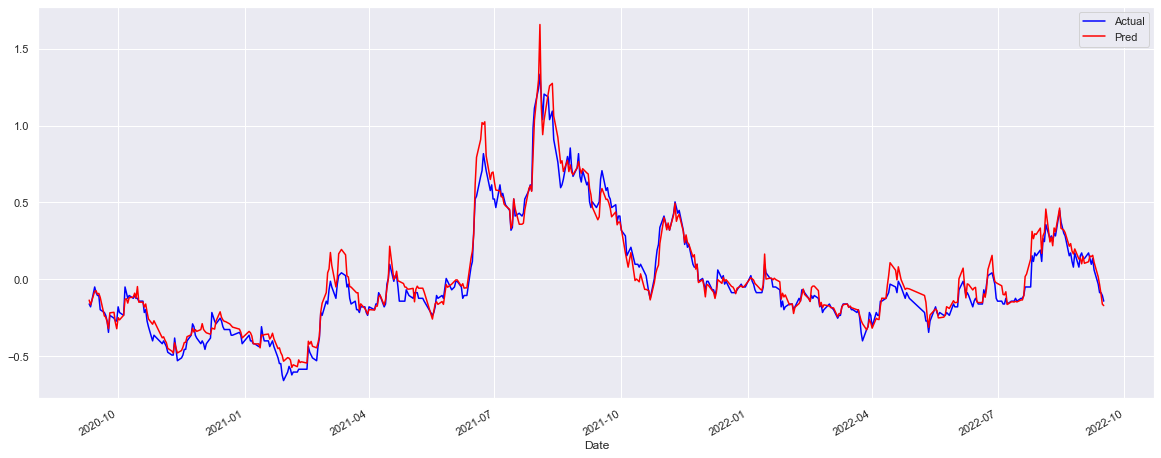

In [15]:
predictions['Actual'].plot(figsize=(20,8), legend=True, color='blue')
predictions['Pred'].plot(legend=True, color='red', figsize=(20,8))

### Evaluation

**Inverse transform scaled Close price**

In [16]:
from joblib import load

In [17]:
close_scaler = load('../feature_engineering/fren_close_scaler.bin')

In [18]:
inversed_pred = close_scaler.inverse_transform(np.array(predictions['Pred']).reshape(-1,1))
inversed_act = close_scaler.inverse_transform(np.array(predictions['Actual']).reshape(-1,1))

In [19]:
inversed = pd.DataFrame(inversed_pred)
inversed['Actual'] = inversed_act
inversed.rename({0:'Pred'}, axis=1, inplace=True)
inversed.index = test_labels.index
inversed.head(2)

,Pred,Actual
Date,,
2020-09-10,82.359329,81.0
2020-09-11,80.710632,80.0


**Plot error distribution**

In [20]:
def plotErrorHist(inversed_df):
    """
    Function to plot error histogram
    """
    error = inversed_df['Pred'] - inversed_df['Actual']
    plt.figure(figsize=(10,6))
    plt.hist(error, bins=25)
    plt.xlabel('Prediction Error [Close]')
    _ = plt.ylabel('Count')

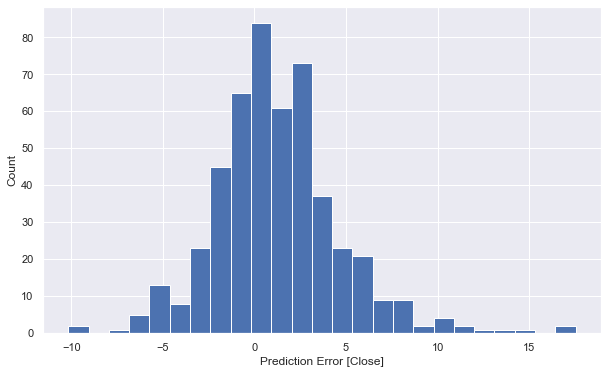

In [21]:
plotErrorHist(inversed)

**RMSE**

In [22]:
from statsmodels.tools.eval_measures import rmse

In [23]:
rmse(inversed['Pred'], inversed['Actual'])

3.7069179954829674

**MAPE**

In [24]:
# mape
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [25]:
mape(inversed['Actual'], inversed['Pred'])

2.9952205465915522

**R-squared**

In [26]:
from sklearn.metrics import r2_score

In [27]:
r2_score(inversed['Actual'], inversed['Pred'])

0.9625398248774182

### Save Model

In [28]:
# Save model
model.save_model('./models/fren.json')